In [1]:
import numpy as np

In [2]:
def grad_phi(l, w, B):
    
    size = len(w)
    
#     print(np.dot(B, np.ones(size)).A1)
    grad_phi_1 = - l + np.dot(B, np.ones(size)).A1 / np.dot(np.dot(np.ones(size).T, B), np.ones(size))
    grad_phi_2 = - w + np.dot(B.T, np.ones(size)).A1 / np.dot(np.dot(np.ones(size).T, B), np.ones(size))
    
    return grad_phi_1, grad_phi_2, np.concatenate((grad_phi_1.A1, grad_phi_2.A1))

In [3]:
def phi(x, l, w, B):
    size = len(w)
    
    return - np.dot(x[:size], l) - np.dot(x[size:], w) + np.log(np.dot(np.dot(np.ones(size).T, B), np.ones(size)).A1[0])

In [4]:
def f(correspondance_matrix, cost_matrix, gamma):
    
    return np.sum(correspondance_matrix * np.log(correspondance_matrix)) + gamma * np.sum(corresponance_matrix * cost_matrix)

In [164]:
def sinkhorn(lambdas, T, beta, eps_f):

    size, k = len(lambdas) // 2, 0
    
    while True:

        lambdas_l, lambdas_w = lambdas[:size].copy(), lambdas[size:].copy()
        B = np.exp(-beta * T + lambdas_l.reshape((size, 1)) + lambdas_w)

        if k % 2 == 0:
            lambdas_l_new = (lambdas_l + np.log(l) - np.log(np.dot(B, np.ones(size))).A1).values
            lambdas_w_new = lambdas_w.copy() 

        else:
            lambdas_l_new = lambdas_l.copy()
            lambdas_w_new = (lambdas_w + np.log(w) - np.log(np.dot(B.T, np.ones(size))).A1).values

        k = k + 1 
        lambdas_new = np.concatenate((lambdas_l_new, lambdas_w_new))

        if np.linalg.norm(lambdas_new - lambdas) / np.linalg.norm(lambdas) < eps_f:
            print(np.linalg.norm(lambdas_new - lambdas) / np.linalg.norm(lambdas))
            print('iter =', k)
            break

        lambdas = lambdas_new.copy()
    
    
    return lambdas_new, np.array(np.exp(-beta * T + lambdas_new[:size].reshape((size, 1)) + lambdas_new[size:]))


In [165]:
import pandas as pd

In [344]:
df = pd.read_csv('moscow.csv')

size = df.area_i.max()
df.area_i = df.area_i.astype(int)
df.area_j = df.area_j.astype(int)

times_matrix, distance_matrix, corresponance_matrix = 1e5 * np.ones((size, size)), 1e5 * np.ones((size, size)), np.zeros((size, size))

for i in df.index:
    
    area_i, area_j, live_work_ij, time_ij, dist_ij = df.loc[i]
    area_i, area_j = int(area_i) - 1, int(area_j) - 1
    
    times_matrix[area_i, area_j] = time_ij
    distance_matrix[area_i, area_j] = dist_ij
    corresponance_matrix[area_i, area_j] = live_work_ij
    
beta = 1

l, w = df.groupby('area_i')['live_i_work_j'].sum(), df.groupby('area_j')['live_i_work_j'].sum()
l /= l.sum()
w /= w.sum()

lambdas = np.ones(2 * size)

eps_f = 0.001

In [302]:
l.sum()

0.9999999999999999

In [303]:
def cost_matrix_1(times_matrix, alpha_1, alpha_2):
    
    T = alpha_1 * np.matrix(times_matrix ** alpha_2)
#     T /= T.sum(axis=1)
#     print(T)
#     print(T - times_matrix)
    return T


def cost_matrix_2(times_matrix, distance_matrix, alpha_1, alpha_2, alpha_3):
    
    T = alpha_1 * np.matrix(distance_matrix ** alpha_2) * np.matrix(times_matrix ** alpha_3)
#     T /= T.sum(axis=1)
    
    return T


def cost_matrix_3(distance_matrix, alpha_1, alpha_2, alpha_3):
    
    T = alpha_1 * np.matrix(distance_matrix ** alpha_2) - alpha_3 * np.matrix(np.log(times_matrix))
#     T /= T.sum(axis=1)
    
    return T

# 1

In [304]:
type(d)

numpy.ndarray

In [305]:
number_of_people

1965

In [306]:
size

22

In [219]:
number_of_people = df.groupby('area_j')['live_i_work_j'].sum().sum()

ALPHAS_RANGE = tuple(x / 50 for x in range(0, 500, 20))#(1, 5)

errors = []

for alpha_1 in ALPHAS_RANGE:#range(*ALPHAS_RANGE):
    for alpha_2 in ALPHAS_RANGE:#range(*ALPHAS_RANGE):
        print('alpha', alpha_1, alpha_2)
        T = cost_matrix_1(times_matrix, alpha_1, alpha_2)
        print(lambdas)
        _, d = sinkhorn(lambdas, T, beta, eps_f)
        
        d_restored = d * number_of_people
        error = np.sum((d_restored - corresponance_matrix) ** 2) / size ** 2
        
        errors.append((alpha_1, alpha_2, error))

alpha 0.0 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\omser\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


KeyboardInterrupt: 

In [173]:
errors

[(0.0, 0.0, 118.2096154343173),
 (0.0, 0.4, 118.2096154343173),
 (0.0, 0.8, 118.2096154343173),
 (0.0, 1.2, 118.2096154343173),
 (0.0, 1.6, 118.2096154343173),
 (0.0, 2.0, 118.2096154343173),
 (0.0, 2.4, 118.2096154343173),
 (0.0, 2.8, 118.2096154343173),
 (0.0, 3.2, 118.2096154343173),
 (0.0, 3.6, 118.2096154343173),
 (0.0, 4.0, 118.2096154343173),
 (0.0, 4.4, 118.2096154343173),
 (0.0, 4.8, 118.2096154343173),
 (0.0, 5.2, 118.2096154343173),
 (0.0, 5.6, 118.2096154343173),
 (0.0, 6.0, 118.2096154343173),
 (0.0, 6.4, 118.2096154343173),
 (0.0, 6.8, 118.2096154343173),
 (0.0, 7.2, 118.2096154343173),
 (0.0, 7.6, 118.2096154343173),
 (0.0, 8.0, 118.2096154343173),
 (0.0, 8.4, 118.2096154343173),
 (0.0, 8.8, 118.2096154343173),
 (0.0, 9.2, 118.2096154343173),
 (0.0, 9.6, 118.2096154343173),
 (0.4, 0.0, 118.2096154343173),
 (0.4, 0.4, 136.45569318895514),
 (0.4, 0.8, 223.64516238369478),
 (0.4, 1.2, 281.2857348996789),
 (0.4, 1.6, 299.51910410909306),
 (0.4, 2.0, 391.66754794683874),
 (0.

In [214]:
type(times_matrix)

numpy.ndarray

In [279]:
112 ** 0.5

10.583005244258363

In [339]:
# number_of_people = df.groupby('area_j')['live_i_work_j'].sum().sum()

ALPHAS_RANGE = np.linspace(0, 2.5, 100)#tuple(x / 50 for x in range(0, 500, 20))#(1, 5)

# errors = []
lambdas = np.ones(2 * size)

for alpha_2 in (0.1, 0.5, 1, 1.5, 2):#range(*ALPHAS_RANGE):
    for alpha_1 in ALPHAS_RANGE:#range(*ALPHAS_RANGE):
        print('alpha', alpha_1, alpha_2)
        T = cost_matrix_1(times_matrix, alpha_1, alpha_2)
#         print(T - times_matrix)
        _, d = sinkhorn(lambdas, T, beta, eps_f)
        
        d_restored = d * number_of_people
        
        error = np.sum((d_restored - corresponance_matrix) ** 2) / size ** 2
        
        errors.append((alpha_1, alpha_2, error))

alpha 0.0 0.1
0.0
iter = 3
alpha 0.025252525252525252 0.1
0.0005429906649872959
iter = 3
alpha 0.050505050505050504 0.1
5.553670845428444e-06
iter = 4
alpha 0.07575757575757576 0.1
1.231065918921549e-05
iter = 4
alpha 0.10101010101010101 0.1
2.155815399045041e-05
iter = 4
alpha 0.12626262626262627 0.1
3.317596677410744e-05
iter = 4
alpha 0.15151515151515152 0.1
4.7046096588973375e-05
iter = 4
alpha 0.17676767676767677 0.1
6.305332612110487e-05
iter = 4
alpha 0.20202020202020202 0.1
8.108593166283462e-05
iter = 4
alpha 0.22727272727272727 0.1
0.00010103652328229823
iter = 4
alpha 0.25252525252525254 0.1
0.00012280303163753365
iter = 4
alpha 0.2777777777777778 0.1
0.0001462898573352223
iter = 4
alpha 0.30303030303030304 0.1
0.00017140919732443267
iter = 4
alpha 0.3282828282828283 0.1
0.00019808256027917164
iter = 4
alpha 0.35353535353535354 0.1
0.0002262424789563253
iter = 4
alpha 0.3787878787878788 0.1
0.0002558344217950559
iter = 4
alpha 0.40404040404040403 0.1
0.00028681889820967227
i

0.00092317785450347
iter = 67
alpha 1.0101010101010102 0.5
0.0008851737607636806
iter = 69
alpha 1.0353535353535352 0.5
0.0009598865622504094
iter = 69
alpha 1.0606060606060606 0.5
0.0009129349027163695
iter = 71
alpha 1.0858585858585859 0.5
0.0009847081941036211
iter = 71
alpha 1.1111111111111112 0.5
0.0009306332617828855
iter = 73
alpha 1.1363636363636362 0.5
0.000999765921159302
iter = 73
alpha 1.1616161616161615 0.5
0.0009407354619713302
iter = 75
alpha 1.1868686868686869 0.5
0.0008834782248363328
iter = 77
alpha 1.2121212121212122 0.5
0.0009458932944676698
iter = 77
alpha 1.2373737373737375 0.5
0.0008864319210787847
iter = 79
alpha 1.2626262626262625 0.5
0.0009483034823300242
iter = 79
alpha 1.2878787878787878 0.5
0.0008877289900647073
iter = 81
alpha 1.3131313131313131 0.5
0.0009496158070789477
iter = 81
alpha 1.3383838383838385 0.5
0.000888692147833026
iter = 83
alpha 1.3636363636363635 0.5
0.0009510321057428592
iter = 83
alpha 1.3888888888888888 0.5
0.0008902944922315235
iter =

0.0009922274608910573
iter = 643
alpha 1.9444444444444444 1
0.0009917241978936184
iter = 649
alpha 1.9696969696969697 1
0.0009996825405290907
iter = 655
alpha 1.9949494949494948 1
0.0009921572532015897
iter = 663
alpha 2.0202020202020203 1
0.0009852391050514135
iter = 671
alpha 2.0454545454545454 1
0.0009788880976344203
iter = 679
alpha 2.0707070707070705 1
0.0009990336647279073
iter = 686
alpha 2.095959595959596 1
0.0009951647033022834
iter = 693
alpha 2.121212121212121 1
0.0009905131959502785
iter = 701
alpha 2.1464646464646466 1
0.0009860241912168232
iter = 709
alpha 2.1717171717171717 1
0.0009816386895770714
iter = 717
alpha 2.196969696969697 1
0.0009773058102526056
iter = 725
alpha 2.2222222222222223 1
0.000998388392024645
iter = 731
alpha 2.2474747474747474 1
0.000992960057332607
iter = 739
alpha 2.2727272727272725 1
0.0009873942095285813
iter = 747
alpha 2.297979797979798 1
0.0009993218010237045
iter = 754
alpha 2.323232323232323 1
0.0009929885957591761
iter = 761
alpha 2.348484

0.0009996677707608476
iter = 736
alpha 0.30303030303030304 2
0.00097770440199511
iter = 722
alpha 0.3282828282828283 2
0.0009999726039401934
iter = 765
alpha 0.35353535353535354 2
0.0009878977200917225
iter = 670
alpha 0.3787878787878788 2
0.000909927149634428
iter = 718
alpha 0.40404040404040403 2
0.0009484565009683801
iter = 764
alpha 0.4292929292929293 2
0.0009998877767040599
iter = 720
alpha 0.45454545454545453 2
0.0009998342000586812
iter = 612
alpha 0.4797979797979798 2
0.000999894860633716
iter = 480
alpha 0.5050505050505051 2
0.0009999562574491048
iter = 305
alpha 0.5303030303030303 2
0.0009994954698810592
iter = 15
alpha 0.5555555555555556 2


C:\Users\omser\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\omser\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract
C:\Users\omser\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in add
  


KeyboardInterrupt: 

In [340]:
errors

[(0.0, 1, 118.2096154343173),
 (0.0010050251256281408, 1, 100.97900845508339),
 (0.0020100502512562816, 1, 98.07650045182162),
 (0.0030150753768844224, 1, 95.2138613490103),
 (0.004020100502512563, 1, 92.39112133441179),
 (0.0050251256281407045, 1, 89.60813758671604),
 (0.006030150753768845, 1, 86.86505998844551),
 (0.007035175879396985, 1, 84.16262467864995),
 (0.008040201005025126, 1, 81.50226789208067),
 (0.009045226130653268, 1, 78.88608893102867),
 (0.010050251256281409, 1, 76.31596426638114),
 (0.011055276381909548, 1, 73.79632584620894),
 (0.01206030150753769, 1, 71.32954283159658),
 (0.013065326633165831, 1, 68.91866698514747),
 (0.01407035175879397, 1, 66.56656290613631),
 (0.015075376884422112, 1, 64.2758005294954),
 (0.016080402010050253, 1, 62.048582752312036),
 (0.017085427135678392, 1, 59.8867030166331),
 (0.018090452261306535, 1, 57.79152691880367),
 (0.019095477386934675, 1, 55.76399227335425),
 (0.020100502512562818, 1, 53.80462286369871),
 (0.021105527638190957, 1, 51

In [341]:
df = pd.DataFrame(errors, columns=['alpha_1', 'alpha_2', 'error'])

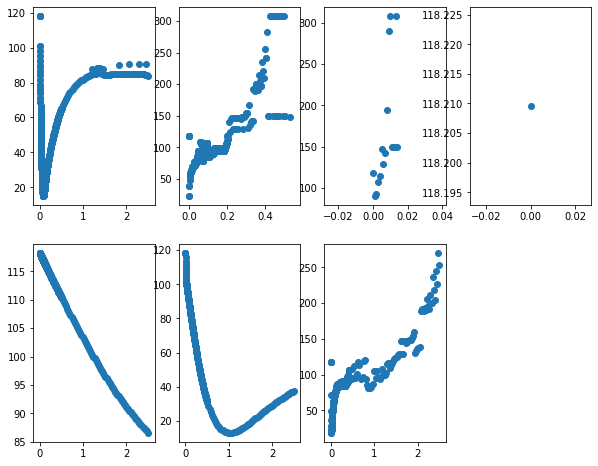

In [342]:
i = 1
for alpha_2 in df.alpha_2.unique():
    
    plt.subplot(2, 4, i)
    i += 1
    tmp = df[df.alpha_2 == alpha_2]
    plt.scatter(tmp.alpha_1.values, tmp.error.values)

In [321]:
tmp

alpha_1  alpha_2       error
400  0.000000        3  118.209615
401  0.002513        3   96.058454
402  0.005025        3  146.926806
403  0.007538        3  189.571021
404  0.010050        3  308.157025
405  0.012563        3  308.157025

In [176]:
number_of_people = df.groupby('area_j')['live_i_work_j'].sum().sum()

ALPHAS_RANGE = tuple(x / 50 for x in range(0, 500, 20))#(1, 5)

errors_1 = []

for alpha_1 in ALPHAS_RANGE:#range(*ALPHAS_RANGE):
    for alpha_2 in ALPHAS_RANGE:#range(*ALPHAS_RANGE):
        print('alpha', alpha_1, alpha_2)
        T = cost_matrix_1(times_matrix, alpha_1, alpha_2)
        print(lambdas)
        _, d = sinkhorn(lambdas, T, beta, eps_f)
        
        d_restored = d * number_of_people
        error = np.sum((d_restored - corresponance_matrix) ** 2) / size ** 2
        
        errors_1.append((alpha_1, alpha_2, error))

alpha 0.0 0.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0
iter = 3
alpha 0.0 0.4
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0
iter = 3
alpha 0.0 0.8
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0
iter = 3
alpha 0.0 1.2
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0
iter = 3
alpha 0.0 1.6
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0
iter = 3
alpha 0.0 2.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0
iter = 3
alpha 0.0 2.4
[1. 1. 1. 1. 1

0.0009992025155912423
iter = 1190
alpha 0.4 9.2
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0009992025155912423
iter = 1190
alpha 0.4 9.6
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0009992025155912423
iter = 1190
alpha 0.8 0.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
2.7660770128877435e-17
iter = 3
alpha 0.8 0.4
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0008207880949654539
iter = 11
alpha 0.8 0.8
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0009677399920787928
iter = 69
alpha 0.8 1.2
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

0.0009992025155912423
iter = 1190
alpha 1.2 7.2
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0009992025155912423
iter = 1190
alpha 1.2 7.6
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0009992025155912423
iter = 1190
alpha 1.2 8.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0009992025155912423
iter = 1190
alpha 1.2 8.4
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0009992025155912423
iter = 1190
alpha 1.2 8.8
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.0009992025155912423
iter = 1190
alpha 1.2 9.2
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

KeyboardInterrupt: 

In [117]:
min(map(lambda x: x[-1], errors_1))

131.03878662659653

In [139]:
errors_1

[(0.0, 0.0, 131.03878662659653),
 (0.0, 0.4, 131.03878662659653),
 (0.0, 0.8, 131.03878662659653),
 (0.0, 1.2, 131.03878662659653),
 (0.0, 1.6, 131.03878662659653),
 (0.0, 2.0, 131.03878662659653),
 (0.0, 2.4, 131.03878662659653),
 (0.0, 2.8, 131.03878662659653),
 (0.0, 3.2, 131.03878662659653),
 (0.0, 3.6, 131.03878662659653),
 (0.0, 4.0, 131.03878662659653),
 (0.0, 4.4, 131.03878662659653),
 (0.0, 4.8, 131.03878662659653),
 (0.0, 5.2, 131.03878662659653),
 (0.0, 5.6, 131.03878662659653),
 (0.0, 6.0, 131.03878662659653),
 (0.0, 6.4, 131.03878662659653),
 (0.0, 6.8, 131.03878662659653),
 (0.0, 7.2, 131.03878662659653),
 (0.0, 7.6, 131.03878662659653),
 (0.0, 8.0, 131.03878662659653),
 (0.0, 8.4, 131.03878662659653),
 (0.0, 8.8, 131.03878662659653),
 (0.0, 9.2, 131.03878662659653),
 (0.0, 9.6, 131.03878662659653),
 (0.4, 0.0, 131.03878662659656),
 (0.4, 0.4, 196.85811631853977),
 (0.4, 0.8, 290.7716637904065),
 (0.4, 1.2, 291.3178423260985),
 (0.4, 1.6, 291.31784491968455),
 (0.4, 2.0, 

In [144]:
df = pd.DataFrame(errors_1, columns=['alpha_1', 'alpha_2', 'error'])

In [110]:
errors

[(0.5, 1, 291.3175696844888),
 (0.54, 1, 291.31774054917764),
 (0.58, 1, 291.3178041911137),
 (0.62, 1, 291.3178284203245),
 (0.66, 1, 291.31783791543745),
 (0.7, 1, 291.31784177864813),
 (0.74, 1, 291.3178434254051),
 (0.78, 1, 291.3178441664822),
 (0.82, 1, 291.31784451993525),
 (0.86, 1, 291.3178446983695),
 (0.9, 1, 291.31784479312125),
 (0.94, 1, 291.317844845567),
 (0.98, 1, 291.31784487555916),
 (1.02, 1, 291.31784489309615),
 (1.06, 1, 291.3178449035426),
 (1.1, 1, 291.3178449098276),
 (1.14, 1, 291.317844913639),
 (1.18, 1, 291.31784491597335),
 (1.22, 1, 291.3178449173994),
 (1.26, 1, 291.31784491827614),
 (1.3, 1, 291.3178449188162),
 (1.34, 1, 291.3178449191493),
 (1.38, 1, 291.3178449193549),
 (1.42, 1, 291.3178449194818),
 (1.46, 1, 291.3178449195602)]

In [98]:
errors

[(0.5, 1, 1911.6786274052977),
 (0.54, 1, 1911.6782838415809),
 (0.58, 1, 1911.6776126645066),
 (0.62, 1, 1911.6770598410874),
 (0.66, 1, 1911.6766788871898),
 (0.7, 1, 1911.67643342476),
 (0.74, 1, 1911.6762797985334),
 (0.78, 1, 1911.6761848645706),
 (0.82, 1, 1911.6761264950237),
 (0.86, 1, 1911.6760906566046),
 (0.9, 1, 1911.676068646778),
 (0.94, 1, 1911.6760551171076),
 (0.98, 1, 1911.6760467910738),
 (1.02, 1, 1911.6760416616296),
 (1.06, 1, 1911.67603849877),
 (1.1, 1, 1911.6760365470157),
 (1.14, 1, 1911.6760353417692),
 (1.18, 1, 1911.6760345973307),
 (1.22, 1, 1911.676034137061),
 (1.26, 1, 1911.6760338529116),
 (1.3, 1, 1911.67603367674),
 (1.34, 1, 1911.676033568289),
 (1.38, 1, 1911.6760335008864),
 (1.42, 1, 1911.6760334593719),
 (1.46, 1, 1911.6760334333537)]

In [154]:
plt.rcParams['figure.figsize'] = (10, 8)

   alpha_1  alpha_2       error
0      0.0      0.0  131.038787
1      0.0      0.4  131.038787
2      0.0      0.8  131.038787
3      0.0      1.2  131.038787
4      0.0      1.6  131.038787
    alpha_1  alpha_2       error
25      0.4      0.0  131.038787
26      0.4      0.4  196.858116
27      0.4      0.8  290.771664
28      0.4      1.2  291.317842
29      0.4      1.6  291.317845
    alpha_1  alpha_2        error
50      0.8      0.0   131.038787
51      0.8      0.4  1353.241857
52      0.8      0.8   291.315692
53      0.8      1.2   291.317845
54      0.8      1.6   291.317845
    alpha_1  alpha_2        error
75      1.2      0.0   140.256648
76      1.2      0.4  1808.228824
77      1.2      0.8   291.317834
78      1.2      1.2   291.317845
79      1.2      1.6   291.317845
     alpha_1  alpha_2       error
100      1.6      0.0  140.256648
101      1.6      0.4  290.719945
102      1.6      0.8  291.317845
103      1.6      1.2  291.317845
104      1.6      1.6  291.31784

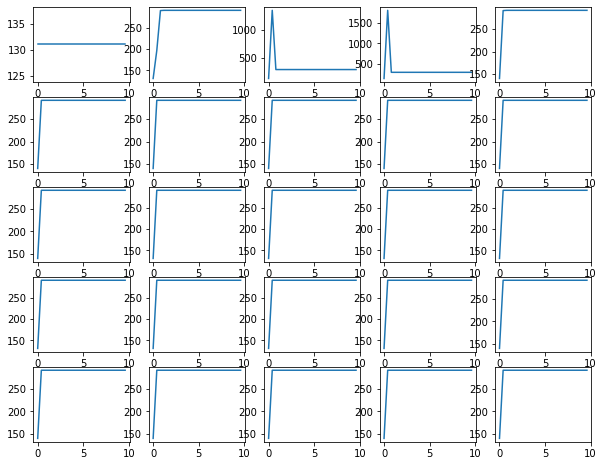

In [163]:
i = 1
for alpha_1 in df.alpha_1.unique():
#     plt.legend(str(alpha_1))
    plt.subplot(5, 5, i)
    i += 1
    tmp = df[df.alpha_1 == alpha_1]
    print(tmp.head())
    plt.plot(tmp.alpha_2.values, tmp.error.values)

In [145]:
df.head()

alpha_1  alpha_2       error
0      0.0      0.0  131.038787
1      0.0      0.4  131.038787
2      0.0      0.8  131.038787
3      0.0      1.2  131.038787
4      0.0      1.6  131.038787

# 2

In [351]:
number_of_people = df.groupby('area_j')['live_i_work_j'].sum().sum()

ALPHAS_RANGE = (1, 5)

errors_2 = []

for alpha_1 in range(*ALPHAS_RANGE):
    for alpha_2 in  range(*ALPHAS_RANGE):
        for alpha_3 in range(*ALPHAS_RANGE):
            T = cost_matrix_2(times_matrix, distance_matrix, alpha_1, alpha_2, alpha_3)
            _, d = sinkhorn(lambdas, T, beta, eps_f)

            d_restored = d * number_of_people
            error = np.sum((d_restored - corresponance_matrix) ** 2) / size ** 2

            errors_2.append((alpha_1, alpha_2, alpha_3, error))

C:\Users\omser\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\omser\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract
C:\Users\omser\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in add
  


KeyboardInterrupt: 

In [119]:
errors_2

[(0.0, 0.0, 0.0, 131.03878662659653),
 (0.0, 0.0, 0.4, 131.03878662659653),
 (0.0, 0.0, 0.8, 131.03878662659653),
 (0.0, 0.0, 1.2, 131.03878662659653),
 (0.0, 0.0, 1.6, 131.03878662659653),
 (0.0, 0.0, 2.0, 131.03878662659653),
 (0.0, 0.0, 2.4, 131.03878662659653),
 (0.0, 0.0, 2.8, 131.03878662659653),
 (0.0, 0.0, 3.2, 131.03878662659653),
 (0.0, 0.0, 3.6, 131.03878662659653),
 (0.0, 0.0, 4.0, 131.03878662659653),
 (0.0, 0.0, 4.4, 131.03878662659653),
 (0.0, 0.0, 4.8, 131.03878662659653),
 (0.0, 0.0, 5.2, 131.03878662659653),
 (0.0, 0.0, 5.6, 131.03878662659653),
 (0.0, 0.0, 6.0, 131.03878662659653),
 (0.0, 0.0, 6.4, 131.03878662659653),
 (0.0, 0.0, 6.8, 131.03878662659653),
 (0.0, 0.0, 7.2, 131.03878662659653),
 (0.0, 0.0, 7.6, 131.03878662659653),
 (0.0, 0.0, 8.0, 131.03878662659653),
 (0.0, 0.0, 8.4, 131.03878662659653),
 (0.0, 0.0, 8.8, 131.03878662659653),
 (0.0, 0.0, 9.2, 131.03878662659653),
 (0.0, 0.0, 9.6, 131.03878662659653),
 (0.0, 0.4, 0.0, 131.03878662659653),
 (0.0, 0.4, 

In [120]:
min(map(lambda x: x[-1], errors_2))

131.03878662659653

In [121]:
import matplotlib.pyplot as plt

In [122]:
%matplotlib inline

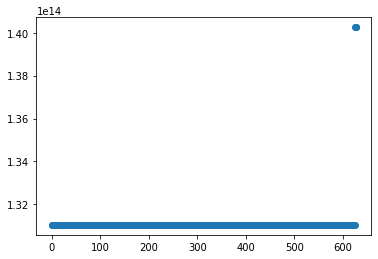

In [123]:
plt.scatter(range(len(errors_2)), [x[-1] * 10**12 for x in errors_2])

# 3 

In [359]:
number_of_people = df.groupby('area_j')['live_i_work_j'].sum().sum()

ALPHAS_RANGE = np.linspace(0, 0.5, 50)#(1, 10)

errors_3 = []

for alpha_1 in ALPHAS_RANGE:# range(*ALPHAS_RANGE):
    for alpha_2 in ALPHAS_RANGE:# range(*ALPHAS_RANGE):
        for alpha_3 in ALPHAS_RANGE:# range(*ALPHAS_RANGE):
            T = cost_matrix_3(distance_matrix, alpha_1, alpha_2, alpha_3)
            _, d = sinkhorn(lambdas, T, beta, eps_f)

            d_restored = d * number_of_people
            error = np.sum((d_restored - corresponance_matrix) ** 2) / size ** 2

            errors_3.append((alpha_1, alpha_2, alpha_3, error))

0.0
iter = 3
5.137924652698444e-06
iter = 4
2.1110227333043435e-05
iter = 4
4.875442748603353e-05
iter = 4
8.890519115733927e-05
iter = 4
0.00014239143262283842
iter = 4
0.0002100334088079497
iter = 4
0.0002926395936974468
iter = 4
0.0003910032062779816
iter = 4
0.000505898330996868
iter = 4
0.0006380756168733139
iter = 4
0.0007882575736820716
iter = 4
0.0009571335048247431
iter = 4
0.00013849114685852328
iter = 5
0.00017636604586922371
iter = 5
0.00022104897880936944
iter = 5
0.00027321281879549267
iter = 5
0.00033354360713833885
iter = 5
0.0004027361927250631
iter = 5
0.0004814891974932495
iter = 5
0.0005704993167209466
iter = 5
0.0006704549957597491
iter = 5
0.0007820295605383657
iter = 5
0.0009058739150666868
iter = 5
0.0002444003288331105
iter = 6
0.0002915255708708008
iter = 6
0.000345126428264422
iter = 6
0.00040570172205752777
iter = 6
0.00047374188074025743
iter = 6
0.0005497233959546822
iter = 6
0.0006341032505478662
iter = 6
0.0007273134165428637
iter = 6
0.00082975552143196

0.00037666164371211614
iter = 7
0.0004351408302055076
iter = 7
0.0005000328376187667
iter = 7
0.0005716774908194074
iter = 7
0.0006503912775249448
iter = 7
0.0007364630147288002
iter = 7
0.0008301498443054901
iter = 7
0.0009316736540299495
iter = 7
0.00046799581675146536
iter = 8
0.0005317498958936414
iter = 8
0.0006014226454711832
iter = 8
0.0006772256539613053
iter = 8
0.0007593444217909492
iter = 8
0.0008479359246371886
iter = 8
0.0009431265215457352
iter = 8
0.000518531196342294
iter = 9
0.0
iter = 3
5.137924652698444e-06
iter = 4
2.1110227333043435e-05
iter = 4
4.875442748603353e-05
iter = 4
8.890519115733927e-05
iter = 4
0.00014239143262283842
iter = 4
0.0002100334088079497
iter = 4
0.0002926395936974468
iter = 4
0.0003910032062779816
iter = 4
0.000505898330996868
iter = 4
0.0006380756168733139
iter = 4
0.0007882575736820716
iter = 4
0.0009571335048247431
iter = 4
0.00013849114685852328
iter = 5
0.00017636604586922371
iter = 5
0.00022104897880936944
iter = 5
0.0002732128187954926

0.0005704993167209466
iter = 5
0.0006704549957597491
iter = 5
0.0007820295605383657
iter = 5
0.0009058739150666868
iter = 5
0.0002444003288331105
iter = 6
0.0002915255708708008
iter = 6
0.000345126428264422
iter = 6
0.00040570172205752777
iter = 6
0.00047374188074025743
iter = 6
0.0005497233959546822
iter = 6
0.0006341032505478662
iter = 6
0.0007273134165428637
iter = 6
0.0008297555214319605
iter = 6
0.0009417957799689896
iter = 6
0.00037666164371211614
iter = 7
0.0004351408302055076
iter = 7
0.0005000328376187667
iter = 7
0.0005716774908194074
iter = 7
0.0006503912775249448
iter = 7
0.0007364630147288002
iter = 7
0.0008301498443054901
iter = 7
0.0009316736540299495
iter = 7
0.00046799581675146536
iter = 8
0.0005317498958936414
iter = 8
0.0006014226454711832
iter = 8
0.0006772256539613053
iter = 8
0.0007593444217909492
iter = 8
0.0008479359246371886
iter = 8
0.0009431265215457352
iter = 8
0.000518531196342294
iter = 9
0.0
iter = 3
5.137924652698444e-06
iter = 4
2.1110227333043435e-05
i

0.00013849114685852328
iter = 5
0.00017636604586922371
iter = 5
0.00022104897880936944
iter = 5
0.00027321281879549267
iter = 5
0.00033354360713833885
iter = 5
0.0004027361927250631
iter = 5
0.0004814891974932495
iter = 5
0.0005704993167209466
iter = 5
0.0006704549957597491
iter = 5
0.0007820295605383657
iter = 5
0.0009058739150666868
iter = 5
0.0002444003288331105
iter = 6
0.0002915255708708008
iter = 6
0.000345126428264422
iter = 6
0.00040570172205752777
iter = 6
0.00047374188074025743
iter = 6
0.0005497233959546822
iter = 6
0.0006341032505478662
iter = 6
0.0007273134165428637
iter = 6
0.0008297555214319605
iter = 6
0.0009417957799689896
iter = 6
0.00037666164371211614
iter = 7
0.0004351408302055076
iter = 7
0.0005000328376187667
iter = 7
0.0005716774908194074
iter = 7
0.0006503912775249448
iter = 7
0.0007364630147288002
iter = 7
0.0008301498443054901
iter = 7
0.0009316736540299495
iter = 7
0.00046799581675146536
iter = 8
0.0005317498958936414
iter = 8
0.0006014226454711832
iter = 8


2.1110227333043435e-05
iter = 4
4.875442748603353e-05
iter = 4
8.890519115733927e-05
iter = 4
0.00014239143262283842
iter = 4
0.0002100334088079497
iter = 4
0.0002926395936974468
iter = 4
0.0003910032062779816
iter = 4
0.000505898330996868
iter = 4
0.0006380756168733139
iter = 4
0.0007882575736820716
iter = 4
0.0009571335048247431
iter = 4
0.00013849114685852328
iter = 5
0.00017636604586922371
iter = 5
0.00022104897880936944
iter = 5
0.00027321281879549267
iter = 5
0.00033354360713833885
iter = 5
0.0004027361927250631
iter = 5
0.0004814891974932495
iter = 5
0.0005704993167209466
iter = 5
0.0006704549957597491
iter = 5
0.0007820295605383657
iter = 5
0.0009058739150666868
iter = 5
0.0002444003288331105
iter = 6
0.0002915255708708008
iter = 6
0.000345126428264422
iter = 6
0.00040570172205752777
iter = 6
0.00047374188074025743
iter = 6
0.0005497233959546822
iter = 6
0.0006341032505478662
iter = 6
0.0007273134165428637
iter = 6
0.0008297555214319605
iter = 6
0.0009417957799689896
iter = 6
0

0.0009431265215457352
iter = 8
0.000518531196342294
iter = 9
0.0
iter = 3
5.137924652698444e-06
iter = 4
2.1110227333043435e-05
iter = 4
4.875442748603353e-05
iter = 4
8.890519115733927e-05
iter = 4
0.00014239143262283842
iter = 4
0.0002100334088079497
iter = 4
0.0002926395936974468
iter = 4
0.0003910032062779816
iter = 4
0.000505898330996868
iter = 4
0.0006380756168733139
iter = 4
0.0007882575736820716
iter = 4
0.0009571335048247431
iter = 4
0.00013849114685852328
iter = 5
0.00017636604586922371
iter = 5
0.00022104897880936944
iter = 5
0.00027321281879549267
iter = 5
0.00033354360713833885
iter = 5
0.0004027361927250631
iter = 5
0.0004814891974932495
iter = 5
0.0005704993167209466
iter = 5
0.0006704549957597491
iter = 5
0.0007820295605383657
iter = 5
0.0009058739150666868
iter = 5
0.0002444003288331105
iter = 6
0.0002915255708708008
iter = 6
0.000345126428264422
iter = 6
0.00040570172205752777
iter = 6
0.00047374188074025743
iter = 6
0.0005497233959546822
iter = 6
0.000634103250547866

0.00046799581675146536
iter = 8
0.0005317498958936414
iter = 8
0.0006014226454711832
iter = 8
0.0006772256539613053
iter = 8
0.0007593444217909492
iter = 8
0.0008479359246371886
iter = 8
0.0009431265215457352
iter = 8
0.000518531196342294
iter = 9
0.0
iter = 3
5.137924652698444e-06
iter = 4
2.1110227333043435e-05
iter = 4
4.875442748603353e-05
iter = 4
8.890519115733927e-05
iter = 4
0.00014239143262283842
iter = 4
0.0002100334088079497
iter = 4
0.0002926395936974468
iter = 4
0.0003910032062779816
iter = 4
0.000505898330996868
iter = 4
0.0006380756168733139
iter = 4
0.0007882575736820716
iter = 4
0.0009571335048247431
iter = 4
0.00013849114685852328
iter = 5
0.00017636604586922371
iter = 5
0.00022104897880936944
iter = 5
0.00027321281879549267
iter = 5
0.00033354360713833885
iter = 5
0.0004027361927250631
iter = 5
0.0004814891974932495
iter = 5
0.0005704993167209466
iter = 5
0.0006704549957597491
iter = 5
0.0007820295605383657
iter = 5
0.0009058739150666868
iter = 5
0.000244400328833110

0.0008297555214319605
iter = 6
0.0009417957799689896
iter = 6
0.00037666164371211614
iter = 7
0.0004351408302055076
iter = 7
0.0005000328376187667
iter = 7
0.0005716774908194074
iter = 7
0.0006503912775249448
iter = 7
0.0007364630147288002
iter = 7
0.0008301498443054901
iter = 7
0.0009316736540299495
iter = 7
0.00046799581675146536
iter = 8
0.0005317498958936414
iter = 8
0.0006014226454711832
iter = 8
0.0006772256539613053
iter = 8
0.0007593444217909492
iter = 8
0.0008479359246371886
iter = 8
0.0009431265215457352
iter = 8
0.000518531196342294
iter = 9
0.0
iter = 3
5.137924652698444e-06
iter = 4
2.1110227333043435e-05
iter = 4
4.875442748603353e-05
iter = 4
8.890519115733927e-05
iter = 4
0.00014239143262283842
iter = 4
0.0002100334088079497
iter = 4
0.0002926395936974468
iter = 4
0.0003910032062779816
iter = 4
0.000505898330996868
iter = 4
0.0006380756168733139
iter = 4
0.0007882575736820716
iter = 4
0.0009571335048247431
iter = 4
0.00013849114685852328
iter = 5
0.00017636604586922371


0.00013849114685852328
iter = 5
0.00017636604586922371
iter = 5
0.00022104897880936944
iter = 5
0.00027321281879549267
iter = 5
0.00033354360713833885
iter = 5
0.0004027361927250631
iter = 5
0.0004814891974932495
iter = 5
0.0005704993167209466
iter = 5
0.0006704549957597491
iter = 5
0.0007820295605383657
iter = 5
0.0009058739150666868
iter = 5
0.0002444003288331105
iter = 6
0.0002915255708708008
iter = 6
0.000345126428264422
iter = 6
0.00040570172205752777
iter = 6
0.00047374188074025743
iter = 6
0.0005497233959546822
iter = 6
0.0006341032505478662
iter = 6
0.0007273134165428637
iter = 6
0.0008297555214319605
iter = 6
0.0009417957799689896
iter = 6
0.00037666164371211614
iter = 7
0.0004351408302055076
iter = 7
0.0005000328376187667
iter = 7
0.0005716774908194074
iter = 7
0.0006503912775249448
iter = 7
0.0007364630147288002
iter = 7
0.0008301498443054901
iter = 7
0.0009316736540299495
iter = 7
0.00046799581675146536
iter = 8
0.0005317498958936414
iter = 8
0.0006014226454711832
iter = 8


0.0005180975352926633
iter = 9
3.763629064106236e-05
iter = 3
0.0009953963602133034
iter = 3
2.0464808312306922e-05
iter = 4
4.7770187813584616e-05
iter = 4
8.757363946914803e-05
iter = 4
0.00014070455940863507
iter = 4
0.0002079837554272134
iter = 4
0.00029022032607038705
iter = 4
0.0003882081960496404
iter = 4
0.000502722245151969
iter = 4
0.0006345140155396844
iter = 4
0.0007843070150788145
iter = 4
0.0009527916558522236
iter = 4
0.00013762165180265155
iter = 5
0.00017534526885527472
iter = 5
0.00021986374551049708
iter = 5
0.00027184999642823724
iter = 5
0.00033199021156642237
iter = 5
0.00040097951020537544
iter = 5
0.0004795169207490434
iter = 5
0.0005682996942533631
iter = 5
0.0006680169924558787
iter = 5
0.0007793430267553846
iter = 5
0.0009029297605472684
iter = 5
0.00024335242681206473
iter = 6
0.0002903383759671082
iter = 6
0.0003437904231362769
iter = 6
0.0004042078264570025
iter = 6
0.00047208158740740354
iter = 6
0.0005478889048644781
iter = 6
0.0006320875990627555
iter =

0.0009168603276480721
iter = 7
0.00045942262242727
iter = 8
0.0005223616369200968
iter = 8
0.0005911885847102351
iter = 8
0.0006661186464746445
iter = 8
0.0007473412819294595
iter = 8
0.0008350177462930321
iter = 8
0.0009292789457044481
iter = 8
0.0005099059383999072
iter = 9
0.0001894910311504109
iter = 3
0.0008354403575492617
iter = 3
1.7315199933506182e-05
iter = 4
4.276364226213735e-05
iter = 4
8.057799354659211e-05
iter = 4
0.00013158848465387842
iter = 4
0.00019661723856506818
iter = 4
0.0002764751936723427
iter = 4
0.0003719586974211027
iter = 4
0.0004838456987580833
iter = 4
0.0006128915181859413
iter = 4
0.0007598242090146732
iter = 4
0.0009253395463938888
iter = 4
0.0001323941710339004
iter = 5
0.00016912815397226788
iter = 5
0.00021255345928749097
iter = 5
0.0002633404601441379
iter = 5
0.0003221734163076285
iter = 5
0.00038974622880828645
iter = 5
0.00046675752169293385
iter = 5
0.0005539050543829937
iter = 5
0.0006518795003422499
iter = 5
0.0007613576631287813
iter = 5
0.0

0.0007840351941248067
iter = 6
0.0008918365703499898
iter = 6
0.000353162624470119
iter = 7
0.0004089540651504756
iter = 7
0.00047100213890370396
iter = 7
0.0005396552477982726
iter = 7
0.0006152404322252435
iter = 7
0.0006980589277309525
iter = 7
0.0007883820068208868
iter = 7
0.0008864472049775067
iter = 7
0.000992455022380643
iter = 7
0.0005032469016130418
iter = 8
0.0005703007229193656
iter = 8
0.0006433938117643966
iter = 8
0.0007227232850401231
iter = 8
0.000808458767502808
iter = 8
0.0009007401452422564
iter = 8
0.0009996756861488582
iter = 8
0.0005079101590967366
iter = 3
0.0005013190778924125
iter = 3
1.1666917315926384e-05
iter = 4
3.3318314053201944e-05
iter = 4
6.704583385050577e-05
iter = 4
0.00011368065057675097
iter = 4
0.00017404688055048446
iter = 4
0.00024895857815097726
iter = 4
0.0003392164420496166
iter = 4
0.00044560413892244494
iter = 4
0.000568884208842052
iter = 4
0.0007097935560564417
iter = 4
0.0008690385552156193
iter = 4
0.00012174248002016052
iter = 5
0.00

0.00024248804212179966
iter = 6
0.00028928985527283213
iter = 6
0.0003425317440689426
iter = 6
0.000402711361598532
iter = 6
0.00047031826959915225
iter = 6
0.0005458284213585695
iter = 6
0.0006296986109908683
iter = 6
0.0007223609860568364
iter = 6
0.0008242177215347461
iter = 6
0.0009356359521208217
iter = 6
0.00037378642691640227
iter = 7
0.00043188247294102735
iter = 7
0.0004963612157134893
iter = 7
0.0005675627805023671
iter = 7
0.0006458042631321886
iter = 7
0.0007313753915720772
iter = 7
0.0008245345099748917
iter = 7
0.0009255049817046563
iter = 7
0.0004645519398412004
iter = 8
0.0005279235882123608
iter = 8
0.0005971921512753901
iter = 8
0.0006725701750817584
iter = 8
0.0007542443169769841
iter = 8
0.0008423728950622601
iter = 8
0.0009370837794730692
iter = 8
6.391264367733239e-06
iter = 4
0.00017897488573053136
iter = 3
0.0008469484095614315
iter = 3
1.792049908112802e-05
iter = 4
4.358417479611499e-05
iter = 4
8.154458203163706e-05
iter = 4
0.00013262795362337635
iter = 4
0.

0.00045153704005958744
iter = 6
0.0005247413579688634
iter = 6
0.000606154169549371
iter = 6
0.0006962126724543547
iter = 6
0.0007953257484674032
iter = 6
0.0009038688450073274
iter = 6
0.00035868313725936
iter = 7
0.0004149591449334425
iter = 7
0.0004774982363943369
iter = 7
0.0005466447545881539
iter = 7
0.0006227214163535201
iter = 7
0.0007060249190767886
iter = 7
0.000796821838305168
iter = 7
0.0008953449146887626
iter = 7
0.0004474146940485784
iter = 8
0.0005090418748126613
iter = 8
0.0005764846690840907
iter = 8
0.0006499618276445064
iter = 8
0.0007296670731710178
iter = 8
0.0008157665663193514
iter = 8
2.787530370119571e-05
iter = 4
1.0325682686795622e-05
iter = 4
0.0005411313441978826
iter = 3
0.0004928313194846252
iter = 3
1.2467003096949674e-05
iter = 4
3.416074353254485e-05
iter = 4
6.772018296520098e-05
iter = 4
0.00011396611699273722
iter = 4
0.00017371345907128374
iter = 4
0.00024776809261093866
iter = 4
0.0003369234949184917
iter = 4
0.00044195703194010506
iter = 4
0.000

0.0002972500917469237
iter = 6
0.0003511772108100734
iter = 6
0.00041202937834212337
iter = 6
0.0004802865476423016
iter = 6
0.0005564148281392925
iter = 6
0.0006408610711234059
iter = 6
0.0007340475156821746
iter = 6
0.0008363665906570184
iter = 6
0.0009481759678989868
iter = 6
0.0003791444600464552
iter = 7
0.00043749857850375475
iter = 7
0.0005022006984323691
iter = 7
0.0005735847694511817
iter = 7
0.0006519617933668432
iter = 7
0.0007376155601640109
iter = 7
0.000830798704534659
iter = 7
0.0009317291785415542
iter = 7
0.0004688019659956972
iter = 8
0.0005322735898415645
iter = 8
0.0006016077428535418
iter = 8
0.0001080533551009385
iter = 4
7.273761252145077e-05
iter = 4
4.375590797737943e-05
iter = 4
2.1809796907257395e-05
iter = 4
7.606893277625026e-06
iter = 4
0.0004773162759270379
iter = 3
0.0007891686547484168
iter = 3
2.006183583614243e-05
iter = 4
4.501060613548278e-05
iter = 4
8.172531304217364e-05
iter = 4
0.0001310141062030719
iter = 4
0.00019367583961540488
iter = 4
0.000

0.000621466221783727
iter = 7
0.0007036599957987412
iter = 7
0.000370482343759444
iter = 4
0.0003121549167663676
iter = 4
0.0002581659506376578
iter = 4
0.00020849354910715468
iter = 4
0.0001633030565805703
iter = 4
0.00012290956419314003
iter = 4
8.774220089849936e-05
iter = 4
5.830926034107664e-05
iter = 4
3.516075739197601e-05
iter = 4
1.8864501641075312e-05
iter = 4
1.0306167045727026e-05
iter = 4
0.0008853836816303392
iter = 3
2.2023481264640677e-05
iter = 4
4.2011179686892496e-05
iter = 4
7.2488722618769e-05
iter = 4
0.00011438363472948221
iter = 4
0.00016851537331097607
iter = 4
0.00023566500307568286
iter = 4
0.00031659525715629786
iter = 4
0.0004120541407954068
iter = 4
0.0005227734304087241
iter = 4
0.0006494653458255494
iter = 4
0.0007928184137789469
iter = 4
0.0009534928841269381
iter = 4
0.00013355223516504672
iter = 5
0.00016907959204791442
iter = 5
0.000210906361484142
iter = 5
0.00025965749986583514
iter = 5
0.000315971690543571
iter = 5
0.0003804976709362409
iter = 5
0

0.0003973745743993768
iter = 5
0.00046978542730356435
iter = 5
0.0005512397508989016
iter = 5
0.0006423428286358084
iter = 5
0.0007436913781527109
iter = 5
0.0008558680290741755
iter = 5
0.0009794354367886017
iter = 5
0.0002733535191896996
iter = 6
0.00032204018077564716
iter = 6
0.00035705631044084514
iter = 5
0.00030005037616447506
iter = 5
0.00025122172086688706
iter = 5
0.00020984475752060174
iter = 5
0.00017514299653257598
iter = 5
0.00014630427356249946
iter = 5
0.00012249990954684854
iter = 5
0.0009270700282063152
iter = 4
0.0008193921766627832
iter = 4
0.0007226850994011293
iter = 4
0.0006356298524099883
iter = 4
0.0005570121148497288
iter = 4
0.00048576202584381216
iter = 4
0.0004209819273743782
iter = 4
0.0003619610126783856
iter = 4
0.0003081776075462045
iter = 4
0.00025929123259140743
iter = 4
0.00021512762744668233
iter = 4
0.0001756609298470483
iter = 4
0.00014099929965264658
iter = 4
0.00011138584590989995
iter = 4
8.723881646901328e-05
iter = 4
6.926331684229802e-05
ite

iter = 6
0.000548556858985772
iter = 6
0.0006328444341813307
iter = 6
0.000725963572941003
iter = 6
0.0008283170584278705
iter = 6
0.0009402723167967898
iter = 6
0.00037582683766833314
iter = 7
0.0004342315284182824
iter = 7
0.0004990484410884543
iter = 7
0.0005706182363073336
iter = 7
0.0006492583052312188
iter = 7
0.0007352584243749916
iter = 7
0.0008288767378098595
iter = 7
0.0009303361632493407
iter = 7
0.0004671077695576591
iter = 8
0.0005307987183981677
iter = 8
0.000600409609112401
iter = 8
0.00067615278820688
iter = 8
0.000758214539538241
iter = 8
0.0008467526376431761
iter = 8
0.000941894245394061
iter = 8
0.0005176642018716359
iter = 9
7.547054889223741e-05
iter = 3
0.0009597962639493663
iter = 3
1.9829083765732265e-05
iter = 4
4.6795362734798045e-05
iter = 4
8.625125709644187e-05
iter = 4
0.00013902663949240192
iter = 4
0.00020594286349778418
iter = 4
0.00028780964741455527
iter = 4
0.0003854216170781289
iter = 4
0.000499554443157529
iter = 4
0.0006309605566165043
iter = 4
0

0.00045792411622471693
iter = 5
0.000543956557219803
iter = 5
0.0006407457830940852
iter = 5
0.0007489708250333946
iter = 5
0.0008692903969303088
iter = 5
0.0002320674834272787
iter = 6
0.00027744694666345866
iter = 6
0.0003291618350909357
iter = 6
0.0003877127347367446
iter = 6
0.00045359340438606464
iter = 6
0.0005272852521778204
iter = 6
0.0006092517572168576
iter = 6
0.0006999329332162971
iter = 6
0.000799739932590877
iter = 6
0.0009090498887804145
iter = 6
0.0003611959381451877
iter = 7
0.0004179306162417586
iter = 7
0.00048098057370689676
iter = 7
0.0005506917152325294
iter = 7
0.000627387882926083
iter = 7
0.0007113664437898287
iter = 7
0.0008028941777303758
iter = 7
0.0009022035644594624
iter = 7
0.0004509616176606229
iter = 8
0.0005130900313715611
iter = 8
0.0005810751490124765
iter = 8
0.000655135688495863
iter = 8
0.0007354650201805779
iter = 8
0.0008222286373941918
iter = 8
0.0009155619599124284
iter = 8
0.0005013797989086884
iter = 9
0.0003781507659706771
iter = 3
0.000641

0.00022006132828255115
iter = 4
0.00030466316373318136
iter = 4
0.00040511248460395853
iter = 4
0.000522179759644119
iter = 4
0.0006566115377350727
iter = 4
0.0008091256827393763
iter = 4
0.0009804062524425494
iter = 4
0.00014320983933724767
iter = 5
0.00018193547215521888
iter = 5
0.000227551256238187
iter = 5
0.0002807313943754412
iter = 5
0.0003421627342733951
iter = 5
0.0004125403184785004
iter = 5
0.000492562260689775
iter = 5
0.0005829239617286611
iter = 5
0.0006843117117258342
iter = 5
0.0007973957608086054
iter = 5
0.0009228229761285058
iter = 5
0.0002503092856513841
iter = 6
0.00029824557633529176
iter = 6
0.0003527188733820315
iter = 6
0.00041422668196633666
iter = 6
0.00048325740414307985
iter = 6
0.0005602847941822225
iter = 6
0.0006457623986563325
iter = 6
0.000740118078849352
iter = 6
0.0008437487136579581
iter = 6
0.0009570151796862406
iter = 6
0.0003839600883272416
iter = 7
0.000443232188629215
iter = 7
0.0005089578010350014
iter = 7
0.000581473664172823
iter = 7
0.0006

0.0008622477097791553
iter = 8
1.907274035856609e-05
iter = 4
5.074016013897221e-06
iter = 4
9.480306480109935e-05
iter = 3
0.0009708678933790302
iter = 3
2.0674374333993726e-05
iter = 4
4.782587704209959e-05
iter = 4
8.733532235121644e-05
iter = 4
0.00014002559244504726
iter = 4
0.00020671178982777303
iter = 4
0.00028819801354803236
iter = 4
0.00038527385722494304
iter = 4
0.0004987105260243867
iter = 4
0.0006292565480289565
iter = 4
0.0007776330937818303
iter = 4
0.0009445289406287944
iter = 4
0.00013612537017987405
iter = 5
0.00017342172726480493
iter = 5
0.00021743915297077127
iter = 5
0.0002688449210255522
iter = 5
0.000328319780298011
iter = 5
0.0003965536819033495
iter = 5
0.00047424084142900916
iter = 5
0.0005620741420088404
iter = 5
0.0006607389159486749
iter = 5
0.0007709061776182591
iter = 5
0.0008932254158679837
iter = 5
0.0002405937743633822
iter = 6
0.0002870744393256124
iter = 6
0.0003399597874115958
iter = 6
0.00039974629305559203
iter = 6
0.0004669226379818106
iter = 6

4.985180577885095e-05
iter = 4
2.5729101059005545e-05
iter = 4
9.355147666247646e-06
iter = 4
0.0005134023909528846
iter = 3
0.0005854963197488123
iter = 3
1.4840313063910147e-05
iter = 4
3.750160440590338e-05
iter = 4
7.194831286818135e-05
iter = 4
0.00011899344809041242
iter = 4
0.00017944404159086382
iter = 4
0.00025409860221327964
iter = 4
0.0003437437048674825
iter = 4
0.00044915022376203727
iter = 4
0.0005710692044078348
iter = 4
0.0007102273715151894
iter = 4
0.0008673222946011636
iter = 4
0.00012079942878428615
iter = 5
0.00015491923350870816
iter = 5
0.0001953733521320397
iter = 5
0.00024281202188691716
iter = 5
0.0002979007021295296
iter = 5
0.0003613162150580494
iter = 5
0.0004337422508817798
iter = 5
0.0005158642262019837
iter = 5
0.0006083635126282235
iter = 5
0.0007119110852987779
iter = 5
0.0008271606758066923
iter = 5
0.0009547415484513902
iter = 5
0.0002621608870067219
iter = 6
0.0003114416389865809
iter = 6
0.00036731213811505884
iter = 6
0.00043026065119624896
iter =

4.916377910610154e-05
iter = 4
8.509551829115217e-05
iter = 4
0.00013316488464992286
iter = 4
0.00019416263179953435
iter = 4
0.00026886523476996515
iter = 4
0.00035803693956838306
iter = 4
0.00046242744176034365
iter = 4
0.0005827682204261633
iter = 4
0.0007197682629594367
iter = 4
0.0008741094059408012
iter = 4
0.00012021227063172686
iter = 5
0.00015359839834396533
iter = 5
0.00019312196581608608
iter = 5
0.0002394119250351497
iter = 5
0.0002931124319051369
iter = 5
0.00035487925215587604
iter = 5
0.0004253755861501468
iter = 5
0.0005052672923103105
iter = 5
0.000595217513144906
iter = 5
0.0006958807373203679
iter = 5
0.0008078963639934794
iter = 5
0.0009318818692747867
iter = 5
0.000255310465846877
iter = 6
0.0003031670989560563
iter = 6
0.0003574210181689172
iter = 6
0.00041855044746959394
iter = 6
0.0004870250878699856
iter = 6
0.0005633008965934621
iter = 6
0.0006478148261897153
iter = 6
0.0007409796145840633
iter = 6
0.0008431787193083452
iter = 6
0.0009547614892755008
iter = 6


iter = 5
0.0006515664755020991
iter = 5
0.0007554238674315506
iter = 5
0.0008704144829368868
iter = 5
0.000997110302553864
iter = 5
0.00027968384629525574
iter = 6
0.0003297029457095464
iter = 6
0.0003861099578973431
iter = 6
0.00044935728769875295
iter = 6
0.000519887901485318
iter = 6
0.000203261366298901
iter = 5
0.00016921542920175303
iter = 5
0.00014112391597090933
iter = 5
0.00011807852322480629
iter = 5
0.0009040844061192334
iter = 4
0.0007981409708619712
iter = 4
0.0007031046813690277
iter = 4
0.0006175318424584485
iter = 4
0.0005401171282730963
iter = 4
0.0004697367409457208
iter = 4
0.0004054757628329479
iter = 4
0.00034663922049149516
iter = 4
0.0002927485465501615
iter = 4
0.00024352655500712252
iter = 4
0.0001988746124828164
iter = 4
0.0001588456959043238
iter = 4
0.00012361740072843648
iter = 4
9.347229373407607e-05
iter = 4
6.880701992201547e-05
iter = 4
5.023249300052655e-05
iter = 4
3.8847650135735485e-05
iter = 4
3.6230003536538647e-05
iter = 4
4.297889814622436e-05
i

0.00043038581920759405
iter = 4
0.0003779269112056141
iter = 4
0.00033084548624938426
iter = 4
0.0002889760797160138
iter = 4
0.000252296820359513
iter = 4
0.0002209447861621817
iter = 4
0.0001952323915783044
iter = 4
0.0001756470773415399
iter = 4
0.00016279639135423335
iter = 4
0.0001572626540716526
iter = 4
0.00015940822059415518
iter = 4
0.00016928502666206015
iter = 4
0.00018675641853932863
iter = 4
0.00021172643483885825
iter = 4
0.0002442948811223967
iter = 4
0.00028478253233369814
iter = 4
0.00033367975902912804
iter = 4
0.0006228752496385871
iter = 8
0.0009503549040565812
iter = 7
0.0008604373576632972
iter = 7
0.0007764065642381284
iter = 7
0.0006980424962162229
iter = 7
0.0006251148233385161
iter = 7
0.0005573989581642189
iter = 7
0.0004946870095025264
iter = 7
0.0004367927640818413
iter = 7
0.0003835508802629753
iter = 7
0.0009304962193327928
iter = 6
0.0008296966657348578
iter = 6
0.0007357548301095528
iter = 6
0.0006486924795592739
iter = 6
0.0005684982468503241
iter = 6


0.00038776786946243316
iter = 4
0.0005023350675489714
iter = 4
0.0006342061170889189
iter = 4
0.0007841050425707528
iter = 4
0.0009527227459066406
iter = 4
0.00013751932992150487
iter = 5
0.00017524653556219078
iter = 5
0.00021977373673031658
iter = 5
0.00027177463657299247
iter = 5
0.00033193623633852656
iter = 5
0.00040095448889486364
iter = 5
0.0004795292772898894
iter = 5
0.0005683587260766696
iter = 5
0.0006681328859608351
iter = 5
0.0007795268680398023
iter = 5
0.0009031935399194061
iter = 5
0.00024331888716300519
iter = 6
0.0002903182143274271
iter = 6
0.0003437882135263125
iter = 6
0.00040422878025278477
iter = 6
0.00047213157215621703
iter = 6
0.0005479744562319311
iter = 6
0.0006322159253615927
iter = 6
0.0007252895818973625
iter = 6
0.0008275987868760565
iter = 6
0.000939511572280292
iter = 6
0.00037541008682822214
iter = 7
0.00043377755698943525
iter = 7
0.0004985569469100403
iter = 7
0.0005700893349190897
iter = 7
0.0006486925638009293
iter = 7
0.0007346568898388096
iter =

0.00089711202029874
iter = 7
0.00044798996196577693
iter = 8
0.0005098398713597836
iter = 8
0.0005775368775591763
iter = 8
0.0006513010693266081
iter = 8
0.0007313273167508863
iter = 8
0.0008177827240331566
iter = 8
0.0009108044131245428
iter = 8
0.0004984000797894502
iter = 9
0.00046528930622127183
iter = 3
0.000553388939885872
iter = 3
1.2518806514825242e-05
iter = 4
3.485174005184463e-05
iter = 4
6.935908932423654e-05
iter = 4
0.0001168730536571002
iter = 4
0.0001782184855396427
iter = 4
0.000254209876351804
iter = 4
0.0003456480392725229
iter = 4
0.0004533164024491603
iter = 4
0.0005779768798227619
iter = 4
0.0007203653255671697
iter = 4
0.0008811866039237348
iter = 4
0.0001240514310430825
iter = 5
0.00015920581960003543
iter = 5
0.00020088899045383384
iter = 5
0.0002497678817229042
iter = 5
0.000306524310189292
iter = 5
0.00037185088671918843
iter = 5
0.0004464462610660768
iter = 5
0.0005310096924977072
iter = 5
0.0006262349737630779
iter = 5
0.0007328037707195085
iter = 5
0.00085

0.0005635492082083133
iter = 7
0.000641448537327011
iter = 7
0.00072667094550295
iter = 7
0.0008194770292436021
iter = 7
0.0009200925325937968
iter = 7
0.0004613180376640842
iter = 8
0.0005244120987016995
iter = 8
0.000593396787438196
iter = 8
0.0006684862978631265
iter = 8
0.0007498690435072324
iter = 8
0.0008377051861994317
iter = 8
0.0009321245049187224
iter = 8
8.155638532565443e-06
iter = 4
0.0003164780940982044
iter = 3
0.0007052006664700643
iter = 3
1.5161759295047199e-05
iter = 4
3.920247072961972e-05
iter = 4
7.548600189216296e-05
iter = 4
0.0001248411067432242
iter = 4
0.0001880890664419039
iter = 4
0.00026604059853919335
iter = 4
0.0003594924730853134
iter = 4
0.0004692237389331676
iter = 4
0.0005959915309504344
iter = 4
0.000740526467599021
iter = 4
0.000903527673053484
iter = 4
0.00012842497644794708
iter = 5
0.0001643622007811534
iter = 5
0.00020689911887445759
iter = 5
0.0002567029084956037
iter = 5
0.0003144551241761231
iter = 5
0.0003808475355314713
iter = 5
0.00045657

iter = 6
0.0008572136549020686
iter = 6
0.0009714479439535279
iter = 6
0.0003908909550807219
iter = 7
0.0004508127919440453
iter = 7
0.0005172060818698263
iter = 7
0.0005904032634370174
iter = 7
0.0006707125005697274
iter = 7
0.0007584134453631915
iter = 7
0.0008537533515039416
iter = 7
0.0009569436323001707
iter = 7
0.00048288691699958664
iter = 8
0.0005479177093295466
iter = 8
0.0006188982956288891
iter = 8
0.0006960331285220736
iter = 8
0.000779500081167869
iter = 8
4.143710870925035e-05
iter = 4
1.9264027973179546e-05
iter = 4
5.272516138199828e-06
iter = 4
0.00014154244200337442
iter = 3
0.0009439366464308667
iter = 3
2.05547597128438e-05
iter = 4
4.746070552417547e-05
iter = 4
8.665163988585109e-05
iter = 4
0.00013894713641415606
iter = 4
0.00020515958567774483
iter = 4
0.0002860908135584944
iter = 4
0.00038252853427633816
iter = 4
0.0004952424548648683
iter = 4
0.0006249799879838159
iter = 4
0.0007724615807495287
iter = 4
0.0009383756934290048
iter = 4
0.00013497076153677287
ite

0.0007148043198394833
iter = 6
0.0008152440918633477
iter = 6
0.0009250986513960779
iter = 6
0.00036860533585325524
iter = 7
0.0004257522925446814
iter = 7
0.000489175434790245
iter = 7
0.0005592120725754116
iter = 7
0.0006361774094920502
iter = 7
0.0007203602362330163
iter = 7
0.0008120189261827744
iter = 7
0.0009113778298783835
iter = 7
0.0004571246853713331
iter = 8
0.0005194572281707606
iter = 8
0.00016765266548726101
iter = 4
0.0001244637848197525
iter = 4
8.670723225174513e-05
iter = 4
5.501260124369361e-05
iter = 4
3.0065282060916874e-05
iter = 4
1.2577046261268926e-05
iter = 4
0.0007556766238915589
iter = 3
0.00047061432162389923
iter = 3
1.3128208492580593e-05
iter = 4
3.346365215553455e-05
iter = 4
6.522641669772244e-05
iter = 4
0.00010923007620530469
iter = 4
0.0001662752416120855
iter = 4
0.0002371545340320015
iter = 4
0.0003226501170841221
iter = 4
0.0004235301283582707
iter = 4
0.0005405446512531702
iter = 4
0.0006744213184649312
iter = 4
0.0008258605811229017
iter = 4
0.

0.0004890534441447771
iter = 7
0.0005831258381319228
iter = 4
0.0005087802548932985
iter = 4
0.0004404587369057349
iter = 4
0.0003773400606073917
iter = 4
0.00031888200090735117
iter = 4
0.0002647987968329566
iter = 4
0.0002150291692306545
iter = 4
0.00016970008902859776
iter = 4
0.0001290899479362017
iter = 4
9.359280644439024e-05
iter = 4
6.368311755691155e-05
iter = 4
3.987950107089833e-05
iter = 4
2.2731784122661722e-05
iter = 4
1.3113778334528044e-05
iter = 4
0.0009403080124409514
iter = 3
2.2466781995098465e-05
iter = 4
4.105090272828822e-05
iter = 4
6.974244731490068e-05
iter = 4
0.00010952353542525791
iter = 4
0.00016123982642502347
iter = 4
0.00022567951991656047
iter = 4
0.0003036054540681201
iter = 4
0.0003957637616190599
iter = 4
0.0005028843542392654
iter = 4
0.0006256784219165647
iter = 4
0.000764834676210731
iter = 4
0.0009210149635235354
iter = 4
0.00012777497733653965
iter = 5
0.00016200677741736458
iter = 5
0.00020236484143472595
iter = 5
0.0002494651130687675
iter = 

iter = 4
0.00012588723045134595
iter = 5
0.00015704164268941069
iter = 5
0.00019360302754653285
iter = 5
0.00023612222147638716
iter = 5
0.0002851646974766654
iter = 5
0.0003413077268614405
iter = 5
0.0004051371942078398
iter = 5
0.000477244023327891
iter = 5
0.00041233493551636613
iter = 6
0.0009329045632595623
iter = 5
0.0008162674848249642
iter = 5
0.000709804459056008
iter = 5
0.0006134246257468587
iter = 5
0.0005269200549028163
iter = 5
0.0004499726971225108
iter = 5
0.0003821644218761647
iter = 5
0.0003229888798909972
iter = 5
0.0002718640777072597
iter = 5
0.00022814492298811124
iter = 5
0.00019113559427337215
iter = 5
0.00016010238232094096
iter = 5
0.00013428847191916963
iter = 5
0.0009973568132842067
iter = 4
0.0008848912995307759
iter = 4
0.0007836287311131507
iter = 4
0.000692351289142487
iter = 4
0.0006099106282266944
iter = 4
0.0005352657444356555
iter = 4
0.00046751191621722355
iter = 4
0.0004058993656162732
iter = 4
0.00034984163103693217
iter = 4
0.00029891496247991413

0.0009948639286799842
iter = 9
0.0008995239882896474
iter = 9
0.0008093058215085039
iter = 9
0.0007245244412804135
iter = 9
0.0006454219664639329
iter = 9
0.0005721579008602436
iter = 9
0.0009325211327319039
iter = 8
0.000839622547503064
iter = 8
0.000753262326725055
iter = 8
0.0006733983837836052
iter = 8
0.0005998997675489665
iter = 8
0.0009132354469882946
iter = 7
0.0008236136292421313
iter = 7
0.0007401915232389219
iter = 7
0.0006628344248749495
iter = 7
0.0005913531542124537
iter = 7
0.0005255205836891209
iter = 7
0.0004650872702321804
iter = 7
0.0004097945089475723
iter = 7
0.0009768102818052174
iter = 6
0.0008763999982847067
iter = 6
0.0007827546522297465
iter = 6
0.0006957913701560899
iter = 6
0.0006154108439326838
iter = 6
0.0005414933816509765
iter = 6
0.000473893990050023
iter = 6
0.0004124377483093372
iter = 6
0.0009242306881363465
iter = 5
0.0008251579325170087
iter = 5
0.0007338114094855481
iter = 5
0.0006500693928233448
iter = 5
0.0005737601286915394
iter = 5
0.000504662

0.0009892998034019445
iter = 21
0.0009567933686786087
iter = 21
0.0009234564945313035
iter = 21
0.0008893280198283703
iter = 21
0.0008544570218638432
iter = 21
0.000962830513415361
iter = 20
0.0009740819051279281
iter = 19
0.000934010937814003
iter = 19
0.0008932304097111104
iter = 19
0.0008518299662206975
iter = 19
0.0009693009208513587
iter = 18
0.0009912952254310485
iter = 17
0.0009437709681456052
iter = 17
0.0008957235393221099
iter = 17
0.0008472917671589767
iter = 17
0.0009778253380258036
iter = 16
0.0009217486369687941
iter = 16
0.0009602506013597321
iter = 15
0.0009042315925073579
iter = 15
0.0008481749184583204
iter = 15
0.000999517921630122
iter = 14
0.0009344676990282392
iter = 14
0.0009979618582679351
iter = 13
0.0009328615590022892
iter = 13
0.0008681595187898151
iter = 13
0.0008041391478396644
iter = 13
1.17050002079224e-16
iter = 3
5.164676607959063e-06
iter = 4
2.1218791594023402e-05
iter = 4
4.900206376361328e-05
iter = 4
8.935117248694667e-05
iter = 4
0.00014309685462

0.0005198289407774265
iter = 3
1.2039926740199518e-05
iter = 4
3.405104299652694e-05
iter = 4
6.823116332506347e-05
iter = 4
0.00011541299983759198
iter = 4
0.00017642197124083153
iter = 4
0.00025207319525971135
iter = 4
0.0003431681785372075
iter = 4
0.0004504911174992289
iter = 4
0.0005748047765735118
iter = 4
0.0007168459489316735
iter = 4
0.0008773205310610769
iter = 4
0.00012331461387338622
iter = 5
0.00015833870705026445
iter = 5
0.00019988039396412412
iter = 5
0.00024860671702904135
iter = 5
0.00030519969068775946
iter = 5
0.0003703522287725309
iter = 5
0.0004447634009559852
iter = 5
0.0005291330141349655
iter = 5
0.0006241555455878666
iter = 5
0.0007305134895150271
iter = 5
0.0008488702147221314
iter = 5
0.0009798624660168741
iter = 5
0.00026959945554782996
iter = 6
0.0003202598447528731
iter = 6
0.0003776791135791189
iter = 6
0.0004423530364088681
iter = 6
0.0005147659464192762
iter = 6
0.0005953851532327082
iter = 6
0.0006846553866139619
iter = 6
0.0007829933646312163
iter = 

0.0007144675696108953
iter = 7
0.0008062241111142254
iter = 7
0.0009057632053141949
iter = 7
0.00045303855067093513
iter = 8
0.0005153423537985818
iter = 8
0.0005835066375195183
iter = 8
0.0006577490597576528
iter = 8
0.0007382618587913712
iter = 8
0.0008252093370318773
iter = 8
0.0009187256791131478
iter = 8
1.0606106352647163e-05
iter = 4
0.0005020091391196257
iter = 3
0.000514669326891803
iter = 3
1.2013857156211078e-05
iter = 4
3.3912889287256704e-05
iter = 4
6.791776993562443e-05
iter = 4
0.000114858414957602
iter = 4
0.00017555783168334257
iter = 4
0.00025082904277802526
iter = 4
0.0003414717594429502
iter = 4
0.0004482686766946239
iter = 4
0.0005719813506811279
iter = 4
0.0007133456615180949
iter = 4
0.0008730668922564282
iter = 4
0.0001227231700185385
iter = 5
0.0001575713715984104
iter = 5
0.00019890575478158525
iter = 5
0.00024739092601203235
iter = 5
0.0003037065457574333
iter = 5
0.00036854327767718163
iter = 5
0.00044259806992860473
iter = 5
0.0005265687642502447
iter = 5


iter = 6
0.0009208862917526944
iter = 6
0.0003669702359728705
iter = 7
0.0004241993359941278
iter = 7
0.00048774812503887154
iter = 7
0.0005579579954858563
iter = 7
0.0006351479860536601
iter = 7
0.0007196104259628001
iter = 7
0.0008116068867115698
iter = 7
0.0009113645387482641
iter = 7
0.0004565710102998932
iter = 8
0.0005190905260562099
iter = 8
0.0005874623338593234
iter = 8
0.0006619014869568858
iter = 8
0.0007425975795832113
iter = 8
5.5497722145472693e-05
iter = 4
2.9508497990960327e-05
iter = 4
1.1301717842640211e-05
iter = 4
0.0005892606368277451
iter = 3
0.0004363254841773646
iter = 3
1.1456262090571709e-05
iter = 4
3.2474800341153696e-05
iter = 4
6.535827502996149e-05
iter = 4
0.00011092703620214231
iter = 4
0.00016999661033832657
iter = 4
0.0002433738505166675
iter = 4
0.0003318534419638992
iter = 4
0.00043621416697101756
iter = 4
0.0005572148030932976
iter = 4
0.0006955896334647729
iter = 4
0.0008520435893979995
iter = 4
0.00011868059640623211
iter = 5
0.000152564563912646

0.0006193661354563972
iter = 6
0.0007102488338942929
iter = 6
0.000810146884861041
iter = 6
0.0009194252277954766
iter = 6
0.00036599001212556234
iter = 7
0.00042278584244733955
iter = 7
0.0004858297580290025
iter = 7
0.0005554592568345029
iter = 7
0.0006319900128672014
iter = 7
0.0007157115671102758
iter = 7
0.0008068833143523461
iter = 7
0.0009057308828972538
iter = 7
0.0004539783626216818
iter = 8
0.00022282887709959697
iter = 4
0.00017429567547376718
iter = 4
0.00013056340085660842
iter = 4
9.215493580909704e-05
iter = 4
5.967911750988469e-05
iter = 4
3.3803761495844586e-05
iter = 4
1.5225430582010675e-05
iter = 4
0.0009113685118375932
iter = 3
0.0004260822913729107
iter = 3
1.1552945425278667e-05
iter = 4
3.0109019250661672e-05
iter = 4
5.988457290777736e-05
iter = 4
0.00010170206337554885
iter = 4
0.00015636088548537478
iter = 4
0.0002246519541927845
iter = 4
0.0003073564487786749
iter = 4
0.00040524247559504316
iter = 4
0.0005190611239621281
iter = 4
0.0006495421297514039
iter =

0.0004709831623424312
iter = 4
0.0004057936108918414
iter = 4
0.00034558313638787067
iter = 4
0.00028993181338227446
iter = 4
0.0002386531049772758
iter = 4
0.00019176134401806
iter = 4
0.00014943643644303403
iter = 4
0.0001119883222791033
iter = 4
7.982193855232275e-05
iter = 4
5.3403266607844895e-05
iter = 4
3.324294717141433e-05
iter = 4
2.0041551591475833e-05
iter = 4
1.539261799599538e-05
iter = 4
2.0648491874607132e-05
iter = 4
3.489350872101678e-05
iter = 4
5.845796683003828e-05
iter = 4
9.237161805553094e-05
iter = 4
0.00013756205009459374
iter = 4
0.00019485376103204227
iter = 4
0.00026502298731171975
iter = 4
0.000348821122485649
iter = 4
0.0004469816094241117
iter = 4
0.0005602201856032214
iter = 4
0.0006892323949365713
iter = 4
0.000834689857702681
iter = 4
0.000997235900084784
iter = 4
0.00014212565074655563
iter = 5
0.0001786838860142187
iter = 5
0.00022156016440067505
iter = 5
0.000271369556995745
iter = 5
0.0003287400466784167
iter = 5
0.0003943088453458614
iter = 5
0.0

0.00018124768494538944
iter = 5
0.0009038035069044848
iter = 6
0.0007993859517865327
iter = 6
0.0007024891301891663
iter = 6
0.0006131997018776548
iter = 6
0.0005315351719392818
iter = 6
0.0004574345696593832
iter = 6
0.00039075419745277537
iter = 6
0.00089117814178335
iter = 5
0.0007807558224320988
iter = 5
0.0006799993615221302
iter = 5
0.0005887926050512553
iter = 5
0.0005069139152414579
iter = 5
0.00043404293934995756
iter = 5
0.00036977009419319204
iter = 5
0.00031360761056380864
iter = 5
0.0002650011495659127
iter = 5
0.00022334136281084772
iter = 5
0.00018797530918086497
iter = 5
0.00015821831866425068
iter = 5
0.00013336754601345172
iter = 5
0.000997069661832168
iter = 4
0.0008871125415910614
iter = 4
0.0007877935903118035
iter = 4
0.0006980224659339081
iter = 4
0.0006167739805738951
iter = 4
0.0005431191482514488
iter = 4
0.00047624876593356546
iter = 4
0.0004154888074667967
iter = 4
0.00036030799702500496
iter = 4
0.00031031906447583334
iter = 4
0.0002652763834954814
iter = 4

0.0007631938243771774
iter = 5
0.0006776522084422203
iter = 5
0.0005995214759902562
iter = 5
0.0005285939438894116
iter = 5
0.00046461679763406605
iter = 5
0.00040729533288245956
iter = 5
0.0003562970034594633
iter = 5
0.00031125569921538993
iter = 5
0.00027177580166738854
iter = 5
0.00023743584320631906
iter = 5
0.00020779199473550187
iter = 5
0.00018238205471060267
iter = 5
0.0009257868234593018
iter = 16
0.0009663224286638267
iter = 15
0.0008977784853473368
iter = 15
0.0008303006152825635
iter = 15
0.0009735915338289494
iter = 14
0.0008969274931568574
iter = 14
0.0009623862523449738
iter = 13
0.0008858906988597669
iter = 13
0.0008112967611780977
iter = 13
0.0009865189790809067
iter = 12
0.0009010594913051991
iter = 12
0.0008185253133136547
iter = 12
0.0009236095968414514
iter = 11
0.0008401246984924933
iter = 11
0.0007598298726722378
iter = 11
0.0009945647190373649
iter = 10
0.0009007698561733119
iter = 10
0.0008113404493564757
iter = 10
0.0009985978343025235
iter = 9
0.000905053615

0.0009692762042004614
iter = 29
0.0009622665134161824
iter = 29
0.000955198677096051
iter = 29
0.000948063823693107
iter = 29
0.0009408526024197595
iter = 29
0.0009335551604174998
iter = 29
0.0009261611204840823
iter = 29
0.000918659559700929
iter = 29
0.0009110389893645484
iter = 29
0.0009032873366979028
iter = 29
0.0008953919288918265
iter = 29
0.0009988447825402705
iter = 27
0.0009900607834818084
iter = 27
0.000981093496454974
iter = 27
0.0009719271682975712
iter = 27
0.0009625453501374929
iter = 27
0.0009529309018822295
iter = 27
0.0009430660045927508
iter = 27
0.0009329321821118175
iter = 27
0.0009225103334513675
iter = 27
0.0009117807775774945
iter = 27
0.0009007233123690401
iter = 27
0.000889317289639269
iter = 27
0.00099112588409016
iter = 26
0.0009873184097322157
iter = 25
0.0009740951290850751
iter = 25
0.0009604260910353868
iter = 25
0.0009462876151458476
iter = 25
0.0009316561616155296
iter = 25
0.0009165085472454217
iter = 25
0.0009008221926561019
iter = 25
0.0008845754025

0.0006978737925823257
iter = 6
0.0007975448682567948
iter = 6
0.0009067243822585457
iter = 6
0.00035996223487804265
iter = 7
0.0004165867312654476
iter = 7
0.00047952568294960574
iter = 7
0.0005491262384619806
iter = 7
0.0006257135843246417
iter = 7
0.0007095865158044137
iter = 7
0.0008010133055231866
iter = 7
0.0009002279686843585
iter = 7
0.00044965761342428913
iter = 8
0.0005116931504467316
iter = 8
0.0005795872792377051
iter = 8
0.000653559840032916
iter = 8
0.0007338053643431603
iter = 8
0.0008204905309293278
iter = 8
0.0009137519539807029
iter = 8
0.0005001277391897577
iter = 9
0.0004956316709899422
iter = 3
0.0005300802210203438
iter = 3
1.2263555549868843e-05
iter = 4
3.4458893473088e-05
iter = 4
6.885409480835915e-05
iter = 4
0.00011628216903358223
iter = 4
0.00017756875535460974
iter = 4
0.0002535291131178823
iter = 4
0.00034496480361297604
iter = 4
0.0004526599811752389
iter = 4
0.0005773772611184399
iter = 4
0.0007198531702257286
iter = 4
0.0008807932114707085
iter = 4
0.00

0.00012805861727630184
iter = 5
0.00016396267485798842
iter = 5
0.00020647093885221932
iter = 5
0.0002562518829983646
iter = 5
0.00031398841812235907
iter = 5
0.00038037372232576283
iter = 5
0.00045610639865772897
iter = 5
0.0005418849609086736
iter = 5
0.0006384016797340276
iter = 5
0.0007463358562965943
iter = 5
0.0008663466265563327
iter = 5
0.0009990654335105906
iter = 5
0.0002764842043737907
iter = 6
0.000328055397808949
iter = 6
0.00038644976073321495
iter = 6
0.00045216097869588254
iter = 6
0.0005256705094294938
iter = 6
0.0006074420095771641
iter = 6
0.0006979158013959494
iter = 6
0.0007975034776827306
iter = 6
0.0009065827425859753
iter = 6
0.0003601405176189107
iter = 7
0.00041673685159875285
iter = 7
0.0004796383196378851
iter = 7
0.0005491910665531116
iter = 7
0.0006257192875125861
iter = 7
0.0007095208121505184
iter = 7
0.0008008629867539551
iter = 7
0.0008999789530193599
iter = 7
0.000449667372937
iter = 8
0.0005116558273945639
iter = 8
0.0005794938301864933
iter = 8
0.00

0.0007611824473808135
iter = 8
5.059497251295471e-05
iter = 4
2.576897989673559e-05
iter = 4
8.915279100533719e-06
iter = 4
0.00040750638932205146
iter = 3
0.0006218237745661845
iter = 3
1.4324448398493046e-05
iter = 4
3.7510529912348815e-05
iter = 4
7.27720025099577e-05
iter = 4
0.00012093085002083396
iter = 4
0.00018280318297212458
iter = 4
0.00025919557580319526
iter = 4
0.0003509015596325267
iter = 4
0.00045869782366801025
iter = 4
0.0005833400319916353
iter = 4
0.0007255582469993799
iter = 4
0.0008860519863198251
iter = 4
0.0001252412885999957
iter = 5
0.00016044075299438636
iter = 5
0.00020213609077451288
iter = 5
0.0002509884870390823
iter = 5
0.0003076739014718339
iter = 5
0.0003728790065913778
iter = 5
0.00044729646571703093
iter = 5
0.0005316195477537443
iter = 5
0.0006265361062935807
iter = 5
0.000732721984607208
iter = 5
0.0008508339435187518
iter = 5
0.0009815022432496188
iter = 5
0.0002710552490566708
iter = 6
0.00032174212053086694
iter = 6
0.00037915962012803226
iter = 

iter = 4
0.00016479954930637703
iter = 4
0.0001218563673976722
iter = 4
8.440840747152939e-05
iter = 4
5.3092268946283375e-05
iter = 4
2.859812840432483e-05
iter = 4
1.1641228831846383e-05
iter = 4
0.0006802575017693618
iter = 3
0.0005163056079069079
iter = 3
1.4321644893174437e-05
iter = 4
3.550797232818656e-05
iter = 4
6.82131110496411e-05
iter = 4
0.0001132446517857075
iter = 4
0.00017140133847937233
iter = 4
0.00024347458530920573
iter = 4
0.00033024536014156117
iter = 4
0.0004324804140862081
iter = 4
0.0005509281528557313
iter = 4
0.000686314168880543
iter = 4
0.0008393364496841055
iter = 4
0.00011572223529658778
iter = 5
0.0001486549267157381
iter = 5
0.00018775519502019537
iter = 5
0.00023366374708243417
iter = 5
0.0002870371182292201
iter = 5
0.00034854396868542494
iter = 5
0.0004188607613258333
iter = 5
0.0004986668048257725
iter = 5
0.0005886386726698974
iter = 5
0.0006894440395804952
iter = 5
0.0008017350107435908
iter = 5
0.0009261410532859596
iter = 5
0.0002530906367023636

0.00015356749218726294
iter = 4
0.00021564397804839445
iter = 4
0.00029099999540030825
iter = 4
0.0003803818498715311
iter = 4
0.00048451950574684137
iter = 4
0.0006041247959643118
iter = 4
0.0007398879829860772
iter = 4
0.0008924735288685392
iter = 4
0.00012277650601510325
iter = 5
0.0001559490999381319
iter = 5
0.00019511553221278273
iter = 5
0.00024088579729651598
iter = 5
0.00029388481864058095
iter = 5
0.00035474901694603644
iter = 5
0.0004241223422199543
iter = 5
0.0005026517461843723
iter = 5
0.0005909820927364558
iter = 5
0.0006897505308092007
iter = 5
0.0007995803844784307
iter = 5
0.0009210746472904433
iter = 5
0.0002530738522550818
iter = 6
0.00030011510672882814
iter = 6
0.00035340660039258505
iter = 6
0.0004134152522774321
iter = 6
0.00048060036603653564
iter = 6
0.0005554086158301514
iter = 6
0.0006382689702202219
iter = 6
0.0007295876403764175
iter = 6
0.000829743142229852
iter = 6
0.0009884972351096534
iter = 4
0.0008740396282487654
iter = 4
0.0007717618645578515
iter =

0.0006536643599834239
iter = 6
0.0005678238032842962
iter = 6
0.0004897112692883161
iter = 6
0.0004192160142446742
iter = 6
0.0009437604054048443
iter = 5
0.0008279947871308568
iter = 5
0.0007220915977270804
iter = 5
0.0006259770177892938
iter = 5
0.0005394665928939173
iter = 5
0.0004622709723310046
iter = 5
0.0003940048228345169
iter = 5
0.0003341977308867836
iter = 5
0.00028230600690885377
iter = 5
0.00023772460484980243
iter = 5
0.0001997988648679496
iter = 5
0.0001678364546203431
iter = 5
0.00014112061493592437
iter = 5
0.0001189262967908022
iter = 5
0.0009235655529080855
iter = 4
0.0008201543567066477
iter = 4
0.0007267712226436645
iter = 4
0.0006423241639202239
iter = 4
0.0005658122283953426
iter = 4
0.0004963532610120499
iter = 4
0.00043320288567859924
iter = 4
0.0003757645889846989
iter = 4
0.000323591965376457
iter = 4
0.00027638534287659233
iter = 4
0.00023398628949263713
iter = 4
0.0001963753060734894
iter = 4
0.00016368081347084237
iter = 4
0.0001362104444904643
iter = 4
0.

0.00023523176766813153
iter = 5
0.0002052197358056162
iter = 5
0.00017950597015310826
iter = 5
0.0001576033964014758
iter = 5
0.0009598277033431407
iter = 15
0.000891049263973831
iter = 15
0.0008233927863791717
iter = 15
0.000964874537278496
iter = 14
0.0008881223751320697
iter = 14
0.0009528453294712882
iter = 13
0.0008762841462246526
iter = 13
0.0008016997527180008
iter = 13
0.0009747352369324194
iter = 12
0.0008894306563593039
iter = 12
0.0009973409827247301
iter = 11
0.000911224900077764
iter = 11
0.0008280068663276849
iter = 11
0.0007480731519530771
iter = 11
0.0009809980665930476
iter = 10
0.0008877779451945262
iter = 10
0.0007990171695725996
iter = 10
0.0009853699870742028
iter = 9
0.0008924938899991898
iter = 9
0.0008041726590758613
iter = 9
0.000720760603123612
iter = 9
0.0006425502024639051
iter = 9
0.0005697614938299286
iter = 9
0.000914063744762102
iter = 8
0.0008219741117949242
iter = 8
0.000736153073595709
iter = 8
0.0006566489552803287
iter = 8
0.000982181677986403
iter 

0.000928691890534509
iter = 29
0.0009209665452036575
iter = 29
0.000913111491510119
iter = 29
0.0009051139845549728
iter = 29
0.0008969606630770146
iter = 29
0.0009963601492631428
iter = 28
0.000991394141043153
iter = 27
0.0009821220063008383
iter = 27
0.0009726354104050051
iter = 27
0.0009629171106512966
iter = 27
0.0009529491781199985
iter = 27
0.000942713018378147
iter = 27
0.0009321894028972152
iter = 27
0.0009213585128365371
iter = 27
0.0009101999969830458
iter = 27
0.0008986930457629607
iter = 27
0.0008868164833527981
iter = 27
0.000997359472315713
iter = 25
0.000984028193683996
iter = 25
0.0009702506259805861
iter = 25
0.0009560028458974999
iter = 25
0.0009412610539645382
iter = 25
0.0009260017908839722
iter = 25
0.0009102021855779474
iter = 25
0.0008938402367688738
iter = 25
0.0009991500045866235
iter = 24
0.0009974778498048284
iter = 23
0.0009784131832215896
iter = 23
0.0009586688524460791
iter = 23
0.000938226180258244
iter = 23
0.0009170691767356873
iter = 23
0.0008951850440

iter = 8
0.0005159341477520847
iter = 9
0.00022884540168204476
iter = 3
0.00081724406562482
iter = 3
1.7383744260942426e-05
iter = 4
4.2990730010328466e-05
iter = 4
8.105384694799218e-05
iter = 4
0.00013240483286375816
iter = 4
0.0001978671757321663
iter = 4
0.00027825302464787354
iter = 4
0.00037435976311553035
iter = 4
0.0004869661798088537
iter = 4
0.0006168282165513245
iter = 4
0.0007646743073546795
iter = 4
0.0009312003453229649
iter = 4
0.00013332623528852726
iter = 5
0.00017029763030659592
iter = 5
0.000213997963312728
iter = 5
0.0002651003249108854
iter = 5
0.00032429161130139296
iter = 5
0.00039226825164634344
iter = 5
0.0004697312598959973
iter = 5
0.000557380615200237
iter = 5
0.0006559090074184987
iter = 5
0.0007659950197892281
iter = 5
0.0008882958569915411
iter = 5
0.00023816036682137377
iter = 6
0.00028445294901121063
iter = 6
0.00033716386593053227
iter = 6
0.00039679451458279023
iter = 6
0.00046383871591307177
iter = 6
0.0005387771615079384
iter = 6
0.00062207181794422

0.0008451344338974895
iter = 7
0.0009479350682750269
iter = 7
0.00047715837629044974
iter = 8
0.0005418173791111572
iter = 8
0.0006124357120661801
iter = 8
0.0006892218822584092
iter = 8
0.0007723578993727407
iter = 8
0.0008619968794230276
iter = 8
0.0009582609998551561
iter = 8
6.077252664261725e-06
iter = 4
0.0001457241865198538
iter = 3
0.0009077762409366452
iter = 3
1.8912217292175668e-05
iter = 4
4.5395268520143026e-05
iter = 4
8.437428080701551e-05
iter = 4
0.00013667912573130054
iter = 4
0.00020313134893923762
iter = 4
0.00028454105505601625
iter = 4
0.0003817034484858588
iter = 4
0.0004953949650450667
iter = 4
0.0006263689774091432
iter = 4
0.0007753510910937995
iter = 4
0.0009430340700588095
iter = 4
0.00013603475752210333
iter = 5
0.00017348104836005838
iter = 5
0.00021769868552182765
iter = 5
0.0002693610241892732
iter = 5
0.00032915492825833826
iter = 5
0.0003977764344599429
iter = 5
0.0004759257398691443
iter = 5
0.0005643015206128554
iter = 5
0.0006635946222665748
iter = 

0.0005818142777940013
iter = 6
0.0006695035938724533
iter = 6
0.0007661645538719926
iter = 6
0.0008721843227461424
iter = 6
0.0009879129084514398
iter = 6
0.0003988490829221631
iter = 7
0.0004597210841753481
iter = 7
0.0005271267153552202
iter = 7
0.0006013963364448776
iter = 7
0.0006828353380017082
iter = 7
0.0007717199341910335
iter = 7
0.0008682933217508826
iter = 7
0.0009727622978788478
iter = 7
0.0004918453961294532
iter = 8
0.0005577812974433095
iter = 8
0.0006297093528954007
iter = 8
0.0007078309770215184
iter = 8
0.0007923205828138484
iter = 8
4.1704024438117084e-05
iter = 4
1.928826562465822e-05
iter = 4
5.168007392219872e-06
iter = 4
0.00010694766125825542
iter = 3
0.0009782638100506533
iter = 3
2.079299747840268e-05
iter = 4
4.807676602039603e-05
iter = 4
8.778368700589531e-05
iter = 4
0.00014073671625365703
iter = 4
0.00020775123239897314
iter = 4
0.0002896316289330545
iter = 4
0.00038716775121498974
iter = 4
0.0005011309720052749
iter = 4
0.0006322698624969738
iter = 4
0.0

0.0008686075133858441
iter = 5
0.00023319393894933625
iter = 6
0.0002784125482946875
iter = 6
0.00032989574609300815
iter = 6
0.00038813518879217125
iter = 6
0.00045361590890024764
iter = 6
0.0005268109373620761
iter = 6
0.0006081758634648448
iter = 6
0.0006981434260574485
iter = 6
0.0007971182318844214
iter = 6
0.0009054716968139427
iter = 6
0.00035974941456896046
iter = 7
0.00041596344189287493
iter = 7
0.0004784103989496837
iter = 7
0.0005474316543411326
iter = 7
0.0006233470773905615
iter = 7
0.0007064506817094573
iter = 7
0.0007970065575022338
iter = 7
0.0008952451904840719
iter = 7
0.00044768527417024295
iter = 8
0.000509171104316487
iter = 8
0.00018742066595135
iter = 4
0.00014167063533553862
iter = 4
0.00010119711563192988
iter = 4
6.661923409272343e-05
iter = 4
3.862033465172667e-05
iter = 4
1.7925300993970093e-05
iter = 4
5.271708087574178e-06
iter = 4
0.0002872570041612188
iter = 3
7.67815149560131e-06
iter = 4
2.4064891518981186e-05
iter = 4
5.17343526700305e-05
iter = 4
9.

0.00048204021194755856
iter = 6
0.0005574913837907995
iter = 6
0.0006410964046115946
iter = 6
0.000733265992832201
iter = 6
0.0008343822478428849
iter = 6
0.0009447938549166577
iter = 6
0.00037749861410300156
iter = 7
0.000435067816031178
iter = 7
0.0006815283470370255
iter = 4
0.0005988544466667018
iter = 4
0.0005233897644916313
iter = 4
0.00045398530262063245
iter = 4
0.0003897870136242719
iter = 4
0.0003302286314888792
iter = 4
0.0002750084007206882
iter = 4
0.0002240560069637734
iter = 4
0.0001774952437392577
iter = 4
0.00013560639048385448
iter = 4
9.879034705927656e-05
iter = 4
6.75343402190287e-05
iter = 4
4.237686003037413e-05
iter = 4
2.3878985642917755e-05
iter = 4
1.2769568404214164e-05
iter = 4
0.0008490225325027579
iter = 3
1.8595536073665978e-05
iter = 4
3.551748068736562e-05
iter = 4
6.254341637868377e-05
iter = 4
0.00010066599391121978
iter = 4
0.00015072934936325618
iter = 4
0.00021352131509634934
iter = 4
0.0002898066783380757
iter = 4
0.0003803350481239408
iter = 4
0

8.418661521291174e-05
iter = 4
6.778534524442622e-05
iter = 4
5.9008766895095986e-05
iter = 4
5.902459465325268e-05
iter = 4
6.79803075631625e-05
iter = 4
8.533696650660902e-05
iter = 4
0.00011098272325677747
iter = 4
0.0001454123682724973
iter = 4
0.00018939959135489442
iter = 4
0.0002437702167459899
iter = 4
0.00030932294556317003
iter = 4
0.0003868161722409625
iter = 4
0.0004769729582853651
iter = 4
0.0005804872822712533
iter = 4
0.0006980276061607398
iter = 4
0.0008302377095253988
iter = 4
0.0009777355313996944
iter = 4
0.00013319084820834245
iter = 5
0.00016566654665234657
iter = 5
0.00020368540406876193
iter = 5
0.00024780191263426473
iter = 5
0.00029858457524196746
iter = 5
0.0006574060750046072
iter = 6
0.0005700678047670924
iter = 6
0.0004906917980558794
iter = 6
0.00041915938699397257
iter = 6
0.0009453767918281268
iter = 5
0.0008276341161399539
iter = 5
0.0007200931975062446
iter = 5
0.0006226692085245819
iter = 5
0.000535160622587306
iter = 5
0.0004572558987023686
iter = 5


0.0004259011179659046
iter = 5
0.0003705260096345836
iter = 5
0.0003215971570627368
iter = 5
0.0002786984123994907
iter = 5
0.00024138076271183824
iter = 5
0.00020916807086271706
iter = 5
0.0001815630985345357
iter = 5
0.00015805461393060734
iter = 5
0.00013812652831114797
iter = 5
0.00012126969073366366
iter = 5
0.0009218149320440713
iter = 4
0.000832834937565874
iter = 4
0.0008783333942233005
iter = 14
0.0009425806915827402
iter = 13
0.0008650127188750484
iter = 13
0.0007896285366244346
iter = 13
0.000960296828448794
iter = 12
0.0008743754397413053
iter = 12
0.0009818993179208939
iter = 11
0.0008951935070572142
iter = 11
0.000811644848266317
iter = 11
0.0007316359452712611
iter = 11
0.0009636580669783998
iter = 10
0.0008706708815859574
iter = 10
0.0007824087749232822
iter = 10
0.0009690585998215176
iter = 9
0.0008766454964499714
iter = 9
0.0007890539555742231
iter = 9
0.0007066074405141798
iter = 9
0.0006295606284898467
iter = 9
0.0005580895768524113
iter = 9
0.0009073996829333261
it

0.0009620883061002725
iter = 27
0.0009504231948370959
iter = 27
0.0009384079605611054
iter = 27
0.0009260206932418301
iter = 27
0.0009132391910433728
iter = 27
0.0009000410943782282
iter = 27
0.000886404045179491
iter = 27
0.0009975492927661977
iter = 25
0.0009822364113089342
iter = 25
0.000966398821967025
iter = 25
0.0009500125984890136
iter = 25
0.0009330546549570722
iter = 25
0.0009155030701620694
iter = 25
0.0008973374500678067
iter = 25
0.0008785393289668384
iter = 25
0.0009803645347063927
iter = 24
0.0009790200212233496
iter = 23
0.000957149962306262
iter = 23
0.0009345351199347474
iter = 23
0.0009111654291460686
iter = 23
0.0008870352490738287
iter = 23
0.0009945055261341754
iter = 22
0.000997166443296915
iter = 21
0.0009691709713184362
iter = 21
0.0009403255630777754
iter = 21
0.000910643093280646
iter = 21
0.0008801441370095161
iter = 21
0.00099298111167861
iter = 20
0.0009571987614351505
iter = 20
0.0009671375677781465
iter = 19
0.0009310513498936101
iter = 19
0.0008941593940

0.0009294176347352515
iter = 27
0.0009250938721479222
iter = 27
0.0009208073498463255
iter = 27
0.0009165575327254395
iter = 27
0.0009123438919505913
iter = 27
0.0009081659044986009
iter = 27
0.0009040230526873139
iter = 27
0.0008999148236914483
iter = 27
0.0008958407090439853
iter = 27
0.0008918002041215946
iter = 27
0.0009982889827504875
iter = 25
0.0009938510950511614
iter = 25
0.0009894489169143404
iter = 25
5.0108353278172465e-17
iter = 3
5.1849202330655054e-06
iter = 4
2.1300934720662897e-05
iter = 4
4.9189412439220424e-05
iter = 4
8.968854173780749e-05
iter = 4
0.0001436304238302266
iter = 4
0.00021183816142354868
iter = 4
0.0002951227276652715
iter = 4
0.000394279487827955
iter = 4
0.0005100843122223087
iter = 4
0.0006432892664013267
iter = 4
0.0007946178972581641
iter = 4
0.0009647601549522131
iter = 4
0.00013958077638197552
iter = 5
0.0001777364086905713
iter = 5
0.00022274522615707128
iter = 5
0.0002752834413605167
iter = 5
0.00033604034817474773
iter = 5
0.00040571393377251

0.0004994875123897051
iter = 5
0.0005908913568242913
iter = 5
0.0006934146179039379
iter = 5
0.0008077290429552741
iter = 5
0.000934482280873044
iter = 5
0.0002539703594871311
iter = 6
0.0003024875988806266
iter = 6
0.00035760073264179496
iter = 6
0.00041980881477865847
iter = 6
0.0004896013272572118
iter = 6
0.0005674526025897671
iter = 6
0.000653816239705074
iter = 6
0.0007491196112664944
iter = 6
0.0008537585609734537
iter = 6
0.0009680923876864675
iter = 6
0.00038904294524163337
iter = 7
0.0004489540475858472
iter = 7
0.0005153659739980573
iter = 7
0.0005886149841311636
iter = 7
0.0006690130086684218
iter = 7
0.0007568433626348603
iter = 7
0.0008523568094915368
iter = 7
0.0009557680708891654
iter = 7
0.00048161657549921727
iter = 8
0.0005467129693114048
iter = 8
0.0006177877113698114
iter = 8
0.0006950477377112548
iter = 8
0.0007786732925269108
iter = 8
0.0008688155526066437
iter = 8
0.0009655946061544288
iter = 8
5.541114373655588e-06
iter = 4
0.00011015272972611565
iter = 3
0.000

0.0002418334962105359
iter = 5
0.00029724767242466185
iter = 5
0.00036110184097568184
iter = 5
0.0004340921108607652
iter = 5
0.0005169161118563482
iter = 5
0.0006102670223585551
iter = 5
0.0007148270057348371
iter = 5
0.0008312601483405453
iter = 5
0.0009602050270247511
iter = 5
0.00026336462254776706
iter = 6
0.0003130923024335959
iter = 6
0.0003694938810124408
iter = 6
0.0004330643008908817
iter = 6
0.0005042878538299895
iter = 6
0.000583632631893604
iter = 6
0.0006715449905977393
iter = 6
0.0007684441216980935
iter = 6
0.0008747168333090423
iter = 6
0.000990712633037595
iter = 6
0.000400185111236516
iter = 7
0.00046122287363744625
iter = 7
0.0005288061105227724
iter = 7
0.0006032649670188571
iter = 7
0.0006849044994433602
iter = 7
0.0007740004716408628
iter = 7
0.0008707955198152822
iter = 7
0.0009754957787135959
iter = 7
0.0004933640686202921
iter = 8
0.0005594597228838067
iter = 8
0.000631555958140314
iter = 8
0.000709853770491023
iter = 8
0.0007945270787079622
iter = 8
4.2210995

0.0002702152544356651
iter = 4
0.00036307752919976594
iter = 4
0.0004719106487404243
iter = 4
0.0005974617028469612
iter = 4
0.0007404524678553414
iter = 4
0.0009015744387907199
iter = 4
0.0001281665124356111
iter = 5
0.00016370964077818095
iter = 5
0.0002057421610764639
iter = 5
0.0002549194619578094
iter = 5
0.0003119113899275359
iter = 5
0.00037739819901555483
iter = 5
0.000452065853353925
iter = 5
0.0005366006806388778
iter = 5
0.0006316834041615585
iter = 5
0.0007379826144666565
iter = 5
0.0008561477764204895
iter = 5
0.0009868019009093957
iter = 5
0.0002736526142141176
iter = 6
0.00032451102674132333
iter = 6
0.00038208187563907415
iter = 6
0.0004468515233424755
iter = 6
0.000519294833086616
iter = 6
0.0005998697233081923
iter = 6
0.0006890117450849632
iter = 6
0.000787128778414609
iter = 6
0.0008945959432714035
iter = 6
0.00035471856348628667
iter = 7
0.00041037431652915485
iter = 7
0.00047223292552038575
iter = 7
0.0005406377918426858
iter = 7
0.0006159112175129462
iter = 7
0.0

0.00032817501730056977
iter = 5
0.00039463343173336464
iter = 5
0.00047013958760639774
iter = 5
0.0005553530464962605
iter = 5
0.0006509273465966758
iter = 5
0.0007575038119177045
iter = 5
0.0008757049286674862
iter = 5
0.00023717973996251613
iter = 6
0.00028235335801308483
iter = 6
0.00033368303135278396
iter = 6
0.00039164469823293113
iter = 6
0.00045670799705159584
iter = 6
0.000529331152123402
iter = 6
0.0006099557815276741
iter = 6
0.0006990017150264261
iter = 6
0.0007968619132739676
iter = 6
0.0009038975807390552
iter = 6
0.00035836599577007515
iter = 7
0.00041379946627705046
iter = 7
0.0007223073524062806
iter = 4
0.0006359337816627733
iter = 4
0.0005573564744679976
iter = 4
0.00048529794784632344
iter = 4
0.000418773978141735
iter = 4
0.00035709494980483794
iter = 4
0.00029984843021400816
iter = 4
0.00024686927135533646
iter = 4
0.00019820327639859445
iter = 4
0.0001540691704971232
iter = 4
0.00011482181896061564
iter = 4
8.091758457687025e-05
iter = 4
5.2880421264437486e-05
it

0.0008995589158394712
iter = 4
0.0007963318720311261
iter = 4
0.0007033738638204062
iter = 4
0.0006194306759587867
iter = 4
0.0005433687193725528
iter = 4
0.00047420807751869713
iter = 4
0.0004111432908286891
iter = 4
0.00035355175983193166
iter = 4
0.0003009911481471564
iter = 4
0.0002531882946025048
iter = 4
0.0002100229814877575
iter = 4
0.000171511006606711
iter = 4
0.00013779372780179926
iter = 4
0.00010914823084880597
iter = 4
8.604549537611835e-05
iter = 4
6.928299069655338e-05
iter = 4
6.0076877796424326e-05
iter = 4
5.961351063556453e-05
iter = 4
6.810215190993716e-05
iter = 4
8.501437958378957e-05
iter = 4
0.00011019692589832112
iter = 4
0.00014411015592019857
iter = 4
0.00018751366098675992
iter = 4
0.0002412304438233627
iter = 4
0.00030606015881965706
iter = 4
0.00038276275333461293
iter = 4
0.0004720625608205707
iter = 4
0.0005746545011731396
iter = 4
0.0006912078076846947
iter = 4
0.000822367028850737
iter = 4
0.0009687509968694874
iter = 4
0.00013177273533955885
iter = 5

0.0007586542977346284
iter = 8
0.0006796835318284988
iter = 8
0.0006068250431311511
iter = 8
0.0009230508359080551
iter = 7
0.0008339992858136038
iter = 7
0.0007508802765482886
iter = 7
0.0006735643302791203
iter = 7
0.0006018774191790449
iter = 7
0.0005356170697017719
iter = 7
0.0004745666403633454
iter = 7
0.00041850623463003114
iter = 7
0.0009923026716922203
iter = 6
0.0008899787823931216
iter = 6
0.000794406503187542
iter = 6
0.0007055520929764304
iter = 6
0.0006233612923966294
iter = 6
0.0005477534145259769
iter = 6
0.00047861497898057747
iter = 6
0.00041579422904240113
iter = 6
0.0009338186413862453
iter = 5
0.0008323511129836173
iter = 5
0.0007387875905256425
iter = 5
0.0006530296895965706
iter = 5
0.0005749206838711886
iter = 5
0.0005042462145761924
iter = 5
0.00044073714097524956
iter = 5
0.00038407400465353215
iter = 5
0.0003338924520354777
iter = 5
0.0002897890038082976
iter = 5
0.000251326760873261
iter = 5
0.00021804096460004686
iter = 5
0.00018944473432513912
iter = 5
0.0

iter = 13
0.0009824533926995887
iter = 29
0.0009750587979316006
iter = 29
0.000967594430682744
iter = 29
0.000960050403041924
iter = 29
0.0009524163055575222
iter = 29
0.0009446811847788424
iter = 29
0.000936833521911206
iter = 29
0.0009288612130353804
iter = 29
0.0009207515514118894
iter = 29
0.0009124912124789908
iter = 29
0.0009040662422432588
iter = 29
0.000895462049861461
iter = 29
0.0009986225256726192
iter = 27
0.0009890387706938714
iter = 27
0.0009792289379090087
iter = 27
0.0009691751020786607
iter = 27
0.0009588586553101908
iter = 27
0.0009482603343727666
iter = 27
0.0009373602599093856
iter = 27
0.000926137989323372
iter = 27
0.0009145725852558138
iter = 27
0.0009026427016888872
iter = 27
0.0008903266898231222
iter = 27
0.0009910753696809528
iter = 26
0.000987174240502366
iter = 25
0.0009728871008156689
iter = 25
0.0009581102670255181
iter = 25
0.000942819781960844
iter = 25
0.0009269921902828799
iter = 25
0.0009106048134039501
iter = 25
0.0008936360599498343
iter = 25
0.000

0.0009147327385920618
iter = 29
0.0009100734212608469
iter = 29
0.0009054592141920317
iter = 29
0.0009008894415702241
iter = 29
0.0008963634412141778
iter = 29
0.000997611437128834
iter = 27
0.000992675663141013
iter = 27
0.0009877861608582467
iter = 27
0.0009829422559886499
iter = 27
0.0009781432874441194
iter = 27
0.0009733886069569884
iter = 27
0.0009686775787031988
iter = 27
0.0009640095789325368
iter = 27
0.0009593839956039834
iter = 27
0.0009548002280271259
iter = 27
0.0009502576865073147
iter = 27
0.0009457557919957864
iter = 27
0.0009412939757429998
iter = 27
0.0009368716789544397
iter = 27
0.0009324883524497822
iter = 27
0.0009281434563223368
iter = 27
0.0009238364596008267
iter = 27
0.0009195668399105789
iter = 27
0.0009153340831345706
iter = 27
0.0009111376830734094
iter = 27
0.0009069771411039059
iter = 27
0.0009028519658337858
iter = 27
0.0008987616727542376
iter = 27
0.0008947057838869656
iter = 27
0.0008906838274270564
iter = 27
0.000996790160781596
iter = 25
0.000992375

0.0007993517233074799
iter = 7
0.0008984872264546154
iter = 7
0.00044848953283327755
iter = 8
0.0005104438577753184
iter = 8
0.0005782589972966424
iter = 8
0.0006521558637617004
iter = 8
0.0007323300961810277
iter = 8
0.0008189495022097651
iter = 8
0.0009121518316401936
iter = 8
0.0004989956056899909
iter = 9
0.0006103266138006326
iter = 3
0.0004265317397517832
iter = 3
1.0826083790350471e-05
iter = 4
3.201371722625292e-05
iter = 4
6.537825164084789e-05
iter = 4
0.00011175410336662198
iter = 4
0.00017196846956393154
iter = 4
0.00024683837024183836
iter = 4
0.00033716735653485284
iter = 4
0.00044374182728523326
iter = 4
0.0005673269215728426
iter = 4
0.0007086619910232451
iter = 4
0.0008684556820914402
iter = 4
0.00012156663884857403
iter = 5
0.000156297846188611
iter = 5
0.0001975255269657378
iter = 5
0.0002459176423196671
iter = 5
0.00030215735588304146
iter = 5
0.0003669389878877969
iter = 5
0.0004409632971502283
iter = 5
0.0005249320852430973
iter = 5
0.0006195421479810459
iter = 5


0.00036071052742490196
iter = 6
0.00042326917043673714
iter = 6
0.000493428759235876
iter = 6
0.0005716618001144101
iter = 6
0.0006584197949976171
iter = 6
0.0007541277686052492
iter = 6
0.0008591789904748022
iter = 6
0.0009739299882942498
iter = 6
0.0003920184354386708
iter = 7
0.00045222285217267185
iter = 7
0.0005189384605542458
iter = 7
0.0005924997416836783
iter = 7
0.0006732166448572533
iter = 7
0.0007613703249049773
iter = 7
0.0008572092351740306
iter = 7
0.0009609456704579547
iter = 7
0.0004847095354591797
iter = 8
0.0005500612882136234
iter = 8
0.0006213958043731378
iter = 8
0.0006989183434335836
iter = 8
0.0007828073742411926
iter = 8
0.000873212221147386
iter = 8
2.1747931429318877e-05
iter = 4
6.395740398644224e-06
iter = 4
0.00018693967733372002
iter = 3
0.000876104288731025
iter = 3
1.8436253623696397e-05
iter = 4
4.459120889543114e-05
iter = 4
8.320815289154328e-05
iter = 4
0.00013511540508137995
iter = 4
0.00020113331472326285
iter = 4
0.00028207107748151437
iter = 4
0.

0.0001492673349110575
iter = 5
0.00018891299799241924
iter = 5
0.00023550568758279843
iter = 5
0.00028971644871785126
iter = 5
0.00035222835454493486
iter = 5
0.00042373198257736577
iter = 5
0.0005049202269897132
iter = 5
0.0005964824654748335
iter = 5
0.0006990981321916377
iter = 5
0.0008134297833839829
iter = 5
0.0009401157767775605
iter = 5
0.0002570489441118304
iter = 6
0.0003057775127316607
iter = 6
0.00036108004969383423
iter = 6
0.00042344932841987165
iter = 6
0.0004933683621810876
iter = 6
0.0005713049127139316
iter = 6
0.0006577059938070326
iter = 6
0.0007529924662848109
iter = 6
0.0008575538213749945
iter = 6
0.0009717432479476441
iter = 6
0.0003912758436609812
iter = 7
0.000451192487912588
iter = 7
0.0005175740579829631
iter = 7
0.0005907523291540422
iter = 7
0.0006710348265385858
iter = 7
0.0007587005958821645
iter = 7
0.0008539963247003699
iter = 7
0.0009571329076640791
iter = 7
0.000483014764095338
iter = 8
0.0005480160023593789
iter = 8
0.0006189609829449806
iter = 8
0.0

0.0003239807342418665
iter = 4
0.00042416967092536855
iter = 4
0.0005403255613845895
iter = 4
0.0006731707210983923
iter = 4
0.0008234010886503863
iter = 4
0.0009916811730536434
iter = 4
0.00014501112888458758
iter = 5
0.00018322217480112708
iter = 5
0.00022811115306385133
iter = 5
0.000280326602962029
iter = 5
0.00034052964657872644
iter = 5
0.00040938979537123775
iter = 5
0.00048758013523259226
iter = 5
0.0005757718960468416
iter = 5
0.0006746284414852635
iter = 5
0.0007847987476092025
iter = 5
0.0009069104723929139
iter = 5
0.0002472026628678659
iter = 6
0.0002940816477190865
iter = 6
0.00034730512461225396
iter = 6
0.0004073553279431405
iter = 6
0.0004747065516404756
iter = 6
0.0005498198768352726
iter = 6
0.0006331378551743271
iter = 6
0.0007250792395558117
iter = 6
0.0008260338561070696
iter = 6
0.0009363577112046328
iter = 6
0.0003742081247042504
iter = 7
0.0004317251481343544
iter = 7
0.0004955022263378642
iter = 7
0.0005658711525949726
iter = 7
0.0006431414764583055
iter = 7
0

0.00024998308716915607
iter = 5
0.0003033807584437208
iter = 5
0.00036453811954643094
iter = 5
0.00043408143147066845
iter = 5
0.0005126395882430421
iter = 5
0.0006008392253328141
iter = 5
0.0006992993223671476
iter = 5
0.0008086253483635437
iter = 5
0.0009294030283449152
iter = 5
0.0002573110719292867
iter = 6
0.0003044108016207331
iter = 6
0.00042317023933344786
iter = 5
0.0003554634112912538
iter = 5
0.0002971999841129852
iter = 5
0.000247639480346391
iter = 5
0.00020596873482062918
iter = 5
0.00017131567526639392
iter = 5
0.00014276639326959545
iter = 5
0.00011938907155895347
iter = 5
0.0009263403138347839
iter = 4
0.0008190022381998523
iter = 4
0.0007226982467313114
iter = 4
0.000635933758671861
iter = 4
0.0005573588074636105
iter = 4
0.00048581283612040286
iter = 4
0.0004203527528698724
iter = 4
0.0003602638527450862
iter = 4
0.0003050555231193478
iter = 4
0.0002544451242923954
iter = 4
0.0002083339303444055
iter = 4
0.00016677877737760982
iter = 4
0.00012996276598760883
iter = 4

0.0004407196123858755
iter = 7
0.00038668570857302296
iter = 7
0.000931599408477553
iter = 6
0.0008293503209340786
iter = 6
0.0007341058538880914
iter = 6
0.0006459179036420704
iter = 6
0.0005647946691890767
iter = 6
0.000490690186981328
iter = 6
0.0004234969428670115
iter = 6
0.0009485243571681622
iter = 5
0.0008393003866842662
iter = 5
0.0007388416576059166
iter = 5
0.0006470871985308683
iter = 5
0.0005638911708608027
iter = 5
0.0004890252233135979
iter = 5
0.000422183839485544
iter = 5
0.0003629918011041756
iter = 5
0.0003110128578658023
iter = 5
0.00026575884501688275
iter = 5
0.00022669879455451412
iter = 5
0.0001932680123018884
iter = 5
0.00016487758158304392
iter = 5
0.00014092517207635097
iter = 5
0.00012080814141392038
iter = 5
0.0009395151110928282
iter = 4
0.0008415399596977967
iter = 4
0.0007523581453726686
iter = 4
0.0006711753088947539
iter = 4
0.0005972720632981475
iter = 4
0.0005300197215812278
iter = 4
0.00046889146884768906
iter = 4
0.0004134698557201626
iter = 4
0.00

0.0009109272392692388
iter = 25
0.0008858399948661055
iter = 25
0.0009843895859719498
iter = 24
0.000983058045298463
iter = 23
0.0009540811778845954
iter = 23
0.0009242908848387761
iter = 23
0.0008937065691669247
iter = 23
0.0009979732076187025
iter = 22
0.0009623645352635399
iter = 22
0.0009658922375858314
iter = 21
0.000929870266486517
iter = 21
0.0008930832616914131
iter = 21
0.0008555964697673108
iter = 21
0.0009612035679762443
iter = 20
0.0009718098333128383
iter = 19
0.0009288888046542885
iter = 19
0.0008853473899237033
iter = 19
0.0008412979426401861
iter = 19
0.0009541379762217893
iter = 18
0.0009753157019758885
iter = 17
0.0009249404646129506
iter = 17
0.0008742214269523878
iter = 17
0.000823324966008832
iter = 17
0.0009468019005210171
iter = 16
0.00098370899159251
iter = 15
0.0009252971850387716
iter = 15
0.000866945881278586
iter = 15
0.0008088807433919806
iter = 15
0.0009499654864982871
iter = 14
0.0008831666528620741
iter = 14
0.0009439699166578128
iter = 13
0.000877146265

0.0009734113199022338
iter = 27
0.0009685990994850289
iter = 27
0.0009638233889898621
iter = 27
0.0009590830719087077
iter = 27
0.0009543770058419434
iter = 27
0.0009497040193896098
iter = 27
0.000945062908848795
iter = 27
0.0009404524347035096
iter = 27
0.00093587131789134
iter = 27
0.0009313182358322041
iter = 27
0.0009267918182019041
iter = 27
0.0009222906424337571
iter = 27
0.0009178132289292575
iter = 27
0.0009133580359596973
iter = 27
0.0009089234542377559
iter = 27
0.000904507801139115
iter = 27
0.0009001093145518205
iter = 27
0.0008957261463317359
iter = 27
0.0008913563553400518
iter = 27
0.0009977116444323854
iter = 25
0.0009929003233506049
iter = 25
0.0009880996092217083
iter = 25
0.0009833070690210928
iter = 25
0.0008992794586960069
iter = 31
0.0009961087342226231
iter = 29
0.0009906187055059327
iter = 29
0.0009851868125421714
iter = 29
0.0009798120866670716
iter = 29
0.0009744935800115786
iter = 29
0.0009692303648572446
iter = 29
0.0009640215330048332
iter = 29
0.0009588661

0.0006453085556382212
iter = 7
0.0007310583507500099
iter = 7
0.0008244371381055924
iter = 7
0.0009256714448788051
iter = 7
0.0004640118681182346
iter = 8
0.0005274821449685857
iter = 8
0.0005968767619975367
iter = 8
0.0006724107198983202
iter = 8
0.0007542730470570072
iter = 8
0.0008426243179990233
iter = 8
0.0009375945144066683
iter = 8
0.0005146400552924418
iter = 9
0.00034610036188236556
iter = 3
0.000710892343166754
iter = 3
1.5653046328419007e-05
iter = 4
4.023741050718968e-05
iter = 4
7.725313499277874e-05
iter = 4
0.00012753334127482962
iter = 4
0.00019190307241627417
iter = 4
0.0002711762504196388
iter = 4
0.0003661522769607235
iter = 4
0.00047761223014312193
iter = 4
0.000606314637062992
iter = 4
0.000752990834388696
iter = 4
0.0009183399524769161
iter = 4
0.0001307904001039849
iter = 5
0.00016731381435799043
iter = 5
0.0002105265752842249
iter = 5
0.0002611018540004816
iter = 5
0.0003197269412068334
iter = 5
0.0003870990186481543
iter = 5
0.0004639202544530235
iter = 5
0.000

0.0008696061861310437
iter = 5
0.0002321108734937786
iter = 6
0.0002775332151090331
iter = 6
0.00032930189483800767
iter = 6
0.0003879188006223328
iter = 6
0.00045387899185606446
iter = 6
0.0005276651598914231
iter = 6
0.0006097420339467431
iter = 6
0.0007005508296257142
iter = 6
0.0008005038386276001
iter = 6
0.0009099792575619942
iter = 6
0.00036159811888675285
iter = 7
0.0004184119814882872
iter = 7
0.0004815523654828217
iter = 7
0.0005513660263677633
iter = 7
0.0006281776225560755
iter = 7
0.0007122852905707213
iter = 7
0.0008039565211179203
iter = 7
0.0009034244346699866
iter = 7
0.000451405033189898
iter = 8
0.000513614730030793
iter = 8
0.0005816913152138137
iter = 8
0.0006558540913558411
iter = 8
0.0007362969680679822
iter = 8
0.0008231859248828468
iter = 8
0.0009166568078979541
iter = 8
1.3522983190286632e-05
iter = 4
0.0007064928848953311
iter = 3
0.0003324218831607989
iter = 3
9.345413906643092e-06
iter = 4
2.9310833172674962e-05
iter = 4
6.135002200185895e-05
iter = 4
0.000

9.369348009226729e-05
iter = 4
0.0001483966246133767
iter = 4
0.0002172820582230213
iter = 4
0.000301152111498798
iter = 4
0.00040079419778672564
iter = 4
0.0005169768025129056
iter = 4
0.0006504450765537997
iter = 4
0.0008019160414860612
iter = 4
0.0009720734440973848
iter = 4
0.00014217768897521166
iter = 5
0.00018061969111303087
iter = 5
0.00022590620798087056
iter = 5
0.0002787086770000539
iter = 5
0.0003397113807057298
iter = 5
0.0004096070186700138
iter = 5
0.0004890916091759004
iter = 5
0.0005788587342356644
iter = 5
0.000679593174269629
iter = 5
0.0007919640139011829
iter = 5
0.0009166173353453024
iter = 5
0.00024875373962967055
iter = 6
0.0002963984876200409
iter = 6
0.00035054460887588325
iter = 6
0.0004116880204998197
iter = 6
0.0004803158027850325
iter = 6
0.0005569006878088663
iter = 6
0.000641895527865834
iter = 6
0.0007357278404527026
iter = 6
0.000838794527315825
iter = 6
0.0009514568638144573
iter = 6
0.00038159601733833996
iter = 7
0.0004405126140159542
iter = 7
0.000

2.166683124292975e-05
iter = 4
7.628367137099116e-06
iter = 4
0.00041296286176376523
iter = 3
0.000832310733978069
iter = 3
2.1220556154821845e-05
iter = 4
4.665542285383195e-05
iter = 4
8.395722040511944e-05
iter = 4
0.0001339226979275478
iter = 4
0.00019734551942763985
iter = 4
0.00027501222473177896
iter = 4
0.00036769804112844924
iter = 4
0.00047616270167905267
iter = 4
0.0006011460576844506
iter = 4
0.0007433634040824636
iter = 4
0.0009035005098065334
iter = 4
0.00012842929901774104
iter = 5
0.00016378536742668741
iter = 5
0.00020556581285004338
iter = 5
0.0002544184594685562
iter = 5
0.0003110055787316353
iter = 5
0.00037599991154102367
iter = 5
0.0004500800592145801
iter = 5
0.0005339252393992507
iter = 5
0.0006282094316927736
iter = 5
0.0007335949701371916
iter = 5
0.0008507256737387581
iter = 5
0.0009802196391973546
iter = 5
0.0002721214716089654
iter = 6
0.00032257789888300064
iter = 6
0.0003796833363333438
iter = 6
0.0004439199487938997
iter = 6
0.0005157588350961843
iter = 

iter = 5
0.0002465830235961745
iter = 5
0.000300132900185792
iter = 5
0.00036154960387609053
iter = 5
0.0004314718536498166
iter = 5
0.0005105409311426257
iter = 5
0.0005993955872059444
iter = 5
0.000698666425194157
iter = 5
0.0008089698179205842
iter = 5
0.0009309014466342974
iter = 5
0.00025740582691222835
iter = 6
0.0003048563854062454
iter = 6
0.0003585600795363331
iter = 6
0.00041897915101715846
iter = 6
0.00048656789070349347
iter = 6
0.0002445986296175821
iter = 5
0.00020320470959723342
iter = 5
0.00016897092307740824
iter = 5
0.00014091030084086167
iter = 5
0.00011802049329275775
iter = 5
0.0009177152704462041
iter = 4
0.0008112111632480005
iter = 4
0.0007157072409186252
iter = 4
0.0006296096233364449
iter = 4
0.0005514988203597792
iter = 4
0.00048017622581905786
iter = 4
0.00041469061795236815
iter = 4
0.0003543450790937737
iter = 4
0.0002986873829766704
iter = 4
0.00024748832677277315
iter = 4
0.00020071266345037553
iter = 4
0.00015848653859164792
iter = 4
0.00012106417145073

0.0009653070261593345
iter = 5
0.0008510222845766424
iter = 5
0.0007460856135484933
iter = 5
0.0006504451021557085
iter = 5
0.0005639501499256696
iter = 5
0.0004863550680738361
iter = 5
0.0004173259020929143
iter = 5
0.0003564494597265052
iter = 5
0.0003032435410874566
iter = 5
0.0002571675671950948
iter = 5
0.00021763316680078486
iter = 5
0.00018401478350453917
iter = 5
0.00015566094073753327
iter = 5
0.0001319072772113008
iter = 5
0.00011209251430052522
iter = 5
0.0008946760721340982
iter = 4
0.0007973169070771103
iter = 4
0.0007089842676765328
iter = 4
0.0006287610644075886
iter = 4
0.0005558232092181184
iter = 4
0.0004894578712738602
iter = 4
0.00042907502877282175
iter = 4
0.0003742131313541197
iter = 4
0.0003245406405732772
iter = 4
0.0002798562541464164
iter = 4
0.00024009183820607928
iter = 4
0.00020532335473207129
iter = 4
0.00017579497716992018
iter = 4
0.00015195475106939859
iter = 4
0.00013447411670344377
iter = 4
0.00012417280899074267
iter = 4
0.00012176608317026633
iter 

0.0009932619257058616
iter = 22
0.000996517995988985
iter = 21
0.000956822571090518
iter = 21
0.0009164037256409669
iter = 21
0.0008753457890572705
iter = 21
0.0009813733038838493
iter = 20
0.000992020982403738
iter = 19
0.0009452064908301023
iter = 19
0.0008978853932456241
iter = 19
0.0008501954526366706
iter = 19
0.0009621899064557461
iter = 18
0.0009836777389634792
iter = 17
0.0009293554541823472
iter = 17
0.0008749001839973021
iter = 17
0.0008205078505750476
iter = 17
0.0009416122855017119
iter = 16
0.0009789538324643005
iter = 15
0.0009167420841153512
iter = 15
0.0008549198825121198
iter = 15
0.0007937423190412297
iter = 15
0.0009306265577357273
iter = 14
0.000992379599599303
iter = 13
0.0009215321275866397
iter = 13
0.0008517142520624478
iter = 13
0.0007832413636409728
iter = 13
0.0009512413017619334
iter = 12
0.0008723967316039554
iter = 12
0.000974364401006958
iter = 11
0.0008947338994448448
iter = 11
0.0008172036808945874
iter = 11
0.00074215363703446
iter = 11
0.0009663859312

0.0009678469261257446
iter = 27
0.0009625773360159797
iter = 27
0.0009573108354035362
iter = 27
0.0009520438599314849
iter = 27
0.000946772647367399
iter = 27
0.0009414932234053885
iter = 27
0.0009362013867285366
iter = 27
0.0009308926933228813
iter = 27
0.0009255624400353678
iter = 27
0.0009202056473802736
iter = 27
0.0009148170416032272
iter = 27
0.000909391036025322
iter = 27
0.0009039217117017581
iter = 27
0.0008984027974426531
iter = 27
0.0008928276492650698
iter = 27
0.0009998592291521396
iter = 25
0.0009936762682055725
iter = 25
0.0009874182759039174
iter = 25
0.0009810767720676839
iter = 25
0.000974642781373544
iter = 25
0.0009681068097594454
iter = 25
0.0009614588211836541
iter = 25
0.0009546882150344077
iter = 25
0.0008997172774306336
iter = 31
0.0009965264449286954
iter = 29
0.0009910165898284486
iter = 29
0.0009855641443304998
iter = 29
0.000980168065768235
iter = 29
0.0009748273273316054
iter = 29
0.0009695409170319245
iter = 29
0.0009643078366516511
iter = 29
0.0009591271

0.0009269242224001512
iter = 27
0.0009226359017684061
iter = 27
0.0009183851373162654
iter = 27
0.0009141714277957071
iter = 27
0.0009099942817335236
iter = 27
0.0009058532171940033
iter = 27
0.0009017477615492164
iter = 27
0.0008976774512543501
iter = 27
0.000893641831629379
iter = 27
0.000999286521701434
iter = 25
0.0009948649024248096
iter = 25
0.000990480142638906
iter = 25
0.0009861317793500145
iter = 25
0.0009818193582887948
iter = 25
0.000993119316530611
iter = 29
0.0009876558793914646
iter = 29
0.0009822508838608637
iter = 29
0.0009769033519332706
iter = 29
0.0009716123280220527
iter = 29
0.0009663768783362148
iter = 29
0.0009611960902779159
iter = 29
0.0009560690718592647
iter = 29
0.0009509949511372377
iter = 29
0.0009459728756673768
iter = 29
0.0009410020119740801
iter = 29
0.0009360815450385984
iter = 29
0.000931210677802421
iter = 29
0.0009263886306865362
iter = 29
0.0009216146411259624
iter = 29
0.0009168879631185891
iter = 29
0.0009122078667881303
iter = 29
0.00090757363

0.00018183577038930458
iter = 5
0.00022757630777146853
iter = 5
0.00028092095572761986
iter = 5
0.00034256116417093945
iter = 5
0.0004131966137425356
iter = 5
0.0004935300523679885
iter = 5
0.0005842614654378158
iter = 5
0.0006860816271831009
iter = 5
0.0007996651167886817
iter = 5
0.0009256629185314517
iter = 5
0.000250809929861264
iter = 6
0.00029891404858812555
iter = 6
0.0003535869148730623
iter = 6
0.0004153290145110637
iter = 6
0.00048463165609643696
iter = 6
0.0005619713860495021
iter = 6
0.0006478043899005735
iter = 6
0.0007425609780835822
iter = 6
0.0008466402549946829
iter = 6
0.000960405068515775
iter = 6
0.0003852529341887791
iter = 7
0.00044477219405169996
iter = 7
0.0005107762908003202
iter = 7
0.0005836037132662463
iter = 7
0.0006635689107750637
iter = 7
0.0007509579757770994
iter = 7
0.0008460246704120112
iter = 7
0.0009489868926668821
iter = 7
0.00047751942006543603
iter = 8
0.0005422621618303268
iter = 8
0.000612975565557868
iter = 8
0.000689868804773399
iter = 8
0.00

0.0005581279261597334
iter = 8
0.0006301556381298567
iter = 8
0.0007083901497207018
iter = 8
0.0007930064704039768
iter = 8
4.609273207704796e-05
iter = 4
2.2267831693618914e-05
iter = 4
6.726988264755837e-06
iter = 4
0.00022937310423003774
iter = 3
0.0008449634411986193
iter = 3
1.8033159398236247e-05
iter = 4
4.3870950008349485e-05
iter = 4
8.213350756281298e-05
iter = 4
0.00013364710371924543
iter = 4
0.00019923061896037577
iter = 4
0.00027969213486390694
iter = 4
0.00037582540346134424
iter = 4
0.0004884059534390115
iter = 4
0.0006181867833572425
iter = 4
0.0007658936496790676
iter = 4
0.0009322199857294791
iter = 4
0.00013440415782573119
iter = 5
0.00017147688635883759
iter = 5
0.0002152698269291987
iter = 5
0.0002664537906385948
iter = 5
0.0003257133401047425
iter = 5
0.0003937424856119456
iter = 5
0.0004712397069792905
iter = 5
0.0005589023085712746
iter = 5
0.0006574201470775944
iter = 5
0.0007674688067762517
iter = 5
0.0008897023324787263
iter = 5
0.00023936505729788596
iter =

0.00044275961949438096
iter = 7
0.0005081206824708371
iter = 7
0.0005802103909733036
iter = 7
0.000659338318890934
iter = 7
0.000745786270331066
iter = 7
0.0008398043646485807
iter = 7
0.0009416075506439367
iter = 7
0.0004742559820021065
iter = 8
0.00022995146114169286
iter = 4
0.00017977006597239256
iter = 4
0.00013449231424739425
iter = 4
9.467723675847695e-05
iter = 4
6.096731663924419e-05
iter = 4
3.406372987580429e-05
iter = 4
1.4705678980703054e-05
iter = 4
0.0008265198404959996
iter = 3
0.00031889394115807617
iter = 3
1.0054040884025983e-05
iter = 4
2.87972834041786e-05
iter = 4
5.911235078816687e-05
iter = 4
0.00010179695716355324
iter = 4
0.0001576538889274414
iter = 4
0.00022748147103683904
iter = 4
0.00031206846041261074
iter = 4
0.0004121898256163688
iter = 4
0.0005286024983705321
iter = 4
0.0006620408592411805
iter = 4
0.000813211905756536
iter = 4
0.0009827901161159672
iter = 4
0.0001442238371874571
iter = 5
0.00018269976337785958
iter = 5
0.00022795733732665458
iter = 5


0.0008934438350608816
iter = 4
0.0007901352541018008
iter = 4
0.0006973504469913977
iter = 4
0.0006133860457902506
iter = 4
0.0005367776433295585
iter = 4
0.0004663413988628507
iter = 4
0.00040119030724423466
iter = 4
0.00034072822824134975
iter = 4
0.00028462730852969287
iter = 4
0.0002327951589748364
iter = 4
0.00018533746078295174
iter = 4
0.00014252017292617502
iter = 4
0.0001047336803574684
iter = 4
7.245927283831159e-05
iter = 4
4.6236866543165425e-05
iter = 4
2.6641137153308104e-05
iter = 4
1.4388353148572261e-05
iter = 4
0.0008549601426767356
iter = 3
1.7391851125680538e-05
iter = 4
3.284984584256811e-05
iter = 4
5.8296707003805115e-05
iter = 4
9.474573594726644e-05
iter = 4
0.0001430476351685499
iter = 4
0.00020399063978635766
iter = 4
0.00027833919797116556
iter = 4
0.0003668431398119947
iter = 4
0.0004702378128861774
iter = 4
0.00058924126753279
iter = 4
0.0007245502836681853
iter = 4
0.0008768358244802666
iter = 4
0.00012162479099490383
iter = 5
0.00015478125716416054
iter 

6.695333090541206e-05
iter = 4
7.666972911890506e-05
iter = 4
9.471161995994661e-05
iter = 4
0.00012098808643831882
iter = 4
0.00015595623953562772
iter = 4
0.00020035001615448925
iter = 4
0.00025497205961393045
iter = 4
0.0003206098534860091
iter = 4
0.00039801577691902124
iter = 4
0.0004879082981863898
iter = 4
0.0005909767766380118
iter = 4
0.0007078847118127194
iter = 4
0.0008392706812775372
iter = 4
0.0009857473928745035
iter = 4
0.00048798906765045135
iter = 7
0.00042799044604430067
iter = 7
0.00037276521230211306
iter = 7
0.0008997978754642895
iter = 6
0.0007941452804406812
iter = 6
0.0006962887934418629
iter = 6
0.0006063077982999659
iter = 6
0.0005242044026237939
iter = 6
0.0004498958751266097
iter = 6
0.00038321224470135484
iter = 6
0.0008792227558401976
iter = 5
0.0007682427189508288
iter = 5
0.000667241975228932
iter = 5
0.0005760703720622955
iter = 5
0.0004944695902864261
iter = 5
0.0004220811301775297
iter = 5
0.0003584566252309929
iter = 5
0.00030306937907084085
iter = 5

0.0007336400813054044
iter = 9
0.0006556392002295517
iter = 9
0.0005830252668859477
iter = 9
0.000944376570374212
iter = 8
0.0008520651826984596
iter = 8
0.0007658415901007018
iter = 8
0.0006857385400920471
iter = 8
0.0006117014716408774
iter = 8
0.0009265277894243456
iter = 7
0.0008368144965920017
iter = 7
0.00075300925934383
iter = 7
0.000675046247553786
iter = 7
0.0006027995446046057
iter = 7
0.000536097695873138
iter = 7
0.00047473818783802605
iter = 7
0.0004185001946060211
iter = 7
0.0009863744131629096
iter = 6
0.0008851304139960403
iter = 6
0.0007906727870980166
iter = 6
0.0007029400353140847
iter = 6
0.0006218475530609351
iter = 6
0.000547285070531889
iter = 6
0.0004791129518875531
iter = 6
0.0004171585230959923
iter = 6
0.0009386917816048093
iter = 5
0.0008388843667034789
iter = 5
0.0007467833898502573
iter = 5
0.0006622742105667928
iter = 5
0.0005851915252085717
iter = 5
0.0005153199843487166
iter = 5
0.00045239647376460376
iter = 5
0.0003961137077600824
iter = 5
0.0008746370

0.0009485731110242836
iter = 21
0.0009207844600664324
iter = 21
0.0008921663111827973
iter = 21
0.0008627361458633947
iter = 21
0.0009727187756115627
iter = 20
0.0009814621849406745
iter = 19
0.0009474455154659841
iter = 19
0.0009125705436685864
iter = 19
0.0008768832968824391
iter = 19
0.000998828871984981
iter = 29
0.0009927975092206777
iter = 29
0.000986792738192437
iter = 29
0.0009808111171071786
iter = 29
0.0009748490509295867
iter = 29
0.0009689027788337423
iter = 29
0.0009629683609793231
iter = 29
0.0009570416645886671
iter = 29
0.0009511183493064227
iter = 29
0.0009451938518273196
iter = 29
0.0009392633697812673
iter = 29
0.0009333218448730191
iter = 29
0.00092736394527981
iter = 29
0.000921384047321522
iter = 29
0.0009153762164267124
iter = 29
0.0009093341874341754
iter = 29
0.0009032513442835845
iter = 29
0.0008971206991683025
iter = 29
0.000998933550900055
iter = 27
0.0009921689991013538
iter = 27
0.000985337471989654
iter = 27
0.000978430100168897
iter = 27
0.00097143751722

0.0009192933096834016
iter = 29
0.00091458907751711
iter = 29
0.0009099310363759937
iter = 29
0.0009053184816561717
iter = 29
0.000900750723756427
iter = 29
0.0008962270876878879
iter = 29
0.00099667418962373
iter = 27
0.0009917492387510251
iter = 27
0.0009868708277654377
iter = 27
0.000982038271553116
iter = 27
0.0009772508993385754
iter = 27
0.0009725080543136396
iter = 27
0.0009678090932769961
iter = 27
0.0009631533862846337
iter = 27
0.0009585403163095839
iter = 27
0.0009539692789119665
iter = 27
0.000949439681917979
iter = 27
0.0009449509451072831
iter = 27
0.0009405024999099478
iter = 27
0.0009360937891105117
iter = 27
0.0009317242665606478
iter = 27
0.0009273933968990213
iter = 27
0.000923100655278328
iter = 27
0.0009188455270997717
iter = 27
0.0009146275077533678
iter = 27
0.0009104461023652831
iter = 27
0.0009063008255512814
iter = 27
0.0009021912011751499
iter = 27
0.0008981167621137566
iter = 27
0.0008940770500264123
iter = 27
0.0009997127253767565
iter = 25
0.00099528736880

0.0005958710349656039
iter = 8
0.0006713452691386181
iter = 8
0.000753150658062251
iter = 8
0.0008414485773856928
iter = 8
0.0009363698157025144
iter = 8
0.0005137789714086613
iter = 9
0.00042537601278520355
iter = 3
0.0006408896902146743
iter = 3
1.4548909898566008e-05
iter = 4
3.844997455439218e-05
iter = 4
7.476602871456425e-05
iter = 4
0.0001243311320146413
iter = 4
0.00018797134721638072
iter = 4
0.000266501755158023
iter = 4
0.0003607230788048468
iter = 4
0.0004714178985467711
iter = 4
0.0005993464414987555
iter = 4
0.0007452419565830439
iter = 4
0.0009098057102240008
iter = 4
0.00012911699183886793
iter = 5
0.0001653431500830757
iter = 5
0.00020823224555597142
iter = 5
0.0002584574927832359
iter = 5
0.0003167064334424145
iter = 5
0.00038367673725661655
iter = 5
0.0004600713264585586
iter = 5
0.0005465928241876211
iter = 5
0.0006439373591057607
iter = 5
0.0007527877938918642
iter = 5
0.0008738064816206669
iter = 5
0.00023304694622052502
iter = 6
0.00027865135071019465
iter = 6
0.

0.0007711963385082582
iter = 6
0.0008779604486130122
iter = 6
0.000994499317519943
iter = 6
0.00040168067241966304
iter = 7
0.0004630022024635659
iter = 7
0.0005309033874796904
iter = 7
0.0006057158985242315
iter = 7
0.000687746110368679
iter = 7
0.0007772708778009679
iter = 7
0.000874533684122407
iter = 7
0.000979741254983686
iter = 7
0.000495395270887848
iter = 8
0.000561797516676649
iter = 8
0.0006342288060406239
iter = 8
0.0007128907346567002
iter = 8
0.0007979576462799153
iter = 8
0.0008895743276336722
iter = 8
2.0052113139758356e-05
iter = 4
5.433670623669281e-06
iter = 4
0.00014190032989837604
iter = 3
0.0009829094056860894
iter = 3
2.061811203240269e-05
iter = 4
4.8147420933972186e-05
iter = 4
8.830358279622318e-05
iter = 4
0.0001419160380232399
iter = 4
0.00020980567807945164
iter = 4
0.00029278169647692094
iter = 4
0.0003916380758769247
iter = 4
0.0005071496571633273
iter = 4
0.0006400677786846877
iter = 4
0.000791115505769897
iter = 4
0.0009609824921792012
iter = 4
0.0001397

iter = 5
0.0005002618324749569
iter = 5
0.0005913821485881111
iter = 5
0.0006935496670198539
iter = 5
0.0008074303185799136
iter = 5
0.0009336660721437068
iter = 5
0.0002547265921068669
iter = 6
0.00030318486875142997
iter = 6
0.00035820544386499733
iter = 6
0.0004202828617554352
iter = 6
0.0004899021248672457
iter = 6
0.0005675331830126055
iter = 6
0.0006536254146937966
iter = 6
0.000748602197229552
iter = 6
0.0008528556629603733
iter = 6
0.0009667417373169814
iter = 6
0.00038894450249895684
iter = 7
0.00044865428314381855
iter = 7
0.0005148258826905747
iter = 7
0.0005877928231970914
iter = 7
0.0006678644985476124
iter = 7
0.0007553219222318975
iter = 7
0.0008504138225525817
iter = 7
0.0009533531796597811
iter = 7
0.000480638480563981
iter = 8
0.0005454658375013302
iter = 8
0.000616237555179632
iter = 8
0.00012963713617442484
iter = 4
8.987025580982037e-05
iter = 4
5.6463500556179735e-05
iter = 4
3.0150566964311533e-05
iter = 4
1.1700427656364077e-05
iter = 4
0.000615051992431158
iter

0.00012639232279638925
iter = 5
0.00016121750132903076
iter = 5
0.0002023844368577921
iter = 5
0.00025053544479535016
iter = 5
0.00030632753809759324
iter = 5
0.0003704285301092409
iter = 5
0.0004435125163302685
iter = 5
0.0005262547288131749
iter = 5
0.0006193257845007315
iter = 5
0.0007233853804060056
iter = 5
0.0008390755220153668
iter = 5
0.0009670134041438121
iter = 5
0.0002680228891314101
iter = 6
0.00031780643477089627
iter = 6
0.0003741681955020959
iter = 6
0.00043758836473136993
iter = 6
0.0005085366814609233
iter = 6
0.000587467107919787
iter = 6
0.000674812507953886
iter = 6
0.000770979419430344
iter = 6
0.0008763430148783565
iter = 6
0.0009912423434530152
iter = 6
0.00040065057830796034
iter = 7
0.00046112269196256224
iter = 7
0.0005280216538215121
iter = 7
0.0006016696648216887
iter = 7
0.0005278625652592561
iter = 4
0.00045774099825478585
iter = 4
0.0003924549536807975
iter = 4
0.00033153296268757234
iter = 4
0.0002747800573467894
iter = 4
0.00022223606701365868
iter = 4


0.0009805993983336802
iter = 5
0.0005761338765206559
iter = 5
0.0004891049434328752
iter = 5
0.000412700104697912
iter = 5
0.0003463402084895376
iter = 5
0.000289350056444728
iter = 5
0.00024097158060426186
iter = 5
0.00020037669574337455
iter = 5
0.0001666811634887959
iter = 5
0.00013896231713670233
iter = 5
0.00011628428074249089
iter = 5
0.0009159013555898123
iter = 4
0.0008099847867190822
iter = 4
0.0007148776481861009
iter = 4
0.0006290971023332893
iter = 4
0.0005513150789318687
iter = 4
0.0004804002735398441
iter = 4
0.00041544307269018204
iter = 4
0.00035576349668383354
iter = 4
0.0003009044464085158
iter = 4
0.0002506138380966659
iter = 4
0.0002048195451489896
iter = 4
0.00016360074725454423
iter = 4
0.0001271590550712171
iter = 4
9.579455843995985e-05
iter = 4
6.990192647102168e-05
iter = 4
5.003739291983155e-05
iter = 4
3.7165668125774e-05
iter = 4
3.284978816966084e-05
iter = 4
3.799312003444266e-05
iter = 4
5.1967432281874913e-05
iter = 4
7.459856050625897e-05
iter = 4
0.00

0.0006405001891903457
iter = 7
0.0005716141790605332
iter = 7
0.000507628789931035
iter = 7
0.00044840898715929584
iter = 7
0.0003938334423544718
iter = 7
0.0009446324653620253
iter = 6
0.0008418909684728269
iter = 6
0.0007461282042440658
iter = 6
0.0006573913266480513
iter = 6
0.0005756865387514991
iter = 6
0.000500968990609961
iter = 6
0.0004331352539230867
iter = 6
0.0009665814580390274
iter = 5
0.0008567455216719423
iter = 5
0.0007555850083024745
iter = 5
0.0006630463777829866
iter = 5
0.0005789944091210769
iter = 5
0.0005032138472843136
iter = 5
0.00043541401028777255
iter = 5
0.00037523557039325945
iter = 5
0.0003222586551004247
iter = 5
0.0002760115265480062
iter = 5
0.00023597936361950588
iter = 5
0.000201613055117716
iter = 5
0.00017233836029877206
iter = 5
0.00014756619243082615
iter = 5
0.00012670492955548448
iter = 5
0.0009781958420023754
iter = 4
0.0008781142113745794
iter = 4
0.0007868438606581824
iter = 4
0.0007036112058861333
iter = 4
0.0006277131110077712
iter = 4
0.00

0.0009743962048462908
iter = 15
0.0009148882030032978
iter = 15
0.0008555587429146047
iter = 15
0.0007966447220265224
iter = 15
0.0009339977406543158
iter = 14
0.0009941991085834258
iter = 13
0.0009259427021222682
iter = 13
0.0008584269059543543
iter = 13
0.0007919518967903933
iter = 13
0.0009609823864207336
iter = 12
0.0008841721873620631
iter = 12
0.0009845508146146705
iter = 11
0.0009070094665144778
iter = 11
0.0008311818331928811
iter = 11
0.0007574436827710003
iter = 11
0.0009828132609664743
iter = 10
0.0008958974763712336
iter = 10
0.0008120676376614515
iter = 10
0.000987948298460057
iter = 9
0.0009005065095160848
iter = 9
0.0008162269774161322
iter = 9
0.0007355396162453057
iter = 9
0.0006588403475047842
iter = 9
0.0009081526943112436
iter = 29
0.0008956228765223775
iter = 29
0.0009995407328182997
iter = 27
0.0009855209815621008
iter = 27
0.0009710703209451737
iter = 27
0.0009561646467143237
iter = 27
0.0009407800377510988
iter = 27
0.0009248929853776999
iter = 27
0.000908480657

0.000986619537903762
iter = 25
0.000981551185003064
iter = 25
0.000976469381577756
iter = 25
0.0009992664276917305
iter = 29
0.0009937339288768696
iter = 29
0.0009882605564140905
iter = 29
0.0009828452973812294
iter = 29
0.0009774871602724637
iter = 29
0.00097218517426251
iter = 29
0.0009669383884841531
iter = 29
0.000961745871316465
iter = 29
0.0009566067096827268
iter = 29
0.0009515200083568807
iter = 29
0.0009464848892770861
iter = 29
0.0009415004908649588
iter = 29
0.0009365659673494009
iter = 29
0.0009316804880921127
iter = 29
0.0009268432369158804
iter = 29
0.0009220534114311087
iter = 29
0.0009173102223619859
iter = 29
0.0009126128928673095
iter = 29
0.0009079606578569544
iter = 29
0.000903352763301206
iter = 29
0.0008987884655300765
iter = 29
0.000999642500247075
iter = 27
0.0009946715665093279
iter = 27
0.0009897464653745136
iter = 27
0.000984866422104746
iter = 27
0.0009800306701473512
iter = 27
0.0009752384502892855
iter = 27
0.0009704890097878031
iter = 27
0.000965781601474

0.0009974303388039871
iter = 27
0.000992497184288401
iter = 27
0.0009876110882366465
iter = 27
0.0009827713416007105
iter = 27
0.000977977250552565
iter = 27
0.0009732281360827638
iter = 27
0.0009685233336120375
iter = 27
0.000963862192615136
iter = 27
0.0009592440762555635
iter = 27
0.0009546683610328441
iter = 27
0.0009501344364394087
iter = 27
0.0009456417046286725
iter = 27
0.0009411895800931642
iter = 27
0.0009367774893521323
iter = 27
0.0009324048706483117
iter = 27
0.0009280711736545849
iter = 27
0.0009237758591884325
iter = 27
0.0009195183989349403
iter = 27
0.0009152982751783511
iter = 27
0.0009111149805409571
iter = 27
0.0009069680177294551
iter = 27
0.0009028568992890408
iter = 27
0.0008987811473635143
iter = 27
0.000894740293463354
iter = 27
0.0009996333926128064
iter = 25
0.0009952146965131806
iter = 25
0.0009908329575526946
iter = 25
0.0009864876994671575
iter = 25
0.0009821784552595351
iter = 25
0.0009779047669738834
iter = 25
0.0009736661854755968
iter = 25
0.0009835913

0.0005185963176542609
iter = 7
0.0005922423932255424
iter = 7
0.000673066983986352
iter = 7
0.0007613533992975851
iter = 7
0.000857352178533234
iter = 7
0.0009612776021399536
iter = 7
0.0004844884402279228
iter = 8
0.0005499179965612377
iter = 8
0.000621348725096354
iter = 8
0.00069898743578889
iter = 8
0.0007830140889451723
iter = 8
0.0008735794213778455
iter = 8
0.0009708029292036328
iter = 8
6.433409817833285e-06
iter = 4
0.00022142018579008558
iter = 3
0.0008781917896762675
iter = 3
1.869721836800762e-05
iter = 4
4.5206956376329666e-05
iter = 4
8.432364533335624e-05
iter = 4
0.00013687947052986804
iter = 4
0.00020369803358325034
iter = 4
0.0002855912998338639
iter = 4
0.0003833561359263967
iter = 4
0.0004977704229129238
iter = 4
0.0006295887371072673
iter = 4
0.0007795376179227714
iter = 4
0.0009483104629539011
iter = 4
0.00013691631147025725
iter = 5
0.0001746123391195138
iter = 5
0.0002191232997459535
iter = 5
0.00027112609754226106
iter = 5
0.0003313110775601348
iter = 5
0.00040

0.00046428679546498127
iter = 6
0.0005391914941480817
iter = 6
0.0006224369892655332
iter = 6
0.0007144592259536862
iter = 6
0.0008156645253549052
iter = 6
0.0009264244760860124
iter = 6
0.00036962207237726787
iter = 7
0.00042728625882725425
iter = 7
0.000491316681581587
iter = 7
0.0005620561627547107
iter = 7
0.0006398248164058097
iter = 7
0.0007249156738890032
iter = 7
0.0008175906242077932
iter = 7
0.0009180767667950539
iter = 7
0.00045993756506620574
iter = 8
0.0005229118303300619
iter = 8
0.0005917755247897297
iter = 8
0.0006667438961804895
iter = 8
0.0007480064649960908
iter = 8
6.525968101096571e-05
iter = 4
3.655522876090219e-05
iter = 4
1.5645434051753643e-05
iter = 4
0.0008461693671121127
iter = 3
0.00022555760050187
iter = 3
7.813389854910842e-06
iter = 4
2.623765408278853e-05
iter = 4
5.657504248797096e-05
iter = 4
9.965240507098027e-05
iter = 4
0.00015629283117776893
iter = 4
0.0002273109875669843
iter = 4
0.000313509596703675
iter = 4
0.00041567574221974113
iter = 4
0.000

0.0009258964139569263
iter = 4
0.0001333723163885015
iter = 5
0.00016986847037046767
iter = 5
0.00021294975874765418
iter = 5
0.0002632738727508037
iter = 5
0.0003215124199915561
iter = 5
0.0003883467561157144
iter = 5
0.0004644631662042469
iter = 5
0.0005505473998783122
iter = 5
0.0006472785944148156
iter = 5
0.0007553226537106122
iter = 5
0.0008753251853004379
iter = 5
0.0002357788986116019
iter = 6
0.0002813605891886135
iter = 6
0.0003332363889217338
iter = 6
0.0003918976436042719
iter = 6
0.00045782872178921175
iter = 6
0.0005315016300871415
iter = 6
0.0006133705732286423
iter = 6
0.00070386655273538
iter = 6
0.0008033920998817715
iter = 6
0.0009123162384446931
iter = 6
0.0003633097382298554
iter = 7
0.00041991168563833655
iter = 7
0.00048276728982526627
iter = 7
0.000552216490285918
iter = 7
0.0006285774362558944
iter = 7
0.000712142147949918
iter = 7
0.0008031724734247133
iter = 7
0.0009018964384714046
iter = 7
0.00031504344613355646
iter = 4
0.00025831940030471366
iter = 4
0.000

0.0001233995709555426
iter = 5
0.0001568771598234477
iter = 5
0.00019641426383450977
iter = 5
0.00024262762826057614
iter = 5
0.0002961489935406928
iter = 5
0.00035762152558908205
iter = 5
0.00042769568360428035
iter = 5
0.0005070245086901829
iter = 5
0.0005962583396190256
iter = 5
0.0006960389899739814
iter = 5
0.0008069934519312383
iter = 5
0.0009297272238189348
iter = 5
0.00025671496455327304
iter = 6
0.00030437029722568817
iter = 6
0.00035834251031480804
iter = 6
0.0004191002440490985
iter = 6
0.00048710378514415777
iter = 6
0.0005627999901849819
iter = 6
0.0006466171647054329
iter = 6
0.00017260203826079495
iter = 5
0.00014410512561839606
iter = 5
0.00012092339428150001
iter = 5
0.0009359440885565228
iter = 4
0.0008279503527858445
iter = 4
0.0007311807813578234
iter = 4
0.0006439190155312125
iter = 4
0.0005646473301280734
iter = 4
0.000492096599537533
iter = 4
0.000425273030184251
iter = 4
0.00036346270172132216
iter = 4
0.0003062179821191954
iter = 4
0.00025333135489443554
iter =

0.0007399705410583224
iter = 6
0.0006466974909410256
iter = 6
0.000561270022660628
iter = 6
0.00048364199485163346
iter = 6
0.00041368237954588947
iter = 6
0.0009349770015235206
iter = 5
0.0008197988343359702
iter = 5
0.0007145538251189722
iter = 5
0.0006191422588094981
iter = 5
0.0005333561404235092
iter = 5
0.0004568854716079339
iter = 5
0.0003893273356023657
iter = 5
0.00033019668792768893
iter = 5
0.00027893787960146907
iter = 5
0.00023493625779153857
iter = 5
0.00019752968684505747
iter = 5
0.00016602048189295115
iter = 5
0.00013968891838046695
iter = 5
0.00011780984414088521
iter = 5
0.0009319389843283818
iter = 4
0.0008288578377802818
iter = 4
0.000735606435158671
iter = 4
0.0006511056447840128
iter = 4
0.000574374272010734
iter = 4
0.0005045545944211296
iter = 4
0.00044092897028355645
iter = 4
0.00038292766950441526
iter = 4
0.00033012917221272734
iter = 4
0.0002822552083492185
iter = 4
0.00023916392781051047
iter = 4
0.00020084620755461466
iter = 4
0.0001674327441037147
iter =

0.000997789262424536
iter = 18
0.0009411182878996606
iter = 18
0.0009621833116266479
iter = 17
0.0009056717672089546
iter = 17
0.0008492426538689955
iter = 17
0.0009724966628007202
iter = 16
0.0009082226543244285
iter = 16
0.0009447859408413326
iter = 15
0.0008808133164819706
iter = 15
0.0008175422291670255
iter = 15
0.0009562381287446083
iter = 14
0.0008841512565667667
iter = 14
0.0009444474652828622
iter = 13
0.0008724916854060011
iter = 13
0.0008019843728784889
iter = 13
0.0009721448253595484
iter = 12
0.0008912125244750158
iter = 12
0.0009934761523484599
iter = 11
0.0009118503765330813
iter = 11
0.0008324805446826137
iter = 11
0.0007557498245058401
iter = 11
0.0009853988366964675
iter = 10
0.0008956054680599999
iter = 10
0.000809526507064005
iter = 10
0.0009900723958697066
iter = 9
0.0009002499190609929
iter = 9
0.0008142390040904177
iter = 9
0.0007324320753357595
iter = 9
0.0006551740175794
iter = 9
0.0005827504931360957
iter = 9
0.000920978881079609
iter = 8
0.0008292954124733736

0.0009618094039294558
iter = 27
0.0009557828248228201
iter = 27
0.0009497078494071938
iter = 27
0.0009435773095071095
iter = 27
0.0009373836218501659
iter = 27
0.0009311187653359989
iter = 27
0.0009247742580807513
iter = 27
0.0009183411344259884
iter = 27
0.0009118099221372186
iter = 27
0.0009051706200645811
iter = 27
0.0008984126765874637
iter = 27
0.000891524969225394
iter = 27
0.0009985927699516586
iter = 25
0.0009909219842734148
iter = 25
0.0009830867628265135
iter = 25
0.0009750731380008102
iter = 25
0.0009668664501824761
iter = 25
0.0009584513386225683
iter = 25
0.0009498117373667168
iter = 25
0.0009409308772354051
iter = 25
0.0009317912949389656
iter = 25
0.0009223748505256159
iter = 25
0.0009126627544623567
iter = 25
0.0009026356057550186
iter = 25
0.0008987010786570448
iter = 31
0.0009950104744268441
iter = 29
0.0009894809854382705
iter = 29
0.0009840072218503366
iter = 29
0.0009785879816153335
iter = 29
0.0009732220683435806
iter = 29
0.0009679082894416974
iter = 29
0.0009626

0.0008983120809581761
iter = 27
0.0008942738240476665
iter = 27
0.0009993575126323684
iter = 25
0.00099493950751509
iter = 25
0.000990558411151664
iter = 25
0.0009862137510839356
iter = 25
0.0009819050639306467
iter = 25
0.0009776318951616435
iter = 25
0.0009883752790121522
iter = 29
0.0009829525665023264
iter = 29
0.0009775881554154977
iter = 29
0.0009722810567192047
iter = 29
0.0009670303044255206
iter = 29
0.0009618349549376105
iter = 29
0.0009566940864176135
iter = 29
0.0009516067981756256
iter = 29
0.0009465722100777938
iter = 29
0.0009415894619746434
iter = 29
0.0009366577131473158
iter = 29
0.0009317761417722236
iter = 29
0.0009269439444023895
iter = 29
0.0009221603354660362
iter = 29
0.0009174245467808943
iter = 29
0.000912735827084453
iter = 29
0.0009080934415784107
iter = 29
0.0009034966714884969
iter = 29
0.0008989448136376125
iter = 29
0.000998911148935558
iter = 27
0.0009939635872030649
iter = 27
0.0009890633010803125
iter = 27
0.0009842095769757241
iter = 27
0.00097940171

0.0007286695071420659
iter = 7
0.0008219116259666172
iter = 7
0.0009230174596092348
iter = 7
0.0004622513554442717
iter = 8
0.0005255957371210932
iter = 8
0.0005948669364887098
iter = 8
0.0006702814716487984
iter = 8
0.0007520299410248024
iter = 8
0.0008402745218854943
iter = 8
0.0009351468104145895
iter = 8
0.0005129192045904445
iter = 9
0.0005055664399834116
iter = 3
0.0005722852314317804
iter = 3
1.3484792841064421e-05
iter = 4
3.6701295327406044e-05
iter = 4
7.23165093302052e-05
iter = 4
0.00012116546660623241
iter = 4
0.0001840752405448065
iter = 4
0.0002618620533148103
iter = 4
0.00035532792981271815
iter = 4
0.00046525693317093066
iter = 4
0.0005924109712980664
iter = 4
0.0007375251866567651
iter = 4
0.000901302963649396
iter = 4
0.00012745724209332389
iter = 5
0.00016338726310022978
iter = 5
0.00020595380011479558
iter = 5
0.0002558301029529154
iter = 5
0.0003137039547441515
iter = 5
0.0003802735022804897
iter = 5
0.00045624240969465856
iter = 5
0.0005423143343480803
iter = 5
0

0.0003423952510069115
iter = 5
0.00041300529900262255
iter = 5
0.0004933124401970581
iter = 5
0.0005840169497805129
iter = 5
0.000685809873294703
iter = 5
0.0007993660300009596
iter = 5
0.0009253366030354216
iter = 5
0.0002508675234538399
iter = 6
0.0002989752044762827
iter = 6
0.0003536513839483976
iter = 6
0.0004153964422171975
iter = 6
0.00048470156500075384
iter = 6
0.0005620431596106607
iter = 6
0.0006478772582171578
iter = 6
0.000742634006300779
iter = 6
0.0008467123349216221
iter = 6
0.0009604749138692832
iter = 6
0.00038544463346226743
iter = 7
0.00044497426958738226
iter = 7
0.0005109881053575519
iter = 7
0.0005838244632250503
iter = 7
0.000663797619162326
iter = 7
0.0007511934873454747
iter = 7
0.0008462656490711298
iter = 7
0.0009492318215282362
iter = 7
0.00047763610458576044
iter = 8
0.0005423808294546105
iter = 8
0.0006130953475235765
iter = 8
0.000689988733791089
iter = 8
0.0007732435169631498
iter = 8
0.0008630132758910601
iter = 8
2.7800404568797535e-05
iter = 4
9.8884

3.0317450773886887e-05
iter = 4
6.232075764563255e-05
iter = 4
0.00010707384414279096
iter = 4
0.00016539227475253693
iter = 4
0.0002380841685456585
iter = 4
0.0003259460157996906
iter = 4
0.00042975874085689273
iter = 4
0.0005502835069220585
iter = 4
0.000688257157920713
iter = 4
0.0008443872947671211
iter = 4
0.00011806964430353209
iter = 5
0.0001518807327616314
iter = 5
0.00019204186158370117
iter = 5
0.0002392113021091718
iter = 5
0.0002940630328102475
iter = 5
0.00035728279392274823
iter = 5
0.00042956348150270196
iter = 5
0.000511599874156775
iter = 5
0.0006040827150779262
iter = 5
0.000707692205333265
iter = 5
0.0008230909993982481
iter = 5
0.0009509168281259668
iter = 5
0.00026080099154121025
iter = 6
0.00031008013848401897
iter = 6
0.0003659822860877684
iter = 6
0.00042900051555895574
iter = 6
0.0004996176619143371
iter = 6
0.0005783008054177724
iter = 6
0.0006654957673392306
iter = 6
0.0007616217067210319
iter = 6
0.0008670659151662694
iter = 6
0.000982178904939644
iter = 6
0

4.741826889542178e-05
iter = 4
8.348135762798979e-05
iter = 4
0.00013192697451805676
iter = 4
0.00019353655496979845
iter = 4
0.0002690854497963487
iter = 4
0.00035933951925058114
iter = 4
0.00046505091060434426
iter = 4
0.0005869535886139047
iter = 4
0.000725758625284283
iter = 4
0.0008821492367957031
iter = 4
0.00012442514653531036
iter = 5
0.00015872957453191494
iter = 5
0.0001992940732984089
iter = 5
0.0002467554732146517
iter = 5
0.00030176554106675033
iter = 5
0.00036498716184018605
iter = 5
0.0004370899097713443
iter = 5
0.0005187450000462288
iter = 5
0.0006106196391104409
iter = 5
0.0007133708223301733
iter = 5
0.0008276386606643992
iter = 5
0.0009540393506447376
iter = 5
0.0002639992790788591
iter = 6
0.0003131191266494798
iter = 6
0.00036874695237350854
iter = 6
0.000431360932157459
iter = 6
0.000501429389312501
iter = 6
0.0005794055211242137
iter = 6
0.000665722114397423
iter = 6
0.0007607863421211808
iter = 6
0.0008649747347537013
iter = 6
0.0009786284188871384
iter = 6
0.0

0.0002952725135901416
iter = 5
0.0003545476242824576
iter = 5
0.00042196567637779666
iter = 5
0.0004981438824916809
iter = 5
0.00045127520227307796
iter = 6
0.00038146961553180646
iter = 6
0.0008823432381843881
iter = 5
0.0007651870594285807
iter = 5
0.0006592302244396108
iter = 5
0.0005642556082647709
iter = 5
0.00047992126072678534
iter = 5
0.00040577123457884173
iter = 5
0.00034124815775414606
iter = 5
0.0002857063700205214
iter = 5
0.0002384248469686379
iter = 5
0.00019861985754636614
iter = 5
0.00016545837026234861
iter = 5
0.00013807443816544777
iter = 5
0.00011559147117598119
iter = 5
0.0009183062902506924
iter = 4
0.0008129508845080628
iter = 4
0.0007181845582913784
iter = 4
0.0006326305566969157
iter = 4
0.0005550505520903113
iter = 4
0.00048438202651842363
iter = 4
0.0004197610486182092
iter = 4
0.0003605304180081362
iter = 4
0.00030623495575464997
iter = 4
0.000256606885423979
iter = 4
0.0002115447558426341
iter = 4
0.00017108958232890813
iter = 4
0.00013540283282069537
iter

0.0007686417654453416
iter = 4
0.0006876673557979157
iter = 4
0.0006137591112138923
iter = 4
0.0005463510170880464
iter = 4
0.00048497414637805285
iter = 4
0.0008891731947064436
iter = 12
0.0009962204180982719
iter = 11
0.0009082228200734117
iter = 11
0.0008235210211284554
iter = 11
0.0007425038630275666
iter = 11
0.000984453862113873
iter = 10
0.0008908572665030378
iter = 10
0.0008021108804823907
iter = 10
0.0009946169274061552
iter = 9
0.0009019312685219135
iter = 9
0.0008141839053868539
iter = 9
0.0007316712266095562
iter = 9
0.0006546147797214522
iter = 9
0.0005831518268846739
iter = 9
0.000964460199327573
iter = 8
0.000872615653410773
iter = 8
0.0007868312344961347
iter = 8
0.0007070620239643964
iter = 8
0.0006331841108725007
iter = 8
0.000958630463603312
iter = 7
0.0008683661453421376
iter = 7
0.0007837961280110625
iter = 7
0.0007048156605035164
iter = 7
0.0006312806390229755
iter = 7
0.0005630231546182926
iter = 7
0.0004998648273888091
iter = 7
0.00044162641231200185
iter = 7
0.

0.0009539501044962987
iter = 27
0.0009401911760964545
iter = 27
0.000925989451927498
iter = 27
0.0009113216895173883
iter = 27
0.0008961649972448813
iter = 27
0.000994736719702301
iter = 26
0.0009905136309223067
iter = 25
0.0009729272628944351
iter = 25
0.0009547366059377216
iter = 25
0.000935919836223574
iter = 25
0.0009164570330617904
iter = 25
0.0008963306342568945
iter = 25
0.0009980607768111554
iter = 24
0.000996148559629605
iter = 23
0.000972778405660352
iter = 23
0.0009486319362893622
iter = 23
0.000923702179237161
iter = 23
0.0008979873806669716
iter = 23
0.000871491690744604
iter = 23
0.0009741562479755076
iter = 22
0.0009766052036072953
iter = 21
0.0009459671426058221
iter = 21
0.0009144834335231182
iter = 21
0.0008821837474614074
iter = 21
0.0009925113237927053
iter = 20
0.0009547785673446214
iter = 20
0.0009639644413207902
iter = 19
0.0009259079743945765
iter = 19
0.0008870853327018468
iter = 19
0.0008475743751273432
iter = 19
0.0009618027588106843
iter = 18
0.0009807764203

0.0009583388528557398
iter = 27
0.0009537567503154352
iter = 27
0.0009492153814239986
iter = 27
0.0009447140973525025
iter = 27
0.0009402522565215722
iter = 27
0.0009358292239474122
iter = 27
0.0009314443705708773
iter = 27
0.0009270970725655026
iter = 27
0.0009227867106239556
iter = 27
0.000918512669218665
iter = 27
0.0009142743358358276
iter = 27
0.00091007110017706
iter = 27
0.000905902353329773
iter = 27
0.0009017674868984313
iter = 27
0.0008976658920971539
iter = 27
0.0008935969587974315
iter = 27
0.0009988919323354153
iter = 25
0.0009944362853098884
iter = 25
0.0009900149132554006
iter = 25
0.000985627148753403
iter = 25
0.0009812723184265467
iter = 25
0.0009935521396847212
iter = 29
0.0009880760290879992
iter = 29
0.0009826589077109003
iter = 29
0.000977299774928418
iter = 29
0.0009719976532967904
iter = 29
0.0009667515878942837
iter = 29
0.000961560645682309
iter = 29
0.0009564239148878889
iter = 29
0.0009513405044045604
iter = 29
0.0009463095432127724
iter = 29
0.0009413301798

0.000992846989630769
iter = 25
0.000988488947239801
iter = 25
0.0009841672420824522
iter = 25
0.00097988140057285
iter = 25
0.0009756309584872878
iter = 25
0.0009714154607332619
iter = 25
0.0009672344611248719
iter = 25
0.0009759816027985519
iter = 29
0.0009706761246380955
iter = 29
0.00096542776512526
iter = 29
0.0009602355419853004
iter = 29
0.0009550984963071816
iter = 29
0.000950015691861702
iter = 29
0.0009449862144427326
iter = 29
0.0009400091712301193
iter = 29
0.0009350836901740755
iter = 29
0.0009302089194001014
iter = 29
0.000925384026633873
iter = 29
0.000920608198644817
iter = 29
0.0009158806407082185
iter = 29
0.000911200576085624
iter = 29
0.0009065672455214945
iter = 29
0.0009019799067571295
iter = 29
0.0008974378340600894
iter = 29
0.0009963386428560102
iter = 27
0.0009914102846963254
iter = 27
0.0009865294951499287
iter = 27
0.0009816955367118558
iter = 27
0.0009769076882123252
iter = 27
0.0009721652443664514
iter = 27
0.0009674675153390269
iter = 27
0.0009628138263237

0.00041210942536885333
iter = 5
0.0004923891132144484
iter = 5
0.0005830779752131318
iter = 5
0.0006848688964906807
iter = 5
0.0007984386678948036
iter = 5
0.0009244405738453234
iter = 5
0.0002501516777327098
iter = 6
0.0002982035975268634
iter = 6
0.0003528277967090243
iter = 6
0.00041452619803801033
iter = 6
0.00048379164584255025
iter = 6
0.0005611023062743227
iter = 6
0.0006469160518176697
iter = 6
0.0007416649285438414
iter = 6
0.0008457498051308179
iter = 6
0.0009595353011419619
iter = 6
0.0003846200559233989
iter = 7
0.000444111774367128
iter = 7
0.0005100945902401059
iter = 7
0.0005829083154062715
iter = 7
0.0006628687652826778
iter = 7
0.0007502634228236485
iter = 7
0.0008453474448859346
iter = 7
0.0009483401070759661
iter = 7
0.00047690158541130364
iter = 8
0.0005416327315207626
iter = 8
0.0006123419914218281
iter = 8
0.000689239601124233
iter = 8
0.0007725092465460996
iter = 8
0.0008623056447206296
iter = 8
0.0009587524768656666
iter = 8
8.746150721069295e-06
iter = 4
0.0004

0.0008281831781032431
iter = 7
0.0009295956804595961
iter = 7
0.00046643238204635004
iter = 8
0.0005300624669599905
iter = 8
0.0005996127558828931
iter = 8
0.0006752963244609647
iter = 8
0.0007573002123889844
iter = 8
6.400496142713622e-05
iter = 4
3.550385208632242e-05
iter = 4
1.4890898892952246e-05
iter = 4
0.0008066511442001899
iter = 3
0.00027858038797750066
iter = 3
8.528672181060303e-06
iter = 4
2.7649518819421675e-05
iter = 4
5.878636201471184e-05
iter = 4
0.00010276802961506445
iter = 4
0.00016041862551005877
iter = 4
0.0002325534037784904
iter = 4
0.00031997530841247206
iter = 4
0.00042347126800038016
iter = 4
0.0005438080979750794
iter = 4
0.0006817279870978213
iter = 4
0.0008379435897148999
iter = 4
0.000116739176260798
iter = 5
0.00015044597345588133
iter = 5
0.00019052417143697512
iter = 5
0.0002376370082389639
iter = 5
0.00029246358987494817
iter = 5
0.0003556949300105327
iter = 5
0.0004280293197734609
iter = 5
0.0005101670203550725
iter = 5
0.000602804300952995
iter = 5

0.0003885735596407783
iter = 6
0.00045415318428167385
iter = 6
0.0005274610016874059
iter = 6
0.000608953166180459
iter = 6
0.0006990628372152849
iter = 6
0.0007981948910739207
iter = 6
0.0009067208593042448
iter = 6
0.0003607502914316573
iter = 7
0.0004170962478912379
iter = 7
0.00047968655095006807
iter = 7
0.0005488626327263881
iter = 7
0.0006249443047743251
iter = 7
0.0007082254005723218
iter = 7
0.0007989697097705194
iter = 7
0.0008974073020054371
iter = 7
0.000325859405730415
iter = 4
0.0002681102069543968
iter = 4
0.00021464309256741853
iter = 4
0.0001657983092921094
iter = 4
0.00012205510679920764
iter = 4
8.399650900889692e-05
iter = 4
5.228056066033169e-05
iter = 4
2.761721149876106e-05
iter = 4
1.075165427695852e-05
iter = 4
0.0005783499544988605
iter = 3
0.0005726236766129885
iter = 3
1.5277951826050404e-05
iter = 4
3.754345736691215e-05
iter = 4
7.16418554777014e-05
iter = 4
0.00011836379791359406
iter = 4
0.00017850645524170933
iter = 4
0.0002528625993768969
iter = 4
0.00

0.0007594503420789901
iter = 5
0.0008773295802207914
iter = 5
0.0002387861684580522
iter = 6
0.00028400284204208953
iter = 6
0.0003353492324679851
iter = 6
0.000393296641050787
iter = 6
0.0004583100103960505
iter = 6
0.0005308428760907487
iter = 6
0.0006113322413029975
iter = 6
0.00019058034053296918
iter = 5
0.00015878824135307203
iter = 5
0.00013290532602139472
iter = 5
0.0001118495707894748
iter = 5
0.0008887987052656647
iter = 4
0.0007859244948312303
iter = 4
0.0006934770330419704
iter = 4
0.0006098091117100319
iter = 4
0.0005335032360712346
iter = 4
0.0004634105618996505
iter = 4
0.0003986662557753725
iter = 4
0.0003386840892716487
iter = 4
0.00028313539545650685
iter = 4
0.0002319182141352591
iter = 4
0.000185121852608068
iter = 4
0.00014299073010704309
iter = 4
0.0001058897518592884
iter = 4
7.427215243623933e-05
iter = 4
4.865242422488475e-05
iter = 4
2.9610681813071977e-05
iter = 4
1.799865493906023e-05
iter = 4
0.0009611996294701511
iter = 3
2.2353314451707112e-05
iter = 4
3.

0.0005759508725812493
iter = 4
0.0005047311361996529
iter = 4
0.0004397593751906885
iter = 4
0.0003804007259339196
iter = 4
0.00032619078684396424
iter = 4
0.0002768271091780057
iter = 4
0.0002321559463640877
iter = 4
0.0001921584445171722
iter = 4
0.000156942714049969
iter = 4
0.00012675323917268885
iter = 4
0.00010201705856914786
iter = 4
8.344198451560628e-05
iter = 4
7.209147835712363e-05
iter = 4
6.911188704406005e-05
iter = 4
7.49838467519439e-05
iter = 4
8.936624102455852e-05
iter = 4
0.00011194474723314924
iter = 4
0.00014294227061625335
iter = 4
0.00018297968271937804
iter = 4
0.00023282933710513717
iter = 4
0.00029328185155773264
iter = 4
0.0003651012734774937
iter = 4
0.00044901774989183766
iter = 4
0.0005457307092630069
iter = 4
0.0007622256663692569
iter = 7
0.0006837612174588108
iter = 7
0.0006101667452669115
iter = 7
0.000541403418548522
iter = 7
0.0004774521588771463
iter = 7
0.000418302205313831
iter = 7
0.0009926664371937362
iter = 6
0.0008808474768459347
iter = 6
0.0

0.0009270839660570996
iter = 14
0.0009879251283792076
iter = 13
0.0009129445477622363
iter = 13
0.0008394804483002629
iter = 13
0.0007678728326427962
iter = 13
0.0009317818832725294
iter = 12
0.0008501277216569256
iter = 12
0.000951535479723719
iter = 11
0.0008691860402740589
iter = 11
0.0007896035846479745
iter = 11
0.0007131671043095401
iter = 11
0.0009380063898222017
iter = 10
0.0008490817712766632
iter = 10
0.0007644081049287825
iter = 10
0.000944206982079563
iter = 9
0.0008556160442025955
iter = 9
0.00077138221722721
iter = 9
0.0006918432871752727
iter = 9
0.0006172750717409327
iter = 9
0.0009830265555662236
iter = 8
0.0008886155904095477
iter = 8
0.0007999718032735956
iter = 8
0.0007172285602751704
iter = 8
0.0006404314826612195
iter = 8
0.0009611727145982183
iter = 7
0.0008691659205745155
iter = 7
0.0007829512308410899
iter = 7
0.0007025486058164135
iter = 7
0.0006279045793189225
iter = 7
0.0005589039082195794
iter = 7
0.000495382923327426
iter = 7
0.0004371429517875649
iter = 7

0.0009913374927250436
iter = 27
0.0009841635080660345
iter = 27
0.0009768932635610106
iter = 27
0.0009695160463450371
iter = 27
0.0009620205661180322
iter = 27
0.0009543949332792017
iter = 27
0.0009466266387549056
iter = 27
0.0009387025360757173
iter = 27
0.0009306088263393535
iter = 27
0.0009223310467963634
iter = 27
0.0009138540638955258
iter = 27
0.000905162071739115
iter = 27
0.0008962385970174682
iter = 27
0.0009986289039728795
iter = 26
0.0009945014321581557
iter = 25
0.0009842413427485486
iter = 25
0.0009736748902665335
iter = 25
0.0009627814164390358
iter = 25
0.0009515396718204585
iter = 25
0.000939927887137318
iter = 25
0.0009279238625552588
iter = 25
0.0009155050769489659
iter = 25
0.0009026488193142653
iter = 25
0.0008893323444875866
iter = 25
0.0009941870381171079
iter = 24
0.000991865733211459
iter = 23
0.0009763493685552887
iter = 23
0.0009602604328609152
iter = 23
0.0009435751454347801
iter = 23
0.000926270773546631
iter = 23
0.0009083259723469779
iter = 23
0.0008897211

0.000930642910425609
iter = 27
0.0009263237699611794
iter = 27
0.000922042822787972
iter = 27
0.0009177995414703864
iter = 27
0.0009135934090123433
iter = 27
0.0009094239185858726
iter = 27
0.0009052905732649561
iter = 27
0.0009011928857669104
iter = 27
0.0008971303781988429
iter = 27
0.0008931025818103538
iter = 27
0.0009977656307348828
iter = 25
0.000993361988375516
iter = 25
0.0009889950901900563
iter = 25
0.0009846644588590758
iter = 25
0.0009803696260210157
iter = 25
0.0009761101320234374
iter = 25
0.0009866995805409213
iter = 29
0.0009812887983580878
iter = 29
0.0009759364023535298
iter = 29
0.0009706413940825427
iter = 29
0.0009654027985871586
iter = 29
0.0009602196637217309
iter = 29
0.000955091059502263
iter = 29
0.0009500160774769434
iter = 29
0.0009449938301166137
iter = 29
0.0009400234502265248
iter = 29
0.0009351040903764483
iter = 29
0.0009302349223500791
iter = 29
0.0009254151366116583
iter = 29
0.0009206439417907882
iter = 29
0.0009159205641833642
iter = 29
0.0009112442

0.0009700239362934395
iter = 25
0.0009658582840325106
iter = 25
0.0009617266921119842
iter = 25
0.0009576287207382012
iter = 25
0.0009644711898521188
iter = 29
0.0009592717868630375
iter = 29
0.0009541284616630811
iter = 29
0.000949040236238228
iter = 29
0.0009440061563676597
iter = 29
0.0009390252909114859
iter = 29
0.0009340967311211897
iter = 29
0.0009292195899746389
iter = 29
0.0009243930015327735
iter = 29
0.0009196161203188746
iter = 29
0.000914888120718482
iter = 29
0.0009102081963996627
iter = 29
0.0009055755597525546
iter = 29
0.0009009894413479664
iter = 29
0.0009994166186535868
iter = 27
0.0009944483494616913
iter = 27
0.0009895289218362926
iter = 27
0.0009846575516488576
iter = 27
0.0009798334728596124
iter = 27
0.0009750559369928124
iter = 27
0.0009703242126299871
iter = 27
0.0009656375849209131
iter = 27
0.0009609953551102456
iter = 27
0.0009563968400805597
iter = 27
0.0009518413719118618
iter = 27
0.0009473282974540969
iter = 27
0.0009428569779153538
iter = 27
0.00093842

0.0001400574235064807
iter = 5
0.0001783829643784161
iter = 5
0.0002235967878394791
iter = 5
0.00027637865731616144
iter = 5
0.00033742142456793064
iter = 5
0.00040742659114071885
iter = 5
0.0004870991869647351
iter = 5
0.0005771419774941964
iter = 5
0.0006782490441640776
iter = 5
0.0007910988189156597
iter = 5
0.0009163466895272154
iter = 5
0.00024736951905633556
iter = 6
0.0002950378071350662
iter = 6
0.00034924926885284145
iter = 6
0.0004105064873838586
iter = 6
0.00047930331499193357
iter = 6
0.0005561192741258529
iter = 6
0.0006414139366672381
iter = 6
0.0007356213797680147
iter = 6
0.0008391448173733294
iter = 6
0.0009523515051232022
iter = 6
0.00038118012200086113
iter = 7
0.00044029439153516733
iter = 7
0.000505880313041254
iter = 7
0.0005782792393775012
iter = 7
0.0006578087997105033
iter = 7
0.0007447585427182889
iter = 7
0.0008393859159760633
iter = 7
0.0009419126781748594
iter = 7
0.00047313895529879727
iter = 8
0.0005375218890124343
iter = 8
0.0006078712461757679
iter = 8


0.00036364711972981144
iter = 7
0.0004206656371969738
iter = 7
0.000484019176597065
iter = 7
0.000554053527692624
iter = 7
0.0006310922498348279
iter = 7
0.0007154322587142282
iter = 7
0.000807339717118763
iter = 7
0.0009070463280927018
iter = 7
0.0004534347677168225
iter = 8
0.0005158172861062132
iter = 8
0.0005840713038273585
iter = 8
0.0006584152321346951
iter = 8
0.0007390420174371627
iter = 8
7.298741408145288e-05
iter = 4
4.247154416390714e-05
iter = 4
1.9643359508026682e-05
iter = 4
5.3020802106933266e-06
iter = 4
0.00018438786455592224
iter = 3
5.387134278243211e-06
iter = 4
2.144649794631933e-05
iter = 4
4.9310870955628406e-05
iter = 4
8.980799633683555e-05
iter = 4
0.0001437634021447184
iter = 4
0.00021199483062943718
iter = 4
0.00029530869656694967
iter = 4
0.0003944964494523765
iter = 4
0.0005103305737385428
iter = 4
0.0006435601763383748
iter = 4
0.0007949061721767521
iter = 4
0.0009650561071553474
iter = 4
0.00014103217459576458
iter = 5
0.0001793786136213794
iter = 5
0.0

0.00028270323088832965
iter = 5
0.0003439036046546661
iter = 5
0.0004139492243953386
iter = 5
0.0004935279497969892
iter = 5
0.0005833250064976669
iter = 5
0.0006840166844737065
iter = 5
0.0007962635254337735
iter = 5
0.0009207031142803407
iter = 5
0.00025126242248235334
iter = 6
0.0002990368253885283
iter = 6
0.0003532845218396764
iter = 6
0.00041449544771993396
iter = 6
0.0004831506356509105
iter = 6
0.0005597167927880237
iter = 6
0.0006446408574437285
iter = 6
0.0007383446293369624
iter = 6
0.0008412195693521657
iter = 6
0.0009536218637313759
iter = 6
0.00038298201485488937
iter = 7
0.00044180597177372353
iter = 7
0.0005070109969351284
iter = 7
0.0005789299515235012
iter = 7
0.0006578723015070767
iter = 7
0.0007441198704164689
iter = 7
0.000837922923941771
iter = 7
0.00036670240435163594
iter = 4
0.0003062237677633462
iter = 4
0.00024991023922607374
iter = 4
0.00019798127422138663
iter = 4
0.00015082258578303108
iter = 4
0.00010894668340324325
iter = 4
7.295986416569532e-05
iter = 4

0.0007631211120366674
iter = 4
0.0009197092482144134
iter = 4
0.00013056286426178117
iter = 5
0.00016529936049477955
iter = 5
0.00020621598426820377
iter = 5
0.00025393158232451846
iter = 5
0.00030907926278766584
iter = 5
0.0003723027016834019
iter = 5
0.0004442518833075047
iter = 5
0.0005255782632539045
iter = 5
0.0006169293669639455
iter = 5
0.0007189428651850255
iter = 5
0.0008322401988418482
iter = 5
0.0009574198572232291
iter = 5
0.0002667541387475267
iter = 6
0.00031571247685542895
iter = 6
0.0003710788668905815
iter = 6
0.00043331925953596085
iter = 6
0.0005028901718111615
iter = 6
0.0002506156524214121
iter = 5
0.00020809673304812132
iter = 5
0.0001730462706914701
iter = 5
0.00014440928127920448
iter = 5
0.00012111358447330744
iter = 5
0.0009440785327105285
iter = 4
0.0008353668922216472
iter = 4
0.0007379461833512125
iter = 4
0.0006501040749951021
iter = 4
0.0005703236579199497
iter = 4
0.0004973331177033878
iter = 4
0.00043013265608333675
iter = 4
0.0003679995766253735
iter =

8.002334820216944e-05
iter = 4
7.896359207140869e-05
iter = 4
8.661183472683819e-05
iter = 4
0.00010261000096369136
iter = 4
0.0001267279685763682
iter = 4
0.00015921610409270578
iter = 4
0.0002006740894744044
iter = 4
0.0002518459081072408
iter = 4
0.0003135017937643419
iter = 4
0.0006079781454531466
iter = 8
0.0009327430051209697
iter = 7
0.00084461922499342
iter = 7
0.0007615751619481372
iter = 7
0.0006835048408849656
iter = 7
0.0006103249448054434
iter = 7
0.0005419765242327076
iter = 7
0.0004784205458017937
iter = 7
0.0004196285241201401
iter = 7
0.0009955230670661366
iter = 6
0.0008845573587746959
iter = 6
0.0007811476044748299
iter = 6
0.0006854098383081843
iter = 6
0.0005973991546860674
iter = 6
0.0005170987183044186
iter = 6
0.0004444127392462568
iter = 6
0.0009901987852144309
iter = 5
0.0008718515688002852
iter = 5
0.000763249233764943
iter = 5
0.0006643386526211651
iter = 5
0.0005749623130041725
iter = 5
0.0004948624624079509
iter = 5
0.00042368842653905063
iter = 5
0.000361

0.000899174379061184
iter = 13
0.0008277815440477302
iter = 13
0.0007580791555605894
iter = 13
0.0009196775984867555
iter = 12
0.0008400329053660897
iter = 12
0.0009395858791639269
iter = 11
0.0008592240924204111
iter = 11
0.0007814153843184724
iter = 11
0.0007065361870324595
iter = 11
0.0009268556355137075
iter = 10
0.0008395258781719594
iter = 10
0.0007562024069233552
iter = 10
0.0009323262731503723
iter = 9
0.000845122075042289
iter = 9
0.0007620329307399437
iter = 9
0.0006834125917197483
iter = 9
0.0006095578689007834
iter = 9
0.0009635068689639119
iter = 8
0.0008700330549284914
iter = 8
0.0007821877736222164
iter = 8
0.0007001423869857743
iter = 8
0.0006239812871234587
iter = 8
0.0009373896371069641
iter = 7
0.0008463550256592604
iter = 7
0.0007610871757213627
iter = 7
0.0006816401034754238
iter = 7
0.0006079884605021074
iter = 7
0.0005400372473324014
iter = 7
0.00047763390164551073
iter = 7
0.00042058133210217004
iter = 7
0.000978501125967931
iter = 6
0.0008784258076871186
iter =

0.0009441902189634897
iter = 27
0.0009377790024070348
iter = 27
0.0009312840973097772
iter = 27
0.0009246961753633683
iter = 27
0.000918005386244678
iter = 27
0.0009112013352775479
iter = 27
0.0009042730620559735
iter = 27
0.0008972090204433254
iter = 27
0.0008899970604338398
iter = 27
0.0009965640097308337
iter = 25
0.0009885293820614616
iter = 25
0.0009803083548486197
iter = 25
0.0009718857442311299
iter = 25
0.0009632456535725343
iter = 25
0.0009543714718996928
iter = 25
0.000945245879032121
iter = 25
0.0009358508585921992
iter = 25
0.0009261677201969596
iter = 25
0.0009161771322565528
iter = 25
0.0009058591669070644
iter = 25
0.0008951933587214533
iter = 25
0.000884158778933766
iter = 25
0.0009986888176207827
iter = 29
0.0009931049132854387
iter = 29
0.000987577518272241
iter = 29
0.0009821053594572667
iter = 29
0.0009766871682520902
iter = 29
0.0009713216785141573
iter = 29
0.0009660076243743301
iter = 29
0.0009607437379735533
iter = 29
0.0009555287470984369
iter = 29
0.0009503613

0.0009612562054231863
iter = 29
0.000956111242066572
iter = 29
0.0009510204802561355
iter = 29
0.0009459830111112072
iter = 29
0.0009409979468728005
iter = 29
0.0009360644203020577
iter = 29
0.0009311815840981166
iter = 29
0.0009263486103359245
iter = 29
0.0009215646899219561
iter = 29
0.0009168290320682412
iter = 29
0.0009121408637833863
iter = 29
0.0009074994293804375
iter = 29
0.0009029039900006937
iter = 29
0.0008983538231529376
iter = 29
0.0009975725185882914
iter = 27
0.0009926336133406883
iter = 27
0.0009877422984373074
iter = 27
0.0009828978399072904
iter = 27
0.0009780995199516586
iter = 27
0.0009733466365034476
iter = 27
0.0009686385028011321
iter = 27
0.0009639744469766184
iter = 27
0.000959353811656413
iter = 27
0.0009547759535757044
iter = 27
0.0009502402432043307
iter = 27
0.000945746064385201
iter = 27
0.0009412928139837142
iter = 27
0.0009368799015480145
iter = 27
0.0009325067489808782
iter = 27
0.0009281727902204824
iter = 27
0.0009238774709319504
iter = 27
0.000919620

0.0009312168090914293
iter = 27
0.0009268897060641831
iter = 27
0.000922601917420455
iter = 27
0.0009183528617468486
iter = 27
0.0009141419702390326
iter = 27
0.0009099686863530327
iter = 27
0.0009058324654677385
iter = 27
0.0009017327745602886
iter = 27
0.0008976690918903945
iter = 27
0.000893640906696727
iter = 27
0.000995967879617286
iter = 25
0.000991586084670737
iter = 25
0.0009872416491956725
iter = 25
0.000982934051264633
iter = 25
0.0009786627800331287
iter = 25
0.0009744273354376022
iter = 25
0.0009702272279047483
iter = 25
0.0009660619780696418
iter = 25
0.0009619311165038917
iter = 25
0.0009578341834521717
iter = 25
0.0009537707285782476
iter = 25
0.0009497403107184613
iter = 25
0.0009457424976440923
iter = 25
5.071188841680966e-17
iter = 3
5.246593757175449e-06
iter = 4
2.1551140527933627e-05
iter = 4
4.975996177677455e-05
iter = 4
9.071576605918438e-05
iter = 4
0.0001452547327011885
iter = 4
0.00021420359368729499
iter = 4
0.0002983764962869224
iter = 4
0.00039857151735684

0.0007400841831036835
iter = 5
0.0008598130392004763
iter = 5
0.000992295314227666
iter = 5
0.0002734463748167539
iter = 6
0.00032473579839534754
iter = 6
0.0003828516684516077
iter = 6
0.0004482922364645781
iter = 6
0.000521543863473055
iter = 6
0.0006030753976111868
iter = 6
0.0006933325856393626
iter = 6
0.0007927326174741367
iter = 6
0.0009016589022077181
iter = 6
0.0003573877344142746
iter = 7
0.0004137920820872053
iter = 7
0.00047651219715465155
iter = 7
0.0005458982216133058
iter = 7
0.0006222785460561354
iter = 7
0.0007059553399940776
iter = 7
0.0007972003743607892
iter = 7
0.0008962512359122496
iter = 7
0.00044689678903103453
iter = 8
0.0005087473428478961
iter = 8
0.0005764633948130911
iter = 8
0.0006502674496926503
iter = 8
0.0007303567764121106
iter = 8
0.0008169008295881727
iter = 8
0.0009100390019522716
iter = 8
1.846470091979976e-05
iter = 4
4.571341895736281e-06
iter = 4
0.00017715657694133676
iter = 3
6.030807949874301e-06
iter = 4
2.308122692543424e-05
iter = 4
5.2122

0.0009135662892526356
iter = 7
0.00045726846921756816
iter = 8
0.0005199830671543635
iter = 8
0.0005885772062678893
iter = 8
0.0006632673450169552
iter = 8
0.00011214203038090158
iter = 4
7.452838622542426e-05
iter = 4
4.3770654237523595e-05
iter = 4
2.063279919265013e-05
iter = 4
5.907327386709896e-06
iter = 4
0.00022478294860878118
iter = 3
0.0009482569024215363
iter = 3
2.0453673804519232e-05
iter = 4
4.7602533099533575e-05
iter = 4
8.72957976114675e-05
iter = 4
0.00014035565759224676
iter = 4
0.0002075978316913637
iter = 4
0.00028982738814866684
iter = 4
0.0003878349665416293
iter = 4
0.0005023927452633322
iter = 4
0.0006342500283823803
iter = 4
0.0007841284418892883
iter = 4
0.0009527167713592304
iter = 4
0.00013881897972553475
iter = 5
0.00017669531618959793
iter = 5
0.00022137181500139012
iter = 5
0.00027352115681300343
iter = 5
0.0003338293167273933
iter = 5
0.0004029911606328163
iter = 5
0.00048170536621396933
iter = 5
0.000570668681319474
iter = 5
0.0006705695649008496
iter =

0.0002944616798126287
iter = 6
0.0003479616398093697
iter = 6
0.00040834658916042056
iter = 6
0.00047609547089393257
iter = 6
0.0005516735827746501
iter = 6
0.0006355271817326934
iter = 6
0.0007280781482118906
iter = 6
0.0008297188054252096
iter = 6
0.0009408069879751575
iter = 6
0.0003769668122084956
iter = 7
0.00043498298938631684
iter = 7
0.000499315546117382
iter = 7
0.0005702977781141614
iter = 7
0.0006482402315341662
iter = 7
0.0005144345007597079
iter = 4
0.00044470616828779934
iter = 4
0.00037957276968018314
iter = 4
0.00031868684744362183
iter = 4
0.0002619688860891172
iter = 4
0.00020956147598268134
iter = 4
0.0001617847295859381
iter = 4
0.00011909610777443925
iter = 4
8.205607199819678e-05
iter = 4
5.1299658663034275e-05
iter = 4
2.751359204864015e-05
iter = 4
1.142911201977414e-05
iter = 4
0.0006281448587508592
iter = 3
0.0006390590209112667
iter = 3
1.7969138430922233e-05
iter = 4
4.0491379291721954e-05
iter = 4
7.469067270800317e-05
iter = 4
0.00012134689709523099
iter =

0.0002858416325801087
iter = 5
0.0003450015989399044
iter = 5
0.00041246379451235034
iter = 5
0.0004888665324990507
iter = 5
0.0005748469393003525
iter = 5
0.0006710354663747851
iter = 5
0.0007780499275232088
iter = 5
0.0008964891430017852
iter = 5
0.0002464672428654872
iter = 6
0.0005741683950544749
iter = 5
0.0004862152441670083
iter = 5
0.0004092547891976892
iter = 5
0.00034265598297434925
iter = 5
0.0002856903483122325
iter = 5
0.0002375446598273993
iter = 5
0.00019733336062001858
iter = 5
0.00016411273921239743
iter = 5
0.00013690063011209867
iter = 5
0.00011470591368158504
iter = 5
0.0009148934375704236
iter = 4
0.0008092964655920601
iter = 4
0.0007144698637456569
iter = 4
0.000628856948274758
iter = 4
0.0005510818412211702
iter = 4
0.00047999117586401544
iter = 4
0.0004146764117399574
iter = 4
0.00035447765687508966
iter = 4
0.00029897221761512557
iter = 4
0.00024795226357423954
iter = 4
0.00020139604412946805
iter = 4
0.00015943639505374267
iter = 4
0.00012232946341509174
iter 

0.0006844749101446051
iter = 9
0.000612477477025253
iter = 9
0.0005462577445433122
iter = 9
0.0009392574927615474
iter = 8
0.0008511790192126106
iter = 8
0.000768977119457139
iter = 8
0.0006924710402775748
iter = 8
0.0006214316797321057
iter = 8
0.0009477530757867804
iter = 7
0.000859089788114777
iter = 7
0.0007757560001323922
iter = 7
0.0006976185838791196
iter = 7
0.0006245427901635692
iter = 7
0.0005564028738913505
iter = 7
0.0004930873083772662
iter = 7
0.00043449841887124147
iter = 7
0.0003805472530129951
iter = 7
0.0009159877474622184
iter = 6
0.0008137902894440228
iter = 6
0.0007187783091124134
iter = 6
0.000630999414149301
iter = 6
0.0005504497187554443
iter = 6
0.0004770648480329071
iter = 6
0.0004107142383750242
iter = 6
0.0009284348641525643
iter = 5
0.0008198556230623157
iter = 5
0.0007202295419904188
iter = 5
0.0006294646522711456
iter = 5
0.0005473824378976836
iter = 5
0.0004737214530004496
iter = 5
0.00040814356575469485
iter = 5
0.0003502419805839009
iter = 5
0.00029955

0.0009532500124136972
iter = 21
0.0009163430699881571
iter = 21
0.0008786967167671519
iter = 21
0.0009850546898141851
iter = 20
0.0009941219346486908
iter = 19
0.0009510373431325719
iter = 19
0.0009072828066454275
iter = 19
0.0008629678813179243
iter = 19
0.000976126435358949
iter = 18
0.0009953151388376598
iter = 17
0.0009446871741735789
iter = 17
0.0008936602805672946
iter = 17
0.0008424001175818696
iter = 17
0.0009655455468784026
iter = 16
0.0009999144125934425
iter = 15
0.000941207205037592
iter = 15
0.0008825123007619282
iter = 15
0.0008240556621135456
iter = 15
0.0009639946652252765
iter = 14
0.0008968804776902349
iter = 14
0.0009546360881269332
iter = 13
0.0008875654845416345
iter = 13
0.0008213198967732785
iter = 13
0.0009937326089126657
iter = 12
0.0009171199587798283
iter = 12
0.0008421087483441405
iter = 12
0.000938840522190961
iter = 11
0.0008630852256822604
iter = 11
0.0007891549750321006
iter = 11
0.0007174217072742383
iter = 11
0.0009332954726520697
iter = 10
0.000848925

0.0009521398462331626
iter = 27
0.0009474593264313173
iter = 27
0.0009428088595363784
iter = 27
0.000938187036935965
iter = 27
0.000933592400712859
iter = 27
0.0009290234388896688
iter = 27
0.0009244785803726207
iter = 27
0.0009199561895719956
iter = 27
0.0009154545606792232
iter = 27
0.0009109719115798451
iter = 27
0.0009065063773782629
iter = 27
0.0009020560035111984
iter = 27
0.0008976187384277643
iter = 27
0.0008931924258087162
iter = 27
0.0009983225587198716
iter = 25
0.0009934623140887156
iter = 25
0.0009886094217373626
iter = 25
0.0009837611766329473
iter = 25
0.0009789147225665853
iter = 25
0.0009740670408935724
iter = 25
0.0009936833724402182
iter = 29
0.0009881960720475387
iter = 29
0.000982768039470357
iter = 29
0.000977398244108121
iter = 29
0.0009720856782894693
iter = 29
0.0009668293565160728
iter = 29
0.0009616283147234959
iter = 29
0.0009564816095580773
iter = 29
0.0009513883176683545
iter = 29
0.0009463475350092787
iter = 29
0.0009413583761592867
iter = 29
0.0009364199

0.000951953980488346
iter = 29
0.0009468957766300126
iter = 29
0.0009418909106694507
iter = 29
0.000936938478387693
iter = 29
0.0009320375969396356
iter = 29
0.000927187404230589
iter = 29
0.0009223870583140775
iter = 29
0.0009176357368098105
iter = 29
0.0009129326363411376
iter = 29
0.0009082769719916465
iter = 29
0.000903667976779338
iter = 29
0.0008991049011489565
iter = 29
0.0009976900274674804
iter = 27
0.0009927437798889092
iter = 27
0.000987845757470148
iter = 27
0.0009829951972077082
iter = 27
0.0009781913534000503
iter = 27
0.0009734334971579361
iter = 27
0.0009687209159310237
iter = 27
0.0009640529130504621
iter = 27
0.0009594288072867998
iter = 27
0.000954847932422849
iter = 27
0.0009503096368400495
iter = 27
0.0009458132831196846
iter = 27
0.00094135824765631
iter = 27
0.0009369439202839601
iter = 27
0.0009325697039152054
iter = 27
0.0009282350141911031
iter = 27
0.0009239392791436868
iter = 27
0.0009196819388679852
iter = 27
0.0009154624452055734
iter = 27
0.00091128026143

0.0006597426101714369
iter = 7
0.000746940460044556
iter = 7
0.0008418370862470105
iter = 7
0.0009446548796486208
iter = 7
0.0004744478933406916
iter = 8
0.0005390065475784964
iter = 8
0.0006095476461743629
iter = 8
0.0006862837074574943
iter = 8
0.0007694007820997215
iter = 8
0.0008590560032846257
iter = 8
0.0009553754868844756
iter = 8
0.0005252001930077721
iter = 9
0.0004131926562314642
iter = 3
0.0007147848762270862
iter = 3
1.6311153424983015e-05
iter = 4
4.147531182669553e-05
iter = 4
7.923158775767935e-05
iter = 4
0.00013041513978816733
iter = 4
0.00019585245372512347
iter = 4
0.0002763585345074016
iter = 4
0.00037273352059900096
iter = 4
0.00048575884980446473
iter = 4
0.0006161929905991383
iter = 4
0.0007647667603105662
iter = 4
0.0009321782687154018
iter = 4
0.0001330380163946638
iter = 5
0.0001700796152241683
iter = 5
0.0002138838470508091
iter = 5
0.00026512830301076356
iter = 5
0.00032450447052933314
iter = 5
0.0003927134533335285
iter = 5
0.0004704610119515765
iter = 5
0.

0.0006262502327701307
iter = 5
0.0007330771736112979
iter = 5
0.0008519657648539908
iter = 5
0.0009835559629739967
iter = 5
0.000270758824672636
iter = 6
0.0003216498772564243
iter = 6
0.00037933156798114
iter = 6
0.0004443017650217539
iter = 6
0.0005170467478175241
iter = 6
0.0005980355967661568
iter = 6
0.000687714612157624
iter = 6
0.0007865018610425352
iter = 6
0.0008947819503240763
iter = 6
0.00035442724518813687
iter = 7
0.0004104558360883553
iter = 7
0.0004727726396406297
iter = 7
0.0005417281754946228
iter = 7
0.0006176514793640861
iter = 7
0.0007008456295067834
iter = 7
0.0007915835598443445
iter = 7
0.0008901042595977824
iter = 7
0.0009966094515282556
iter = 7
0.000504961143083167
iter = 8
0.0005722887862361898
iter = 8
0.0006456850491508994
iter = 8
0.0007253482593978151
iter = 8
0.0008114490978583372
iter = 8
4.684484467216527e-05
iter = 4
2.2612826921062715e-05
iter = 4
6.840573356611744e-06
iter = 4
0.00028412202711094884
iter = 3
0.0008653188199441546
iter = 3
1.85107677

0.0005506963070206262
iter = 7
0.000627203353528988
iter = 7
0.0007109617407991921
iter = 7
0.0008022369685993478
iter = 7
0.0009012604512260337
iter = 7
0.00045047289170182966
iter = 8
0.0005124228610833537
iter = 8
0.0002187995680187591
iter = 4
0.00016865687734143322
iter = 4
0.0001237571541368023
iter = 4
8.471405226312467e-05
iter = 4
5.221401933296374e-05
iter = 4
2.6993767949830436e-05
iter = 4
9.823353860468567e-06
iter = 4
0.0005022714142805218
iter = 3
0.000616460892068521
iter = 3
1.4863542804994813e-05
iter = 4
3.798157870915875e-05
iter = 4
7.32428008863522e-05
iter = 4
0.00012145512385324691
iter = 4
0.0001834282238140881
iter = 4
0.0002599645356674158
iter = 4
0.0003518544995294345
iter = 4
0.0004598723314537439
iter = 4
0.0005847716294560017
iter = 4
0.000727280658914079
iter = 4
0.0008880973001080925
iter = 4
0.00012661353773465203
iter = 5
0.00016202224484274073
iter = 5
0.00020394195365832735
iter = 5
0.00025303417899325285
iter = 5
0.00030997518409829253
iter = 5
0.

0.0003756950945685539
iter = 6
0.00043909959270475613
iter = 6
0.0005100002340543221
iter = 6
0.0005888471016636418
iter = 6
0.0006760693095537422
iter = 6
0.0007720698303694179
iter = 6
0.0008772205075571885
iter = 6
0.0009918573442928517
iter = 6
0.000933128620070111
iter = 4
0.0008264104415561646
iter = 4
0.0007306193805314112
iter = 4
0.0006439242281280365
iter = 4
0.0005647544571296693
iter = 4
0.0004918445013218524
iter = 4
0.0004242499248034195
iter = 4
0.00036133924179721167
iter = 4
0.0003027679066634787
iter = 4
0.0002484416810210555
iter = 4
0.00019847572297992518
iter = 4
0.00015315408761072653
iter = 4
0.00011289249574409759
iter = 4
7.820557779998231e-05
iter = 4
4.967873622402772e-05
iter = 4
2.79480840001619e-05
iter = 4
1.3742251498010561e-05
iter = 4
0.0007519035039715383
iter = 3
0.0008299883117963436
iter = 3
2.5618199548432734e-05
iter = 4
4.917643354107372e-05
iter = 4
8.402840363911432e-05
iter = 4
0.0001309832263329395
iter = 4
0.000190815926433113
iter = 4
0.00

0.0009928024820741687
iter = 5
0.0008671930055483668
iter = 5
0.0007526408351564574
iter = 5
0.0006490402446273776
iter = 5
0.0005561601612682276
iter = 5
0.00047365193015970426
iter = 5
0.0004010598704126916
iter = 5
0.00033783341150692473
iter = 5
0.00028333974503969337
iter = 5
0.0002368763098943471
iter = 5
0.00019768308442840736
iter = 5
0.00016495559420782804
iter = 5
0.00013786057505756495
iter = 5
0.00011555678104953396
iter = 5
0.0009263319983457919
iter = 4
0.0008212040071293787
iter = 4
0.0007264803140537657
iter = 4
0.0006408536585848132
iter = 4
0.0005631478001288487
iter = 4
0.0004923511401981412
iter = 4
0.0004276371858486677
iter = 4
0.00036837192956761997
iter = 4
0.0003141097741641347
iter = 4
0.0002645806914623489
iter = 4
0.00021967191083481765
iter = 4
0.00017940802138937856
iter = 4
0.0001439350086403991
iter = 4
0.00011351871434367622
iter = 4
8.857993980396858e-05
iter = 4
6.980044123906837e-05
iter = 4
5.82635329586171e-05
iter = 4
5.5235793489332375e-05
iter =

0.0006915279972318492
iter = 8
0.000619162368799209
iter = 8
0.0009404246321393162
iter = 7
0.0008515744917752886
iter = 7
0.0007682916190728859
iter = 7
0.0006904745512778241
iter = 7
0.0006179879862687268
iter = 7
0.0005506773740893901
iter = 7
0.0004883807465197185
iter = 7
0.0004309365071813565
iter = 7
0.0003781867433783377
iter = 7
0.0009090948706675692
iter = 6
0.0008105093040070337
iter = 6
0.0007187996738039125
iter = 6
0.0006339593106556281
iter = 6
0.0005559451590162746
iter = 6
0.0004846705368593472
iter = 6
0.0004199994409189844
iter = 6
0.0009458764674040752
iter = 5
0.0008410412753179964
iter = 5
0.0007444540107579495
iter = 5
0.0006560286565389037
iter = 5
0.0005756108498063277
iter = 5
0.0005029791633196756
iter = 5
0.0004378487360601494
iter = 5
0.00037987667899910143
iter = 5
0.00032866860094806703
iter = 5
0.00028378568409328684
iter = 5
0.0002447519602011835
iter = 5
0.000211061755931215
iter = 5
0.00018218762849910735
iter = 5
0.0009704942447577603
iter = 16
0.000

0.0009922379062497328
iter = 16
0.0009398958636633319
iter = 16
0.0009727060301757204
iter = 15
0.0009907385948565558
iter = 29
0.0009841935298765543
iter = 29
0.0009776387948190214
iter = 29
0.0009710683014925901
iter = 29
0.0009644756425022384
iter = 29
0.0009578540704319437
iter = 29
0.0009511964763969982
iter = 29
0.000944495368042476
iter = 29
0.0009377428470882674
iter = 29
0.000930930586548553
iter = 29
0.0009240498077825313
iter = 29
0.0009170912575735951
iter = 29
0.0009100451854721533
iter = 29
0.0009029013216879073
iter = 29
0.0008956488558694611
iter = 29
0.000996716311029445
iter = 27
0.000988683276722002
iter = 27
0.0009805087956513852
iter = 27
0.000972179299188186
iter = 27
0.0009636805510040953
iter = 27
0.0009549976347537398
iter = 27
0.0009461149462718676
iter = 27
0.0009370161912633564
iter = 27
0.0009276843895860043
iter = 27
0.000918101887361231
iter = 27
0.0009082503782847671
iter = 27
0.0008981109356510631
iter = 27
0.000999464515112039
iter = 26
0.0009952632177

0.0009065443353682071
iter = 29
0.0009019571416456201
iter = 29
0.0008974150378384358
iter = 29
0.0009966325061856061
iter = 27
0.0009917014767414918
iter = 27
0.000986817853333907
iter = 27
0.0009819809053903642
iter = 27
0.00097718991825224
iter = 27
0.0009724441927318019
iter = 27
0.0009677430446828383
iter = 27
0.000963085804583463
iter = 27
0.0009584718171311755
iter = 27
0.0009539004408504247
iter = 27
0.0009493710477102926
iter = 27
0.0009448830227533908
iter = 27
0.0009404357637349445
iter = 27
0.0009360286807712882
iter = 27
0.0009316611959978895
iter = 27
0.0009273327432353774
iter = 27
0.0009230427676648185
iter = 27
0.0009187907255100054
iter = 27
0.0009145760837272333
iter = 27
0.0009103983197019311
iter = 27
0.000906256920952342
iter = 27
0.0009021513848380597
iter = 27
0.0008980812182751158
iter = 27
0.0008940459374554689
iter = 27
0.000998247961383891
iter = 25
0.0009938419855490869
iter = 25
0.0009894728559339014
iter = 25
0.0009851400787398072
iter = 25
0.000980843169

0.0009009925060555834
iter = 27
0.0008969367270043408
iter = 27
0.0009996708943107765
iter = 25
0.0009952593554959836
iter = 25
0.0009908855514524767
iter = 25
0.0009865489531957334
iter = 25
0.0009822490430160204
iter = 25
0.0009779853141738016
iter = 25
0.0009737572706034363
iter = 25
0.0009695644266286852
iter = 25
0.0009654063066862326
iter = 25
0.0009612824450588506
iter = 25
0.0009571923856170586
iter = 25
0.0009531356815693512
iter = 25
0.0009491118952204437
iter = 25
0.0009541698682853004
iter = 29
0.0009490599272450397
iter = 29
0.0009440054526816508
iter = 29
0.0009390054560207678
iter = 29
0.0009340589734788308
iter = 29
0.000929165065297418
iter = 29
0.000924322815004188
iter = 29
0.0009195313286993167
iter = 29
0.000914789734367005
iter = 29
0.0009100971812100271
iter = 29
0.0009054528390078339
iter = 29
0.0009008558974966166
iter = 29
0.0009984047994989287
iter = 27
0.0009934318595218612
iter = 27
0.00098850870001904
iter = 27
0.0009836344906597096
iter = 27
0.00097880842

0.0006177222725897583
iter = 7
0.000701052417412517
iter = 7
0.0007919521667771101
iter = 7
0.0008906625646079396
iter = 7
0.0009973872916845732
iter = 7
0.0005050153333855203
iter = 8
0.0005724460515048809
iter = 8
0.0006459648058617524
iter = 8
0.0007257714502698739
iter = 8
0.0008120381325856932
iter = 8
0.0009049070122605493
iter = 8
0.0004940385475054993
iter = 9
4.212600250590415e-06
iter = 4
0.00019899111708261347
iter = 3
6.468234389919907e-06
iter = 4
2.40578298370034e-05
iter = 4
5.372854003593746e-05
iter = 4
9.632065451396181e-05
iter = 4
0.0001526665263970467
iter = 4
0.00022358886447504167
iter = 4
0.0003098977052906081
iter = 4
0.00041238686168321593
iter = 4
0.0005318299172411648
iter = 4
0.0006689757843998856
iter = 4
0.0008245438562236326
iter = 4
0.000999218797709484
iter = 4
0.00014645763647133303
iter = 5
0.00018601272127355737
iter = 5
0.00023258991178728324
iter = 5
0.000286873054066671
iter = 5
0.00034955834848844137
iter = 5
0.0004213497881141883
iter = 5
0.000

9.134971558506e-06
iter = 4
0.00045200591319296315
iter = 3
0.00067484581389766
iter = 3
1.4985650189092619e-05
iter = 4
3.9108277456528644e-05
iter = 4
7.570908708965392e-05
iter = 4
0.00012561955328746382
iter = 4
0.00018966343834804663
iter = 4
0.0002686537597447384
iter = 4
0.00036338937007202737
iter = 4
0.0004746511124940847
iter = 4
0.0006031975377306712
iter = 4
0.0007497601982056985
iter = 4
0.0009150385578793646
iter = 4
0.00013120681851781565
iter = 5
0.00016780079329065234
iter = 5
0.0002110924305127906
iter = 5
0.0002617560096337532
iter = 5
0.00032047999446171754
iter = 5
0.00038796274749294357
iter = 5
0.000464907562332375
iter = 5
0.0005520170202385849
iter = 5
0.0006499867090467889
iter = 5
0.0007594983779329998
iter = 5
0.0008812126372094588
iter = 5
0.00023611565033294032
iter = 6
0.00028213321394651806
iter = 6
0.00033455088312254295
iter = 6
0.0003938710141793259
iter = 6
0.0004605886238230819
iter = 6
0.0005351858308228936
iter = 6
0.0006181262526649699
iter = 6
0

0.000927401890463082
iter = 5
0.000253140661367909
iter = 6
0.0003013026553511583
iter = 6
0.0003559910425852756
iter = 6
0.00041769880815392576
iter = 6
0.00048690966606310603
iter = 6
0.0005640925813364404
iter = 6
0.0006496962791762085
iter = 6
0.0007441438370668031
iter = 6
0.0008478274564538193
iter = 6
0.0009611035093571765
iter = 6
0.0003865392422413797
iter = 7
0.0004458894686266673
iter = 7
0.0005116695104364686
iter = 7
0.0005842128189447771
iter = 7
0.000663829020734791
iter = 7
0.0007507996643103571
iter = 7
0.0008453743077080643
iter = 7
0.0009477670417831191
iter = 7
0.00031182054235351337
iter = 4
0.00025438552290362615
iter = 4
0.00020139651460363494
iter = 4
0.0001532601501281928
iter = 4
0.0001105090733926277
iter = 4
7.376857705627284e-05
iter = 4
4.372988975807741e-05
iter = 4
2.1129380081135043e-05
iter = 4
6.741834672319152e-06
iter = 4
0.0003199188318847833
iter = 3
0.0009023987729777596
iter = 3
2.1165751877525865e-05
iter = 4
4.765440904427432e-05
iter = 4
8.64

0.00013090771087251083
iter = 4
0.00019030211121253568
iter = 4
0.00026326669877370064
iter = 4
0.00035055557071821494
iter = 4
0.0004529107966406247
iter = 4
0.0005710582381870651
iter = 4
0.000705702907047623
iter = 4
0.0008575240380633975
iter = 4
0.00011980511420323776
iter = 5
0.00015285102629109744
iter = 5
0.00019195680203778985
iter = 5
0.00023774566976798533
iter = 5
0.0002908563444960407
iter = 5
0.0003519393992382413
iter = 5
0.0004216530522286489
iter = 5
0.0005006583561570105
iter = 5
0.0005896137995682503
iter = 5
0.0006891693591703556
iter = 5
0.0007999600732068143
iter = 5
0.0009225992379764897
iter = 5
0.0002542605892060096
iter = 6
0.0003017606887198153
iter = 6
0.00035559562704403746
iter = 6
0.0004162383440571763
iter = 6
0.0004841533882404119
iter = 6
0.0005597917698482429
iter = 6
0.000643585774746984
iter = 6
0.0001852276590382793
iter = 5
0.00015459801369413687
iter = 5
0.00012972085869801433
iter = 5
0.000993592102146185
iter = 4
0.0008799760550152245
iter = 4


9.84486794003644e-05
iter = 4
7.861043686826031e-05
iter = 4
6.581235439180078e-05
iter = 4
6.1276722080165e-05
iter = 4
6.567115811350265e-05
iter = 4
7.871659804960486e-05
iter = 4
0.00010006972010940985
iter = 4
0.00012996634299718875
iter = 4
0.00016906640912192899
iter = 4
0.00021817155583844666
iter = 4
0.0002780866339958105
iter = 4
0.0003495813333416496
iter = 4
0.0004333884912136473
iter = 4
0.0005302100431421297
iter = 4
0.000793875782203609
iter = 7
0.0007127127295201603
iter = 7
0.0006364883199708707
iter = 7
0.0005651807825786086
iter = 7
0.0004987860254292232
iter = 7
0.00043730656175680957
iter = 7
0.00038073788274607483
iter = 7
0.0009146306591012688
iter = 6
0.0008067520742034099
iter = 6
0.0007069185837459551
iter = 6
0.0006151972060836151
iter = 6
0.0005315753689395243
iter = 6
0.0004559543641362918
iter = 6
0.0003881476653878961
iter = 6
0.0008905267639937786
iter = 5
0.0007775788150507875
iter = 5
0.0006748744978206877
iter = 5
0.0005822425139100347
iter = 5
0.0004

iter = 9
0.0008307427473609396
iter = 9
0.0007484826373561375
iter = 9
0.0006709424032235263
iter = 9
0.0005983741430643764
iter = 9
0.0009618726141219176
iter = 8
0.0008694687643390465
iter = 8
0.0007827622891345997
iter = 8
0.0007018614517373196
iter = 8
0.0006267886215667323
iter = 8
0.0009443598635390499
iter = 7
0.0008539466565649895
iter = 7
0.0007692218674262549
iter = 7
0.0006901883614817966
iter = 7
0.0006167816469600889
iter = 7
0.0005488822866917227
iter = 7
0.0004863292823966433
iter = 7
0.00042893278222554284
iter = 7
0.0003764847603519454
iter = 7
0.0008985900599730235
iter = 6
0.0008030996996459764
iter = 6
0.000714401417116272
iter = 6
0.0006324156985085387
iter = 6
0.0005570330834952735
iter = 6
0.0004881121170908156
iter = 6
0.0004254769012285572
iter = 6
0.0008841616395566001
iter = 23
0.000982164001723458
iter = 22
0.0009844111511328644
iter = 21
0.000943711264514378
iter = 21
0.0009023250413508396
iter = 21
0.0008603455978191504
iter = 21
0.0009616040671767912
iter

0.000995149349890229
iter = 23
0.0009804571843939917
iter = 23
0.0009652230553252294
iter = 23
0.0009494224990193761
iter = 23
0.000933031749286176
iter = 23
0.0009160280368627331
iter = 23
0.000997396830496655
iter = 29
0.0009917550093686677
iter = 29
0.000986165930550472
iter = 29
0.0009806279933415516
iter = 29
0.0009751395793394954
iter = 29
0.0009696990486511929
iter = 29
0.0009643047359061997
iter = 29
0.000958954946054468
iter = 29
0.0009536479499335136
iter = 29
0.0009483819795869129
iter = 29
0.0009431552233154066
iter = 29
0.0009379658204422573
iter = 29
0.0009328118557721788
iter = 29
0.0009276913537226986
iter = 29
0.0009226022721072087
iter = 29
0.0009175424955452106
iter = 29
0.000912509828478434
iter = 29
0.0009075019877662663
iter = 29
0.0009025165948384949
iter = 29
0.0008975511673774343
iter = 29
0.0009976140554798253
iter = 27
0.0009921928954576707
iter = 27
0.0009867880351256066
iter = 27
0.0009813964100215582
iter = 27
0.000976014803108844
iter = 27
0.0009706398328

0.0009320010892636635
iter = 29
0.0009271521120823552
iter = 29
0.0009223528684735697
iter = 29
0.0009176025410989676
iter = 29
0.0009129003314176206
iter = 29
0.0009082454591518282
iter = 29
0.0009036371617715205
iter = 29
0.0008990746939959262
iter = 29
0.000997804358535437
iter = 27
0.0009928575965555274
iter = 27
0.0009879589746478298
iter = 27
0.0009831077342879384
iter = 27
0.0009783031340751657
iter = 27
0.0009735444492517751
iter = 27
0.0009688309712382264
iter = 27
0.00096416200718491
iter = 27
0.0009595368795375006
iter = 27
0.0009549549256174239
iter = 27
0.0009504154972157842
iter = 27
0.0009459179602011191
iter = 27
0.0009414616941392549
iter = 27
0.0009370460919256759
iter = 27
0.000932670559430263
iter = 27
0.0009283345151529315
iter = 27
0.0009240373898903713
iter = 27
0.0009197786264132151
iter = 27
0.0009155576791541158
iter = 27
0.0009113740139045934
iter = 27
0.0009072271075221198
iter = 27
0.0009031164476458142
iter = 27
0.0008990415324212109
iter = 27
0.0008950018

0.0009255545762854201
iter = 27
0.0009212736880699562
iter = 27
0.0009170319834227825
iter = 27
0.0009128288672408533
iter = 27
0.0009086637578360486
iter = 27
0.0009045360865463849
iter = 27
0.0009004452973599445
iter = 27
0.0008963908465522265
iter = 27
0.000998029236593032
iter = 25
0.0009936278841752594
iter = 25
0.0009892647480171655
iter = 25
0.0009849392687077347
iter = 25
0.0009806508994162925
iter = 25
0.0009763991055258737
iter = 25
0.0009721833642791312
iter = 25
0.0009680031644367571
iter = 25
0.0009638580059487332
iter = 25
0.0009597473996357897
iter = 25
0.0009556708668829333
iter = 25
0.0009516279393435902
iter = 25
0.0009476181586536462
iter = 25
0.0009436410761555804
iter = 25
0.0009396962526320512
iter = 25
0.000935783258048788
iter = 25
0.000938029717053469
iter = 29
0.0009330635893946414
iter = 29
0.0009281516026721875
iter = 29
0.0009232927675470963
iter = 29
0.0009184861204122688
iter = 29
0.0009137307225752484
iter = 29
0.000909025659469066
iter = 29
0.0009043700

0.0005910541437773119
iter = 5
0.0006939324963482523
iter = 5
0.0008086742540982969
iter = 5
0.000935932915590295
iter = 5
0.0002537073203284045
iter = 6
0.0003023096857409896
iter = 6
0.00035753793707467117
iter = 6
0.00041989521862381175
iter = 6
0.0004898751906114604
iter = 6
0.0005679564050939459
iter = 6
0.0006545966726934663
iter = 6
0.0007502275190909884
iter = 6
0.000855248830598785
iter = 6
0.0009700237864510692
iter = 6
0.0003892684791442211
iter = 7
0.00044933615104154916
iter = 7
0.000515936892103973
iter = 7
0.000589410144548628
iter = 7
0.0006700709832761542
iter = 7
0.000758205783602647
iter = 7
0.0008540682388156805
iter = 7
0.0009578758234728968
iter = 7
0.0004820909004375413
iter = 8
0.0005473748340032144
iter = 8
0.0006186681550333876
iter = 8
0.0006961800645985457
iter = 8
0.0007800929613603734
iter = 8
0.0008705600362157398
iter = 8
0.0009677032225466264
iter = 8
9.214642227613919e-06
iter = 4
0.0004888738357012283
iter = 3
0.0006490180605318495
iter = 3
1.48060470

0.0006929846963030541
iter = 6
0.0007922571049197983
iter = 6
0.0009010361449083733
iter = 6
0.0003575064845404962
iter = 7
0.0004138659679148595
iter = 7
0.00047652982070408336
iter = 7
0.0005458471021462707
iter = 7
0.0006221451423109765
iter = 7
0.0007057250866919228
iter = 7
0.0007968577331323405
iter = 7
0.0008957797605228818
iter = 7
0.0004467551069904485
iter = 8
0.0005085355724665803
iter = 8
0.0005761706540945764
iter = 8
0.0006498821981859865
iter = 8
0.0007298668576995001
iter = 8
8.24714030538005e-05
iter = 4
4.9854493228336816e-05
iter = 4
2.4816155583193502e-05
iter = 4
8.152555134805208e-06
iter = 4
0.000387718970265464
iter = 3
0.0007604856558156491
iter = 3
1.6616900885641305e-05
iter = 4
4.1695378610850285e-05
iter = 4
7.929464534520718e-05
iter = 4
0.0001302431526586319
iter = 4
0.00019536215053491434
iter = 4
0.0002754622014046713
iter = 4
0.00037133962882069494
iter = 4
0.00048377260125680833
iter = 4
0.0006135167948801901
iter = 4
0.0007613006422764862
iter = 4
0.

iter = 4
1.3058728060717997e-05
iter = 4
0.0007210990644937191
iter = 3
0.00044617346728804285
iter = 3
1.2413130844840418e-05
iter = 4
3.2983961689633756e-05
iter = 4
6.543740791804386e-05
iter = 4
0.00011055845338002148
iter = 4
0.00016914704994949005
iter = 4
0.00024200053812060602
iter = 4
0.0003299067601297099
iter = 4
0.0004336392334684235
iter = 4
0.0005539525934727116
iter = 4
0.0006915778619963416
iter = 4
0.0008472174331303641
iter = 4
0.00011906113230051991
iter = 5
0.00015287463920816944
iter = 5
0.0001930020709126001
iter = 5
0.0002400962997437528
iter = 5
0.0002948258511590013
iter = 5
0.00035787097474888056
iter = 5
0.0004299190642984909
iter = 5
0.0005116594213876989
iter = 5
0.0006037773856490839
iter = 5
0.0007069478872881413
iter = 5
0.0008218285116602587
iter = 5
0.0009490521991099844
iter = 5
0.000261048008298394
iter = 6
0.0003102009187179746
iter = 6
0.00036593967905797377
iter = 6
0.0004287534245125536
iter = 6
0.000499121190268374
iter = 6
0.000577506466897766


0.00013265201425963604
iter = 5
0.00011178881628857574
iter = 5
0.0008965858571517326
iter = 4
0.000793217013031771
iter = 4
0.0007002754952461704
iter = 4
0.0006160794274060851
iter = 4
0.0005391924821627342
iter = 4
0.00046846088905148166
iter = 4
0.0004030259346893349
iter = 4
0.0003423154071965936
iter = 4
0.0002860196409053806
iter = 4
0.00023405832374234745
iter = 4
0.00018654345927931099
iter = 4
0.00014374243356662982
iter = 4
0.00010604356413857501
iter = 4
7.392542870697847e-05
iter = 4
4.793322638666559e-05
iter = 4
2.868726990608366e-05
iter = 4
1.7069614554169122e-05
iter = 4
0.0008803379480351194
iter = 3
2.132726524789005e-05
iter = 4
3.714786232650764e-05
iter = 4
6.298004986657956e-05
iter = 4
9.983155380862376e-05
iter = 4
0.00014854527860258952
iter = 4
0.00020990038263346442
iter = 4
0.0002846527709388164
iter = 4
0.00037354474340357813
iter = 4
0.0004773050351321411
iter = 4
0.0005966457961890626
iter = 4
0.0007322584276057213
iter = 4
0.0008848088789574871
iter = 

0.0009568429089024577
iter = 6
0.0008467691416415623
iter = 6
0.0007445874546106996
iter = 6
0.0006503880359090209
iter = 6
0.0005641887960700151
iter = 6
0.00048592691204066453
iter = 6
0.0004154548243264273
iter = 6
0.0009401250902763415
iter = 5
0.0008239434341677758
iter = 5
0.0007178664261526665
iter = 5
0.0006217732687567736
iter = 5
0.0005354360729426058
iter = 5
0.00045852647934728366
iter = 5
0.00039062481365758966
iter = 5
0.00033123075320860157
iter = 5
0.0002797746221838579
iter = 5
0.00023562875520647425
iter = 5
0.00019811886552458798
iter = 5
0.00016653599206618714
iter = 5
0.00014015023889091396
iter = 5
0.0001182278167759982
iter = 5
0.0009458665745466029
iter = 4
0.000842071174122247
iter = 4
0.000748088041245063
iter = 4
0.0006628273268701166
iter = 4
0.0005853030213199614
iter = 4
0.0005146576513888334
iter = 4
0.0004501777923096981
iter = 4
0.00039130067964232904
iter = 4
0.00033761326155702003
iter = 4
0.00028884596826812386
iter = 4
0.00024486444014097203
iter = 

0.0008950061382429381
iter = 21
0.0008547042448959671
iter = 21
0.0009559085389050419
iter = 20
0.0009650000661486879
iter = 19
0.0009190975750614424
iter = 19
0.0008726917893788303
iter = 19
0.0009852594678806492
iter = 18
0.0009320403146226819
iter = 18
0.0009512266375964074
iter = 17
0.0008980435547188719
iter = 17
0.0008447372441145248
iter = 17
0.0009662986530538336
iter = 16
0.0009053754355913583
iter = 16
0.0009394000733371077
iter = 15
0.0008786751040636477
iter = 15
0.0008183657754698872
iter = 15
0.0009556086894253199
iter = 14
0.0008866892775279187
iter = 14
0.0009438172149296187
iter = 13
0.0008749948802986034
iter = 13
0.0008072539090800869
iter = 13
0.0009761455085986797
iter = 12
0.0008981967240993529
iter = 12
0.0009966359952051074
iter = 11
0.0009180843108780264
iter = 11
0.0008413333381056817
iter = 11
0.0007667584893795365
iter = 11
0.0009956578666886953
iter = 10
0.0009081791128790071
iter = 10
0.000823868067588377
iter = 10
0.0007431204423912957
iter = 10
0.0009133

0.0009429709979810005
iter = 27
0.0009380522959420304
iter = 27
0.0009331419591598475
iter = 27
0.0009282370379848665
iter = 27
0.0009233344241313632
iter = 27
0.0009184308387929374
iter = 27
0.000913522820088476
iter = 27
0.0009086067098173152
iter = 27
0.0009036786395047667
iter = 27
0.0008987345157218261
iter = 27
0.0008937700046695561
iter = 27
0.0009988197775544162
iter = 25
0.0009933507795344425
iter = 25
0.0009878504184372056
iter = 25
0.000982313162602853
iter = 25
0.0009767331475023172
iter = 25
0.0009711041551119854
iter = 25
0.000965419592588069
iter = 25
0.0009596724703091832
iter = 25
0.000992519724690381
iter = 29
0.000987030190145326
iter = 29
0.0009815998950012466
iter = 29
0.0009762277637369507
iter = 29
0.0009709127424402203
iter = 29
0.0009656537978666042
iter = 29
0.000960449916505113
iter = 29
0.0009553001036485074
iter = 29
0.0009502033824661579
iter = 29
0.0009451587930772498
iter = 29
0.0009401653916217307
iter = 29
0.0009352222493269137
iter = 29
0.000930328451

0.0009894867630098698
iter = 25
0.0009851612880639664
iter = 25
0.0009808720904274733
iter = 25
0.000976618681817032
iter = 25
0.0009724005840022844
iter = 25
0.0009682173285465155
iter = 25
0.0009640684565556572
iter = 25
0.0009599535184343173
iter = 25
0.0009673397576459025
iter = 29
0.000962102302068543
iter = 29
0.0009569219173212263
iter = 29
0.0009517975927411423
iter = 29
0.0009467283426237858
iter = 29
0.0009417132054646599
iter = 29
0.0009367512432277243
iter = 29
0.0009318415406387272
iter = 29
0.0009269832045029304
iter = 29
0.0009221753630469107
iter = 29
0.0009174171652817173
iter = 29
0.0009127077803891254
iter = 29
0.0009080463971284638
iter = 29
0.000903432223263004
iter = 29
0.0008988644850069984
iter = 29
0.0009968338718052369
iter = 27
0.000991887792544527
iter = 27
0.0009869904702165333
iter = 27
0.0009821411146750342
iter = 27
0.0009773389542184021
iter = 27
0.0009725832350502151
iter = 27
0.0009678732207577274
iter = 27
0.0009632081918090923
iter = 27
0.0009585874

0.0009572598725337894
iter = 27
0.0009526574721315948
iter = 27
0.0009481004902796109
iter = 27
0.000943588151779089
iter = 27
0.0009391197011998442
iter = 27
0.0009346944022471684
iter = 27
0.0009303115371505211
iter = 27
0.0009259704060741424
iter = 27
0.0009216703265481719
iter = 27
0.0009174106329198746
iter = 27
0.0009131906758243311
iter = 27
0.0009090098216732626
iter = 27
0.0009048674521630779
iter = 27
0.0009007629637986338
iter = 27
0.0008966957674354108
iter = 27
0.0009971564236641907
iter = 25
0.000992749685141379
iter = 25
0.000988382244385432
iter = 25
0.0009840534867093255
iter = 25
0.000979762812459179
iter = 25
0.0009755096365376846
iter = 25
0.0009712933879448101
iter = 25
0.000967113509334871
iter = 25
0.0009629694565895928
iter = 25
0.0009588606984072838
iter = 25
0.0009547867159058158
iter = 25
0.0009507470022404969
iter = 25
0.0009467410622361406
iter = 25
0.0009427684120314209
iter = 25
0.000938828578737093
iter = 25
0.0009349211001061367
iter = 25
0.000931045524

0.00020851883543149347
iter = 5
0.00025890073806369887
iter = 5
0.00031734241224907957
iter = 5
0.00038454527283124097
iter = 5
0.00046121597127939524
iter = 5
0.0005480607925808301
iter = 5
0.0006457794052367762
iter = 5
0.0007550580341225904
iter = 5
0.0008765621623043344
iter = 5
0.00023379482124473907
iter = 6
0.00027957069271128605
iter = 6
0.0003317435803079151
iter = 6
0.0003908190481115041
iter = 6
0.00045729566555684453
iter = 6
0.0005316594183756457
iter = 6
0.0006143780672372357
iter = 6
0.0007058955521683299
iter = 6
0.0008066265421031536
iter = 6
0.0009169512281456381
iter = 6
0.00036431118009933733
iter = 7
0.00042155538838852533
iter = 7
0.00048517260009696184
iter = 7
0.0005555116152280679
iter = 7
0.0006328988919679056
iter = 7
0.0007176340919943021
iter = 7
0.0008099859305080709
iter = 7
0.0009101884302231029
iter = 7
0.00045463220119345416
iter = 8
0.0005172842651414567
iter = 8
0.0005858427134287304
iter = 8
0.0006605278307605931
iter = 8
0.0007415342837850285
iter 

0.0005240742775996889
iter = 6
0.0006057513732498304
iter = 6
0.0006961403830672117
iter = 6
0.0007956551924011569
iter = 6
0.0009046758502791713
iter = 6
0.000359379502923841
iter = 7
0.0004159146066320454
iter = 7
0.0004787584321119748
iter = 7
0.0005482586969564643
iter = 7
0.0006247412621114008
iter = 7
0.0007085056935154
iter = 7
0.0007998211192254808
iter = 7
0.0008989224810995832
iter = 7
0.0004486463461215388
iter = 8
0.0005105734262793008
iter = 8
0.0005783558665060628
iter = 8
0.0006522143203690951
iter = 8
0.00012551477168247372
iter = 4
8.563506015412314e-05
iter = 4
5.2481636287202724e-05
iter = 4
2.6809853836896464e-05
iter = 4
9.408281270433618e-06
iter = 4
0.000479373461238333
iter = 3
0.0006659903051247832
iter = 3
1.5026700004010596e-05
iter = 4
3.890868136914012e-05
iter = 4
7.519293480679617e-05
iter = 4
0.00012470398725947894
iter = 4
0.00018826123597449738
iter = 4
0.00026667431675897983
iter = 4
0.00036073933857822487
iter = 4
0.0004712349283757235
iter = 4
0.000

0.00013398388719925857
iter = 4
9.419942952351463e-05
iter = 4
6.063364584056869e-05
iter = 4
3.397964911150732e-05
iter = 4
1.4974723010464716e-05
iter = 4
0.0008357578355264946
iter = 3
0.0004191162063965945
iter = 3
1.2305594476717923e-05
iter = 4
3.166706880713953e-05
iter = 4
6.27148265329566e-05
iter = 4
0.00010621485357626126
iter = 4
0.00016295476575181597
iter = 4
0.0002337240656381396
iter = 4
0.0003193051863529305
iter = 4
0.00042046790518131407
iter = 4
0.000537964512267491
iter = 4
0.000672524992066611
iter = 4
0.0008248520013718649
iter = 4
0.000995615597588338
iter = 4
0.0001477465197039626
iter = 5
0.0001867679066687652
iter = 5
0.0002326123653527136
iter = 5
0.000285941086229886
iter = 5
0.00034742760387432314
iter = 5
0.00041775336505857694
iter = 5
0.0004976026497048101
iter = 5
0.000587656861919723
iter = 5
0.0006885882396945196
iter = 5
0.0008010530653681548
iter = 5
0.0009256844922407543
iter = 5
0.00025357009331313456
iter = 6
0.0003015574098470098
iter = 6
0.000

0.00042475766531063525
iter = 4
0.0003631859100298227
iter = 4
0.00030625236171064594
iter = 4
0.00025375802316897225
iter = 4
0.00020570050411320565
iter = 4
0.00016224017953836667
iter = 4
0.00012366711176992415
iter = 4
9.037112351585658e-05
iter = 4
6.282051990836344e-05
iter = 4
4.1575279890573426e-05
iter = 4
2.7438555520718833e-05
iter = 4
2.1776033118519872e-05
iter = 4
2.553842075962158e-05
iter = 4
3.818587474598613e-05
iter = 4
5.996739944279284e-05
iter = 4
9.185780813308432e-05
iter = 4
0.00013479907077387803
iter = 4
0.00018962270052623014
iter = 4
0.0002571018490455194
iter = 4
0.0003379810672614193
iter = 4
0.0004329866288088105
iter = 4
0.0005428281491271554
iter = 4
0.0006681965687273118
iter = 4
0.0008097605330185582
iter = 4
0.0009681619897885213
iter = 4
0.00013963750704573493
iter = 5
0.00017538490547029976
iter = 5
0.0002173155288078476
iter = 5
0.000266036367489295
iter = 5
0.0003221677823846746
iter = 5
0.00038633983021340397
iter = 5
0.00045918805337425095
ite

0.0008583547578914303
iter = 7
0.0007747276947411258
iter = 7
0.0006962008324680249
iter = 7
0.0006226693305995964
iter = 7
0.0005540413688823024
iter = 7
0.0004902399494960458
iter = 7
0.0004311993165539476
iter = 7
0.00037685722725371544
iter = 7
0.0009075452615065153
iter = 6
0.0008042573636822188
iter = 6
0.0007084150443359709
iter = 6
0.0006200667195448552
iter = 6
0.0005392003308462532
iter = 6
0.00046573539059437276
iter = 6
0.00039951879562715364
iter = 6
0.0009096123617719062
iter = 5
0.0008004549502192459
iter = 5
0.0007006103293760125
iter = 5
0.0006099548228518798
iter = 5
0.0005282730281127302
iter = 5
0.0004552629970616789
iter = 5
0.00039054378225877813
iter = 5
0.00033366447536809424
iter = 5
0.00028411397241384157
iter = 5
0.00024133096552127726
iter = 5
0.00020471405394798615
iter = 5
0.00017363234139215706
iter = 5
0.0001474373303876554
iter = 5
0.00012547711403703912
iter = 5
0.0009877035492781557
iter = 4
0.0008840613428598709
iter = 4
0.000789742747744177
iter = 4

0.0008962686934092272
iter = 29
0.0009988461591209352
iter = 27
0.0009848470823914709
iter = 27
0.0009704196984456369
iter = 27
0.0009555397647323973
iter = 27
0.0009401831990946888
iter = 27
0.0009243263060657278
iter = 27
0.0009079460377679722
iter = 27
0.0008910202915868283
iter = 27
0.0009868519694649117
iter = 26
0.000982326171671329
iter = 25
0.0009627029698920936
iter = 25
0.0009424177387460523
iter = 25
0.0009214525314576765
iter = 25
0.0008997924205437096
iter = 25
0.0009997548820829425
iter = 24
0.000997431104966598
iter = 23
0.0009723350248181591
iter = 23
0.0009464370020568814
iter = 23
0.000919735942261324
iter = 23
0.0008922370176391399
iter = 23
0.0009954245976906845
iter = 22
0.0009971011897089385
iter = 21
0.0009653555383165847
iter = 21
0.0009327487293187459
iter = 21
0.0008993134747728742
iter = 21
0.0008650926701904765
iter = 21
0.0009705948746484494
iter = 20
0.000978842886845923
iter = 19
0.000939537097102053
iter = 19
0.0008994666985985356
iter = 19
0.00085871656

iter = 29
0.0009327173020514888
iter = 29
0.0009278566376930515
iter = 29
0.0009230449267530215
iter = 29
0.0009182813311157783
iter = 29
0.0009135650279865373
iter = 29
0.0009088952091786436
iter = 29
0.0009042710804025175
iter = 29
0.0008996918605528347
iter = 29
0.0009990330889372674
iter = 27
0.0009940625898098513
iter = 27
0.0009891391674466815
iter = 27
0.0009842620120548578
iter = 27
0.000979430325362088
iter = 27
0.0009746433197916278
iter = 27
0.0009699002176258205
iter = 27
0.00096520025015334
iter = 27
0.0009605426567972138
iter = 27
0.0009559266842220616
iter = 27
0.0009513515854169899
iter = 27
0.0009468166187499346
iter = 27
0.0009423210469917777
iter = 27
0.0009378641363054985
iter = 27
0.0009334451551965265
iter = 27
0.0009290633734213047
iter = 27
0.0009247180608482963
iter = 27
0.000920408486268647
iter = 27
0.0009161339161496563
iter = 27
0.0009118936133281224
iter = 27
0.0009076868356363641
iter = 27
0.0009035128344562542
iter = 27
0.0008993708531942018
iter = 27
0.

0.0009668432582688457
iter = 27
0.0009621834971948808
iter = 27
0.0009575682754224734
iter = 27
0.0009529968903195225
iter = 27
0.0009484686554004089
iter = 27
0.0009439828998569918
iter = 27
0.0009395389681062921
iter = 27
0.0009351362193536645
iter = 27
0.0009307740271710193
iter = 27
0.000926451779088974
iter = 27
0.000922168876203675
iter = 27
0.0009179247327967298
iter = 27
0.0009137187759675745
iter = 27
0.0009095504452794787
iter = 27
0.0009054191924158993
iter = 27
0.0009013244808493981
iter = 27
0.000897265785522055
iter = 27
0.0009997982178832033
iter = 25
0.0009953860939338431
iter = 25
0.0009910118549069315
iter = 25
0.0009866749636445794
iter = 25
0.0009823748946164344
iter = 25
0.0009781111336003112
iter = 25
0.000973883177373582
iter = 25
0.0009696905334149492
iter = 25
0.0009655327196161371
iter = 25
0.0009614092640031034
iter = 25
0.000957319704466577
iter = 25
0.0009532635885012638
iter = 25
0.0009492404729535403
iter = 25
0.0009542983857864861
iter = 29
0.00094918022

0.0009567300701621186
iter = 25
0.0009526683208696384
iter = 25
0.0009486412076059925
iter = 25
0.0009446482096836211
iter = 25
0.0009406888189559422
iter = 25
0.0009367625394188276
iter = 25
0.000932868886826854
iter = 25
0.0009290073883235022
iter = 25
0.0009251775820850235
iter = 25
0.0009213790169769542
iter = 25
0.0009176112522234144
iter = 25
0.0009138738570886143
iter = 25
0.0009101664105697508
iter = 25
0.000907004374422255
iter = 29
0.0009023014482033919
iter = 29
0.0009973834553459633
iter = 27
0.0009923005474308459
iter = 27
0.0009872743628694992
iter = 27
0.0009823037560729943
iter = 27
0.0009773876144204571
iter = 27
0.0009725248572035777
iter = 27
0.0009677144346008272
iter = 27
0.0009629553266818447
iter = 27
0.0009582465424413118
iter = 27
0.0009535871188615923
iter = 27
0.0009489761200035265
iter = 27
0.000944412636125133
iter = 27
0.0009398957828274396
iter = 27
0.0009354247002266704
iter = 27
0.0009309985521530678
iter = 27
0.0009266165253740143
iter = 27
0.000922277

0.0008687416081371027
iter = 5
0.000231146384303981
iter = 6
0.00027654893886525577
iter = 6
0.00032831916151349045
iter = 6
0.0003869631483253345
iter = 6
0.00045298034756231125
iter = 6
0.0005268579737017696
iter = 6
0.0006090653630975406
iter = 6
0.0007000483692522743
iter = 6
0.0008002238970824161
iter = 6
0.0009099746749115676
iter = 6
0.0003610030577668842
iter = 7
0.0004178767308076201
iter = 7
0.00048110340085734675
iter = 7
0.0005510333052965469
iter = 7
0.0006279946195035549
iter = 7
0.0007122889837981989
iter = 7
0.0008041873287286404
iter = 7
0.0009039260984197126
iter = 7
0.00045099184736914336
iter = 8
0.0005132998215902426
iter = 8
0.0005815018591263538
iter = 8
0.0006558198851009977
iter = 8
0.0007364503666753464
iter = 8
0.0008235617419464718
iter = 8
0.000917292183063395
iter = 8
1.9605302503305726e-05
iter = 4
5.139841249825596e-06
iter = 4
0.00024438327563711945
iter = 3
5.607020887802363e-06
iter = 4
2.2275004600857075e-05
iter = 4
5.09962788003588e-05
iter = 4
9.2

0.000439985868144193
iter = 6
0.0005120827202217237
iter = 6
0.0005923631049800306
iter = 6
0.0006812723259435128
iter = 6
0.0007792279334949415
iter = 6
0.0008866145177110021
iter = 6
0.0003510815252804325
iter = 7
0.0004066103592940574
iter = 7
0.0004683809393891898
iter = 7
0.0005367431243090159
iter = 7
0.0006120256779626141
iter = 7
0.0006945318053161984
iter = 7
0.0007845349669875805
iter = 7
0.0008822750724408653
iter = 7
0.0009879551440978682
iter = 7
0.0005001957726506209
iter = 8
0.0005669649341937306
iter = 8
0.00018520278747055698
iter = 4
0.0001378980798551252
iter = 4
9.639501282476167e-05
iter = 4
6.137375649136758e-05
iter = 4
3.3570095947993764e-05
iter = 4
1.37572111845374e-05
iter = 4
0.0007640346351710827
iter = 3
0.0003960698583614735
iter = 3
1.0450025340639124e-05
iter = 4
3.071396223776828e-05
iter = 4
6.308151740018963e-05
iter = 4
0.0001083675437620948
iter = 4
0.0001673890308480979
iter = 4
0.0002409557493619222
iter = 4
0.00032986572197440624
iter = 4
0.0004

0.0004698018745860289
iter = 7
0.0005377676201290073
iter = 7
0.000656238443352076
iter = 4
0.0005758698785998582
iter = 4
0.000501545728966021
iter = 4
0.00043234875449334344
iter = 4
0.00036769751839174283
iter = 4
0.00030731154983688257
iter = 4
0.00025116749220455506
iter = 4
0.00019945293748398397
iter = 4
0.00015252259155862342
iter = 4
0.00011085943539826162
iter = 4
7.504197942549827e-05
iter = 4
4.571786054607797e-05
iter = 4
2.3586546198272843e-05
iter = 4
9.436392800936011e-06
iter = 4
0.0005091769391157639
iter = 3
0.0008514578892105077
iter = 3
2.313819654675086e-05
iter = 4
4.8428597597708946e-05
iter = 4
8.56379323098222e-05
iter = 4
0.0001355359913511201
iter = 4
0.00019890147477468013
iter = 4
0.00027651166234324325
iter = 4
0.00036913530520848824
iter = 4
0.00047752721150974423
iter = 4
0.0006024232759809959
iter = 4
0.0007445354862594054
iter = 4
0.0009045467516181234
iter = 4
0.00012988082674443693
iter = 5
0.00016538554231467897
iter = 5
0.00020731225242904994
iter

0.000362465167334368
iter = 5
0.000431949267855732
iter = 5
0.0005104795952344352
iter = 5
0.0005986872748950827
iter = 5
0.00040242782576731684
iter = 6
0.0009285598555665659
iter = 5
0.0008036593373236734
iter = 5
0.000690878531062374
iter = 5
0.0005899654444007999
iter = 5
0.0005005359158635297
iter = 5
0.00042208528735491877
iter = 5
0.0003540014080571916
iter = 5
0.0002955777770646389
iter = 5
0.0002460260811795543
iter = 5
0.00020448825958072
iter = 5
0.00017004960330884139
iter = 5
0.00014175601527803623
iter = 5
0.00011863942440362024
iter = 5
0.0009472756093100571
iter = 4
0.0008388095686720029
iter = 4
0.0007414099121960305
iter = 4
0.0006535294306527198
iter = 4
0.0005737851129548271
iter = 4
0.0005010011117216023
iter = 4
0.00043423373134680827
iter = 4
0.00037277871970859783
iter = 4
0.00031616344371553394
iter = 4
0.00026412785392109417
iter = 4
0.00021659845094659767
iter = 4
0.0001736590728768177
iter = 4
0.0001355218717111617
iter = 4
0.00010250274835742921
iter = 4
7.

0.00041358586420010965
iter = 7
0.0009822559264714558
iter = 6
0.0008746943766788675
iter = 6
0.0007744317851886668
iter = 6
0.0006815424026261294
iter = 6
0.0005960506275094012
iter = 6
0.0005179213066591147
iter = 6
0.0004470527510679973
iter = 6
0.0009950190199124074
iter = 5
0.0008801926795466101
iter = 5
0.0007745423653564179
iter = 5
0.0006780121483305298
iter = 5
0.0005904566406931095
iter = 5
0.0005116434833581888
iter = 5
0.0004412587270270065
iter = 5
0.00037891432953299724
iter = 5
0.0003241569503307499
iter = 5
0.0002764773563830972
iter = 5
0.00023532003272531756
iter = 5
0.00020009298173293664
iter = 5
0.00017017813991436695
iter = 5
0.00014494321488712922
iter = 5
0.0001237558238875903
iter = 5
0.0009800083426405913
iter = 4
0.0008782909782201586
iter = 4
0.0007855741550396048
iter = 4
0.0007010010899892295
iter = 4
0.0006237983459873393
iter = 4
0.000553291836564034
iter = 4
0.0004889171061094353
iter = 4
0.00043022465822053384
iter = 4
0.0008324509015445679
iter = 12
0

0.000915682764035459
iter = 16
0.0009486399101427446
iter = 15
0.0008912006814131264
iter = 15
0.0008338615008513469
iter = 15
0.0009739786282030404
iter = 14
0.0009080647695965264
iter = 14
0.0009639922144084834
iter = 13
0.0008981257709891868
iter = 13
0.0008329076863917611
iter = 13
0.0007686306116971865
iter = 13
0.0009303496623023829
iter = 12
0.000856245891904511
iter = 12
0.0009513271173434046
iter = 11
0.0008765581243634385
iter = 11
0.0008033863982448918
iter = 11
0.0007321793007920924
iter = 11
0.000950262621453285
iter = 10
0.0008664659798757548
iter = 10
0.0007855759031350226
iter = 10
0.0009439807690480295
iter = 29
0.000933872470670791
iter = 29
0.0009235231261005039
iter = 29
0.0009129139528093347
iter = 29
0.0009020255871805973
iter = 29
0.0009978707380588776
iter = 28
0.0009923113824998947
iter = 27
0.000979815965706145
iter = 27
0.0009669524730807124
iter = 27
0.000953697766462824
iter = 27
0.0009400284693731638
iter = 27
0.0009259211189144637
iter = 27
0.000911352345

0.000981120573683428
iter = 29
0.0009757499624833908
iter = 29
0.0009704376459298229
iter = 29
0.0009651825995424541
iter = 29
0.0009599838227460269
iter = 29
0.0009548403381083791
iter = 29
0.0009497511905997644
iter = 29
0.0009447154468723397
iter = 29
0.0009397321945587315
iter = 29
0.0009348005415885408
iter = 29
0.0009299196155208058
iter = 29
0.000925088562893887
iter = 29
0.0009203065485884551
iter = 29
0.0009155727552045842
iter = 29
0.0009108863824516519
iter = 29
0.0009062466465491022
iter = 29
0.0009016527796379576
iter = 29
0.0008971040292010834
iter = 29
0.0009958995598386483
iter = 27
0.0009909648748633604
iter = 27
0.0009860775487278489
iter = 27
0.0009812368092076851
iter = 27
0.0009764418986682196
iter = 27
0.0009716920734490036
iter = 27
0.000966986603250834
iter = 27
0.0009623247705253743
iter = 27
0.0009577058698653558
iter = 27
0.0009531292073937227
iter = 27
0.000948594100149977
iter = 27
0.0009440998754732767
iter = 27
0.0009396458703784614
iter = 27
0.0009352314

0.0009111114223914997
iter = 29
0.0009064520282312161
iter = 29
0.0009018405507981286
iter = 29
0.0009992206812937821
iter = 27
0.0009942342094563475
iter = 27
0.0009892980864808784
iter = 27
0.000984411458797445
iter = 27
0.0009795734938368276
iter = 27
0.0009747833793817826
iter = 27
0.0009700403229412821
iter = 27
0.0009653435511473625
iter = 27
0.0009606923091726842
iter = 27
0.0009560858601693074
iter = 27
0.0009515234847272473
iter = 27
0.000947004480351356
iter = 27
0.0009425281609578707
iter = 27
0.000938093856387411
iter = 27
0.0009337009119358684
iter = 27
0.0009293486879009975
iter = 27
0.000925036559145682
iter = 27
0.0009207639146755821
iter = 27
0.0009165301572319292
iter = 27
0.000912334702897898
iter = 27
0.0009081769807194998
iter = 27
0.0009040564323381682
iter = 27
0.0008999725116376975
iter = 27
0.0008959246844011626
iter = 27
0.000997831734542961
iter = 25
0.00099343553536273
iter = 25
0.000989077289544575
iter = 25
0.0009847564487721
iter = 25
0.000980472476874271

0.000983064949943761
iter = 25
0.0009787571135481327
iter = 25
0.0009744886778061848
iter = 25
0.0009702589761365915
iter = 25
0.0009660673598612487
iter = 25
0.0009619131976049738
iter = 25
0.0009577958747169197
iter = 25
0.0009537147927117632
iter = 25
0.0009496693687300968
iter = 25
0.0009456590350187606
iter = 25
0.0009416832384287144
iter = 25
0.0009377414399313766
iter = 25
0.000933833114152022
iter = 25
0.0009299577489196305
iter = 25
0.000926114844833729
iter = 25
0.0009223039148460187
iter = 25
0.0009185244838577794
iter = 25
0.0009147760883317116
iter = 25
0.0009110582759180392
iter = 25
0.0009073706050940162
iter = 25
0.0009037126448169472
iter = 25
0.0009000839741900419
iter = 25
0.0009937643227113028
iter = 27
0.0009886653291862574
iter = 27
0.0009836253883684402
iter = 27
0.0009786432448562659
iter = 27
0.0009737176799550371
iter = 27
0.0009688475105669661
iter = 27
0.0009640315881065313
iter = 27
0.0009592687974421025
iter = 27
0.000954558055862705
iter = 27
0.0009498983

0.0005391450159679703
iter = 8
0.0006097321452455803
iter = 8
0.0006865206485764133
iter = 8
0.0007696968379706903
iter = 8
0.0008594180656473421
iter = 8
0.0009558106220904062
iter = 8
1.236699515230012e-05
iter = 4
0.0007236373292357894
iter = 3
0.0004474737940585335
iter = 3
1.1277557189123757e-05
iter = 4
3.301566668519277e-05
iter = 4
6.719406387037926e-05
iter = 4
0.00011465157146520817
iter = 4
0.00017621807285646965
iter = 4
0.0002527126427344364
iter = 4
0.0003449404145049298
iter = 4
0.0004536888774821887
iter = 4
0.0005797236993912559
iter = 4
0.0007237841102520376
iter = 4
0.0008865778890619122
iter = 4
0.0001249993238652833
iter = 5
0.00016053563726516296
iter = 5
0.00020268513175111783
iter = 5
0.00025212339819605104
iter = 5
0.0003095409318099022
iter = 5
0.00037563897324373227
iter = 5
0.00045112466700334444
iter = 5
0.000536705535656399
iter = 5
0.0006330832999746701
iter = 5
0.0007409471103821231
iter = 5
0.0008609662914790471
iter = 5
0.0009937827362393801
iter = 5
0

0.00014604912100914672
iter = 5
0.00018538691680573818
iter = 5
0.00023169960222119187
iter = 5
0.00028566743640379074
iter = 5
0.0003479831569509069
iter = 5
0.00041934739436817075
iter = 5
0.0005004634040427259
iter = 5
0.000592031136180335
iter = 5
0.0006947406977426866
iter = 5
0.0008092652959011125
iter = 5
0.0009362537873300286
iter = 5
0.0002550281878255163
iter = 6
0.0003036924407838785
iter = 6
0.00035896563606449273
iter = 6
0.00042134702936231003
iter = 6
0.0004913261888985096
iter = 6
0.0005693774166382061
iter = 6
0.0006559541658077137
iter = 6
0.000751483552553914
iter = 6
0.0008563610599117896
iter = 6
0.0009709455305385027
iter = 6
0.000390751992916215
iter = 7
0.0004508302376824696
iter = 7
0.0005174180701090197
iter = 7
0.0005908514931255848
iter = 7
0.0006714421049700318
iter = 7
0.0007594728139575668
iter = 7
0.0008551939057030629
iter = 7
0.0009588195577066667
iter = 7
0.000483098532495413
iter = 8
0.0005483250970649381
iter = 8
0.000619536301860944
iter = 8
0.0001

0.00042323635552959574
iter = 7
0.0004864237156041703
iter = 7
0.0005562196587486749
iter = 7
0.0006329410102565593
iter = 7
0.0005607075063371748
iter = 4
0.00048717446645388967
iter = 4
0.00041854676426954793
iter = 4
0.0003543412392692958
iter = 4
0.0002943685065901832
iter = 4
0.00023868589150115944
iter = 4
0.00018755006007726419
iter = 4
0.00014137339037063103
iter = 4
0.00010068619684220983
iter = 4
6.610548684680055e-05
iter = 4
3.8310315481183465e-05
iter = 4
1.8027980717863245e-05
iter = 4
6.11195188849169e-06
iter = 4
0.0003930395071939118
iter = 3
1.0803977895970009e-05
iter = 4
2.822398090783858e-05
iter = 4
5.7186537333728955e-05
iter = 4
9.844572478918524e-05
iter = 4
0.0001527808108355196
iter = 4
0.0002209776328601962
iter = 4
0.0003038173337256593
iter = 4
0.0004020699348337113
iter = 4
0.0005164892175772998
iter = 4
0.0006478078154211984
iter = 4
0.0007967321773740364
iter = 4
0.0009639373099366282
iter = 4
0.00014164307201675869
iter = 5
0.00017949113937610822
iter 

0.0003229422505540879
iter = 5
0.000387556608878502
iter = 5
0.0004609283999407748
iter = 5
0.0005436997282981397
iter = 5
0.0006365077653942457
iter = 5
0.0007399788471036518
iter = 5
0.00085472215144417
iter = 5
0.0007567430969905045
iter = 5
0.0006473763406705847
iter = 5
0.000550127065206641
iter = 5
0.00046452331303613813
iter = 5
0.0003899747110523409
iter = 5
0.0003257858513791309
iter = 5
0.0002711690799502259
iter = 5
0.00022525642222361215
iter = 5
0.00018711172664129862
iter = 5
0.00015574597957603977
iter = 5
0.00013014034511317358
iter = 5
0.00010928101462150754
iter = 5
0.0008943612631420803
iter = 4
0.0007911941880708363
iter = 4
0.0006983916832868834
iter = 4
0.0006144057094164271
iter = 4
0.0005378954694177839
iter = 4
0.0004677627025576566
iter = 4
0.0004031667415294507
iter = 4
0.0003435214278300527
iter = 4
0.0002884779719730421
iter = 4
0.00023789857561437773
iter = 4
0.00019182531495866273
iter = 4
0.00015044790160982887
iter = 4
0.00011407322101299003
iter = 4
8.

0.0008177050732068195
iter = 4
0.0007283429005739379
iter = 4
0.0006469592152885206
iter = 4
0.0005727377850535211
iter = 4
0.0005049812728226837
iter = 4
0.00044312009610800564
iter = 4
0.0003867152392065635
iter = 4
0.00033545683476223566
iter = 4
0.00028916118647790535
iter = 4
0.00024776994231325526
iter = 4
0.0002113564075828121
iter = 4
0.0009416444958140942
iter = 10
0.0008507668171062037
iter = 10
0.000765182196416982
iter = 10
0.0009613367415038819
iter = 9
0.0008716558160511632
iter = 9
0.0007872858853285974
iter = 9
0.0007084211131637828
iter = 9
0.0006351661501449206
iter = 9
0.0005675312196599107
iter = 9
0.0009698978455116525
iter = 8
0.0008800458273112704
iter = 8
0.0007959684206342282
iter = 8
0.0007175413788161753
iter = 8
0.000644583954023623
iter = 8
0.0009783591024136265
iter = 7
0.0008877596104962625
iter = 7
0.000802487544060303
iter = 7
0.0007224410694547406
iter = 7
0.0006475066186438777
iter = 7
0.0005775708187054266
iter = 7
0.0005125277822089934
iter = 7
0.00

0.0009348800828822772
iter = 25
0.0009127242330997415
iter = 25
0.0008898536483429115
iter = 25
0.000987623951588916
iter = 24
0.0009852863776117042
iter = 23
0.0009588262936001933
iter = 23
0.0009315547042931066
iter = 23
0.0009034775491128459
iter = 23
0.0008746079822376946
iter = 23
0.0009745270583272108
iter = 22
0.0009763119808035925
iter = 21
0.0009430587734855369
iter = 21
0.0009089727542114302
iter = 21
0.0008740988551810561
iter = 21
0.000979938716402734
iter = 20
0.0009879246119082407
iter = 19
0.0009479030446468422
iter = 19
0.0009071199165026595
iter = 19
0.000865663627234187
iter = 19
0.0009789397132377768
iter = 18
0.0009964598886192239
iter = 17
0.0009489909928623463
iter = 17
0.0009009559093635117
iter = 17
0.000852495669173898
iter = 17
0.000976449039854993
iter = 16
0.0009205888510614406
iter = 16
0.0009529944317182642
iter = 15
0.0008971901081115405
iter = 15
0.0008413430509314628
iter = 15
0.0009828890487883321
iter = 14
0.0009185060984826632
iter = 14
0.00097380307

0.0009683022400901166
iter = 27
0.0009636047732491637
iter = 27
0.0009589489899452311
iter = 27
0.0009543340798126304
iter = 27
0.0009497592351986188
iter = 27
0.0009452236499202646
iter = 27
0.0009407265179696381
iter = 27
0.0009362670321619508
iter = 27
0.0009318443827212694
iter = 27
0.0009274577557988024
iter = 27
0.0009231063319170964
iter = 27
0.0009187892843330684
iter = 27
0.0009145057773142823
iter = 27
0.0009102549643201848
iter = 27
0.0009060359860806016
iter = 27
0.0009018479685632722
iter = 27
0.0008976900208224637
iter = 27
0.0008935612327172202
iter = 27
0.000997349654833962
iter = 25
0.000992841262708502
iter = 25
0.0009883625547784484
iter = 25
0.0009839124744241905
iter = 25
0.0009794899334058134
iter = 25
0.0009750938085353079
iter = 25
0.0009707229381376815
iter = 25
0.000983166579441335
iter = 29
0.0009777673627743464
iter = 29
0.0009724273454817338
iter = 29
0.0009671454788763984
iter = 29
0.0009619207395844315
iter = 29
0.0009567521287658737
iter = 29
0.000951638

0.0009817239489167834
iter = 25
0.0009774658118783465
iter = 25
0.0009732436603949937
iter = 25
0.0009690569891379603
iter = 25
0.0009649053037310524
iter = 25
0.0009607881204473465
iter = 25
0.0009567049659174037
iter = 25
0.0009526553768469937
iter = 25
0.0009486388997440416
iter = 25
0.0009446550906551576
iter = 25
0.0009486961203433014
iter = 29
0.0009436240008670367
iter = 29
0.0009386076099459979
iter = 29
0.0009336459275851819
iter = 29
0.0009287379601870119
iter = 29
0.0009238827397124278
iter = 29
0.0009190793228720623
iter = 29
0.0009143267903451073
iter = 29
0.0009096242460266213
iter = 29
0.0009049708163009181
iter = 29
0.000900365649340969
iter = 29
0.0009971591234894175
iter = 27
0.000992182032292083
iter = 27
0.000987255705418812
iter = 27
0.0009823792632153462
iter = 27
0.0009775518482517556
iter = 27
0.0009727726246193135
iter = 27
0.0009680407772526552
iter = 27
0.0009633555112755743
iter = 27
0.0009587160513713818
iter = 27
0.0009541216411747629
iter = 27
0.000949571

0.0009743264863549897
iter = 27
0.000969450769065836
iter = 27
0.000964629465037706
iter = 27
0.0009598614521605445
iter = 27
0.0009551456411594338
iter = 27
0.000950480974554907
iter = 27
0.0009458664256532719
iter = 27
0.0009413009975620038
iter = 27
0.0009367837222342354
iter = 27
0.0009323136595383439
iter = 27
0.0009278898963551194
iter = 27
0.000923511545700661
iter = 27
0.0009191777458740761
iter = 27
0.0009148876596318299
iter = 27
0.000910640473385694
iter = 27
0.000906435396425261
iter = 27
0.0009022716601650912
iter = 27
0.0008981485174139808
iter = 27
0.0009966131242615283
iter = 25
0.000992150170846835
iter = 25
0.0009877306971335712
iter = 25
0.0009833538883694626
iter = 25
0.000979018953337473
iter = 25
0.0009747251235685086
iter = 25
0.0009704716525777416
iter = 25
0.00096625781512556
iter = 25
0.0009620829065018291
iter = 25
0.0009579462418329204
iter = 25
0.0009538471554115042
iter = 25
0.0009497850000479309
iter = 25
0.0009457591464435418
iter = 25
0.0009417689825844

0.00040912326610173885
iter = 6
0.0004778669750809944
iter = 6
0.000554646707178151
iter = 6
0.0006399253094474692
iter = 6
0.0007341402280526136
iter = 6
0.0008376981009741577
iter = 6
0.0009509696216314124
iter = 6
0.00038006443651842096
iter = 7
0.0004391367480490998
iter = 7
0.0005046935546923482
iter = 7
0.0005770787942449474
iter = 7
0.0006566127653853308
iter = 7
0.0007435877344484044
iter = 7
0.0008382638752654739
iter = 7
0.0009408656395884762
iter = 7
0.0004720494525650305
iter = 8
0.0005364200690955632
iter = 8
0.0006067721930140607
iter = 8
0.0006833198413361076
iter = 8
0.0007662506239057375
iter = 8
0.0008557232749481007
iter = 8
0.0009518655338345615
iter = 8
1.3521955275201727e-05
iter = 4
0.0008032972388652266
iter = 3
0.0003909742608501288
iter = 3
1.0212016328653624e-05
iter = 4
3.113189724545384e-05
iter = 4
6.445075772930991e-05
iter = 4
0.00011100856920855395
iter = 4
0.00017163610262009078
iter = 4
0.0002471534365905642
iter = 4
0.0003383669116542861
iter = 4
0.0

0.00046431009635869414
iter = 8
0.0005278015677674245
iter = 8
0.0005972189071668829
iter = 8
0.0006727771926333741
iter = 8
0.00011845248223576724
iter = 4
7.942806456099017e-05
iter = 4
4.735299580499917e-05
iter = 4
2.2993509224630177e-05
iter = 4
7.148210779416229e-06
iter = 4
0.00035339866543633764
iter = 3
0.0008721319483769876
iter = 3
1.8887725869187786e-05
iter = 4
4.53316800034314e-05
iter = 4
8.443253793014052e-05
iter = 4
0.00013701730090320501
iter = 4
0.00020390575590680044
iter = 4
0.00028590676346148365
iter = 4
0.0003838146009082449
iter = 4
0.0004984049600944566
iter = 4
0.0006304305294158668
iter = 4
0.0007806161663270342
iter = 4
0.0009496536985756541
iter = 4
0.00013834914542061138
iter = 5
0.00017626054408150364
iter = 5
0.00022100194708287054
iter = 5
0.0002732505523462841
iter = 5
0.00033369695245262753
iter = 5
0.00040304069365344503
iter = 5
0.00048198515166043463
iter = 5
0.0005712317380543791
iter = 5
0.0006714734840225772
iter = 5
0.0007833880833904287
iter

0.00016839802035900698
iter = 4
0.00024078218765204488
iter = 4
0.0003281567767316548
iter = 4
0.00043129250584989567
iter = 4
0.0005509418935727372
iter = 4
0.0006878343889215098
iter = 4
0.0008426712876708401
iter = 4
0.00011850857464532855
iter = 5
0.0001521348707377723
iter = 5
0.00019204091605825365
iter = 5
0.000238877094617921
iter = 5
0.00029330954781439027
iter = 5
0.0003560162664678362
iter = 5
0.0004276825357767904
iter = 5
0.0005089957277357759
iter = 5
0.0006006394637483662
iter = 5
0.0007032872021981128
iter = 5
0.0008175953395182006
iter = 5
0.000944195946383402
iter = 5
0.00025977747563021164
iter = 6
0.0003086908676273691
iter = 6
0.0003641607922121924
iter = 6
0.0004266750759376061
iter = 6
0.0004967116649246536
iter = 6
0.0005747332069681872
iter = 6
0.0006611816297748132
iter = 6
0.0007564728100028382
iter = 6
0.0008609914285322476
iter = 6
0.0009750861061109764
iter = 6
0.0003935168214816087
iter = 7
0.00045345212930521825
iter = 7
0.0005198225564647653
iter = 7
0.

0.0007576460013625706
iter = 4
0.0006680787370595796
iter = 4
0.0005867503572534773
iter = 4
0.0005123682274678736
iter = 4
0.000443910845955842
iter = 4
0.00038063330512196216
iter = 4
0.00032205496708831227
iter = 4
0.00026793461571122376
iter = 4
0.0002182384602679588
iter = 4
0.0001731055185247152
iter = 4
0.00013281367145500365
iter = 4
9.77487925540748e-05
iter = 4
6.838073804964648e-05
iter = 4
4.526206996946922e-05
iter = 4
2.9119580084342547e-05
iter = 4
2.1143851587839702e-05
iter = 4
2.24901461530683e-05
iter = 4
3.279737696212995e-05
iter = 4
5.215551190678247e-05
iter = 4
8.154415841119558e-05
iter = 4
0.00012193177485413358
iter = 4
0.0001741576446737833
iter = 4
0.0002389970399975586
iter = 4
0.00031719685451026073
iter = 4
0.0004094870742451724
iter = 4
0.0005165823519616861
iter = 4
0.0006391797790506759
iter = 4
0.0007779550896876325
iter = 4
0.0009335581311419526
iter = 4
0.0001336078697729482
iter = 5
0.00016839112281069677
iter = 5
0.00020928008108362576
iter = 5
0

0.000667751991164715
iter = 9
0.0005983421039776161
iter = 9
0.0005345385227555268
iter = 9
0.0009334246624743577
iter = 8
0.0008464002911813172
iter = 8
0.0007650154831524622
iter = 8
0.0006890859438973436
iter = 8
0.0006183928040576957
iter = 8
0.0009454768452645884
iter = 7
0.0008564973888819206
iter = 7
0.0007727104985055914
iter = 7
0.0006940196377575266
iter = 7
0.0006203331840976485
iter = 7
0.0005515710735136678
iter = 7
0.0004876658709552506
iter = 7
0.00042855867129630695
iter = 7
0.00037419112313960686
iter = 7
0.0009016163463661523
iter = 6
0.0007981855040108787
iter = 6
0.0007023131593843851
iter = 6
0.0006140390310499446
iter = 6
0.0005333396791141764
iter = 6
0.000460121333559536
iter = 6
0.00039421650797814503
iter = 6
0.0009008577868291933
iter = 5
0.0007918620559680796
iter = 5
0.0006922948933723035
iter = 5
0.0006020138751907363
iter = 5
0.0005207846161789589
iter = 5
0.00044828648184963625
iter = 5
0.00038412048087766245
iter = 5
0.00032781849336012306
iter = 5
0.00

0.0008779427062132318
iter = 13
0.0008122575530408891
iter = 13
0.0009809564450166217
iter = 12
0.0009051809300100111
iter = 12
0.0008309979529413644
iter = 12
0.0009251102508640959
iter = 11
0.0008502434773305905
iter = 11
0.0007772083763733207
iter = 11
0.0007063730818575963
iter = 11
0.000920032411883698
iter = 10
0.0008368985691497869
iter = 10
0.0007569282297249009
iter = 10
0.0009256821290153591
iter = 9
0.0008420820331540572
iter = 9
0.0007617523440635532
iter = 9
0.0009245750951104674
iter = 29
0.0009131022191863512
iter = 29
0.0009013116336116714
iter = 29
0.0009962593280252018
iter = 28
0.0009905372924061523
iter = 27
0.0009769784456126354
iter = 27
0.0009630056654524468
iter = 27
0.0009485949879562513
iter = 27
0.0009337225098107223
iter = 27
0.0009183645964129929
iter = 27
0.0009024981230092176
iter = 27
0.0009998283889373636
iter = 26
0.0009951584338357
iter = 25
0.0009767709844959891
iter = 25
0.0009577575126742988
iter = 25
0.0009380967881661995
iter = 25
0.0009177698156

0.0009863515230230419
iter = 25
0.000981606986841594
iter = 25
0.0009768694710894645
iter = 25
0.0009721363276174585
iter = 25
0.0009674047612464624
iter = 25
0.000985256738877148
iter = 29
0.0009798320537352894
iter = 29
0.0009744668546729252
iter = 29
0.0009691600750756477
iter = 29
0.0009639106732464829
iter = 29
0.0009587176315693904
iter = 29
0.000953579955695011
iter = 29
0.0009484966737465902
iter = 29
0.000943466835544421
iter = 29
0.0009384895118477966
iter = 29
0.000933563793613835
iter = 29
0.0009286887912705955
iter = 29
0.0009238636340041344
iter = 29
0.0009190874690573986
iter = 29
0.0009143594610405907
iter = 29
0.000909678791250532
iter = 29
0.0009050446569981594
iter = 29
0.000900456270943086
iter = 29
0.000999302274650597
iter = 27
0.000994327508928539
iter = 27
0.0009894007207137162
iter = 27
0.0009845210977216764
iter = 27
0.0009796878419720278
iter = 27
0.0009749001690558394
iter = 27
0.0009701573074006364
iter = 27
0.0009654584975328816
iter = 27
0.000960802991334

0.0009066891849895649
iter = 29
0.0009020664635869452
iter = 29
0.0009990413090120627
iter = 27
0.000994045295401918
iter = 27
0.0009891003611737816
iter = 27
0.0009842056191724854
iter = 27
0.0009793602046813089
iter = 27
0.0009745632747114304
iter = 27
0.000969814007317234
iter = 27
0.000965111600936128
iter = 27
0.0009604552737518408
iter = 27
0.0009558442630809393
iter = 27
0.0009512778247812516
iter = 27
0.0009467552326810755
iter = 27
0.0009422757780294916
iter = 27
0.0009378387689654318
iter = 27
0.0009334435300064199
iter = 27
0.0009290894015546948
iter = 27
0.0009247757394214493
iter = 27
0.0009205019143677419
iter = 27
0.0009162673116616314
iter = 27
0.0009120713306505344
iter = 27
0.0009079133843490454
iter = 27
0.0009037928990412752
iter = 27
0.000899709313896699
iter = 27
0.0008956620805997701
iter = 27
0.000997054567018724
iter = 25
0.0009926631615509792
iter = 25
0.0009883099823276727
iter = 25
0.000983994464093722
iter = 25
0.0009797160544744526
iter = 25
0.000975474213

0.0009760146340171003
iter = 25
0.0009717522963483506
iter = 25
0.0009675297235488224
iter = 25
0.0009633462078879239
iter = 25
0.0009592010615688781
iter = 25
0.0009550936160512852
iter = 25
0.0009510232213953436
iter = 25
0.0009469892456289278
iter = 25
0.0009429910741359196
iter = 25
0.0009390281090659957
iter = 25
0.0009350997687639547
iter = 25
0.0009312054872197528
iter = 25
0.0009273447135375132
iter = 25
0.0009235169114229507
iter = 25
0.0009197215586893328
iter = 25
0.0009159581467812695
iter = 25
0.0009122261803146038
iter = 25
0.0009085251766340768
iter = 25
0.0009048546653858156
iter = 25
0.0009012141881067279
iter = 25
0.0008976032978275136
iter = 25
0.0008940215586909232
iter = 25
0.000997845233415753
iter = 23
0.0009802939340368597
iter = 27
0.0009752851904506404
iter = 27
0.0009703358607617282
iter = 27
0.000965444634454507
iter = 27
0.000960610239631564
iter = 27
0.0009558314419020449
iter = 27
0.0009511070432917758
iter = 27
0.000946435881174559
iter = 27
0.0009418168

0.0003832535398861713
iter = 4
0.0004984668963895738
iter = 4
0.0006312797090413761
iter = 4
0.0007824206424400752
iter = 4
0.0009525849180030859
iter = 4
0.00013729084908573784
iter = 5
0.00017520674443025538
iter = 5
0.00021999173483931912
iter = 5
0.0002723283989725694
iter = 5
0.00033291277616333346
iter = 5
0.0004024499644524411
iter = 5
0.000481649031807431
iter = 5
0.000571217249220707
iter = 5
0.0006718536876138795
iter = 5
0.0007842422565365428
iter = 5
0.0009090442989574555
iter = 5
0.000244368673524654
iter = 6
0.00029169824698617604
iter = 6
0.00034556021054957817
iter = 6
0.0004064604749855668
iter = 6
0.00047489664615062724
iter = 6
0.0005513523975577653
iter = 6
0.0006362918129207616
iter = 6
0.0007301537975393069
iter = 6
0.0008333466582008248
iter = 6
0.000946242950019887
iter = 6
0.00037778771232430445
iter = 7
0.00043661232890349104
iter = 7
0.0005019091756785125
iter = 7
0.0005740232954471602
iter = 7
0.0006532762755649314
iter = 7
0.0007399618399337763
iter = 7
0.0

0.000752063776816781
iter = 5
0.0008730682721336707
iter = 5
0.00023339417807269916
iter = 6
0.00027904461964285595
iter = 6
0.00033106977680648553
iter = 6
0.00038997314617984167
iter = 6
0.00045625123731803953
iter = 6
0.0005303880103529958
iter = 6
0.0006128492628267033
iter = 6
0.0007040770630794131
iter = 6
0.0008044843288115107
iter = 6
0.0009144496486840116
iter = 6
0.0003638270464291227
iter = 7
0.0004209252891825685
iter = 7
0.00048437427720306577
iter = 7
0.0005545213031987233
iter = 7
0.0006316913992245128
iter = 7
0.0007161829023757925
iter = 7
0.0008082633245053298
iter = 7
0.0009081656248046427
iter = 7
0.0004536971054317328
iter = 8
0.0005161701628528822
iter = 8
0.000584529512717321
iter = 8
0.0006589946284947702
iter = 8
0.00012833760919064459
iter = 4
8.778539106160683e-05
iter = 4
5.403130197406159e-05
iter = 4
2.7832201049243948e-05
iter = 4
9.979930374948646e-06
iter = 4
0.0005424493677849712
iter = 3
0.0006507559131435756
iter = 3
1.467062369419718e-05
iter = 4
3.

0.00047076863945336666
iter = 7
0.0005390605744291991
iter = 7
0.0006142241681624192
iter = 7
0.0006965578212160606
iter = 7
0.0005129763517381997
iter = 4
0.0004422367522753824
iter = 4
0.0003760331362784904
iter = 4
0.0003141085768410413
iter = 4
0.0002564686621761223
iter = 4
0.00020333238862672897
iter = 4
0.00015508628996213004
iter = 4
0.00011224435045878725
iter = 4
7.541465360407357e-05
iter = 4
4.527276965100277e-05
iter = 4
2.2543098398337107e-05
iter = 4
8.019453627954873e-06
iter = 4
0.0004261118942702092
iter = 3
0.0008814467439204206
iter = 3
2.18861917537049e-05
iter = 4
4.792651457692388e-05
iter = 4
8.619419758252609e-05
iter = 4
0.00013746843688613682
iter = 4
0.00020253999968063567
iter = 4
0.0002821963914473041
iter = 4
0.00037721475986788293
iter = 4
0.0004883566815546378
iter = 4
0.0006163632793172336
iter = 4
0.0007619502277968754
iter = 4
0.000925802527444349
iter = 4
0.00013441868410908286
iter = 5
0.00017105385954262843
iter = 5
0.00021428294703276863
iter = 5

iter = 5
0.0005657941262272601
iter = 5
0.0006616536994686857
iter = 5
0.0007684167928049342
iter = 5
0.000886692506748607
iter = 5
0.00024315806061641357
iter = 6
0.0006289409718038993
iter = 5
0.0005329854961507051
iter = 5
0.0004488626014993381
iter = 5
0.00037592491189394173
iter = 5
0.0003134210330589679
iter = 5
0.00026050782453243836
iter = 5
0.00021626181933701355
iter = 5
0.00017969167783091095
iter = 5
0.00014975571991248475
iter = 5
0.00012538987511227616
iter = 5
0.0009868689719597392
iter = 4
0.0008740512118691987
iter = 4
0.0007730001419252706
iter = 4
0.0006819785690831123
iter = 4
0.0005994311201710263
iter = 4
0.000524036049396788
iter = 4
0.00045473545064512544
iter = 4
0.00039074408892437383
iter = 4
0.0003315400875939837
iter = 4
0.0002768424178116584
iter = 4
0.0002265804702631488
iter = 4
0.00018086031352819863
iter = 4
0.00013993111481464562
iter = 4
0.0001041543533865283
iter = 4
7.397968054279935e-05
iter = 4
4.9941716767966054e-05
iter = 4
3.273689545749244e-0

0.00025423624441190166
iter = 5
0.0002144915228834232
iter = 5
0.0001808284480893032
iter = 5
0.00015254554191940627
iter = 5
0.00012893197774329655
iter = 5
0.00010928608368370203
iter = 5
0.0009032184225758746
iter = 4
0.0008049652334821814
iter = 4
0.0007157231753520682
iter = 4
0.0006345144840283172
iter = 4
0.000560475267163804
iter = 4
0.0004928724651303781
iter = 4
0.00043111269227289216
iter = 4
0.00037474397216197654
iter = 4
0.0003234522546095997
iter = 4
0.0002770554606397321
iter = 4
0.00023549887619384824
iter = 4
0.00019885730672074983
iter = 4
0.00016735128772965203
iter = 4
0.0001413836873755532
iter = 4
0.0007506105161375282
iter = 10
0.0009479810693761219
iter = 9
0.0008593206031236545
iter = 9
0.0007761097870312581
iter = 9
0.0006984986029453653
iter = 9
0.0006265435028409542
iter = 9
0.0005602049690569978
iter = 9
0.0009672479683166582
iter = 8
0.000877932239822091
iter = 8
0.0007943175960645938
iter = 8
0.000716257580172708
iter = 8
0.0006435583167798618
iter = 8
0

0.0009439598429284596
iter = 27
0.0009260793951702391
iter = 27
0.0009076168563441361
iter = 27
0.0008885524978675898
iter = 27
0.0009987527787194842
iter = 25
0.000977382997716039
iter = 25
0.0009553145089983585
iter = 25
0.0009325322294841941
iter = 25
0.0009090248927797252
iter = 25
0.0008847856794802764
iter = 25
0.0009808404250952851
iter = 24
0.00097840660266057
iter = 23
0.0009504145209585074
iter = 23
0.0009216062622875927
iter = 23
0.000891995670233412
iter = 23
0.0009931727720299405
iter = 22
0.0009946286473291963
iter = 21
0.0009605549029599249
iter = 21
0.0009256398276716607
iter = 21
0.0008899301058283103
iter = 21
0.0009968494440613443
iter = 20
0.0009554645377122862
iter = 20
0.0009635803105018789
iter = 19
0.0009218749505052423
iter = 19
0.000879497332048066
iter = 19
0.0009936238446161328
iter = 18
0.0009446963552831364
iter = 18
0.0009623666510576582
iter = 17
0.0009133338169393957
iter = 17
0.0008638910738516471
iter = 17
0.0009884072237823186
iter = 16
0.00093149366

0.000996241698240839
iter = 27
0.0009912701007546325
iter = 27
0.0009863443237729543
iter = 27
0.0009814634370834054
iter = 27
0.0009766265148238797
iter = 27
0.0009718326340446419
iter = 27
0.000967080873213246
iter = 27
0.0009623703106606082
iter = 27
0.0009577000229590999
iter = 27
0.000953069083228908
iter = 27
0.0009484765593624468
iter = 27
0.0009439215121629609
iter = 27
0.0009394029933872775
iter = 27
0.0009349200436860814
iter = 27
0.0009304716904310128
iter = 27
0.0009260569454216624
iter = 27
0.0009216748024614667
iter = 27
0.0009173242347915571
iter = 27
0.0009130041923732292
iter = 27
0.0009087135990059326
iter = 27
0.00090445134926855
iter = 27
0.0009002163052722425
iter = 27
0.0008960072932089931
iter = 27
0.000999803255453216
iter = 25
0.0009952076041809456
iter = 25
0.0009906376618584946
iter = 25
0.0009860920267976369
iter = 25
0.000981569241932439
iter = 25
0.000977067789755919
iter = 25
0.0009725860869311168
iter = 25
0.000968122478555416
iter = 25
0.000981909711316

0.0009057190031518275
iter = 27
0.0009016182658883895
iter = 27
0.0008975541140987079
iter = 27
0.000999180296205683
iter = 25
0.0009947705202960862
iter = 25
0.000990399217112211
iter = 25
0.0009860658165094897
iter = 25
0.0009817697613529444
iter = 25
0.0009775105071377008
iter = 25
0.00097328752162155
iter = 25
0.0009691002844721363
iter = 25
0.0009649482869247935
iter = 25
0.0009608310314540023
iter = 25
0.0009567480314552308
iter = 25
0.0009526988109381437
iter = 25
0.0009486829042309605
iter = 25
0.0009446998556938839
iter = 25
0.0009407492194431594
iter = 25
0.0009439037757218254
iter = 29
0.0009388693389186853
iter = 29
0.0009338905503263009
iter = 29
0.0009289663758621163
iter = 29
0.0009240958087069645
iter = 29
0.0009192778684241838
iter = 29
0.0009145116001112828
iter = 29
0.0009097960735816932
iter = 29
0.0009051303825748179
iter = 29
0.0009005136439954204
iter = 29
0.0009969092162557672
iter = 27
0.0009919215975635475
iter = 27
0.0009869855510427855
iter = 27
0.0009821001

0.0009773841530815188
iter = 27
0.0009724181364495646
iter = 27
0.0009675104425779324
iter = 27
0.0009626597926646514
iter = 27
0.0009578649460394575
iter = 27
0.0009531246990145149
iter = 27
0.0009484378837600518
iter = 27
0.0009438033672069552
iter = 27
0.0009392200499733081
iter = 27
0.0009346868653183521
iter = 27
0.0009302027781208535
iter = 27
0.0009257667838831591
iter = 27
0.0009213779077606811
iter = 27
0.000917035203616171
iter = 27
0.0009127377530995591
iter = 27
0.0009084846647517132
iter = 27
0.000904275073133426
iter = 27
0.0009001081379779997
iter = 27
0.000998107599301937
iter = 25
0.0009935927545570863
iter = 25
0.000989124084851971
iter = 25
0.0009847006568332868
iter = 25
0.0009803215652423
iter = 25
0.0009759859319927276
iter = 25
0.0009716929052741999
iter = 25
0.0009674416586810625
iter = 25
0.0009632313903663631
iter = 25
0.0009590613222201668
iter = 25
0.0009549306990723788
iter = 25
0.0009508387879195422
iter = 25
0.0009467848771752523
iter = 25
0.0009427682759

0.0009953425608872637
iter = 6
0.0004008459632973371
iter = 7
0.0004622698960928992
iter = 7
0.0005303134738165744
iter = 7
0.0006053134060344925
iter = 7
0.0006875811393451529
iter = 7
0.0007773985609942062
iter = 7
0.0008750140711609399
iter = 7
0.0009806391187722364
iter = 7
0.0004948615961483559
iter = 8
0.0005614240207002794
iter = 8
0.0006340563747475125
iter = 8
0.0007129640126767571
iter = 8
0.0007983249254667708
iter = 8
0.0008902873855772453
iter = 8
0.0009889679559314391
iter = 8
8.196146499002673e-06
iter = 4
0.00048331819818183807
iter = 3
0.0007414895655102538
iter = 3
1.6797330370278584e-05
iter = 4
4.2414490522509964e-05
iter = 4
8.079211626452896e-05
iter = 4
0.0001327677489087736
iter = 4
0.0001991691427658129
iter = 4
0.00028081212945822395
iter = 4
0.00037849735401895417
iter = 4
0.000493006432855102
iter = 4
0.000625097634729133
iter = 4
0.0007755011311454163
iter = 4
0.0009449138644760356
iter = 4
0.00013580095698540308
iter = 5
0.00017344706644722556
iter = 5
0.0

0.0005701825691097274
iter = 4
0.0007123770946368863
iter = 4
0.000873141174175582
iter = 4
0.00012381593677661778
iter = 5
0.00015896681158966485
iter = 5
0.00020066015327877993
iter = 5
0.00024956649613520616
iter = 5
0.00030637151081239634
iter = 5
0.000371771850694669
iter = 5
0.0004464703172854448
iter = 5
0.0005311703458901641
iter = 5
0.0006265698440292505
iter = 5
0.0007333544494884445
iter = 5
0.0008521903103771582
iter = 5
0.0009837165233847272
iter = 5
0.00027136577854270624
iter = 6
0.00032229620801049036
iter = 6
0.0003800133881367074
iter = 6
0.0004450140760608602
iter = 6
0.0005177833934739062
iter = 6
0.0005987892329383772
iter = 6
0.0006884766947671605
iter = 6
0.0007872626526271618
iter = 6
0.0008955305456506108
iter = 6
0.00035514699440799966
iter = 7
0.0004112004543901687
iter = 7
0.0004735361566009844
iter = 7
0.0005425037158007849
iter = 7
0.0006184312661866492
iter = 7
0.0007016209986566987
iter = 7
0.0007923449849758826
iter = 7
0.0008908413885710704
iter = 7
0.

0.000972811378051427
iter = 6
0.0003925205053624158
iter = 7
0.00045230872990515813
iter = 7
0.0005185190383570539
iter = 7
0.0007048381858382696
iter = 4
0.0006202500541038489
iter = 4
0.0005423044277969432
iter = 4
0.0004699123172123708
iter = 4
0.0004023374676761604
iter = 4
0.0003391666450826674
iter = 4
0.00028026748288549196
iter = 4
0.0002257414848686436
iter = 4
0.00017587780675070976
iter = 4
0.00013111132964843954
iter = 4
9.198676334690871e-05
iter = 4
5.912937102447101e-05
iter = 4
3.322355419305722e-05
iter = 4
1.5015897772179261e-05
iter = 4
0.0008282918978666549
iter = 3
0.000520600960648204
iter = 3
1.5165136847101282e-05
iter = 4
3.528811035923817e-05
iter = 4
6.710896803659019e-05
iter = 4
0.00011137986287434685
iter = 4
0.00016887433347554642
iter = 4
0.00024037183233989313
iter = 4
0.00032664696968494745
iter = 4
0.00042846289980400995
iter = 4
0.0005465659862055437
iter = 4
0.0006816807210365554
iter = 4
0.0008345045563722191
iter = 4
0.00011704122935840096
iter = 

0.0003501817631086838
iter = 5
0.0004180806808050121
iter = 5
0.0004949219956842751
iter = 5
0.0005144207668648345
iter = 6
0.00043555114951759395
iter = 6
0.0009922680062608908
iter = 5
0.0008608699657474402
iter = 5
0.0007418646177209121
iter = 5
0.000635035463487976
iter = 5
0.0005400307736921086
iter = 5
0.0004563747360186733
iter = 5
0.00038348020738787544
iter = 5
0.00032066184278389126
iter = 5
0.0002671486876068832
iter = 5
0.0002220960108373933
iter = 5
0.000184597346140898
iter = 5
0.0001536993257788248
iter = 5
0.00012842326531023433
iter = 5
0.00010779708117635108
iter = 5
0.0008929161109733825
iter = 4
0.0007902304412971839
iter = 4
0.000697771155541072
iter = 4
0.0006140599272289042
iter = 4
0.0005378141980097261
iter = 4
0.0004679796102610535
iter = 4
0.0004037440444713444
iter = 4
0.0003445351072573497
iter = 4
0.00029000467883810217
iter = 4
0.00024000482513239458
iter = 4
0.00019455920439446977
iter = 4
0.00015383355200466887
iter = 4
0.00011810884354971864
iter = 4
8

0.0006013515943469786
iter = 7
0.0005343064748249344
iter = 7
0.00047211115894791076
iter = 7
0.00041468481061208653
iter = 7
0.0009838268584414322
iter = 6
0.0008760922794851977
iter = 6
0.0007757065130767196
iter = 6
0.0006827345755585997
iter = 6
0.000597191477427804
iter = 6
0.0005190332922147003
iter = 6
0.00044815066126957905
iter = 6
0.0009981596550567274
iter = 5
0.0008832894787590543
iter = 5
0.0007776060013981051
iter = 5
0.0006810440664891516
iter = 5
0.0005934510351241194
iter = 5
0.000514589311447456
iter = 5
0.0004441415936805802
iter = 5
0.0003817181349801586
iter = 5
0.0003268652555401741
iter = 5
0.0002790744741801494
iter = 5
0.0002377918943829175
iter = 5
0.00020242785080357164
iter = 5
0.00017236723853190854
iter = 5
0.00014698128623137537
iter = 5
0.00012564158319145957
iter = 5
0.000996449660255615
iter = 4
0.0008940474369966289
iter = 4
0.0008006041899924619
iter = 4
0.0007152756686261239
iter = 4
0.0006373011556305246
iter = 4
0.0008614113346236553
iter = 13
0.0

0.0009229568423679593
iter = 12
0.0008507653400635407
iter = 12
0.0009438251664822246
iter = 11
0.0009683997750219034
iter = 29
0.0009601306864518767
iter = 29
0.0009517365332185324
iter = 29
0.0009432039230138818
iter = 29
0.0009345188309764869
iter = 29
0.0009256665881465496
iter = 29
0.0009166318744110078
iter = 29
0.0009073987169024363
iter = 29
0.0008979504949404924
iter = 29
0.000998956317014088
iter = 27
0.0009884392337618296
iter = 27
0.0009776524015292164
iter = 27
0.0009665756903429746
iter = 27
0.0009551883499919626
iter = 27
0.0009434690673841516
iter = 27
0.0009313960405653967
iter = 27
0.0009189470715972244
iter = 27
0.0009060996806174715
iter = 27
0.0008928312434915024
iter = 27
0.0009904653728926235
iter = 26
0.0009860219516820581
iter = 25
0.0009706501878614121
iter = 25
0.0009547475177101836
iter = 25
0.0009382897936217845
iter = 25
0.0009212537598605584
iter = 25
0.0009036173911334027
iter = 25
0.0008853602717889573
iter = 25
0.0009849201267551413
iter = 24
0.0009824

0.0009082744325834317
iter = 29
0.0009036531114106755
iter = 29
0.0008990782140192007
iter = 29
0.0009971883673793847
iter = 27
0.000992233580401012
iter = 27
0.000987327543072739
iter = 27
0.0009824694550779505
iter = 27
0.0009776585339604873
iter = 27
0.0009728940145398089
iter = 27
0.0009681751483416824
iter = 27
0.0009635012030427363
iter = 27
0.0009588714619279788
iter = 27
0.0009542852233604757
iter = 27
0.000949741800262385
iter = 27
0.0009452405196057166
iter = 27
0.0009407807219132863
iter = 27
0.000936361760766849
iter = 27
0.0009319830023231476
iter = 27
0.0009276438248367122
iter = 27
0.0009233436181865822
iter = 27
0.0009190817834092191
iter = 27
0.0009148577322332068
iter = 27
0.0009106708866167441
iter = 27
0.000906520678286318
iter = 27
0.0009024065482750211
iter = 27
0.000898327946459812
iter = 27
0.0008942843310969164
iter = 27
0.0009971318188880002
iter = 25
0.0009927302877296251
iter = 25
0.0009883655043420743
iter = 25
0.0009840369049590838
iter = 25
0.000979743933

0.000924702132360548
iter = 27
0.0009204178229874112
iter = 27
0.0009161736874353881
iter = 27
0.0009119690803738204
iter = 27
0.0009078033720601397
iter = 27
0.0009036759478563004
iter = 27
0.0008995862077626545
iter = 27
0.0008955335659693413
iter = 27
0.0009958740169227934
iter = 25
0.0009914842582685478
iter = 25
0.0009871335757814285
iter = 25
0.0009828213581245947
iter = 25
0.0009785470088584365
iter = 25
0.000974309945971985
iter = 25
0.0009701096014327605
iter = 25
0.0009659454207520519
iter = 25
0.0009618168625665545
iter = 25
0.0009577233982354757
iter = 25
0.0009536645114521838
iter = 25
0.0009496396978702006
iter = 25
0.0009456484647427664
iter = 25
0.0009416903305752372
iter = 25
0.0009377648247906182
iter = 25
0.0009338714874071629
iter = 25
0.0009300098687269634
iter = 25
0.0009261795290364983
iter = 25
0.0009260335851123377
iter = 29
0.0009211565423516296
iter = 29
0.0009163338058668583
iter = 29
0.0009115643339196082
iter = 29
0.0009068471133717054
iter = 29
0.00090218

0.0009943641478185883
iter = 23
0.0009904778814685692
iter = 23
0.0009866249448938452
iter = 23
0.0009828047320969415
iter = 23
0.0009790166554520484
iter = 23
0.0009752601450637064
iter = 23
0.0009715346481448869
iter = 23
0.0009500829327967407
iter = 27
0.0009452583455673077
iter = 27
0.000940494273184148
iter = 27
0.0009357893073504943
iter = 27
0.0009311420788276443
iter = 27
0.0009265512566124171
iter = 27
0.0009220155471140419
iter = 27
0.0009175336933301787
iter = 27
0.0009131044740235292
iter = 27
0.0009087267028987536
iter = 27
0.0009043992277812854
iter = 27
0.0009001209297975253
iter = 27
0.000997238389232815
iter = 25
0.0009925662937836897
iter = 25
0.0009879492330257403
iter = 25
0.0009833859217167349
iter = 25
0.000978875112210293
iter = 25
0.0009744155935624468
iter = 25
0.0009700061906409125
iter = 25
0.0009656457632373798
iter = 25
0.0009613332051850551
iter = 25
0.0009570674434814296
iter = 25
0.000952847437417218
iter = 25
0.000948672177713537
iter = 25
0.00094454068

0.00015090060265732732
iter = 5
0.0001913502127562673
iter = 5
0.0002389292705878291
iter = 5
0.0002943265449544025
iter = 5
0.00035824269515194213
iter = 5
0.00043138559080559613
iter = 5
0.0005144649428055674
iter = 5
0.0006081862673836949
iter = 5
0.0007132442399735789
iter = 5
0.0008303155318992292
iter = 5
0.0009600512584574042
iter = 5
0.0002617929887715316
iter = 6
0.0003115753365950023
iter = 6
0.00036808653767044874
iter = 6
0.0004318301107520384
iter = 6
0.0005032990926053544
iter = 6
0.0005829703844682541
iter = 6
0.0006712991072925613
iter = 6
0.000768713065177418
iter = 6
0.0008756074163862269
iter = 6
0.0009923396492553143
iter = 6
0.00039982563971166713
iter = 7
0.00046111596871447355
iter = 7
0.0005290150996143004
iter = 7
0.0006038595457146657
iter = 7
0.0006859606144366926
iter = 7
0.0007756001146428722
iter = 7
0.0008730264319627472
iter = 7
0.000978451066869444
iter = 7
0.0004936910792140377
iter = 8
0.0005601203058699541
iter = 8
0.0006326104341173075
iter = 8
0.00

0.0004489390715517341
iter = 7
0.0005152552584770825
iter = 7
0.0005883940035886634
iter = 7
0.0006686668983893845
iter = 7
0.0007563570452297716
iter = 7
0.0008517151221047722
iter = 7
0.0009549558908658552
iter = 7
0.0004809490095849513
iter = 8
0.00027254051043240624
iter = 4
0.0002168248430946925
iter = 4
0.00016607905837454385
iter = 4
0.00012083668453358995
iter = 4
8.172881502956695e-05
iter = 4
4.9456015423377164e-05
iter = 4
2.476682912700817e-05
iter = 4
8.44551322158587e-06
iter = 4
0.0004524538634255295
iter = 3
0.0007916197563928448
iter = 3
1.7935726182938015e-05
iter = 4
4.320407228661386e-05
iter = 4
8.095171970305298e-05
iter = 4
0.000131989826596185
iter = 4
0.00019712994284793258
iter = 4
0.0002771754419710586
iter = 4
0.00037291673175525767
iter = 4
0.00048512690896425787
iter = 4
0.0006145572251942365
iter = 4
0.0007619322235692171
iter = 4
0.0009279445370705315
iter = 4
0.00013474569971199058
iter = 5
0.0001718163895224853
iter = 5
0.00021559910425576374
iter = 5


0.0006868087326367873
iter = 4
0.0008387773606170421
iter = 4
0.0001177091382259229
iter = 5
0.00015070659551151653
iter = 5
0.00018982730927373748
iter = 5
0.00023570588461608414
iter = 5
0.0002889927738419391
iter = 5
0.0003503505264339219
iter = 5
0.0004204494246240933
iter = 5
0.0004999624953493434
iter = 5
0.0005895599151203002
iter = 5
0.0006899028542203129
iter = 5
0.0008016368388062773
iter = 5
0.0009253847416041772
iter = 5
0.0002548076301805585
iter = 6
0.0003026570507408225
iter = 6
0.0003569154482668787
iter = 6
0.00041806219853271427
iter = 6
0.00048656782450468586
iter = 6
0.0005628887362998535
iter = 6
0.0006474619449582693
iter = 6
0.00074069984138654
iter = 6
0.0001652128164156396
iter = 5
0.00013884201691804856
iter = 5
0.00011742156484563738
iter = 5
0.0009359326884904502
iter = 4
0.0008290097940846085
iter = 4
0.0007329094111231145
iter = 4
0.0006457955288297245
iter = 4
0.0005661131352749609
iter = 4
0.0004926262188258081
iter = 4
0.0004244276674523054
iter = 4
0.0

0.000546971752313576
iter = 4
0.00047720878306501953
iter = 4
0.0004132325490611247
iter = 4
0.0003544714204770576
iter = 4
0.00030055283045238513
iter = 4
0.0002512849332165648
iter = 4
0.00020663397544691946
iter = 4
0.00016670123364008826
iter = 4
0.000131704773872183
iter = 4
0.00010197642956547563
iter = 4
7.79973866362258e-05
iter = 4
6.0507830245102664e-05
iter = 4
5.0625557871255705e-05
iter = 4
4.94855294443449e-05
iter = 4
5.730259413116862e-05
iter = 4
7.366895186956593e-05
iter = 4
9.868194587537841e-05
iter = 4
0.0001330062596134152
iter = 4
0.00017748897482537359
iter = 4
0.00023296646383619995
iter = 4
0.00030022537935234055
iter = 4
0.00038000982440096476
iter = 4
0.0004730327143916
iter = 4
0.0005799824678050002
iter = 4
0.0007953424088052611
iter = 7
0.0007119465944614814
iter = 7
0.0006337333375337448
iter = 7
0.0005607179034363744
iter = 7
0.0004929197682489158
iter = 7
0.000430350765599032
iter = 7
0.0003730019595142732
iter = 7
0.0008977087575209536
iter = 6
0.000

0.000957982127962972
iter = 13
0.0008842364470586969
iter = 13
0.0008120466932873981
iter = 13
0.0009817157693345717
iter = 12
0.0008994643283011921
iter = 12
0.0008197250542378254
iter = 12
0.0009173421731657402
iter = 11
0.0008370257847914676
iter = 11
0.0007595445571606084
iter = 11
0.0009988771429063695
iter = 10
0.0009088968276456168
iter = 10
0.0008228021302319967
iter = 10
0.0007409595277167797
iter = 10
0.0009198481990562498
iter = 9
0.0008341290274439185
iter = 9
0.0007527652099488992
iter = 9
0.0006760618568230276
iter = 9
0.0006042575426566212
iter = 9
0.0009813331730494056
iter = 8
0.0008891454402786381
iter = 8
0.0008024741956523542
iter = 8
0.00072142182752934
iter = 8
0.0006460078607527775
iter = 8
0.0009715047618758735
iter = 7
0.0008803871367868064
iter = 7
0.0007947676911288504
iter = 7
0.0007146553243468052
iter = 7
0.0006399976858076273
iter = 7
0.0005706939579071513
iter = 7
0.0005066080470559859
iter = 7
0.0004475804500653174
iter = 7
0.0003934374820364287
iter = 

0.0009353271899379969
iter = 27
0.0009278962180245497
iter = 27
0.0009203174926569132
iter = 27
0.0009125777858288239
iter = 27
0.0009046632197999311
iter = 27
0.0008965592571897506
iter = 27
0.0009976991314388486
iter = 26
0.0009934258396395786
iter = 25
0.0009841637438220716
iter = 25
0.0009746470336047958
iter = 25
0.000964857040250078
iter = 25
0.0009547743924060505
iter = 25
0.0009443790487514333
iter = 25
0.0009336503434837893
iter = 25
0.0009225670465003787
iter = 25
0.0009111074402485371
iter = 25
0.0008992494153377118
iter = 25
0.0008869705870921812
iter = 25
0.0009902056077822098
iter = 24
0.0009874832283368435
iter = 23
0.0009732026729256123
iter = 23
0.0009583924441336127
iter = 23
0.0009430278708951132
iter = 23
0.0009270848561427321
iter = 23
0.0009920541247295104
iter = 29
0.0009864545140134979
iter = 29
0.0009809093472312187
iter = 29
0.0009754170449762668
iter = 29
0.0009699760176048674
iter = 29
0.0009645846617286724
iter = 29
0.0009592413565391476
iter = 29
0.0009539

0.0009588141680177663
iter = 29
0.0009536345284611155
iter = 29
0.0009485123483826
iter = 29
0.0009434465702797688
iter = 29
0.0009384361640158239
iter = 29
0.0009334801259496696
iter = 29
0.0009285774780970426
iter = 29
0.0009237272673222775
iter = 29
0.0009189285645579444
iter = 29
0.000914180464053388
iter = 29
0.000909482082648826
iter = 29
0.0009048325590761535
iter = 29
0.0009002310532842838
iter = 29
0.0009972488605672124
iter = 27
0.0009922742414009698
iter = 27
0.000987350125350868
iter = 27
0.000982475645609805
iter = 27
0.0009776499569869477
iter = 27
0.0009728722352323715
iter = 27
0.0009681416763860289
iter = 27
0.0009634574961496984
iter = 27
0.0009588189292818295
iter = 27
0.0009542252290142932
iter = 27
0.0009496756664892881
iter = 27
0.0009451695302171399
iter = 27
0.0009407061255529863
iter = 27
0.0009362847741917828
iter = 27
0.0009319048136822549
iter = 27
0.0009275655969562386
iter = 27
0.0009232664918768756
iter = 27
0.0009190068808001076
iter = 27
0.0009147861601

0.0009371315764044024
iter = 27
0.000932676129026735
iter = 27
0.0009282662341412965
iter = 27
0.0009239010385056343
iter = 27
0.0009195797129304646
iter = 27
0.0009153014514649532
iter = 27
0.0009110654706083523
iter = 27
0.0009068710085507712
iter = 27
0.0009027173244391737
iter = 27
0.0008986036976697649
iter = 27
0.0009972805436761138
iter = 25
0.0009928308310729389
iter = 25
0.0009884238618259335
iter = 25
0.0009840588546362469
iter = 25
0.0009797350504514434
iter = 25
0.0009754517116978925
iter = 25
0.0009712081215404165
iter = 25
0.0009670035831681905
iter = 25
0.0009628374191057175
iter = 25
0.0009587089705490246
iter = 25
0.0009546175967255289
iter = 25
0.0009505626742767498
iter = 25
0.0009465435966635264
iter = 25
0.0009425597735931895
iter = 25
0.0009386106304671471
iter = 25
0.0009346956078489312
iter = 25
0.000930814160951681
iter = 25
0.0009269657591449187
iter = 25
0.0009231498854785808
iter = 25
0.0009193660362260889
iter = 25
0.0009156137204426546
iter = 25
0.00091189

0.0009810407785910064
iter = 23
0.0009770234515797897
iter = 23
0.0009730513436043302
iter = 23
0.0009691233533036681
iter = 23
0.0009652384106270284
iter = 23
0.0009613954763101417
iter = 23
0.0009575935413320602
iter = 23
0.000953831626353644
iter = 23
0.0009501087811412043
iter = 23
0.0009464240839750825
iter = 23
0.0009427766410473017
iter = 23
0.0009391655858488975
iter = 23
0.0009355900785484272
iter = 23
0.0009320493053651412
iter = 23
0.0009285424779363961
iter = 23
0.0009250688326824043
iter = 23
0.0009216276301693598
iter = 23
0.0009182181544724538
iter = 23
1.647816444039788e-16
iter = 3
5.323949293286384e-06
iter = 4
2.1864864019450044e-05
iter = 4
5.0475118416888925e-05
iter = 4
9.200292732218553e-05
iter = 4
0.00014728941893034145
iter = 4
0.00021716570960354664
iter = 4
0.0003024497599173531
iter = 4
0.00040394288102595663
iter = 4
0.0005224258283759862
iter = 4
0.0006586544686117706
iter = 4
0.000813355038806567
iter = 4
0.000987219038896832
iter = 4
0.00014278824872986

0.0002049834299064574
iter = 5
0.00025484506042845436
iter = 5
0.0003127334272403566
iter = 5
0.00037935182586989157
iter = 5
0.00045540920119227626
iter = 5
0.0005416145573383528
iter = 5
0.0006386707149408981
iter = 5
0.000747267484438017
iter = 5
0.0008680743604292374
iter = 5
0.00023092539501808648
iter = 6
0.00027632637549999115
iter = 6
0.0003281010595759787
iter = 6
0.0003867566266580846
iter = 6
0.00045279362621795905
iter = 6
0.0005267003781979536
iter = 6
0.0006089473153561669
iter = 6
0.0006999813656830367
iter = 6
0.0008002204743798107
iter = 6
0.0009100483642199421
iter = 6
0.00036108263887119947
iter = 7
0.0004179912553982519
iter = 7
0.00048126010488872277
iter = 7
0.0005512401514890191
iter = 7
0.000628260283435657
iter = 7
0.000712622829764892
iter = 7
0.0008045993754330193
iter = 7
0.0009044269747818492
iter = 7
0.0004510754347732229
iter = 8
0.0005134210252475309
iter = 8
0.0005816674736465444
iter = 8
0.000656037235260089
iter = 8
0.000736727280982508
iter = 8
0.000

0.0004102208966629445
iter = 7
0.00047228639847708475
iter = 7
0.0005409454455764425
iter = 7
0.0006165242089293238
iter = 7
0.0006993231496476038
iter = 7
0.0007896128675449856
iter = 7
0.0008876303321770152
iter = 7
0.0003816187195782966
iter = 4
0.00031832468347512316
iter = 4
0.0002593981798312918
iter = 4
0.00020509034898632162
iter = 4
0.0001558187300343615
iter = 4
0.00011212636082533926
iter = 4
7.464812918586577e-05
iter = 4
4.408413594818963e-05
iter = 4
2.1180034734262274e-05
iter = 4
6.731454804439224e-06
iter = 4
0.00037375039474383083
iter = 3
0.0009713111882459686
iter = 3
2.2331591848314806e-05
iter = 4
4.969102967205596e-05
iter = 4
8.95858621838898e-05
iter = 4
0.00014281588018112188
iter = 4
0.00021018447697848474
iter = 4
0.00029248794685489
iter = 4
0.00039050990053355125
iter = 4
0.000505016571685756
iter = 4
0.0006367520962142331
iter = 4
0.0007864335344539096
iter = 4
0.0009547455958111103
iter = 4
0.0001401860631205531
iter = 5
0.00017814834151322595
iter = 5
0

0.0006241981225950321
iter = 4
0.0007663220511460355
iter = 4
0.0009260017796665959
iter = 4
0.00013407742167383072
iter = 5
0.00016982940059401117
iter = 5
0.00021193661770999565
iter = 5
0.0002610323825925373
iter = 5
0.0003177639987394951
iter = 5
0.00038278880734905426
iter = 5
0.0004567696302009326
iter = 5
0.0005403696118536117
iter = 5
0.0006342464879721822
iter = 5
0.0007390463367326438
iter = 5
0.000855396901879592
iter = 5
0.0009839006067844432
iter = 5
0.0002760484854752492
iter = 6
0.0003265261472950759
iter = 6
0.00038357192332315695
iter = 6
0.0004476560747578258
iter = 6
0.0003283110430661897
iter = 5
0.00027268023376430416
iter = 5
0.00022631638208064095
iter = 5
0.00018813732680745046
iter = 5
0.0001570012502754972
iter = 5
0.00013173919498642668
iter = 5
0.00011120528542670564
iter = 5
0.0009069086349814519
iter = 4
0.0008026957477275745
iter = 4
0.0007089195799410321
iter = 4
0.0006238649383102985
iter = 4
0.0005460817828529076
iter = 4
0.000474418533130477
iter = 4


iter = 5
0.00022510711407332422
iter = 5
0.00018841892689969793
iter = 5
0.00015776877877707088
iter = 5
0.0001323528112799742
iter = 5
0.00011137010137812524
iter = 5
0.0009195365779277898
iter = 4
0.0008169752218470236
iter = 4
0.0007242330457677777
iter = 4
0.0006401144819663332
iter = 4
0.0005635592346092586
iter = 4
0.0004936674334874478
iter = 4
0.0004297131964252893
iter = 4
0.00037114734389886593
iter = 4
0.00031759117533513957
iter = 4
0.0002688240359202507
iter = 4
0.00022476806269077797
iter = 4
0.0001854745379566926
iter = 4
0.00015111870072605224
iter = 4
0.00012201483907957794
iter = 4
9.866853592166803e-05
iter = 4
8.18632955120706e-05
iter = 4
7.265594249376641e-05
iter = 4
7.1979178749008e-05
iter = 4
8.003742797502569e-05
iter = 4
9.650631787778708e-05
iter = 4
0.00012130378195011622
iter = 4
0.0009917286620211969
iter = 8
0.0009011756475064034
iter = 8
0.0008162141230575687
iter = 8
0.0007366685612173932
iter = 8
0.0006623359829838695
iter = 8
0.0005930045604886998
i

0.0009394743376027569
iter = 6
0.0008404463855537561
iter = 6
0.0007482992192465589
iter = 6
0.0006629848682153368
iter = 6
0.0009738036523064912
iter = 24
0.0009709659338969718
iter = 23
0.0009379141996592111
iter = 23
0.0009040750741432725
iter = 23
0.0008694908645209413
iter = 23
0.0009646652603081887
iter = 22
0.0009661515667129816
iter = 21
0.0009266710748273685
iter = 21
0.0008864918034176462
iter = 21
0.0009899241964795328
iter = 20
0.0009976434850808248
iter = 19
0.0009518746359989612
iter = 19
0.0009055165271718214
iter = 19
0.0008586976186497865
iter = 19
0.0009670780183513758
iter = 18
0.0009846096907246914
iter = 17
0.0009313917454920205
iter = 17
0.0008779330715747786
iter = 17
0.0008244237532456481
iter = 17
0.0009405841272605347
iter = 16
0.0009727394605256003
iter = 15
0.0009117819149188555
iter = 15
0.0008510997375543657
iter = 15
0.0009907810264225031
iter = 14
0.0009214415258414061
iter = 14
0.0009767587218559753
iter = 13
0.0009075448253811747
iter = 13
0.0008392599

0.0009965136486578315
iter = 27
0.0009913409962796257
iter = 27
0.0009862019712080859
iter = 27
0.0009810946758296733
iter = 27
0.0009760171476607334
iter = 27
0.0009709673528995101
iter = 27
0.0009659431795898389
iter = 27
0.0009609424303704234
iter = 27
0.0009559628147860202
iter = 27
0.0009510019411324868
iter = 27
0.0009460573078101637
iter = 27
0.0009411262941576235
iter = 27
0.0009362061507386172
iter = 27
0.000931293989054984
iter = 27
0.0009263867706574854
iter = 27
0.0009214812956286205
iter = 27
0.0009165741904129875
iter = 27
0.00091166189496824
iter = 27
0.0009067406492195684
iter = 27
0.0009018064787942845
iter = 27
0.0008968551800258923
iter = 27
0.000999701216693496
iter = 26
0.0009954660393920185
iter = 25
0.0009899994758272063
iter = 25
0.0009844999464744182
iter = 25
0.0009789617781323404
iter = 25
0.0009733789584476564
iter = 25
0.0009677451148673854
iter = 25
0.0009620534928866227
iter = 25
0.0009562969336581977
iter = 25
0.0009504678510567635
iter = 25
0.0009844642

0.0009099007854649939
iter = 27
0.000905760036921666
iter = 27
0.000901656648863116
iter = 27
0.0008975900580596452
iter = 27
0.0009989663609198945
iter = 25
0.0009945561383475766
iter = 25
0.0009901846241278658
iter = 25
0.0009858512356516632
iter = 25
0.000981555403850118
iter = 25
0.0009772965727918041
iter = 25
0.0009730741992953884
iter = 25
0.0009688877525557262
iter = 25
0.0009647367137829011
iter = 25
0.0009606205758543489
iter = 25
0.0009565388429795634
iter = 25
0.0009524910303758453
iter = 25
0.000948476663955799
iter = 25
0.0009444952800260866
iter = 25
0.000940546424995672
iter = 25
0.0009436581511627523
iter = 29
0.0009386152236826081
iter = 29
0.0009336285286214687
iter = 29
0.000928697005682497
iter = 29
0.0009238196229462745
iter = 29
0.0009189953759427544
iter = 29
0.0009142232867556787
iter = 29
0.0009095024031610257
iter = 29
0.0009048317977944323
iter = 29
0.0009002105673509949
iter = 29
0.0009963430381327665
iter = 27
0.0009913511934761994
iter = 27
0.000986411445

0.0009519505641880368
iter = 27
0.0009472442420565372
iter = 27
0.0009425919712185607
iter = 27
0.0009379925697917793
iter = 27
0.0009334448918378671
iter = 27
0.0009289478262268649
iter = 27
0.0009245002955299384
iter = 27
0.0009201012549400388
iter = 27
0.0009157496912216413
iter = 27
0.0009114446216878574
iter = 27
0.0009071850932056105
iter = 27
0.0009029701812277648
iter = 27
0.0008987989888528395
iter = 27
0.0009962422631184982
iter = 25
0.0009917188835360548
iter = 25
0.0009872431946018616
iter = 25
0.000982814187012142
iter = 25
0.0009784308826889716
iter = 25
0.0009740923337451981
iter = 25
0.0009697976214790474
iter = 25
0.0009655458553963218
iter = 25
0.0009613361722617968
iter = 25
0.0009571677351770427
iter = 25
0.0009530397326875223
iter = 25
0.0009489513779144319
iter = 25
0.0009449019077147433
iter = 25
0.0009408905818662159
iter = 25
0.0009369166822781449
iter = 25
0.0009329795122277029
iter = 25
0.000929078395619393
iter = 25
0.0009252126762700741
iter = 25
0.00092138

0.0006899778582733376
iter = 5
0.0008045227436815528
iter = 5
0.0009316126360692345
iter = 5
0.0002512576441028247
iter = 6
0.00029960672605862425
iter = 6
0.0003545792082463945
iter = 6
0.0004166820187732969
iter = 6
0.00048641307027929377
iter = 6
0.0005642556073810032
iter = 6
0.0006506725338023151
iter = 6
0.0007461008186318691
iter = 6
0.0008509460818171256
iter = 6
0.0009655774575829575
iter = 6
0.00038606559133624164
iter = 7
0.00044588484057372815
iter = 7
0.0005122440626551738
iter = 7
0.000585487131333873
iter = 7
0.0006659338544280003
iter = 7
0.0007538755778654855
iter = 7
0.0008495711305552468
iter = 7
0.0009532432076568182
iter = 7
0.0004787155479375524
iter = 8
0.0005438052970120012
iter = 8
0.0006149194384374995
iter = 8
0.0006922710844013706
iter = 8
0.0007760466289161586
iter = 8
0.0008664032895598384
iter = 8
0.000963467002647205
iter = 8
0.000529604746272053
iter = 9
0.0007138118494524121
iter = 3
0.0005548397384717795
iter = 3
1.3518184168615422e-05
iter = 4
3.7023

0.0008175961899669654
iter = 6
0.0009289905815440121
iter = 6
0.0003702111188956281
iter = 7
0.0004281382287477702
iter = 7
0.0004924806795139721
iter = 7
0.0005635855646579415
iter = 7
0.0006417771384046796
iter = 7
0.0007273523820056694
iter = 7
0.000820576885860302
iter = 7
0.0009216811461246269
iter = 7
0.00046104282583051676
iter = 8
0.0005243288872610856
iter = 8
0.0005935498269643555
iter = 8
0.0006689236989159724
iter = 8
0.0007506426358244862
iter = 8
8.419543305229304e-05
iter = 4
5.0858003668768495e-05
iter = 4
2.5318711629960262e-05
iter = 4
8.38257052126713e-06
iter = 4
0.00048135716433538294
iter = 3
0.0007912530136496977
iter = 3
1.7284403037754662e-05
iter = 4
4.299974172813741e-05
iter = 4
8.14686522464601e-05
iter = 4
0.00013352520762789598
iter = 4
0.00019999413905178056
iter = 4
0.0002816885900414473
iter = 4
0.0003794068129303261
iter = 4
0.0004939282801407442
iter = 4
0.000626009307435365
iter = 4
0.0007763782381224706
iter = 4
0.0009457302400254492
iter = 4
0.000

iter = 7
0.0008562024732868157
iter = 7
0.00040680327488281715
iter = 4
0.00034180844320739643
iter = 4
0.00028115680091659066
iter = 4
0.0002250237084001206
iter = 4
0.00017376803162430385
iter = 4
0.0001278886663446345
iter = 4
8.798817244266118e-05
iter = 4
5.4743593968033186e-05
iter = 4
2.888415257505335e-05
iter = 4
1.1181399246235995e-05
iter = 4
0.0006287847992665477
iter = 3
0.0006265713683165406
iter = 3
1.533967523587286e-05
iter = 4
3.823254025992198e-05
iter = 4
7.337583969538036e-05
iter = 4
0.00012155837464397276
iter = 4
0.00018358272471417748
iter = 4
0.00026024782177370905
iter = 4
0.0003523420207596999
iter = 4
0.0004606381436626755
iter = 4
0.0005858887669176063
iter = 4
0.0007288213255464244
iter = 4
0.0008901329330368367
iter = 4
0.00012777920475929045
iter = 5
0.0001633998988999203
iter = 5
0.00020555624478673523
iter = 5
0.00025491147489467244
iter = 5
0.00031214353907241406
iter = 5
0.0003779409250929602
iter = 5
0.00045299781225948294
iter = 5
0.00053800856317

0.000337942842712119
iter = 6
0.000396383050711414
iter = 6
0.0003852585543981295
iter = 5
0.0003207319715987639
iter = 5
0.0002663286949195736
iter = 5
0.00022103984776387163
iter = 5
0.00018378144626732073
iter = 5
0.00015341400556527927
iter = 5
0.00012877622025897817
iter = 5
0.00010873601813446257
iter = 5
0.0008948135844299303
iter = 4
0.0007918213769514886
iter = 4
0.000699064021711881
iter = 4
0.0006148631966756817
iter = 4
0.0005378080819147509
iter = 4
0.0004667855021092384
iter = 4
0.00040098558672600786
iter = 4
0.0003398873893759649
iter = 4
0.00028323064345336295
iter = 4
0.00023097991475196802
iter = 4
0.00018328638983464797
iter = 4
0.00014045107270246678
iter = 4
0.00010289189271318953
iter = 4
7.111724232053486e-05
iter = 4
4.5714202061274264e-05
iter = 4
2.7392403624736726e-05
iter = 4
1.7201843094297592e-05
iter = 4
0.0008369044638337796
iter = 3
2.4283397740421166e-05
iter = 4
4.147148377607546e-05
iter = 4
6.903919371523713e-05
iter = 4
0.00010795445011926677
iter

0.0008930955317472387
iter = 4
0.0007935461820922462
iter = 4
0.000703394318490453
iter = 4
0.0006215075531610503
iter = 4
0.0005468931687280878
iter = 4
0.00047871892982400153
iter = 4
0.00041632294018551067
iter = 4
0.0003592136492789857
iter = 4
0.0003070621288866559
iter = 4
0.0002596894890673201
iter = 4
0.0002170530646185901
iter = 4
0.0001792364057345639
iter = 4
0.00014645111506512333
iter = 4
0.00011906340304255777
iter = 4
9.765750167899136e-05
iter = 4
8.310413357894071e-05
iter = 4
7.645206172113572e-05
iter = 4
7.842548780370168e-05
iter = 4
8.901338900253375e-05
iter = 4
0.0006200763998751875
iter = 9
0.0005554545935861821
iter = 9
0.0009768191334569218
iter = 8
0.0008871119374451521
iter = 8
0.000802982233758673
iter = 8
0.0007242602487673399
iter = 8
0.000650746961077183
iter = 8
0.0009915744710727167
iter = 7
0.0008988264173085308
iter = 7
0.0008112846244743438
iter = 7
0.0007288890297934202
iter = 7
0.000651585310635783
iter = 7
0.0005793297168481326
iter = 7
0.000512

0.000975258515513556
iter = 23
0.0009437085724443593
iter = 23
0.0009113534658898523
iter = 23
0.000878225954443351
iter = 23
0.000975059414610199
iter = 22
0.0009763767339017349
iter = 21
0.0009384715925538122
iter = 21
0.0008998116102383675
iter = 21
0.0008604713392928101
iter = 21
0.0009609241284467987
iter = 20
0.0009687008673348403
iter = 19
0.0009238799126967112
iter = 19
0.0008784906038923439
iter = 19
0.0009899285846339298
iter = 18
0.0009378594586202649
iter = 18
0.0009552630010844808
iter = 17
0.0009031645218931016
iter = 17
0.0008508465229793551
iter = 17
0.0009710057154167069
iter = 16
0.0009112083476211872
iter = 16
0.0009429521302123392
iter = 15
0.000883309694517401
iter = 15
0.0008239603608771681
iter = 15
0.0009595590536730842
iter = 14
0.0008917687840104205
iter = 14
0.0009462087685100729
iter = 13
0.0008785233464342671
iter = 13
0.0008117767326057378
iter = 13
0.000979299372400038
iter = 12
0.0009025827520368948
iter = 12
0.00099841689972736
iter = 11
0.0009211722893

0.0009948824485603658
iter = 27
0.0009898182137922798
iter = 27
0.0009847937517350636
iter = 27
0.0009798076283438085
iter = 27
0.0009748583788830817
iter = 27
0.000969944503847574
iter = 27
0.0009650644646479617
iter = 27
0.0009602166790416581
iter = 27
0.00095539951629256
iter = 27
0.0009506112920390236
iter = 27
0.0009458502628507192
iter = 27
0.0009411146204526324
iter = 27
0.0009364024855937506
iter = 27
0.0009317119015395212
iter = 27
0.0009270408271615129
iter = 27
0.0009223871296019739
iter = 27
0.0009177485764872548
iter = 27
0.0009131228276634949
iter = 27
0.0009085074264298994
iter = 27
0.0009038997902413523
iter = 27
0.0008992972008550909
iter = 27
0.0008946967938942924
iter = 27
0.0009981197878666732
iter = 25
0.0009930816637701398
iter = 25
0.0009880397379893506
iter = 25
0.000982990392895827
iter = 25
0.000977929802886114
iter = 25
0.0009728539195684788
iter = 25
0.0009677584561723725
iter = 25
0.00096263887116825
iter = 25
0.0009574903510898251
iter = 25
0.0009813396443

0.0009215079731979832
iter = 27
0.0009172570329108293
iter = 27
0.0009130454675011251
iter = 27
0.0009088726583451465
iter = 27
0.0009047380013641002
iter = 27
0.0009006409065858273
iter = 27
0.0008965807977231571
iter = 27
0.0009974129040923804
iter = 25
0.0009930128629710054
iter = 25
0.0009886517546273785
iter = 25
0.0009843289798867486
iter = 25
0.0009800439538706126
iter = 25
0.0009757961055601334
iter = 25
0.0009715848773748153
iter = 25
0.0009674097247670801
iter = 25
0.0009632701158303871
iter = 25
0.0009591655309233976
iter = 25
0.0009550954623058343
iter = 25
0.0009510594137886941
iter = 25
0.0009470569003966362
iter = 25
0.0009430874480418497
iter = 25
0.0009391505932104821
iter = 25
0.0009352458826594578
iter = 25
0.0009371244011398602
iter = 29
0.0009321370241470021
iter = 29
0.0009272055195800536
iter = 29
0.0009223288184859451
iter = 29
0.0009175058810391215
iter = 29
0.0009127356955759904
iter = 29
0.0009080172776639849
iter = 29
0.0009033496692045035
iter = 29
0.000999

0.0009948380528707406
iter = 23
0.0009909727789818145
iter = 23
0.0009871395718270375
iter = 23
0.00098333788367657
iter = 23
0.0009631215361811094
iter = 27
0.000958208339931487
iter = 27
0.0009533562037101492
iter = 27
0.000948563693656513
iter = 27
0.0009438294193171509
iter = 27
0.0009391520324142381
iter = 27
0.0009345302256369703
iter = 27
0.0009299627314552458
iter = 27
0.0009254483209557054
iter = 27
0.0009209858027012374
iter = 27
0.0009165740216122602
iter = 27
0.0009122118578718707
iter = 27
0.0009078982258530749
iter = 27
0.0009036320730701631
iter = 27
0.0008994123791523489
iter = 27
0.000996471878611003
iter = 25
0.0009918819736886159
iter = 25
0.0009873435000457502
iter = 25
0.0009828552894814444
iter = 25
0.0009784162103993362
iter = 25
0.0009740251666736014
iter = 25
0.0009696810965398766
iter = 25
0.0009653829715117383
iter = 25
0.0009611297953216907
iter = 25
0.0009569206028885894
iter = 25
0.0009527544593093278
iter = 25
0.0009486304588758918
iter = 25
0.00094454772

iter = 4
0.00012926665256874427
iter = 5
0.00016572531145572772
iter = 5
0.00020891479294258422
iter = 5
0.0002595160431388879
iter = 5
0.00031822440620613257
iter = 5
0.00038574540207018574
iter = 5
0.00046278982114092096
iter = 5
0.0005500681351926492
iter = 5
0.0006482842556886033
iter = 5
0.0007581287065653931
iter = 5
0.0008802713153212456
iter = 5
0.00023411348861750956
iter = 6
0.00028003243002930854
iter = 6
0.00033237889653248137
iter = 6
0.0003916620206315151
iter = 6
0.000458384050136823
iter = 6
0.000533034724003413
iter = 6
0.000616085591341349
iter = 6
0.0007079843723077107
iter = 6
0.0008091494609948933
iter = 6
0.0009199646697657359
iter = 6
0.0003647270983781837
iter = 7
0.0004221334003786466
iter = 7
0.0004859431640667548
iter = 7
0.0005565082848787529
iter = 7
0.0006341583252731932
iter = 7
0.0007191960156811578
iter = 7
0.0008118930577027848
iter = 7
0.0009124863298780899
iter = 7
0.00045527179070475117
iter = 8
0.0005181141405108398
iter = 8
0.0005868929626826327
i

0.0003640253822530495
iter = 4
0.00047608315926509593
iter = 4
0.0006056043123281175
iter = 4
0.0007533216711265986
iter = 4
0.0009199356590077492
iter = 4
0.0001323501539536744
iter = 5
0.00016926999679223387
iter = 5
0.00021294605250873482
iter = 5
0.0002640577870668856
iter = 5
0.00032329879864060094
iter = 5
0.00039137246503908305
iter = 5
0.0004689869014319843
iter = 5
0.0005568492370894134
iter = 5
0.0006556592524708111
iter = 5
0.0007661024533981188
iter = 5
0.0008888426947622139
iter = 5
0.00023837152049234364
iter = 6
0.0002847971209092797
iter = 6
0.0003376729819318712
iter = 6
0.0003975041132591712
iter = 6
0.00046478790001551056
iter = 6
0.0005400085032973733
iter = 6
0.0006236312210934948
iter = 6
0.0007160969076445063
iter = 6
0.0008178165502916674
iter = 6
0.0009291661018341644
iter = 6
0.0003705311269646726
iter = 7
0.0004284593615434904
iter = 7
0.0004927975694573966
iter = 7
0.0005638920686092578
iter = 7
0.0006420663290118312
iter = 7
0.0007276165494337984
iter = 7
0

0.0002977016093038963
iter = 5
0.00036114936168530053
iter = 5
0.00043363391031559005
iter = 5
0.0005158452505942116
iter = 5
0.0006084690771522202
iter = 5
0.0007121802826312955
iter = 5
0.0008276359798434984
iter = 5
0.0009554681732299585
iter = 5
0.00026365872058141865
iter = 6
0.0003131537802750675
iter = 6
0.00036925951999562526
iter = 6
0.00043246448484245424
iter = 6
0.0005032468304659589
iter = 6
0.000582068881743018
iter = 6
0.0006693716974586026
iter = 6
0.0007655697360444906
iter = 6
0.0008710457179271451
iter = 6
0.0009861457785067616
iter = 6
0.0003989370966499621
iter = 7
0.00045951071119913647
iter = 7
0.0005265611406371753
iter = 7
0.0007194771698072348
iter = 4
0.0006333258411549829
iter = 4
0.000553942595921299
iter = 4
0.00048021025997356775
iter = 4
0.0004113731407123085
iter = 4
0.0003470059173098358
iter = 4
0.0002869699729568714
iter = 4
0.00023136495888001555
iter = 4
0.0001804813296141675
iter = 4
0.00013475741826755606
iter = 4
9.474281395484e-05
iter = 4
6.10

0.00012769674074112196
iter = 4
9.357492407740179e-05
iter = 4
6.531946758236083e-05
iter = 4
4.3534606454317734e-05
iter = 4
2.9065705004296228e-05
iter = 4
2.3153109130011245e-05
iter = 4
2.64470163738382e-05
iter = 4
3.850978492050252e-05
iter = 4
5.979422626504103e-05
iter = 4
9.133647448592801e-05
iter = 4
0.00013407664591894085
iter = 4
0.000188833425174912
iter = 4
0.00025637008614920264
iter = 4
0.0003374253008516173
iter = 4
0.00043272222024100834
iter = 4
0.0005429689675059737
iter = 4
0.0006688558674251894
iter = 4
0.0008110513384873072
iter = 4
0.0009701971614773495
iter = 4
0.00014155244788644763
iter = 5
0.00017767710819567155
iter = 5
0.0002200344770859707
iter = 5
0.0002692349542656738
iter = 5
0.00032590217969864093
iter = 5
0.00039066925678742684
iter = 5
0.0004641744304669505
iter = 5
0.0005691965105720394
iter = 6
0.0004838395864256517
iter = 6
0.0004078452644105583
iter = 6
0.0009438519898213786
iter = 5
0.0008158024906667102
iter = 5
0.0007003926463901618
iter = 5

0.0004085056976162621
iter = 4
0.00035444758172710673
iter = 4
0.00030538095409636545
iter = 4
0.0002612010088996899
iter = 4
0.000749399689199093
iter = 11
0.0006722256620325384
iter = 11
0.0009185552706019544
iter = 10
0.000829847692865447
iter = 10
0.000746408047053076
iter = 10
0.0009420617578346162
iter = 9
0.0008544004138873889
iter = 9
0.000771994711514968
iter = 9
0.0006950120153556724
iter = 9
0.0006235296285481999
iter = 9
0.0005575316110748399
iter = 9
0.0009621885652405048
iter = 8
0.0008730712647991815
iter = 8
0.0007895795711128807
iter = 8
0.0007115984638123494
iter = 8
0.000638961710606252
iter = 8
0.000972156054838563
iter = 7
0.0008814628131793759
iter = 7
0.0007960430806748997
iter = 7
0.0007158200956186341
iter = 7
0.0006407063361709563
iter = 7
0.0005706135800436648
iter = 7
0.0005054583226754866
iter = 7
0.0004451621929619111
iter = 7
0.0003896479644408726
iter = 7
0.0009326381779590912
iter = 6
0.0008277445180186159
iter = 6
0.0007303571937232215
iter = 6
0.00064

0.0009143662706820036
iter = 23
0.0008872296859983193
iter = 23
0.0009883304445698134
iter = 22
0.000989335144416265
iter = 21
0.0009580244974287097
iter = 21
0.0009258514081706698
iter = 21
0.0008928466868116425
iter = 21
0.0008590512733607262
iter = 21
0.0009620862890597625
iter = 20
0.0009693027181992833
iter = 19
0.0009305125379926875
iter = 19
0.0008909488658590278
iter = 19
0.0008506949235136512
iter = 19
0.0009608261106249416
iter = 18
0.0009771412608401992
iter = 17
0.0009310577948737842
iter = 17
0.0008843802855907283
iter = 17
0.0008372439670641016
iter = 17
0.0009575961322020669
iter = 16
0.0009879505711219154
iter = 15
0.0009339468617013037
iter = 15
0.000879656556308717
iter = 15
0.0008252733670493065
iter = 15
0.0009626308898905188
iter = 14
0.0008999818024228861
iter = 14
0.0009529242031309302
iter = 13
0.0008902909641121965
iter = 13
0.0008280375619548962
iter = 13
0.0009982099640453124
iter = 12
0.0009760692238263977
iter = 29
0.0009684658020553137
iter = 29
0.00096078

0.0009692820711526684
iter = 25
0.0009650461751508133
iter = 25
0.0009608396061764959
iter = 25
0.0009701468373646729
iter = 29
0.000964847775696474
iter = 29
0.0009596079141591734
iter = 29
0.0009544261605390413
iter = 29
0.0009493014506053312
iter = 29
0.0009442327472160562
iter = 29
0.0009392190394539877
iter = 29
0.0009342593417935983
iter = 29
0.0009293526932960196
iter = 29
0.0009244981568320054
iter = 29
0.0009196948183314766
iter = 29
0.0009149417860579499
iter = 29
0.0009102381899079964
iter = 29
0.0009055831807335754
iter = 29
0.0009009759296865839
iter = 29
0.0009984429828607331
iter = 27
0.0009934595420936386
iter = 27
0.000988526312286077
iter = 27
0.0009836424390095443
iter = 27
0.0009788070883609405
iter = 27
0.000974019446302147
iter = 27
0.0009692787180208284
iter = 27
0.0009645841273109962
iter = 27
0.0009599349159731485
iter = 27
0.0009553303432319675
iter = 27
0.0009507696851721558
iter = 27
0.0009462522341896183
iter = 27
0.0009417772984591774
iter = 27
0.000937344

0.0009321017901548779
iter = 27
0.0009277154321214781
iter = 27
0.000923372627755302
iter = 27
0.0009190725996253664
iter = 27
0.0009148145913100969
iter = 27
0.0009105978666892556
iter = 27
0.0009064217092623897
iter = 27
0.0009022854214917539
iter = 27
0.0008981883241698841
iter = 27
0.0009973033747810495
iter = 25
0.0009928720995998083
iter = 25
0.000988482445742334
iter = 25
0.0009841336844678208
iter = 25
0.0009798251069882823
iter = 25
0.0009755560237856714
iter = 25
0.0009713257639546591
iter = 25
0.0009671336745700007
iter = 25
0.000962979120077302
iter = 25
0.0009588614817065195
iter = 25
0.0009547801569079246
iter = 25
0.0009507345588086463
iter = 25
0.000946724115690044
iter = 25
0.0009427482704843403
iter = 25
0.0009388064802905398
iter = 25
0.0009348982159080558
iter = 25
0.0009310229613886872
iter = 25
0.000927180213604504
iter = 25
0.0009233694818327689
iter = 25
0.0009195902873555943
iter = 25
0.0009158421630760346
iter = 25
0.0009121246531471944
iter = 25
0.00090843731

0.000984496398067152
iter = 23
0.00098055843508398
iter = 23
0.0009766612704540686
iter = 23
0.000972803942423921
iter = 23
0.0009689855202320322
iter = 23
0.0009652051032177954
iter = 23
0.0009614618199417677
iter = 23
0.0009577548273181737
iter = 23
0.0009540833097598762
iter = 23
0.0009504464783376902
iter = 23
0.0009468435699538485
iter = 23
0.0009432738465296767
iter = 23
0.0009397365942101023
iter = 23
0.0009362311225824343
iter = 23
0.0009327567639131785
iter = 23
0.000906405082630435
iter = 27
0.0009017836476860833
iter = 27
0.0009986885804720205
iter = 26
0.00099490489786194
iter = 25
0.0009898050069609464
iter = 25
0.000984780045332217
iter = 25
0.0009798281941927225
iter = 25
0.0009749476729015355
iter = 25
0.0009701367387342238
iter = 25
0.000965393686671204
iter = 25
0.0009607168491922973
iter = 25
0.0009561045960704964
iter = 25
0.000951555334159781
iter = 25
0.0009470675071728202
iter = 25
0.0009426395954429622
iter = 25
0.0009382701156698026
iter = 25
0.0009339576206428

0.0001473515977876897
iter = 5
0.00018722118194763632
iter = 5
0.00023417550769557497
iter = 5
0.00028890403736448156
iter = 5
0.00035210854298772576
iter = 5
0.00042449851148248206
iter = 5
0.000506785860438696
iter = 5
0.0005996789811023463
iter = 5
0.0007038761594922378
iter = 5
0.0008200584631878401
iter = 5
0.000948882217484005
iter = 5
0.00025735960575852513
iter = 6
0.00030658211128528834
iter = 6
0.0003625004291834666
iter = 6
0.00042562084803272107
iter = 6
0.0004964398004093154
iter = 6
0.0005754381933138063
iter = 6
0.0006630757346850594
iter = 6
0.0007597853557204338
iter = 6
0.0008659678289864364
iter = 6
0.0009819866804901525
iter = 6
0.0003942198516744043
iter = 7
0.0004549584950055819
iter = 7
0.0005222887022490658
iter = 7
0.0005965510631585919
iter = 7
0.0006780614089435576
iter = 7
0.0007671064617442979
iter = 7
0.0008639398408391032
iter = 7
0.0009687785218396339
iter = 7
0.00048769199651363333
iter = 8
0.0005536355903803019
iter = 8
0.0006256356086636374
iter = 8
0

0.00038609809652901615
iter = 6
0.0004519373578598693
iter = 6
0.0005256142225930589
iter = 6
0.0006075966523369369
iter = 6
0.0006983292042415486
iter = 6
0.0007982275884040243
iter = 6
0.0009076734626550719
iter = 6
0.0003606631569158466
iter = 7
0.0004174176057143514
iter = 7
0.00048050693783835283
iter = 7
0.0005502802757385813
iter = 7
0.0006270647554562969
iter = 7
0.0007111610681261618
iter = 7
0.0008028392990802132
iter = 7
0.000902335164015914
iter = 7
0.00045016155260808047
iter = 8
0.0005123145487489483
iter = 8
0.0005803453939351952
iter = 8
0.00019476482729291654
iter = 4
0.0001455999172772025
iter = 4
0.000102396541638004
iter = 4
6.583397859474368e-05
iter = 4
3.665019069037037e-05
iter = 4
1.5624301292587367e-05
iter = 4
0.0009189010064498748
iter = 3
0.00041109926103903344
iter = 3
9.581733761655757e-06
iter = 4
2.93225594837318e-05
iter = 4
6.134172217848037e-05
iter = 4
0.00010646354290410923
iter = 4
0.00016551090861802832
iter = 4
0.00023929836294182556
iter = 4
0.

0.0006765032444208457
iter = 4
0.0005937438624426239
iter = 4
0.0005171768697457169
iter = 4
0.0004458651664654703
iter = 4
0.00037921937278559534
iter = 4
0.00031695955843976347
iter = 4
0.00025906849701225686
iter = 4
0.00020574325564469314
iter = 4
0.00015734975320107192
iter = 4
0.00011438290132689001
iter = 4
7.743344912032572e-05
iter = 4
4.7162212094190416e-05
iter = 4
2.4287072837497443e-05
iter = 4
9.645627356588279e-06
iter = 4
0.0005322245317591091
iter = 3
0.0008729026090280396
iter = 3
2.297200809641448e-05
iter = 4
4.852907446509061e-05
iter = 4
8.626947667679009e-05
iter = 4
0.00013695028598979933
iter = 4
0.0002013491498618342
iter = 4
0.0002802453736112823
iter = 4
0.00037441043157414224
iter = 4
0.0004846017423325569
iter = 4
0.0006115573352797075
iter = 4
0.0007559906378753925
iter = 4
0.0009185851360094756
iter = 4
0.00013349150709701224
iter = 5
0.00016982325188855167
iter = 5
0.00021269602155382983
iter = 5
0.0002627642848736314
iter = 5
0.00032069658412511073
ite

0.0008320631313098978
iter = 5
0.0007152669641741873
iter = 5
0.0006107914876441011
iter = 5
0.0005182175081709365
iter = 5
0.0004370078472543458
iter = 5
0.00036652046993820484
iter = 5
0.0003060213720674357
iter = 5
0.0002546965661246813
iter = 5
0.00021166334668443418
iter = 5
0.00017598238343141965
iter = 5
0.00014667387158644405
iter = 5
0.0001227420031598812
iter = 5
0.0009860788241890807
iter = 4
0.0008739943377951127
iter = 4
0.0007733970083892781
iter = 4
0.0006826707196315072
iter = 4
0.0006003668379189362
iter = 4
0.0005252492906142591
iter = 4
0.00045632113043271084
iter = 4
0.0003928327726822524
iter = 4
0.00033427452633624696
iter = 4
0.0002803574792900188
iter = 4
0.00023098718188216722
iter = 4
0.00018623421199629882
iter = 4
0.000146305197655119
iter = 4
0.000111518340507369
iter = 4
8.229178944979505e-05
iter = 4
5.9168739639644636e-05
iter = 4
4.293159505444388e-05
iter = 4
3.474336472450062e-05
iter = 4
3.558838803599507e-05
iter = 4
4.530586156420671e-05
iter = 4
6

0.0008948168625034118
iter = 10
0.000808685701296372
iter = 10
0.0007272826189354932
iter = 10
0.0009119239530388182
iter = 9
0.0008264636395505473
iter = 9
0.0007457918611954488
iter = 9
0.000670144580034124
iter = 9
0.000599678482971983
iter = 9
0.000999292563848135
iter = 8
0.0009072138134667572
iter = 8
0.0008207094856604934
iter = 8
0.0007397984830147254
iter = 8
0.0006644240899488922
iter = 8
0.0005944645322929272
iter = 8
0.0009087942263046234
iter = 7
0.0008220009263978716
iter = 7
0.0007405637839871472
iter = 7
0.0006644073661094284
iter = 7
0.0005934282178921253
iter = 7
0.0005275070373261535
iter = 7
0.0004665175308983823
iter = 7
0.00041033112090058696
iter = 7
0.0009717905492994516
iter = 6
0.0008675851306590858
iter = 6
0.0007704830054696342
iter = 6
0.0006805017876592937
iter = 6
0.0005976189177135833
iter = 6
0.0005217652000437369
iter = 6
0.00045281923607045895
iter = 6
0.00039060395216854215
iter = 6
0.0008971433117047321
iter = 5
0.0007946947525227261
iter = 5
0.0007

0.0009509020534007572
iter = 25
0.0009368282328042874
iter = 25
0.0009222593449407601
iter = 25
0.0009071716794744908
iter = 25
0.000891542110331111
iter = 25
0.0009926114306298406
iter = 24
0.0009898716774343497
iter = 23
0.0009716986841332546
iter = 23
0.0009528627755636576
iter = 23
0.0009333427724978611
iter = 23
0.0009131198244418024
iter = 23
0.0008921779131257292
iter = 23
0.0009972568466090003
iter = 22
0.0009976747818050097
iter = 21
0.0009733431300910314
iter = 21
0.0009481763171374117
iter = 21
0.0009221703929444263
iter = 21
0.0008953272627023717
iter = 21
0.0008676554104977952
iter = 21
0.0009748566863505369
iter = 20
0.0009810428049407593
iter = 19
0.0009490423073484144
iter = 19
0.000991230180229856
iter = 29
0.0009853549975670718
iter = 29
0.0009795176859061102
iter = 29
0.0009737153337830283
iter = 29
0.0009679449272410475
iter = 29
0.000962203339878276
iter = 29
0.0009564873223478578
iter = 29
0.0009507934912823602
iter = 29
0.0009451183176152557
iter = 29
0.000939458

0.0009973342230986688
iter = 25
0.0009929357840086424
iter = 25
0.0009885754053063462
iter = 25
0.0009842525151565133
iter = 25
0.0009799665536588563
iter = 25
0.0009757169724231696
iter = 25
0.000971503234152911
iter = 25
0.0009673248122359115
iter = 25
0.0009631811903419268
iter = 25
0.0009590718620249298
iter = 25
0.0009549963303313259
iter = 25
0.0009509541074113293
iter = 25
0.0009566699210004464
iter = 29
0.0009514941133073537
iter = 29
0.00094637641932233
iter = 29
0.000941315745891204
iter = 29
0.0009363110288349248
iter = 29
0.0009313612320078511
iter = 29
0.0009264653463900085
iter = 29
0.0009216223892133
iter = 29
0.0009168314031179779
iter = 29
0.0009120914553411434
iter = 29
0.0009074016369336916
iter = 29
0.0009027610620055603
iter = 29
0.000999578675023995
iter = 27
0.0009945639939570611
iter = 27
0.000989601212058798
iter = 27
0.0009846894086340799
iter = 27
0.0009798276867458958
iter = 27
0.0009750151724489653
iter = 27
0.000970251014051783
iter = 27
0.0009655343814060

0.0009587947897428423
iter = 27
0.0009540628793320553
iter = 27
0.0009493838901874584
iter = 27
0.0009447567077282036
iter = 27
0.0009401802512793063
iter = 27
0.0009356534729059667
iter = 27
0.0009311753562863924
iter = 27
0.0009267449156215642
iter = 27
0.0009223611945818223
iter = 27
0.0009180232652882376
iter = 27
0.0009137302273289435
iter = 27
0.0009094812068088697
iter = 27
0.0009052753554312688
iter = 27
0.0009011118496120009
iter = 27
0.0009992258876334323
iter = 25
0.0009947187235510916
iter = 25
0.0009902572830490126
iter = 25
0.0009858406517756796
iter = 25
0.0009814679431428134
iter = 25
0.000977138297348812
iter = 25
0.0009728508804348984
iter = 25
0.0009686048833746485
iter = 25
0.0009643995211950755
iter = 25
0.0009602340321284726
iter = 25
0.0009561076767946197
iter = 25
0.0009520197374117927
iter = 25
0.0009479695170355514
iter = 25
0.0009439563388255169
iter = 25
0.0009399795453383812
iter = 25
0.0009360384978459966
iter = 25
0.0009321325756793704
iter = 25
0.0009282

0.0008965184096209889
iter = 25
0.0009975307764846263
iter = 23
0.0009930471383639864
iter = 23
0.000988626546028376
iter = 23
0.0009842673879877119
iter = 23
0.0009799680885025103
iter = 23
0.0009757271075804808
iter = 23
0.000971542940936054
iter = 23
0.0009674141199121429
iter = 23
0.0009633392113620161
iter = 23
0.0009593168174920167
iter = 23
0.0009553455756655401
iter = 23
0.0009514241581674018
iter = 23
0.0009475512719307042
iter = 23
0.0009437256582263226
iter = 23
0.0009399460923176002
iter = 23
0.0009362113830803616
iter = 23
0.000932520372591054
iter = 23
0.0009288719356843814
iter = 23
0.0009252649794827326
iter = 23
0.0009216984428987819
iter = 23
0.0009181712961145699
iter = 23
0.0009146825400377766
iter = 23
0.0009112312057389183
iter = 23
0.0009078163538694821
iter = 23
0.0009044370740658597
iter = 23
0.0009010924843383913
iter = 23
0.0008977817304501746
iter = 23
0.0008945039852846033
iter = 23
0.0009682819986686827
iter = 25
0.0009629857357274299
iter = 25
0.000957771

0.0006610000427821416
iter = 6
0.0007575197671987216
iter = 6
0.0008635077131544913
iter = 6
0.0009793286296070885
iter = 6
0.00039290386487616505
iter = 7
0.00045350579838344967
iter = 7
0.0005206936220338662
iter = 7
0.0005948086948197413
iter = 7
0.0006761677189439967
iter = 7
0.000765058378644446
iter = 7
0.0008617353333386111
iter = 7
0.0009664166616223499
iter = 7
0.00048626637123354185
iter = 8
0.0005520863429675363
iter = 8
0.0006239599812386939
iter = 8
0.0007020973162118177
iter = 8
0.0007866813188535136
iter = 8
0.0008778654842405833
iter = 8
0.0009757717739599587
iter = 8
1.2706999670632174e-05
iter = 4
0.0008366191302669529
iter = 3
0.0004887001069195856
iter = 3
1.1632502734864707e-05
iter = 4
3.3785252696569476e-05
iter = 4
6.8558357463376e-05
iter = 4
0.00011679596870645934
iter = 4
0.0001793304200329486
iter = 4
0.0002569823105122118
iter = 4
0.0003505577986914939
iter = 4
0.0004608449885462041
iter = 4
0.0005886097468675718
iter = 4
0.0007345910520985362
iter = 4
0.00

0.000351278139091307
iter = 7
0.000406955230802028
iter = 7
0.00046890450322333065
iter = 7
0.0005374785901520444
iter = 7
0.0006130089501522426
iter = 7
0.000695801364727449
iter = 7
0.0007861317158457466
iter = 7
0.0008842421434444835
iter = 7
0.0009903376759619143
iter = 7
0.000500921789225126
iter = 8
0.000567902430927312
iter = 8
0.00020698724033575846
iter = 4
0.0001564687164798233
iter = 4
0.00011178700242863473
iter = 4
7.36041582498288e-05
iter = 4
4.264607970730708e-05
iter = 4
1.9683315318371163e-05
iter = 4
5.524958074407228e-06
iter = 4
0.0003757891753823331
iter = 3
6.822972767486496e-06
iter = 4
2.393669798842296e-05
iter = 4
5.316026902943775e-05
iter = 4
9.531437133915863e-05
iter = 4
0.00015122278926118623
iter = 4
0.00022170212676040016
iter = 4
0.000307557598947268
iter = 4
0.00040957914197492143
iter = 4
0.0005285372275898355
iter = 4
0.0006651782781556047
iter = 4
0.0008202196842565414
iter = 4
0.0009943444650551269
iter = 4
0.00014757276783876173
iter = 5
0.00018

0.00041261129106856553
iter = 4
0.0003481062034723307
iter = 4
0.00028796515911825806
iter = 4
0.00023228022790921273
iter = 4
0.00018133466989027195
iter = 4
0.00013556012519272653
iter = 4
9.550007598457245e-05
iter = 4
6.178035067437395e-05
iter = 4
3.508868564915468e-05
iter = 4
1.6183867723198718e-05
iter = 4
0.0008990406442969561
iter = 3
0.0005260284627222112
iter = 3
1.4791448481553984e-05
iter = 4
3.444854760000367e-05
iter = 4
6.591852134062223e-05
iter = 4
0.00010993737241246766
iter = 4
0.00016727270661457842
iter = 4
0.0002387027019830506
iter = 4
0.00032500241006527754
iter = 4
0.00042693609894548055
iter = 4
0.0005452515007936595
iter = 4
0.0006806745281013919
iter = 4
0.0008339039814051579
iter = 4
0.00011744973089943685
iter = 5
0.00015070483402857508
iter = 5
0.00019017166257634526
iter = 5
0.00023649566046014968
iter = 5
0.0002903382258247877
iter = 5
0.0003523728448803167
iter = 5
0.0004232805867924269
iter = 5
0.0005037449542416241
iter = 5
0.0005944461115604992
it

0.0001397279056457564
iter = 5
0.00017534284041398348
iter = 5
0.0002171114449886687
iter = 5
0.00026563903813721856
iter = 5
0.00032154439877826014
iter = 5
0.0007966869422477774
iter = 6
0.0006897893354112665
iter = 6
0.0005927108333543791
iter = 6
0.0005052807282178685
iter = 6
0.0004272262914999891
iter = 6
0.0009792491861339515
iter = 5
0.0008484996799577636
iter = 5
0.0007303280628675414
iter = 5
0.0006244627553927008
iter = 5
0.0005305021133664433
iter = 5
0.0004479264367155427
iter = 5
0.0003761109614330336
iter = 5
0.00031433875140287254
iter = 5
0.00026181276989522667
iter = 5
0.0002176671514007685
iter = 5
0.00018097892858641058
iter = 5
0.0001507830701476673
iter = 5
0.0001260948746286235
iter = 5
0.00010594297637278168
iter = 5
0.0008923398414043132
iter = 4
0.0007900171706617293
iter = 4
0.0006977919006607192
iter = 4
0.0006142019927714284
iter = 4
0.0005379886090840886
iter = 4
0.0004681251048781779
iter = 4
0.0004038279557764748
iter = 4
0.00034455182662942595
iter = 4


0.000996779624197114
iter = 15
0.0009282617714635366
iter = 15
0.0008605657653679184
iter = 15
0.000999601306386442
iter = 14
0.0009231306531512324
iter = 14
0.0009801527591109308
iter = 13
0.0009040085562641827
iter = 13
0.0008295530722716621
iter = 13
0.0007571401698295971
iter = 13
0.0009190511219257253
iter = 12
0.0008371888469104145
iter = 12
0.000937072835398497
iter = 11
0.0008547339254705457
iter = 11
0.000775427327786962
iter = 11
0.0006995315052921877
iter = 11
0.0009354236898697051
iter = 10
0.0008477038159679768
iter = 10
0.0007644272449199662
iter = 10
0.0009514783973120481
iter = 9
0.0008642876110002437
iter = 9
0.0007816240119485612
iter = 9
0.0007037708601895504
iter = 9
0.0006309394042401295
iter = 9
0.0005632601724241091
iter = 9
0.000944132545148682
iter = 8
0.0008552178394134129
iter = 8
0.0007718631867893487
iter = 8
0.0006940657062727418
iter = 8
0.0006217496919040111
iter = 8
0.0009441337964323831
iter = 7
0.0008551724886560669
iter = 7
0.0007715987514269281
iter

0.0009987560906425572
iter = 27
0.0009909084978011109
iter = 27
0.000982935410095467
iter = 27
0.0009748239502063012
iter = 27
0.0009665605947963735
iter = 27
0.000958131157705785
iter = 27
0.0009495207766419124
iter = 27
0.0009407139041997077
iter = 27
0.0009316943041656623
iter = 27
0.0009224450541855038
iter = 27
0.0009129485560064738
iter = 27
0.0009031865546505892
iter = 27
0.0008931401680172769
iter = 27
0.000998846770442199
iter = 25
0.0009876261725991677
iter = 25
0.0009760563909332987
iter = 25
0.0009641149629713632
iter = 25
0.000951778954332744
iter = 25
0.0009390250667017221
iter = 25
0.0009258297689993045
iter = 25
0.0009121694542378689
iter = 25
0.0008980206245563397
iter = 25
0.0008833601068807596
iter = 25
0.0009976805561043977
iter = 23
0.0009812344126865265
iter = 23
0.0009641817317785912
iter = 23
0.000946498585510242
iter = 23
0.0009281624645502846
iter = 23
0.0009091526854261461
iter = 23
0.0008894508396774342
iter = 23
0.000994750915432476
iter = 22
0.000995012996

0.0009515996057240683
iter = 27
0.0009470668430004935
iter = 27
0.0009425775449729793
iter = 27
0.0009381310046756511
iter = 27
0.0009337265318771933
iter = 27
0.000929363452560904
iter = 27
0.0009250411084218051
iter = 27
0.0009207588563818087
iter = 27
0.0009165160681190949
iter = 27
0.0009123121296143056
iter = 27
0.0009081464407103341
iter = 27
0.0009040184146867687
iter = 27
0.0008999274778465579
iter = 27
0.0008958730691167398
iter = 27
0.0009972141642883472
iter = 25
0.0009928160587268449
iter = 25
0.0009884563779974183
iter = 25
0.0009841345406245597
iter = 25
0.000979849978122575
iter = 25
0.0009756021345754478
iter = 25
0.0009713904662285665
iter = 25
0.0009672144410913722
iter = 25
0.0009630735385501292
iter = 25
0.0009589672489916885
iter = 25
0.0009548950734346328
iter = 25
0.000950856523169616
iter = 25
0.0009468511194078208
iter = 25
0.0009515741370059047
iter = 29
0.0009464412771698194
iter = 29
0.0009413662889295229
iter = 29
0.0009363480707515913
iter = 29
0.000931385

0.0009418318816987353
iter = 25
0.0009378809562240797
iter = 25
0.0009339649819016351
iter = 25
0.0009300833696796686
iter = 25
0.0009262355466037741
iter = 25
0.0009224209552593157
iter = 25
0.0009186390532361031
iter = 25
0.0009148893126119889
iter = 25
0.0009111712194567164
iter = 25
0.0009074842733546822
iter = 25
0.0009038279869444441
iter = 25
0.0009002018854779872
iter = 25
0.000896605506394136
iter = 25
0.0009999465107006914
iter = 24
0.000982546228246517
iter = 27
0.0009774819185033338
iter = 27
0.0009724797326280217
iter = 27
0.0009675382323965776
iter = 27
0.0009626560248698707
iter = 27
0.0009578317608943397
iter = 27
0.0009530641336461771
iter = 27
0.0009483518772184083
iter = 27
0.0009436937652492613
iter = 27
0.0009390886095921474
iter = 27
0.0009345352590253875
iter = 27
0.0009300325980008295
iter = 27
0.0009255795454319107
iter = 27
0.0009211750535178598
iter = 27
0.0009168181066064205
iter = 27
0.0009125077200910008
iter = 27
0.0009082429393440475
iter = 27
0.00090402

iter = 25
0.0009401873887738407
iter = 25
0.0009354250405368554
iter = 25
0.0009307348980793627
iter = 25
0.0009261153445144202
iter = 25
0.0009215647849413982
iter = 25
0.0009170816467267959
iter = 25
0.0009126643798404504
iter = 25
0.0009083114572311261
iter = 25
0.0009040213752285381
iter = 25
0.0008997926539618315
iter = 25
0.0008956238377820921
iter = 25
0.0009979511080072969
iter = 23
0.0009931872230669865
iter = 23
0.0009884967326630187
iter = 23
0.000983877879646528
iter = 23
0.000979328933993348
iter = 23
0.0009748481933044623
iter = 23
0.0009704339833028243
iter = 23
0.0009660846583182571
iter = 23
0.0009617986017526278
iter = 23
0.0009575742265187282
iter = 23
0.0009534099754466884
iter = 23
0.0009493043216545761
iter = 23
0.0009452557688776339
iter = 23
0.0009412628517545231
iter = 23
0.0009373241360670999
iter = 23
0.0009334382189327252
iter = 23
0.0009296037289479944
iter = 23
0.0009258193262834116
iter = 23
0.0009220837027278256
iter = 23
0.0009183955816851748
iter = 23


0.0004930154414236073
iter = 6
0.0005716591998257117
iter = 6
0.0006589285628732087
iter = 6
0.0007552584748087748
iter = 6
0.0008610519487194701
iter = 6
0.0009766749548069276
iter = 6
0.00039159095041760175
iter = 7
0.0004520562912315509
iter = 7
0.0005191018293597452
iter = 7
0.0005930696907500173
iter = 7
0.0006742774466026777
iter = 7
0.0007630137416024351
iter = 7
0.0008595342740536705
iter = 7
0.0009640582247246322
iter = 7
0.0004848435085258868
iter = 8
0.0005505399072194143
iter = 8
0.0006222871956723637
iter = 8
0.0007002961797354032
iter = 8
0.0007847506577065873
iter = 8
0.0008758049934417762
iter = 8
0.0009735820477033605
iter = 8
1.355991663715185e-05
iter = 4
0.0008979931697873882
iter = 3
0.00046197971977175956
iter = 3
1.0867116483523273e-05
iter = 4
3.244356341619386e-05
iter = 4
6.661658544136893e-05
iter = 4
0.00011423181326619915
iter = 4
0.00017612241400326393
iter = 4
0.0002531097773953055
iter = 4
0.0003460009544852668
iter = 4
0.0004555850958286359
iter = 4
0.0

0.0005556467679614219
iter = 8
0.00021953084441928247
iter = 4
0.00016767850991723893
iter = 4
0.00012154342917201098
iter = 4
8.176898859431865e-05
iter = 4
4.906792359479173e-05
iter = 4
2.4201517105405348e-05
iter = 4
7.969156487396725e-06
iter = 4
0.00047951646290816566
iter = 3
0.0008753738079196109
iter = 3
1.9151132913678653e-05
iter = 4
4.5614356582629744e-05
iter = 4
8.483626302866391e-05
iter = 4
0.00013764101862246463
iter = 4
0.00020484705027115304
iter = 4
0.00028726231834424353
iter = 4
0.00038568041423080066
iter = 4
0.0005008764413455845
iter = 4
0.0006336025103371574
iter = 4
0.0007845828333079676
iter = 4
0.0009545084503909395
iter = 4
0.0001398117777194847
iter = 5
0.0001780184870985559
iter = 5
0.00022309292808838832
iter = 5
0.00027571471115326153
iter = 5
0.00033657674220777934
iter = 5
0.00040638071993090154
iter = 5
0.0004858319466853522
iter = 5
0.0005756334702262668
iter = 5
0.0006764796063459771
iter = 5
0.000789048927700742
iter = 5
0.0009139968388275205
ite

0.00021217612788244463
iter = 5
0.0002621074554054353
iter = 5
0.0003198828873128996
iter = 5
0.0003861797596995097
iter = 5
0.00046168053527489083
iter = 5
0.0005470673459022754
iter = 5
0.0006430159360237982
iter = 5
0.0007501890761018145
iter = 5
0.0008692295481079314
iter = 5
0.00023503808016144733
iter = 6
0.00028035314665029803
iter = 6
0.00033191465641467977
iter = 6
0.00039021019653240476
iter = 6
0.00045572060944046707
iter = 6
0.0005289146762219231
iter = 6
0.000610243740988854
iter = 6
0.000700136368308751
iter = 6
0.0007989931277089047
iter = 6
0.0009071815994165977
iter = 6
0.00013279217957178652
iter = 5
0.00011292760420449943
iter = 5
0.0009145528759591252
iter = 4
0.0008099995658493439
iter = 4
0.0007156503790978701
iter = 4
0.0006296966067045356
iter = 4
0.0005506603526050447
iter = 4
0.0004774170780208141
iter = 4
0.0004091899061769912
iter = 4
0.0003455227725540231
iter = 4
0.00028624062485310724
iter = 4
0.0002314041017563527
iter = 4
0.00018126434208252213
iter = 4

0.0007132839608790295
iter = 4
0.0006283712091396391
iter = 4
0.0005510263908377413
iter = 4
0.0004801948650238415
iter = 4
0.0004150604842682324
iter = 4
0.0003550431723057636
iter = 4
0.00029978404047843537
iter = 4
0.00024912221565090317
iter = 4
0.00020306746636739907
iter = 4
0.00016177235679875552
iter = 4
0.00012550798426007466
iter = 4
9.465054714812074e-05
iter = 4
6.969715437110893e-05
iter = 4
5.1350792150968594e-05
iter = 4
4.066103095252705e-05
iter = 4
3.8744810714294925e-05
iter = 4
4.578813150140363e-05
iter = 4
6.145967546617284e-05
iter = 4
8.611955073727353e-05
iter = 4
0.00012062242642857133
iter = 4
0.00016587106275561827
iter = 4
0.00022269710394727795
iter = 4
0.000291872224914845
iter = 4
0.0003741310626883626
iter = 4
0.00047018398789240183
iter = 4
0.0005807216103845778
iter = 4
0.0007064146560357672
iter = 4
0.000847911441473015
iter = 4
0.0006538550186786253
iter = 7
0.0005772831369484248
iter = 7
0.0005063224704610925
iter = 7
0.00044098079316837565
iter = 

0.0008122478532317278
iter = 11
0.0007352938268695259
iter = 11
0.000976673258510868
iter = 10
0.0008875716358755582
iter = 10
0.0008026113424368845
iter = 10
0.000991855955816384
iter = 9
0.0009031320226232601
iter = 9
0.0008186491213089633
iter = 9
0.0007387316891824163
iter = 9
0.0006636403549831782
iter = 9
0.0005935615434363884
iter = 9
0.0009825292690804413
iter = 8
0.0008912413641263418
iter = 8
0.0008054401970561719
iter = 8
0.0007251800316251074
iter = 8
0.0006504369037975466
iter = 8
0.0009808305676033788
iter = 7
0.0008896627860836594
iter = 7
0.0008038894718916497
iter = 7
0.0007234965895473073
iter = 7
0.0006484207229092665
iter = 7
0.0005785625785299716
iter = 7
0.0005137995190777791
iter = 7
0.0004539954755328732
iter = 7
0.00039900723604220764
iter = 7
0.0009471150769174508
iter = 6
0.000845443728853688
iter = 6
0.0007508194207769193
iter = 6
0.0006632340098333385
iter = 6
0.0005826404239746734
iter = 6
0.0005089475509599789
iter = 6
0.0004420156857387062
iter = 6
0.000

0.0009270848748447412
iter = 25
0.0009147124789583967
iter = 25
0.0009019042866856587
iter = 25
0.0008886372068897012
iter = 25
0.0009905093252176637
iter = 24
0.000987665525101994
iter = 23
0.000972242577277495
iter = 23
0.0009562463908309608
iter = 23
0.0009396525385639389
iter = 23
0.0009224376200816024
iter = 23
0.0009045796179382912
iter = 23
0.0008860582939645801
iter = 23
0.0009914699852788783
iter = 22
0.000991583679726575
iter = 21
0.0009891365895401648
iter = 29
0.0009834848877350961
iter = 29
0.00097788485520235
iter = 29
0.0009723345856636034
iter = 29
0.0009668321441892447
iter = 29
0.0009613755621389955
iter = 29
0.0009559628318405813
iter = 29
0.0009505919009859589
iter = 29
0.0009452606667237836
iter = 29
0.000939966969427431
iter = 29
0.0009347085861141826
iter = 29
0.0009294832234938977
iter = 29
0.0009242885106213592
iter = 29
0.0009191219911287428
iter = 29
0.0009139811150109035
iter = 29
0.0009088632299395166
iter = 29
0.0009037655720778058
iter = 29
0.000898685256

0.0009411263945794738
iter = 29
0.0009360959280714867
iter = 29
0.0009311219836005977
iter = 29
0.0009262034803431968
iter = 29
0.0009213393668351102
iter = 29
0.0009165286199968804
iter = 29
0.0009117702441944871
iter = 29
0.00090706327033418
iter = 29
0.0009024067549913304
iter = 29
0.0009985115658866991
iter = 27
0.0009934813898899316
iter = 27
0.0009885045975460314
iter = 27
0.0009835801974651924
iter = 27
0.000978707225131438
iter = 27
0.0009738847420018465
iter = 27
0.0009691118346394261
iter = 27
0.000964387613878976
iter = 27
0.0009597112140228894
iter = 27
0.0009550817920687776
iter = 27
0.0009504985269638543
iter = 27
0.0009459606188890039
iter = 27
0.0009414672885677254
iter = 27
0.0009370177766018264
iter = 27
0.0009326113428313247
iter = 27
0.0009282472657182127
iter = 27
0.0009239248417522846
iter = 27
0.0009196433848799946
iter = 27
0.0009154022259530773
iter = 27
0.0009112007121981454
iter = 27
0.000907038206705775
iter = 27
0.0009029140879373505
iter = 27
0.00089882774

0.0009238832112738025
iter = 27
0.0009194545688252226
iter = 27
0.0009150755908421653
iter = 27
0.0009107451923131307
iter = 27
0.0009064623221150958
iter = 27
0.0009022259618701776
iter = 27
0.0009995527965500784
iter = 25
0.0009949482297995174
iter = 25
0.0009903950841311136
iter = 25
0.0009858921910172735
iter = 25
0.0009814384195438455
iter = 25
0.0009770326751337337
iter = 25
0.000972673898308356
iter = 25
0.0009683610634855965
iter = 25
0.0009640931778139262
iter = 25
0.0009598692800416111
iter = 25
0.0009556884394212852
iter = 25
0.0009515497546476111
iter = 25
0.0009474523528291895
iter = 25
0.000943395388492369
iter = 25
0.0009393780426179475
iter = 25
0.0009353995217079097
iter = 25
0.0009314590568839225
iter = 25
0.0009275559030146785
iter = 25
0.0009236893378731337
iter = 25
0.0009198586613215104
iter = 25
0.0009160631945243733
iter = 25
0.0009123022791887479
iter = 25
0.000908575276830178
iter = 25
0.0009048815680645097
iter = 25
0.0009012205519245811
iter = 25
0.000897591

0.0009657960534043451
iter = 23
0.0009612235808201619
iter = 23
0.000956722783771429
iter = 23
0.0009522920171839728
iter = 23
0.0009479296546028945
iter = 23
0.000943634089013616
iter = 23
0.0009394037336684964
iter = 23
0.0009352370229092693
iter = 23
0.0009311324129748998
iter = 23
0.0009270883827858577
iter = 23
0.0009231034346985068
iter = 23
0.0009191760952212191
iter = 23
0.0009153049156889853
iter = 23
0.0009114884728900208
iter = 23
0.0009077253696417998
iter = 23
0.00090401423531287
iter = 23
0.0009003537262893858
iter = 23
0.0008967425263833727
iter = 23
0.0008931793471832635
iter = 23
0.0009992459563625206
iter = 21
0.0009951599173228572
iter = 21
0.0009911348456180333
iter = 21
0.0009871691320613406
iter = 21
0.0009832611978378984
iter = 21
0.000979409495043798
iter = 21
0.0009756125071582264
iter = 21
0.0009718687494488016
iter = 21
0.0009681767693099705
iter = 21
0.0009645351465348978
iter = 21
0.0009323410915772637
iter = 25
0.0009270658749584597
iter = 25
0.00092186857

0.0009598901491495018
iter = 3
0.00044254757322160625
iter = 3
1.0129041397560278e-05
iter = 4
3.112955170704216e-05
iter = 4
6.470268346698347e-05
iter = 4
0.00011169569195243614
iter = 4
0.00017294260949921798
iter = 4
0.0002492656189124878
iter = 4
0.00034147265731739805
iter = 4
0.00045035391226934466
iter = 4
0.0005766776962041845
iter = 4
0.0007211858328617311
iter = 4
0.0008845886264615966
iter = 4
0.00012426482328081195
iter = 5
0.00015978775960212853
iter = 5
0.00020195040658649646
iter = 5
0.0002514329728163088
iter = 5
0.00030893071520974414
iter = 5
0.00037514977710592515
iter = 5
0.0004508023389437706
iter = 5
0.0005366010789077806
iter = 5
0.0006332529726390963
iter = 5
0.0007414524965233722
iter = 5
0.0008618743357518767
iter = 5
0.0009951657335650732
iter = 5
0.000273267779674882
iter = 6
0.0003247144147409276
iter = 6
0.0003830338417679596
iter = 6
0.0004487301595928734
iter = 6
0.0005222956648940363
iter = 6
0.0006042051621541444
iter = 6
0.0006949103046479404
iter = 

0.0007969236171360599
iter = 4
0.0009687818200875962
iter = 4
0.0001423138918864385
iter = 5
0.0001810709010485138
iter = 5
0.00022676846177317194
iter = 5
0.00028008993130282514
iter = 5
0.00034173165962314664
iter = 5
0.0004123984250866342
iter = 5
0.0004927981799666397
iter = 5
0.0005836361251419013
iter = 5
0.0006856081665749248
iter = 5
0.0007993938417134004
iter = 5
0.0009256488388741526
iter = 5
0.00025113986980397065
iter = 6
0.00029934651516773494
iter = 6
0.00035414263863748187
iter = 6
0.0004160308713544098
iter = 6
0.00048550461712672466
iter = 6
0.000563042442880878
iter = 6
0.0006491024579686411
iter = 6
0.0007441167805405739
iter = 6
0.00084848618961729
iter = 6
0.0009625750599007694
iter = 6
0.0003866110471921375
iter = 7
0.0004463123353336018
iter = 7
0.0005125179838083515
iter = 7
0.0005855676731081458
iter = 7
0.0006657769696388358
iter = 7
0.0007534329896081112
iter = 7
0.0008487904079869991
iter = 7
0.0009520679086744518
iter = 7
0.0004786767898428689
iter = 8
0.00

0.0003851991323690286
iter = 6
0.0004502973213192871
iter = 6
0.0005230843129030163
iter = 6
0.0006040164427919737
iter = 6
0.0006935274388862365
iter = 6
0.0007920231442963922
iter = 6
0.0008998764601826033
iter = 6
0.0003581599462935111
iter = 7
0.00041412184189111014
iter = 7
0.0009248412227885726
iter = 4
0.0008193615821114669
iter = 4
0.0007241209086420488
iter = 4
0.0006372718643430524
iter = 4
0.0005573156441926961
iter = 4
0.0004831221909915435
iter = 4
0.0004139212387942954
iter = 4
0.0003492720015477617
iter = 4
0.00028902023146820264
iter = 4
0.00023325034760270807
iter = 4
0.00018223835511403262
iter = 4
0.0001364091576861876
iter = 4
9.630012481012123e-05
iter = 4
6.253186387852514e-05
iter = 4
3.578904745930306e-05
iter = 4
1.6836570797437188e-05
iter = 4
0.0009301664743794118
iter = 3
0.0005461920762214874
iter = 3
1.5332723827966225e-05
iter = 4
3.4828002769408034e-05
iter = 4
6.612250569672567e-05
iter = 4
0.00010994902835924184
iter = 4
0.00016706914883584957
iter = 4

9.546981997212793e-05
iter = 4
0.00013692234168172928
iter = 4
0.0001900921779660788
iter = 4
0.00025575330925481983
iter = 4
0.0003346451767232071
iter = 4
0.0004274872358865532
iter = 4
0.0005349825219204239
iter = 4
0.0006578163952712063
iter = 4
0.0007966531780607408
iter = 4
0.0009521318073373069
iter = 4
0.0001379711534177649
iter = 5
0.0001730859646558426
iter = 5
0.00021427625749996165
iter = 5
0.000394800166525744
iter = 7
0.000943408267966483
iter = 6
0.0008246830590251232
iter = 6
0.0007157839493100288
iter = 6
0.0006166647905606776
iter = 6
0.0005271775300498075
iter = 6
0.00044707364864162753
iter = 6
0.0003760095416990511
iter = 6
0.0008818873676395416
iter = 5
0.0007609976932777946
iter = 5
0.0006523799057499639
iter = 5
0.0005556666605914326
iter = 5
0.00047037250343534635
iter = 5
0.00039590651607796163
iter = 5
0.00033158513398717326
iter = 5
0.00027664433461708506
iter = 5
0.00023025097010982552
iter = 5
0.00019151401374429392
iter = 5
0.0001594978929183029
iter = 5


0.0003880082745008839
iter = 6
0.0008926132281289531
iter = 5
0.0007887342248989822
iter = 5
0.0006936500418416326
iter = 5
0.0006072037056478407
iter = 5
0.0005291635213533364
iter = 5
0.0004592270851334723
iter = 5
0.00039702709733033
iter = 5
0.0003421384036992635
iter = 5
0.00029408576410250666
iter = 5
0.0009372760550837525
iter = 18
0.000954436052116376
iter = 17
0.0008955160756150049
iter = 17
0.0008368519420861491
iter = 17
0.0009513357473902159
iter = 16
0.0009832557756066264
iter = 15
0.0009168333303733199
iter = 15
0.0008511030586218069
iter = 15
0.0009884173031123277
iter = 14
0.0009140389719938481
iter = 14
0.0009698173418350943
iter = 13
0.0008957127777814638
iter = 13
0.0008231223186625135
iter = 13
0.0009947463049241908
iter = 12
0.0009121684031636142
iter = 12
0.0008320535922314811
iter = 12
0.0009299419292743626
iter = 11
0.0008493212534282728
iter = 11
0.00077150468492438
iter = 11
0.0006968694020102254
iter = 11
0.0009281574393087699
iter = 10
0.0008417135099097631


0.0009126245841394545
iter = 29
0.0009066666047408272
iter = 29
0.000900675909597475
iter = 29
0.0009995639639699973
iter = 27
0.0009929917062694864
iter = 27
0.0009863701124738701
iter = 27
0.0009796911445664595
iter = 27
0.0009729463206185038
iter = 27
0.000966126690462892
iter = 27
0.0009592228112629669
iter = 27
0.0009522247231976927
iter = 27
0.0009451219255314463
iter = 27
0.000937903353390456
iter = 27
0.0009305573556253874
iter = 27
0.0009230716742098579
iter = 27
0.0009154334256976566
iter = 27
0.000907629085347298
iter = 27
0.0008996444746141945
iter = 27
0.0008914647528143814
iter = 27
0.000995828558021853
iter = 25
0.000986724178951075
iter = 25
0.0009773762976703422
iter = 25
0.0009677666300904025
iter = 25
0.0009578761739819405
iter = 25
0.0009476852342702294
iter = 25
0.0009371734601384309
iter = 25
0.0009263198957336126
iter = 25
0.0009151030464105812
iter = 25
0.0009035009625836214
iter = 25
0.0008914913433721548
iter = 25
0.0009942956910715917
iter = 24
0.000991340604

0.0009560082969841271
iter = 27
0.0009514194489077603
iter = 27
0.0009468757939167133
iter = 27
0.0009423765635220378
iter = 27
0.000937921008545597
iter = 27
0.0009335083985043294
iter = 27
0.000929138021016196
iter = 27
0.0009248091812275337
iter = 27
0.0009205212012620334
iter = 27
0.0009162734196887455
iter = 27
0.0009120651910100184
iter = 27
0.000907895885166526
iter = 27
0.0009037648870618538
iter = 27
0.0008996715961017196
iter = 27
0.0008956154257511246
iter = 27
0.0009961589060691358
iter = 25
0.0009917644264856975
iter = 25
0.0009874090591954177
iter = 25
0.0009830921912908242
iter = 25
0.0009788132246504047
iter = 25
0.000974571575473678
iter = 25
0.0009703666738310819
iter = 25
0.0009661979632314377
iter = 25
0.000962064900203821
iter = 25
0.0009579669538931083
iter = 25
0.0009539036056706204
iter = 25
0.0009498743487568
iter = 25
0.0009458786878569796
iter = 25
0.000941916138809146
iter = 25
0.0009379862282429168
iter = 25
0.0009405877383253115
iter = 29
0.000935546143593

0.0009045040735217674
iter = 25
0.0009008554453730781
iter = 25
0.0008972382401439148
iter = 25
0.0009994489817392903
iter = 23
0.0009955383119249117
iter = 23
0.0009916614258958735
iter = 23
0.0009878177016796345
iter = 23
0.0009840065363115693
iter = 23
0.000980227345144616
iter = 23
0.0009593790441642286
iter = 27
0.0009544544183354842
iter = 27
0.0009495931911413369
iter = 27
0.0009447938056909842
iter = 27
0.000940054754323202
iter = 27
0.0009353745770983868
iter = 27
0.0009307518603271466
iter = 27
0.0009261852351329028
iter = 27
0.0009216733760498695
iter = 27
0.0009172149996540061
iter = 27
0.0009128088632283577
iter = 27
0.0009084537634614448
iter = 27
0.0009041485351779834
iter = 27
0.0008998920501030041
iter = 27
0.0009966866475169575
iter = 25
0.0009920442997810549
iter = 25
0.0009874566058644752
iter = 25
0.0009829222515841441
iter = 25
0.0009784399654895488
iter = 25
0.000974008517476515
iter = 25
0.0009696267174366017
iter = 25
0.0009652934139414825
iter = 25
0.000961007

0.0009878229213223632
iter = 23
0.000982550853802745
iter = 23
0.0009773660108219745
iter = 23
0.0009722668162767157
iter = 23
0.0009672516981994452
iter = 23
0.0009623190883023078
iter = 23
0.0009574674217910445
iter = 23
0.0009526951374180327
iter = 23
0.0009480006777466875
iter = 23
0.0009433824895992406
iter = 23
0.0009388390246634663
iter = 23
0.0009343687402335592
iter = 23
0.0009299701000630184
iter = 23
0.0009256415753091464
iter = 23
0.0009213816455487676
iter = 23
0.0009171887998482397
iter = 23
0.0009130615378707962
iter = 23
0.0009089983710064346
iter = 23
0.0009049978235103732
iter = 23
0.00090105843363842
iter = 23
0.0008971787547673131
iter = 23
0.0008933573564909583
iter = 23
0.000997559807557304
iter = 22
0.0009973912753323843
iter = 21
0.000992975534276838
iter = 21
0.0009886325211392964
iter = 21
0.0009843605168270311
iter = 21
0.0009801578186158732
iter = 21
0.0009760227414612252
iter = 21
0.00097195361927147
iter = 21
0.0009679488061356028
iter = 21
0.0009640066774

0.0008551425034544475
iter = 7
0.0009593516269034714
iter = 7
0.0004820060667629231
iter = 8
0.0005474554685170295
iter = 8
0.0006189501498780276
iter = 8
0.0006967024649130507
iter = 8
0.0007808978642330396
iter = 8
0.0008716924477643039
iter = 8
0.0009692108740359627
iter = 8
1.5354134259236164e-05
iter = 4
3.206926303732224e-06
iter = 4
0.0004315166831323958
iter = 3
9.418292258604999e-06
iter = 4
2.984325456269278e-05
iter = 4
6.281669103663674e-05
iter = 4
0.00010918763987864876
iter = 4
0.00016979103583917855
iter = 4
0.0002454498588528358
iter = 4
0.0003369729262689835
iter = 4
0.0004451514532365102
iter = 4
0.0005707549587535013
iter = 4
0.0007145266721061526
iter = 4
0.0008771785161711382
iter = 4
0.00012287010784236822
iter = 5
0.00015813203743840132
iter = 5
0.00020000820714868978
iter = 5
0.0002491785286816838
iter = 5
0.00030633813315284115
iter = 5
0.00037219323583672964
iter = 5
0.00044745631368034997
iter = 5
0.0005328405917333002
iter = 5
0.0006290538661952007
iter = 5

0.00017333198194814886
iter = 4
0.00024896982264211803
iter = 4
0.00034028151050078206
iter = 4
0.00044805072934864205
iter = 4
0.0005730402376543651
iter = 4
0.0007159871192605592
iter = 4
0.0008775976496784683
iter = 4
0.00012516164035955563
iter = 5
0.0001605919556774102
iter = 5
0.00020260140725825366
iter = 5
0.00025186297495262075
iter = 5
0.0003090646996213161
iter = 5
0.000374905470031782
iter = 5
0.00045009012430817085
iter = 5
0.000535323870436664
iter = 5
0.0006313060616826824
iter = 5
0.0007387233971985019
iter = 5
0.0008582426532651764
iter = 5
0.0009905030839387967
iter = 5
0.00027383190949368115
iter = 6
0.0003251200405107329
iter = 6
0.0003832268948312284
iter = 6
0.00044864956855566074
iter = 6
0.0005218732378083966
iter = 6
0.0006033655565808228
iter = 6
0.0006935710905368744
iter = 6
0.0007929058849213642
iter = 6
0.0009017522642221619
iter = 6
0.00035817360909820605
iter = 7
0.0004145823798411367
iter = 7
0.0004772973172887295
iter = 7
0.0005466675833340466
iter = 7

0.00045461566470819735
iter = 6
0.0005276373845570684
iter = 6
0.0006087777188584961
iter = 6
0.0006984650071609833
iter = 6
0.0007970997396952485
iter = 6
0.0001610473342911881
iter = 5
0.0001359070774656359
iter = 5
0.00011542161604686321
iter = 5
0.0009350275449164219
iter = 4
0.000828244187192784
iter = 4
0.0007320400972452771
iter = 4
0.0006445587488732888
iter = 4
0.0005642656511480264
iter = 4
0.0004899759062318577
iter = 4
0.00042085295900811965
iter = 4
0.0003563850779655742
iter = 4
0.0002963476125266334
iter = 4
0.00024075858685681896
iter = 4
0.00018983356205592666
iter = 4
0.00014394375044754157
iter = 4
0.00010357970726869087
iter = 4
6.932221801051159e-05
iter = 4
4.182481142056859e-05
iter = 4
2.183601636036083e-05
iter = 4
1.0422197544869386e-05
iter = 4
0.0005957883793406764
iter = 3
1.5796852262396916e-05
iter = 4
3.2810586216557325e-05
iter = 4
6.118476945769423e-05
iter = 4
0.00010171000178736109
iter = 4
0.00015513267324841656
iter = 4
0.00022221119116987511
iter 

4.2975667438361145e-05
iter = 4
4.7304340615037985e-05
iter = 4
6.029309123394497e-05
iter = 4
8.200253245028004e-05
iter = 4
0.00011312803199267998
iter = 4
0.00015455876839420079
iter = 4
0.0002071503156573144
iter = 4
0.0002716947545946225
iter = 4
0.00034893862546211545
iter = 4
0.00043959879032004343
iter = 4
0.0005443700555357678
iter = 4
0.0008714655415867854
iter = 7
0.0007811396042578604
iter = 7
0.0006963553850058435
iter = 7
0.0006171358817968406
iter = 7
0.00054350078938292
iter = 7
0.0004754581713812605
iter = 7
0.00041299408352553
iter = 7
0.0009813553115417307
iter = 6
0.0008628482417939614
iter = 6
0.000753566957155274
iter = 6
0.0006535244597390111
iter = 6
0.0005626425854786523
iter = 6
0.00048074991222278276
iter = 6
0.0004075834643841669
iter = 6
0.0009360349892447859
iter = 5
0.0008134304711795602
iter = 5
0.0007024492995764353
iter = 5
0.0006028276453304084
iter = 5
0.0005141873131591062
iter = 5
0.00043604633044816736
iter = 5
0.0003678306187251671
iter = 5
0.000

0.0009462919301718069
iter = 14
0.0008735819051561711
iter = 14
0.0009282345775911534
iter = 13
0.0008557952982924181
iter = 13
0.0007849559635387587
iter = 13
0.0009495839053927444
iter = 12
0.0008690956954006638
iter = 12
0.0009675062844228866
iter = 11
0.0008865250760983544
iter = 11
0.0008080424433552549
iter = 11
0.0007324426422979839
iter = 11
0.0009693257684277597
iter = 10
0.0008816061847873809
iter = 10
0.0007977773600492104
iter = 10
0.0009833726694271057
iter = 9
0.0008958299046514576
iter = 9
0.0008122866250153681
iter = 9
0.0007330844877073677
iter = 9
0.0006585070018266786
iter = 9
0.0005887686420267001
iter = 9
0.0009677909975509077
iter = 8
0.0008771984484561153
iter = 8
0.0007919953903210009
iter = 8
0.0007122718882788321
iter = 8
0.0006380378891513608
iter = 8
0.0009628034252134698
iter = 7
0.0008725102898166307
iter = 7
0.0007876082137988693
iter = 7
0.0007081052137980279
iter = 7
0.0006339528556977218
iter = 7
0.0005650591077352864
iter = 7
0.0005013009888838877
ite

0.0009872846397088614
iter = 25
0.0009789262829775186
iter = 25
0.0009703598998347663
iter = 25
0.0009615690524741071
iter = 25
0.0009525365761936591
iter = 25
0.0009432445858057631
iter = 25
0.000933674490526966
iter = 25
0.0009238070187991209
iter = 25
0.0009136222546383111
iter = 25
0.000903099687251031
iter = 25
0.0008922182757949746
iter = 25
0.0009956355112805116
iter = 24
0.000992591692298491
iter = 23
0.0009799763841821432
iter = 23
0.0009669025083015529
iter = 23
0.000985034241516969
iter = 29
0.0009795035094862618
iter = 29
0.0009740303151605953
iter = 29
0.0009686131797823556
iter = 29
0.0009632506294610993
iter = 29
0.0009579411924149987
iter = 29
0.0009526833961112474
iter = 29
0.000947475764296319
iter = 29
0.0009423168139038216
iter = 29
0.0009372050518273802
iter = 29
0.0009321389715480405
iter = 29
0.0009271170496003816
iter = 29
0.0009221377418661233
iter = 29
0.000917199479678498
iter = 29
0.000912300665723094
iter = 29
0.0009074396697189551
iter = 29
0.0009026148238

0.0009611578037498853
iter = 25
0.0009570658628139933
iter = 25
0.0009530087506038064
iter = 25
0.0009489859469675622
iter = 25
0.0009449969439415788
iter = 25
0.0009410412453755725
iter = 25
0.0009371183665707099
iter = 25
0.0009332278339301128
iter = 25
0.0009346909734483884
iter = 29
0.0009296975428062929
iter = 29
0.0009247613004460842
iter = 29
0.0009198811110650298
iter = 29
0.0009150558714553962
iter = 29
0.0009102845094085254
iter = 29
0.0009055659826582317
iter = 29
0.0009008992778643777
iter = 29
0.0009961987163390504
iter = 27
0.0009911564502688751
iter = 27
0.0009861693386959201
iter = 27
0.000981236301532267
iter = 27
0.0009763562895306226
iter = 27
0.0009715282832132677
iter = 27
0.0009667512918429009
iter = 27
0.0009620243524305608
iter = 27
0.0009573465287832474
iter = 27
0.0009527169105852353
iter = 27
0.000948134612515586
iter = 27
0.0009435987733984783
iter = 27
0.0009391085553853999
iter = 27
0.0009346631431682792
iter = 27
0.0009302617432223842
iter = 27
0.00092590

0.0009013240506962091
iter = 27
0.000998143856688872
iter = 25
0.0009933905454542857
iter = 25
0.0009886973846690407
iter = 25
0.0009840628415324123
iter = 25
0.0009794854327584254
iter = 25
0.0009749637230882779
iter = 25
0.0009704963238338142
iter = 25
0.0009660818914515056
iter = 25
0.0009617191261476357
iter = 25
0.0009574067705136825
iter = 25
0.0009531436081925439
iter = 25
0.0009489284625753851
iter = 25
0.0009447601955280249
iter = 25
0.0009406377061490774
iter = 25
0.0009365599295566376
iter = 25
0.0009325258357065493
iter = 25
0.0009285344282392436
iter = 25
0.0009245847433576103
iter = 25
0.0009206758487334541
iter = 25
0.0009168068424438831
iter = 25
0.000912976851936272
iter = 25
0.0009091850330229388
iter = 25
0.000905430568903475
iter = 25
0.0009017126692153008
iter = 25
0.0008980305691129891
iter = 25
0.0009986557184213077
iter = 23
0.0009946559581089642
iter = 23
0.000990696284885511
iter = 23
0.0009867757832055185
iter = 23
0.000982893568220106
iter = 23
0.00097904878

0.000979170128819665
iter = 21
0.0009746524887502273
iter = 21
0.0009702123295079254
iter = 21
0.00096584801938478
iter = 21
0.0009615579285759876
iter = 21
0.0009573404308466013
iter = 21
0.0009531939052130348
iter = 21
0.0009491167376234126
iter = 21
0.0009451073226245385
iter = 21
0.00094116406500291
iter = 21
0.0009372853813900202
iter = 21
0.0009334697018212819
iter = 21
0.0009297154712415008
iter = 21
0.0009260211509489495
iter = 21
0.0008967829421367773
iter = 25
0.0008916092617452428
iter = 25
0.0008865021652375224
iter = 25
0.0009986968667969774
iter = 24
0.0009985147921540674
iter = 23
0.0009924025236696978
iter = 23
0.0009863733291448655
iter = 23
0.0009804262424206096
iter = 23
0.0009745603975565584
iter = 23
0.0009687750140526213
iter = 23
0.0009630693831902061
iter = 23
0.000957442855447462
iter = 23
0.0009518948289457281
iter = 23
0.0009464247388824899
iter = 23
0.0009410320479085488
iter = 23
0.0009357162374069496
iter = 23
0.0009304767996317573
iter = 23
0.000925313230

0.000967029430609833
iter = 8
1.6295852017784175e-05
iter = 4
3.635014990815635e-06
iter = 4
0.00042966584709677947
iter = 3
8.73488441424432e-06
iter = 4
2.8584708268638515e-05
iter = 4
6.095864809175767e-05
iter = 4
0.00010670769291767668
iter = 4
0.0001666677231221388
iter = 4
0.00024166252170603695
iter = 4
0.0003325017810101008
iter = 4
0.0004399777345703756
iter = 4
0.0005648610971557369
iter = 4
0.0007078964921610507
iter = 4
0.0008697974494760721
iter = 4
0.00012148577617711224
iter = 5
0.00015648767464623357
iter = 5
0.00019807834691354243
iter = 5
0.000246937401274635
iter = 5
0.0003037598354346156
iter = 5
0.00036925192792115877
iter = 5
0.00044412644246941065
iter = 5
0.0005290971403298624
iter = 5
0.0006248726268023516
iter = 5
0.000732149593520319
iter = 5
0.0008516055547239421
iter = 5
0.0009838912112379785
iter = 5
0.0002692874994862527
iter = 6
0.0003202051619112758
iter = 6
0.00037795847646407985
iter = 6
0.0004430528779688653
iter = 6
0.0005159824744372459
iter = 6
0

iter = 5
0.0005159276974272633
iter = 5
0.0006095250805148549
iter = 5
0.0007144120172060688
iter = 5
0.0008312604381081321
iter = 5
0.0009607164089214145
iter = 5
0.0002635763171870162
iter = 6
0.00031345644885400663
iter = 6
0.0003700473200308566
iter = 6
0.00043384796312979993
iter = 6
0.0005053466992669559
iter = 6
0.0005850155402740157
iter = 6
0.0006733046055966636
iter = 6
0.0007706366520557783
iter = 6
0.0008774018143938288
iter = 6
0.0009939526524512183
iter = 6
0.00040188243615400543
iter = 7
0.00046320674949574815
iter = 7
0.000531113134241536
iter = 7
0.0006059341848128333
iter = 7
0.0006879772646778009
iter = 7
0.0007775202666506281
iter = 7
0.000874807743719519
iter = 7
0.000980047504068318
iter = 7
0.00035015816409199584
iter = 4
0.00028760613932678024
iter = 4
0.000229777115704509
iter = 4
0.00017704285625701126
iter = 4
0.00012991620178175547
iter = 4
8.90139808381953e-05
iter = 4
5.502758114752651e-05
iter = 4
2.8700921022496042e-05
iter = 4
1.0820032230638673e-05
ite

0.00010772726144608335
iter = 5
0.0008900536471506136
iter = 4
0.0007877619215745185
iter = 4
0.0006952631497459881
iter = 4
0.000610830670606561
iter = 4
0.0005330741024068801
iter = 4
0.00046095428698151425
iter = 4
0.00039377195648187245
iter = 4
0.0003311375085045893
iter = 4
0.0002729298730902833
iter = 4
0.00021925140353574516
iter = 4
0.00017038389597425074
iter = 4
0.00012674897741674502
iter = 4
8.887478107508604e-05
iter = 4
5.737117456450606e-05
iter = 4
3.292386194754247e-05
iter = 4
1.6372965277707858e-05
iter = 4
0.0008510348041016463
iter = 3
0.0007198259511380077
iter = 3
2.2057679555687034e-05
iter = 4
4.365095329886605e-05
iter = 4
7.693927417803416e-05
iter = 4
0.0001226753144197258
iter = 4
0.00018160873960480092
iter = 4
0.00025449833432604013
iter = 4
0.00034210202984782755
iter = 4
0.0004451689035269737
iter = 4
0.0005644328587146846
iter = 4
0.0007006069573727143
iter = 4
0.0008543779042690953
iter = 4
0.00012144081347760735
iter = 5
0.00015511576133308495
iter 

4.5494243878303886e-05
iter = 4
4.8452958837502895e-05
iter = 4
6.0108693132219834e-05
iter = 4
8.039712747882392e-05
iter = 4
0.00010990770079276852
iter = 4
0.00014950485433008832
iter = 4
0.00020005164921934986
iter = 4
0.00026235082615362967
iter = 4
0.00033715607829140794
iter = 4
0.0004251883742748453
iter = 4
0.0009930163663312425
iter = 7
0.0008958463941794503
iter = 7
0.0008042006716215182
iter = 7
0.0007180966184266396
iter = 7
0.0006375521973676193
iter = 7
0.0005625830621058451
iter = 7
0.0004931957781350899
iter = 7
0.00042937842095442595
iter = 7
0.0003710903052251579
iter = 7
0.0008945599392406128
iter = 6
0.000783027696602375
iter = 6
0.0006806975014621245
iter = 6
0.0005875149145312861
iter = 6
0.0005033339258269806
iter = 6
0.0004279175141967571
iter = 6
0.0009734654125185491
iter = 5
0.0008479098925074732
iter = 5
0.0007339572159079595
iter = 5
0.0006313784164907589
iter = 5
0.0005398292766774956
iter = 5
0.0004588602619131968
iter = 5
0.0003879277949676823
iter = 5


0.0009393457783880376
iter = 16
0.0009705257153867662
iter = 15
0.0009061180254218993
iter = 15
0.0008422795987479815
iter = 15
0.0009780221219478124
iter = 14
0.0009056606234216588
iter = 14
0.0009602677671279303
iter = 13
0.0008881324389849714
iter = 13
0.0008173437246590254
iter = 13
0.0009868009571090827
iter = 12
0.0009061246969635104
iter = 12
0.0008277015773760537
iter = 12
0.0009237386443828519
iter = 11
0.0008447856197762304
iter = 11
0.0007684148402802015
iter = 11
0.0006950014969783324
iter = 11
0.0009221572106245221
iter = 10
0.0008369495936343538
iter = 10
0.0007556930679564241
iter = 10
0.0009357375099319443
iter = 9
0.0008506645916819938
iter = 9
0.0007696515267658723
iter = 9
0.0006930217907831996
iter = 9
0.0006210377702737599
iter = 9
0.0005538906722787211
iter = 9
0.0009153660951643112
iter = 8
0.0008277373654731631
iter = 8
0.0007455101542322713
iter = 8
0.0006687517895247805
iter = 8
0.0005974508698638644
iter = 8
0.0009089470424454741
iter = 7
0.000821726572156622

0.0009581841492296401
iter = 27
0.0009522725199242269
iter = 27
0.0009463210944459282
iter = 27
0.0009403230642739324
iter = 27
0.0009342712348127129
iter = 27
0.0009281580028434718
iter = 27
0.0009219753335563022
iter = 27
0.0009157147373056652
iter = 27
0.0009093672462634326
iter = 27
0.0009029233911830265
iter = 27
0.000896373178532096
iter = 27
0.0009971450738904826
iter = 26
0.0009928408133628344
iter = 25
0.000985455664835619
iter = 25
0.0009779211360480434
iter = 25
0.0009702239453080486
iter = 25
0.0009623501306383302
iter = 25
0.0009542850344131841
iter = 25
0.0009460132919409107
iter = 25
0.0009375188248895214
iter = 25
0.0009287848405702494
iter = 25
0.0009197938382200602
iter = 25
0.0009105276235558309
iter = 25
0.0009009673330083424
iter = 25
0.00089109346918357
iter = 25
0.0009948403095791812
iter = 24
0.0009825049139478626
iter = 29
0.000977017019599733
iter = 29
0.0009715881545074367
iter = 29
0.0009662169464047445
iter = 29
0.0009609020369365534
iter = 29
0.00095564207

0.0009895964156504356
iter = 25
0.0009852501445256224
iter = 25
0.0009809430952804927
iter = 25
0.00097667462895414
iter = 25
0.0009724441228268125
iter = 25
0.0009682509698929392
iter = 25
0.0009640945783530884
iter = 25
0.0009599743711249833
iter = 25
0.0009558897853738385
iter = 25
0.0009518402720583306
iter = 25
0.0009478252954949218
iter = 25
0.0009438443329370807
iter = 25
0.0009398968741709758
iter = 25
0.0009359824211247615
iter = 25
0.0009321004874933642
iter = 25
0.0009282505983755631
iter = 25
0.0009285217298407096
iter = 29
0.0009235780159760735
iter = 29
0.000918691295929266
iter = 29
0.0009138604194146493
iter = 29
0.0009090842692487015
iter = 29
0.0009043617602062027
iter = 29
0.0009996664085633474
iter = 27
0.0009945613231498271
iter = 27
0.000989513596631771
iter = 27
0.0009845220613791603
iter = 27
0.000979585584197432
iter = 27
0.0009747030651121321
iter = 27
0.000969873436198076
iter = 27
0.0009650956604540425
iter = 27
0.0009603687307191998
iter = 27
0.000955691668

0.0009113173709156327
iter = 27
0.0009068304062357467
iter = 27
0.0009024010776895113
iter = 27
0.0009994689505840365
iter = 25
0.0009945754199926656
iter = 25
0.000989748831268729
iter = 25
0.000984987399441818
iter = 25
0.000980289395650377
iter = 25
0.0009756531456239373
iter = 25
0.0009710770281915299
iter = 25
0.0009665594738138428
iter = 25
0.000962098963140602
iter = 25
0.0009576940255913904
iter = 25
0.000953343237961572
iter = 25
0.0009490452230506775
iter = 25
0.0009447986483167473
iter = 25
0.0009406022245538795
iter = 25
0.0009364547045943515
iter = 25
0.0009323548820357437
iter = 25
0.0009283015899930779
iter = 25
0.0009242936998752584
iter = 25
0.0009203301201878705
iter = 25
0.0009164097953605776
iter = 25
0.000912531704600696
iter = 25
0.0009086948607720653
iter = 25
0.0009048983093005898
iter = 25
0.0009011411271049036
iter = 25
0.0008974224215533129
iter = 25
0.000997506616532545
iter = 23
0.000993448673407593
iter = 23
0.000989434742237551
iter = 23
0.000985463734989

0.0008908591435940742
iter = 23
0.0008864754348190646
iter = 23
0.0009948018744044987
iter = 22
0.0009967476767390525
iter = 21
0.0009914889988191411
iter = 21
0.0009863213222667847
iter = 21
0.000981243337471189
iter = 21
0.0009762537136800449
iter = 21
0.0009713510992231508
iter = 21
0.0009665341220282758
iter = 21
0.0009618013903974424
iter = 21
0.000957151494014664
iter = 21
0.0009525830051563713
iter = 21
0.0009480944800782729
iter = 21
0.0009436844605530974
iter = 21
0.0009393514755335486
iter = 21
0.0009350940429188887
iter = 21
0.0009309106714030398
iter = 21
0.0009267998623834502
iter = 21
0.0009227601119124386
iter = 21
0.0009187899126730616
iter = 21
0.0009148877559635122
iter = 21
0.0009110521336754699
iter = 21
0.0009072815402523981
iter = 21
0.0008788716770230193
iter = 25
0.0009949791326845003
iter = 24
0.0009948119029038443
iter = 23
0.0009886006787033072
iter = 23
0.0009824679792756782
iter = 23
0.000976412226293381
iter = 23
0.0009704320592869532
iter = 23
0.000964526

0.0005691418048017929
iter = 8
0.0006425723697175559
iter = 8
0.0007223215769194677
iter = 8
0.0008085658768113476
iter = 8
0.0009014516672844232
iter = 8
3.335503775782711e-05
iter = 4
1.315127606849664e-05
iter = 4
0.0008916009331436983
iter = 3
0.0005330104649996192
iter = 3
1.1817805459879884e-05
iter = 4
3.410758926846457e-05
iter = 4
6.910575451583871e-05
iter = 4
0.00011765982611991828
iter = 4
0.00018060309178483482
iter = 4
0.00025875643954982765
iter = 4
0.0003529260665608784
iter = 4
0.00046389996266746797
iter = 4
0.0005924437304339762
iter = 4
0.0007392959016240149
iter = 4
0.0009051628322986469
iter = 4
0.0001285385805986455
iter = 5
0.0001649010427968272
iter = 5
0.00020799594701759744
iter = 5
0.0002585066084542544
iter = 5
0.0003171309274911013
iter = 5
0.00038457711489576205
iter = 5
0.00046155872410151674
iter = 5
0.0005487889934383594
iter = 5
0.000646974533616604
iter = 5
0.0007568084314739742
iter = 5
0.0008789628775002339
iter = 5
0.00023400455643751236
iter = 6


0.00022950593457101389
iter = 5
0.0002831770793971641
iter = 5
0.0003451851392727015
iter = 5
0.00041623343239946027
iter = 5
0.0004970281557058687
iter = 5
0.000588272426127801
iter = 5
0.0006906597124506314
iter = 5
0.000804866748308942
iter = 5
0.0009315460513129257
iter = 5
0.000253610791515264
iter = 6
0.00030210629619175814
iter = 6
0.0003572042746902722
iter = 6
0.00041940543644280646
iter = 6
0.0004892009848348033
iter = 6
0.000567067027877703
iter = 6
0.0006534589827826086
iter = 6
0.0007488060721580576
iter = 6
0.0008535060099288995
iter = 6
0.0009679199734383559
iter = 6
0.000389472426810109
iter = 7
0.0004494224154067931
iter = 7
0.0005158802196514703
iter = 7
0.0005891833704878261
iter = 7
0.000669645124434892
iter = 7
0.0007575501558228498
iter = 7
0.0008531505981981339
iter = 7
0.0009566625304154632
iter = 7
0.00036844776624725883
iter = 4
0.00030452763896630036
iter = 4
0.00024528131530448713
iter = 4
0.0001910335227806076
iter = 4
0.0001422616341217121
iter = 4
9.95564

0.000659806984167836
iter = 4
0.0005782003237056907
iter = 4
0.0005028182023634562
iter = 4
0.0004327643220688479
iter = 4
0.0003674706860284581
iter = 4
0.00030666211146268573
iter = 4
0.00025031291726205075
iter = 4
0.00019860197646558996
iter = 4
0.000151870427886818
iter = 4
0.00011058466451353422
iter = 4
7.530644914280533e-05
iter = 4
4.667447589097221e-05
iter = 4
2.5421518293098495e-05
iter = 4
1.2557709808621836e-05
iter = 4
0.0006591881213595241
iter = 3
1.5000340710609457e-05
iter = 4
3.0173034241923628e-05
iter = 4
5.649214591168779e-05
iter = 4
9.481224373128399e-05
iter = 4
0.0001458771487622352
iter = 4
0.00021043925609644817
iter = 4
0.0002892562566990083
iter = 4
0.0003830817894174823
iter = 4
0.0004926581931540717
iter = 4
0.0006187104663621615
iter = 4
0.0007619406511005045
iter = 4
0.0009230222818482299
iter = 4
0.00013467835770608884
iter = 5
0.00017081126966460403
iter = 5
0.00021339203143982914
iter = 5
0.00026306386848028304
iter = 5
0.00032048399823265153
iter 

0.0007401709422945745
iter = 7
0.0006582985769648532
iter = 7
0.0005819954594577535
iter = 7
0.0005112658280897647
iter = 7
0.0004460985495951857
iter = 7
0.0003864573926663365
iter = 7
0.0009268002628624545
iter = 6
0.0008130396340325373
iter = 6
0.0007084396327023001
iter = 6
0.0006129684369830095
iter = 6
0.0005265046063328879
iter = 6
0.00044883658768841734
iter = 6
0.00037966589055894105
iter = 6
0.000883162486823427
iter = 5
0.0007662606975144154
iter = 5
0.0006607375568062714
iter = 5
0.0005662825989308879
iter = 5
0.00048247870278506766
iter = 5
0.00040881289366594207
iter = 5
0.0003446878364886971
iter = 5
0.000289433300476824
iter = 5
0.0002423172416470441
iter = 5
0.00020255675382388561
iter = 5
0.0001693299834073257
iter = 5
0.00014179099740492122
iter = 5
0.00011908997533423387
iter = 5
0.000976701886062669
iter = 4
0.0008683173811887107
iter = 4
0.0007704767659957687
iter = 4
0.0006818575544708666
iter = 4
0.0006012763281901823
iter = 4
0.0005277193886411798
iter = 4
0.00

0.0009270994248662537
iter = 25
0.0009002133580174696
iter = 25
0.0009947091336771712
iter = 24
0.000991245624369457
iter = 23
0.0009603275392161066
iter = 23
0.0009285920442396193
iter = 23
0.0008960650154528757
iter = 23
0.000993965371113274
iter = 22
0.000994419135871713
iter = 21
0.0009571821719821349
iter = 21
0.0009191527884780869
iter = 21
0.0008803964604343497
iter = 21
0.0009819959720409098
iter = 20
0.0009886271409102053
iter = 19
0.0009444551142444284
iter = 19
0.0008996442738664592
iter = 19
0.0008543124283843184
iter = 19
0.0009607268318408548
iter = 18
0.0009766912335166006
iter = 17
0.0009251614296772634
iter = 17
0.0008733055488335086
iter = 17
0.0009946370010502118
iter = 16
0.0009353316399778275
iter = 16
0.0009654028591138355
iter = 15
0.0009062066198443373
iter = 15
0.0008471639457702774
iter = 15
0.0009842435475021579
iter = 14
0.0009167845143870696
iter = 14
0.000969574993634611
iter = 13
0.0009022189247368316
iter = 13
0.0008356356927771434
iter = 13
0.0007701312

0.000932723116755187
iter = 29
0.0009277663309267989
iter = 29
0.0009228583462473245
iter = 29
0.0009179979707374157
iter = 29
0.0009131840152283592
iter = 29
0.0009084152911628041
iter = 29
0.0009036906083108753
iter = 29
0.0008990087723930949
iter = 29
0.0009962643572691357
iter = 27
0.0009911943218710577
iter = 27
0.000986168435638062
iter = 27
0.0009811853571814284
iter = 27
0.0009762437308831554
iter = 27
0.0009713421836159454
iter = 27
0.0009664793212975965
iter = 27
0.0009616537252646843
iter = 27
0.0009568639484541242
iter = 27
0.0009521085113732076
iter = 27
0.0009473858978451299
iter = 27
0.0009426945505102592
iter = 27
0.0009380328660672583
iter = 27
0.0009333991902334387
iter = 27
0.0009287918124056375
iter = 27
0.0009242089600004043
iter = 27
0.000919648792451888
iter = 27
0.0009151093948454185
iter = 27
0.0009105887711626786
iter = 27
0.0009060848371143819
iter = 27
0.0009015954125374872
iter = 27
0.0008971182133278881
iter = 27
0.000999368356260867
iter = 25
0.0009944845

0.0009137597138557096
iter = 27
0.000909540831300372
iter = 27
0.000905363136315094
iter = 27
0.0009012259006467341
iter = 27
0.0008971284156642798
iter = 27
0.0009958164945497374
iter = 25
0.0009913847176598047
iter = 25
0.0009869953403494284
iter = 25
0.0009826475935694977
iter = 25
0.0009783407299401813
iter = 25
0.0009740740229950926
iter = 25
0.0009698467664537306
iter = 25
0.0009656582735223302
iter = 25
0.0009615078762213543
iter = 25
0.0009573949247387854
iter = 25
0.0009533187868081443
iter = 25
0.0009492788471102579
iter = 25
0.0009452745066987156
iter = 25
0.0009413051824457367
iter = 25
0.0009373703065114921
iter = 25
0.0009334693258315061
iter = 25
0.0009296017016252801
iter = 25
0.0009257669089232106
iter = 25
0.0009219644361115416
iter = 25
0.0009181937844944457
iter = 25
0.0009144544678735174
iter = 25
0.0009107460121426816
iter = 25
0.0009068210405237721
iter = 29
0.000902060314979732
iter = 29
0.0009963629305819166
iter = 27
0.000991202574520445
iter = 27
0.0009861041

0.0009385459075195619
iter = 23
0.0009350251540611467
iter = 23
0.0009315380058010785
iter = 23
0.0009280836901217602
iter = 23
0.0009246614609254926
iter = 23
0.0009992755921114903
iter = 26
0.0009952395734580447
iter = 25
0.0009898992236688213
iter = 25
0.0009846465880686231
iter = 25
0.000979479313995803
iter = 25
0.0009743951079828749
iter = 25
0.0009693917346345487
iter = 25
0.0009644670155691873
iter = 25
0.0009596188284118482
iter = 25
0.0009548451058286741
iter = 25
0.0009501438345961867
iter = 25
0.0009455130546949153
iter = 25
0.0009409508584239692
iter = 25
0.0009364553895285483
iter = 25
0.0009320248423375539
iter = 25
0.0009276574609057882
iter = 25
0.0009233515381584979
iter = 25
0.0009191054150355982
iter = 25
0.0009149174796332828
iter = 25
0.0009107861663414993
iter = 25
0.0009067099549760062
iter = 25
0.0009026873699057426
iter = 25
0.0008987169791730161
iter = 25
0.0009991846488164877
iter = 23
0.0009947343256912944
iter = 23
0.0009903475419263065
iter = 23
0.0009860

0.0009921105875828954
iter = 22
0.0009967118967585888
iter = 21
0.000990640238043366
iter = 21
0.0009846435956462468
iter = 21
0.0009787220883517467
iter = 21
0.000972875870076577
iter = 21
0.0009671051183142256
iter = 21
0.0009614100235024464
iter = 21
0.0009557907792805075
iter = 21
0.0009502475736042064
iter = 21
0.000944780580689065
iter = 21
0.0009393899537491607
iter = 21
0.000934075818500256
iter = 21
0.0009288382673973865
iter = 21
0.0009236773545739726
iter = 21
0.0009185930914526492
iter = 21
0.000913585442995871
iter = 21
0.0009086543245650328
iter = 21
0.0009037995993575299
iter = 21
0.0008990210763886809
iter = 21
0.0008943185089902564
iter = 21
0.000889691593791377
iter = 21
0.0008851399701530102
iter = 21
0.0008806632200242042
iter = 21
0.0009994771936745657
iter = 20
0.0009940080728303275
iter = 20
0.0009886359838314192
iter = 20
0.0009974612011927778
iter = 19
0.0009580180804036166
iter = 23
0.0009524496459780909
iter = 23
0.00094695505321156
iter = 23
0.00094152777567

0.0009726135772073766
iter = 3
0.0005018068090418916
iter = 3
1.072893083648845e-05
iter = 4
3.2182288320806836e-05
iter = 4
6.630176286504034e-05
iter = 4
0.00011393719988122543
iter = 4
0.00017592307830965615
iter = 4
0.0002530813665377015
iter = 4
0.00034621948199318537
iter = 4
0.00045612686352995853
iter = 4
0.0005835708371825812
iter = 4
0.0007292919627939501
iter = 4
0.0008939989510273168
iter = 4
0.00012643418952052956
iter = 5
0.0001624006891059522
iter = 5
0.00020506005794048904
iter = 5
0.00025509498046807764
iter = 5
0.00031320298259019617
iter = 5
0.00038009219737430695
iter = 5
0.000456476438028294
iter = 5
0.0005430695791725022
iter = 5
0.0006405792796353686
iter = 5
0.0007497001155793866
iter = 5
0.0008711062293085906
iter = 5
0.00023134909821061935
iter = 6
0.0002769090219026043
iter = 6
0.0003288747833168345
iter = 6
0.00038775695604941146
iter = 6
0.00045405948695343925
iter = 6
0.0005282740557315756
iter = 6
0.0006108743757087878
iter = 6
0.0007023105346149545
iter 

0.0003309655348496827
iter = 5
0.00039999459086550093
iter = 5
0.00047861836350210173
iter = 5
0.0005675413866176217
iter = 5
0.0006674600148546705
iter = 5
0.0007790554363078337
iter = 5
0.0009029862617927105
iter = 5
0.00024393029121737699
iter = 6
0.00029106457322827155
iter = 6
0.00034469283679443633
iter = 6
0.0004053172103476668
iter = 6
0.00047343151714299386
iter = 6
0.00054951569905201
iter = 6
0.0006340302133822552
iter = 6
0.0007274105001027991
iter = 6
0.000830061617652387
iter = 6
0.000942353144314056
iter = 6
0.00037734874383612595
iter = 7
0.0004359408975361016
iter = 7
0.000500965659624423
iter = 7
0.0005727652837195915
iter = 7
0.0006516587175467557
iter = 7
0.0007379372319244124
iter = 7
0.0008318603772355599
iter = 7
0.0009336523646217919
iter = 7
0.00038715714655704656
iter = 4
0.0003218645389277643
iter = 4
0.0002612122865251308
iter = 4
0.00020547447647734608
iter = 4
0.00015508999096185014
iter = 4
0.00011062116718985218
iter = 4
7.272022867128457e-05
iter = 4
4.

0.00011013390933297372
iter = 5
0.0009102241867527003
iter = 4
0.000805775922301454
iter = 4
0.0007114847263502626
iter = 4
0.0006255738619564725
iter = 4
0.0005465954583736998
iter = 4
0.0004734502953015813
iter = 4
0.0004053805987057546
iter = 4
0.00034194279347596356
iter = 4
0.00028296811645082894
iter = 4
0.00022851819299940295
iter = 4
0.0001788409709769039
iter = 4
0.00013433055817426624
iter = 4
9.54931513707052e-05
iter = 4
6.292146495874665e-05
iter = 4
3.7287041278491446e-05
iter = 4
1.940438438936998e-05
iter = 4
0.0009963492730780065
iter = 3
0.0006765526460377726
iter = 3
2.056199362318559e-05
iter = 4
4.020992214253404e-05
iter = 4
7.138070953985303e-05
iter = 4
0.00011484983567165848
iter = 4
0.00017136150976119574
iter = 4
0.0002416694818890669
iter = 4
0.000326529068107652
iter = 4
0.0004266886699387501
iter = 4
0.0005428830634745839
iter = 4
0.0006758275343371194
iter = 4
0.0008262122754484561
iter = 4
0.0009946967912300942
iter = 4
0.00014889280098045142
iter = 5
0.

0.00024509525688896667
iter = 4
0.0007649552521356817
iter = 8
0.0006862732707118367
iter = 8
0.000612826954306742
iter = 8
0.0009456611188735389
iter = 7
0.0008513477029311026
iter = 7
0.0007625835790854826
iter = 7
0.0006793785757155309
iter = 7
0.0006017399197325174
iter = 7
0.0005296689276510395
iter = 7
0.00046315418059448833
iter = 7
0.00040216258286960015
iter = 7
0.0009595614949118158
iter = 6
0.0008435954110459738
iter = 6
0.0007367443233592912
iter = 6
0.0006389978904320957
iter = 6
0.0005502583168846588
iter = 6
0.00047033891804242273
iter = 6
0.00039896616397677097
iter = 6
0.0009191742568231179
iter = 5
0.0007993479321288417
iter = 5
0.000690895727207706
iter = 5
0.000593540626527737
iter = 5
0.0005068978402310192
iter = 5
0.0004304850651433584
iter = 5
0.00036373367348504853
iter = 5
0.0003060000699436666
iter = 5
0.00025657675203316426
iter = 5
0.00021470311669285108
iter = 5
0.00017957679858478083
iter = 5
0.00015036719555558018
iter = 5
0.00012623342226113495
iter = 5


0.0009300082795889868
iter = 9
0.0008459418665373051
iter = 9
0.0007657010000202887
iter = 9
0.0006896268446719057
iter = 9
0.0006180049891813089
iter = 9
0.0009961004337235549
iter = 8
0.0009038517331665095
iter = 8
0.0008167260274091382
iter = 8
0.0007349081380728138
iter = 8
0.0006585014596453159
iter = 8
0.0009862274048278229
iter = 7
0.0008943499580751792
iter = 7
0.0008077912364571381
iter = 7
0.0007266337261585552
iter = 7
0.0006508888451553568
iter = 7
0.0005805072634672588
iter = 7
0.0005153910054737039
iter = 7
0.000990450365384759
iter = 26
0.0009847622606949076
iter = 25
0.0009606665464428405
iter = 25
0.0009358305891544079
iter = 25
0.0009102484442976863
iter = 25
0.0008839196687062857
iter = 25
0.0009767786762423353
iter = 24
0.00097347623559422
iter = 23
0.000943182902421109
iter = 23
0.0009120798983906361
iter = 23
0.0008801924946676918
iter = 23
0.0009764356246238282
iter = 22
0.000976981586375888
iter = 21
0.0009404601834357433
iter = 21
0.000903152196076579
iter = 21

0.0009713256334925792
iter = 29
0.0009659683385323376
iter = 29
0.0009606703733886122
iter = 29
0.0009554304956519621
iter = 29
0.0009502474856867827
iter = 29
0.0009451201451048163
iter = 29
0.0009400472952332435
iter = 29
0.0009350277755719894
iter = 29
0.0009300604422374377
iter = 29
0.0009251441663869138
iter = 29
0.0009202778326186223
iter = 29
0.000915460337342368
iter = 29
0.0009106905871159604
iter = 29
0.0009059674969404195
iter = 29
0.0009012899885097058
iter = 29
0.000998498887784987
iter = 27
0.0009934371705732678
iter = 27
0.000988422905583183
iter = 27
0.0009834549100435903
iter = 27
0.0009785320019683964
iter = 27
0.0009736529978415192
iter = 27
0.0009688167102098854
iter = 27
0.0009640219451749905
iter = 27
0.0009592674997727019
iter = 27
0.0009545521592313891
iter = 27
0.0009498746940967124
iter = 27
0.0009452338572118786
iter = 27
0.0009406283805407652
iter = 27
0.0009360569718207097
iter = 27
0.0009315183110316994
iter = 27
0.0009270110466667442
iter = 27
0.000922533

0.0009560829145817422
iter = 27
0.0009514089489829466
iter = 27
0.0009467856051065582
iter = 27
0.0009422118658844094
iter = 27
0.0009376867444086248
iter = 27
0.0009332092828591849
iter = 27
0.0009287785514717219
iter = 27
0.0009243936475442516
iter = 27
0.0009200536944821006
iter = 27
0.0009157578408775165
iter = 27
0.0009115052596256976
iter = 27
0.0009072951470729686
iter = 27
0.0009031267221982734
iter = 27
0.0008989992258246321
iter = 27
0.0009974286780598802
iter = 25
0.0009929633850631599
iter = 25
0.0009885419963735534
iter = 25
0.000984163677911157
iter = 25
0.0009798276200149877
iter = 25
0.0009755330365733724
iter = 25
0.0009712791641871061
iter = 25
0.00096706526136496
iter = 25
0.0009628906077496591
iter = 25
0.0009587545033739118
iter = 25
0.0009546562679447961
iter = 25
0.0009505952401553719
iter = 25
0.000946570777023251
iter = 25
0.0009425822532542192
iter = 25
0.0009386290606302068
iter = 25
0.000934710607421913
iter = 25
0.0009308263178218486
iter = 25
0.00092697563

0.0009185257312328992
iter = 25
0.0009144474357804078
iter = 25
0.000910420705165199
iter = 25
0.0009064441748485582
iter = 25
0.0009025165237967433
iter = 25
0.0008986364733402639
iter = 25
0.0009986403534413756
iter = 23
0.0009943328162483563
iter = 23
0.0009900823984858205
iter = 23
0.0009858875051424346
iter = 23
0.0009817465921067102
iter = 23
0.0009776581648855672
iter = 23
0.0009736207773313428
iter = 23
0.0009696330303783547
iter = 23
0.0009656935707914217
iter = 23
0.0009618010899248841
iter = 23
0.0009579543224951123
iter = 23
0.0009541520453664153
iter = 23
0.0009503930763514859
iter = 23
0.0009466762730272553
iter = 23
0.0009430005315678745
iter = 23
0.0009393647855935813
iter = 23
0.000935768005039116
iter = 23
0.0009322091950397741
iter = 23
0.0009286873948374392
iter = 23
0.000925201676706666
iter = 23
0.0009217511449011529
iter = 23
0.0009183349346217867
iter = 23
0.0009149522110058855
iter = 23
0.000911602168138464
iter = 23
0.0009859147614045953
iter = 25
0.0009804713

0.0009406636349238752
iter = 21
0.000935514778352299
iter = 21
0.00093045150294409
iter = 21
0.0009254731402338286
iter = 21
0.0009205789814618437
iter = 21
0.0009157682764939034
iter = 21
0.000911040233185568
iter = 21
0.0009063940171601267
iter = 21
0.0009018287519664804
iter = 21
0.0008973435195854298
iter = 21
0.0008929373612533107
iter = 21
0.0008886092785724686
iter = 21
0.0008843582348788941
iter = 21
0.0008801831568380971
iter = 21
0.0009950751144277294
iter = 20
0.0009900209931664116
iter = 20
0.0009737968450661868
iter = 23
0.0009677091581779475
iter = 23
0.0009617029456860767
iter = 23
0.0009557733135088449
iter = 23
0.000949915920565241
iter = 23
0.0009441269391471991
iter = 23
0.0009384030169724309
iter = 23
0.0009327412409058083
iter = 23
0.0009271391023255434
iter = 23
0.0009215944641079013
iter = 23
0.0009161055291984869
iter = 23
0.0009106708107346673
iter = 23
0.0009052891036809343
iter = 23
0.0008999594579379562
iter = 23
0.000894681152883877
iter = 23
0.000889453673

iter = 4
5.097912729131778e-06
iter = 4
0.00047884326611532293
iter = 3
6.8489328617088805e-06
iter = 4
2.497592389710534e-05
iter = 4
5.5552621078333056e-05
iter = 4
9.943685259601975e-05
iter = 4
0.00015746766345536273
iter = 4
0.00023047130340629642
iter = 4
0.0003192600657886097
iter = 4
0.00042462918652621834
iter = 4
0.0005473529035283842
iter = 4
0.0006881799536998042
iter = 4
0.0008478286175961351
iter = 4
0.00011739470085114727
iter = 5
0.000151622359404705
iter = 5
0.00019236242061949514
iter = 5
0.00024029354377443665
iter = 5
0.00029611028115564546
iter = 5
0.00036051904939534226
iter = 5
0.00043423341468132705
iter = 5
0.0005179686832246942
iter = 5
0.0006124358191385567
iter = 5
0.000718334746786246
iter = 5
0.0008363471313718354
iter = 5
0.0009671287673892905
iter = 5
0.0002633947664744132
iter = 6
0.0003135243143778652
iter = 6
0.00037043357315613706
iter = 6
0.00043462990845957153
iter = 6
0.0005066100732372137
iter = 6
0.0005868545057053314
iter = 6
0.0006758216372715

0.0006448063951228271
iter = 5
0.0007538202766595416
iter = 5
0.0008750311964405254
iter = 5
0.0002345297742227628
iter = 6
0.00028032625812276986
iter = 6
0.0003325080596618811
iter = 6
0.00039157846972367403
iter = 6
0.00045803366956386025
iter = 6
0.0005323571721493451
iter = 6
0.0006150142157777075
iter = 6
0.000706446206923846
iter = 6
0.0008070653104794809
iter = 6
0.000917249284791017
iter = 6
0.0003655077436616664
iter = 7
0.00042275873242017856
iter = 7
0.00048636621821193096
iter = 7
0.000556676961491098
iter = 7
0.0006340153962804277
iter = 7
0.0007186792007741404
iter = 7
0.0008109351734486954
iter = 7
0.0009110155135003403
iter = 7
0.00040629371947856766
iter = 4
0.0003396189377782076
iter = 4
0.0002775679396237908
iter = 4
0.00022036041200186897
iter = 4
0.00016839355266516697
iter = 4
0.00012219864374191628
iter = 4
8.240535776833664e-05
iter = 4
4.971375627296222e-05
iter = 4
2.48742382378968e-05
iter = 4
8.686678957096523e-06
iter = 4
0.0005614005121842029
iter = 3
0.0

0.0009778277624707624
iter = 4
0.0008663366837959673
iter = 4
0.0007661944895968072
iter = 4
0.0006754555826862213
iter = 4
0.0005924766901462408
iter = 4
0.0005159542419726884
iter = 4
0.0004449322425874397
iter = 4
0.0003787859162326074
iter = 4
0.0003171886686382964
iter = 4
0.0002600700497713812
iter = 4
0.00020757113962496446
iter = 4
0.00016000195409156815
iter = 4
0.00011780378153300225
iter = 4
8.151852868216985e-05
iter = 4
5.176928217990433e-05
iter = 4
2.9272911982985102e-05
iter = 4
1.49906526905425e-05
iter = 4
0.0007580653471207337
iter = 3
0.0008990235725658705
iter = 3
2.792513008839377e-05
iter = 4
5.222117244799401e-05
iter = 4
8.83626704236394e-05
iter = 4
0.00013709811123162674
iter = 4
0.0001991740685340453
iter = 4
0.00027534418295995904
iter = 4
0.0003663602641530152
iter = 4
0.00047296458404710254
iter = 4
0.0005958835364626344
iter = 4
0.0007358218746658061
iter = 4
0.0008934570980255103
iter = 4
0.00012909471891008194
iter = 5
0.00016412433039612932
iter = 5
0

0.00010221543727290123
iter = 4
0.00013660806922224393
iter = 4
0.00018131353763947686
iter = 4
0.0008719994952291925
iter = 8
0.0007864687963213363
iter = 8
0.000706384728297031
iter = 8
0.0006315954660289019
iter = 8
0.0009711101927885454
iter = 7
0.0008754474312115359
iter = 7
0.0007853404278803361
iter = 7
0.0007007965170487565
iter = 7
0.0006218191317577267
iter = 7
0.0005484063299057595
iter = 7
0.00048054551318163155
iter = 7
0.00041820549708583007
iter = 7
0.0009928362129306425
iter = 6
0.0008746878032541933
iter = 6
0.0007656050013828393
iter = 6
0.0006655978032448676
iter = 6
0.0005745910704450301
iter = 6
0.0004924222841583668
iter = 6
0.0004188425302715132
iter = 6
0.0009559309684024509
iter = 5
0.0008332067209190911
iter = 5
0.0007218430759200852
iter = 5
0.000621596088563569
iter = 5
0.000532113153731017
iter = 5
0.00045294266664350257
iter = 5
0.0003835448372515034
iter = 5
0.0003233028787206932
iter = 5
0.00027153402116999727
iter = 5
0.00022750022569719767
iter = 5
0.0

0.0008602615431388047
iter = 12
0.0009550548161813462
iter = 11
0.0008775271705688517
iter = 11
0.0008020708302689675
iter = 11
0.0007290612561959651
iter = 11
0.0009583251036159176
iter = 10
0.0008732513729036117
iter = 10
0.0007915769088252472
iter = 10
0.0009707074990647271
iter = 9
0.0008854220920747433
iter = 9
0.0008036541141277189
iter = 9
0.0007257749342495482
iter = 9
0.0006521090873731885
iter = 9
0.00058292264038857
iter = 9
0.0009441514369911275
iter = 8
0.000854686919195256
iter = 8
0.0007703883416965176
iter = 8
0.0006914181997598329
iter = 8
0.0006178571747580701
iter = 8
0.0009329150133343577
iter = 7
0.0008439704045860658
iter = 7
0.000760383375155648
iter = 7
0.0006822136037912488
iter = 7
0.0009220717282651721
iter = 27
0.0009022940125622447
iter = 27
0.0009953521558483311
iter = 26
0.000989733022725848
iter = 25
0.0009668754753229177
iter = 25
0.0009432961234610625
iter = 25
0.0009189843092262923
iter = 25
0.0008939340828812453
iter = 25
0.0009885112388381757
iter =

0.0009870581537017255
iter = 25
0.0009814179602911195
iter = 25
0.0009757301179978982
iter = 25
0.0009699878826442313
iter = 25
0.0009641841127951763
iter = 25
0.0009583112465647697
iter = 25
0.0009523612779154333
iter = 25
0.0009463257325782776
iter = 25
0.0009401956437590795
iter = 25
0.000933961527828141
iter = 25
0.0009735624210953217
iter = 29
0.0009681757594692089
iter = 29
0.0009628500798533906
iter = 29
0.0009575841371672069
iter = 29
0.0009523767136534174
iter = 29
0.0009472266174999333
iter = 29
0.0009421326814744281
iter = 29
0.0009370937615690349
iter = 29
0.0009321087356524196
iter = 29
0.0009271765021245667
iter = 29
0.0009222959785709589
iter = 29
0.0009174661004133302
iter = 29
0.0009126858195515258
iter = 29
0.000907954102993627
iter = 29
0.0009032699314700841
iter = 29
0.0008986322980266785
iter = 29
0.000995338280651799
iter = 27
0.000990321703139872
iter = 27
0.0009853538353199625
iter = 27
0.0009804335878497363
iter = 27
0.0009755598801678276
iter = 27
0.0009707316

0.0009726755082012247
iter = 27
0.0009677850207318081
iter = 27
0.0009629508401082751
iter = 27
0.0009581717488548441
iter = 27
0.000953446567396484
iter = 27
0.0009487741526906883
iter = 27
0.0009441533969093342
iter = 27
0.0009395832261700343
iter = 27
0.0009350625993141953
iter = 27
0.0009305905067305483
iter = 27
0.0009261659692233216
iter = 27
0.0009217880369219549
iter = 27
0.0009174557882320248
iter = 27
0.0009131683288254457
iter = 27
0.0009089247906690979
iter = 27
0.000904724331089461
iter = 27
0.0009005661318729325
iter = 27
0.0009987247630046118
iter = 25
0.0009942234466981796
iter = 25
0.000989767781576361
iter = 25
0.0009853568567305018
iter = 25
0.0009809897889216047
iter = 25
0.0009766657215794124
iter = 25
0.0009723838238384039
iter = 25
0.0009681432896112663
iter = 25
0.0009639433366970824
iter = 25
0.000959783205923823
iter = 25
0.0009556621603232691
iter = 25
0.0009515794843377224
iter = 25
0.0009475344830571809
iter = 25
0.0009435264814855103
iter = 25
0.0009395548

0.0009631705566786041
iter = 23
0.0009591760246894486
iter = 23
0.0009552334098432453
iter = 23
0.0009513412521043194
iter = 23
0.0009474981382387626
iter = 23
0.0009437027006647685
iter = 23
0.00093995361630771
iter = 23
0.0009362496054591483
iter = 23
0.0009325894306423239
iter = 23
0.0009289718954845165
iter = 23
0.0009253958435984745
iter = 23
0.0009218601574729505
iter = 23
0.0009183637573746237
iter = 23
0.0009149056002615862
iter = 23
0.0009114846787106052
iter = 23
0.0009081000198577792
iter = 23
0.0009047506843547836
iter = 23
0.0009014357653408287
iter = 23
0.0008981543874314802
iter = 23
0.0009712168332663057
iter = 25
0.0009657457353932748
iter = 25
0.0009603715058812808
iter = 25
0.0009550916817403907
iter = 25
0.0009499038534516713
iter = 25
0.0009448056634700668
iter = 25
0.0009397948049240479
iter = 25
0.0009348690204861391
iter = 25
0.0009300261013936627
iter = 25
0.0009252638865964199
iter = 25
0.0009205802620133708
iter = 25
0.0009159731598810145
iter = 25
0.00091144

0.0009065526146994926
iter = 21
0.0009015646177760556
iter = 21
0.0008966578437495404
iter = 21
0.0008918319166290151
iter = 21
0.0008870864109529461
iter = 21
0.0008824208504771035
iter = 21
0.0008778347073361956
iter = 21
0.0009972824350303392
iter = 20
0.000991633835032089
iter = 20
0.0009860890061614985
iter = 20
0.000994969699473458
iter = 19
0.0009893813093052525
iter = 19
0.0009560678372964875
iter = 23
0.0009501394452842086
iter = 23
0.0009443037470002404
iter = 23
0.000938553306862508
iter = 23
0.0009328814311829318
iter = 23
0.0009272821216979205
iter = 23
0.0009217500306799426
iter = 23
0.0009162804176690659
iter = 23
0.0009108691078505809
iter = 23
0.0009055124520872508
iter = 23
0.0009002072886076286
iter = 23
0.000894950906337377
iter = 23
0.0008897410098558721
iter = 23
0.0008845756859529475
iter = 23
0.0008794533717537135
iter = 23
0.0008743728243794457
iter = 23
0.0008693330921048745
iter = 23
0.0009995779353641097
iter = 22
0.0009931167963402297
iter = 22
0.0009980438

0.0006720457829226246
iter = 6
0.0007698070123664479
iter = 6
0.0008771081771557055
iter = 6
0.0009943110782833478
iter = 6
0.00039995371733913854
iter = 7
0.0004614021566443868
iter = 7
0.0005294939710021921
iter = 7
0.0006045692221113938
iter = 7
0.000686942735568477
iter = 7
0.0007768997568940516
iter = 7
0.0008746919741958068
iter = 7
0.0009805340034059805
iter = 7
0.0004940602107674245
iter = 8
0.000560681005863601
iter = 8
0.0006333962771948152
iter = 8
0.000712413921015614
iter = 8
0.000797914405530135
iter = 8
0.0008900483828629173
iter = 8
3.923037429696377e-05
iter = 4
1.6970786106280638e-05
iter = 4
4.053479726660161e-06
iter = 4
0.00048145979921560895
iter = 3
8.720326353070546e-06
iter = 4
2.8506636877634575e-05
iter = 4
6.087335193040776e-05
iter = 4
0.00010667580040343594
iter = 4
0.00016675105227493934
iter = 4
0.00024192326007806041
iter = 4
0.0003330022495842848
iter = 4
0.0004407803045286264
iter = 4
0.0005660281352915943
iter = 4
0.0007094902904331877
iter = 4
0.000

0.0006741835512258626
iter = 3
1.5151263407785851e-05
iter = 4
3.8304349651310636e-05
iter = 4
7.400370391265988e-05
iter = 4
0.0001230510204170541
iter = 4
0.00018625695480110291
iter = 4
0.00026442645484186145
iter = 4
0.0003583527098508373
iter = 4
0.0004688124431338261
iter = 4
0.0005965612321950049
iter = 4
0.0007423285588355545
iter = 4
0.0009068125349447736
iter = 4
0.00013133500116284491
iter = 5
0.00016784283096290636
iter = 5
0.00021102513153739314
iter = 5
0.00026155528477106926
iter = 5
0.00032012104923135357
iter = 5
0.00038742022172083296
iter = 5
0.00046415561604599986
iter = 5
0.0005510293703558735
iter = 5
0.0006487366260330924
iter = 5
0.0007579586553068049
iter = 5
0.0008793555491880127
iter = 5
0.0002365132428576904
iter = 6
0.0002825066052832531
iter = 6
0.00033488590901769205
iter = 6
0.00039415173182854907
iter = 6
0.00046079733155176904
iter = 6
0.000535303120601728
iter = 6
0.0006181310962116017
iter = 6
0.00070971932262474
iter = 6
0.0008104765626948626
iter =

0.0002909420442927355
iter = 6
0.00034354310748524133
iter = 6
0.0005037550655357652
iter = 5
0.00042123866124646134
iter = 5
0.0003507009137373124
iter = 5
0.00029115635462872546
iter = 5
0.00024153244631675502
iter = 5
0.00020067954813916944
iter = 5
0.00016738717203626164
iter = 5
0.00014041429969851568
iter = 5
0.00011853910401230651
iter = 5
0.0009720376842560465
iter = 4
0.0008609870848366975
iter = 4
0.0007612779880841342
iter = 4
0.0006710350516655712
iter = 4
0.0005886579652075155
iter = 4
0.0005128602781294117
iter = 4
0.0004426810840680037
iter = 4
0.0003774736887867658
iter = 4
0.00031687775804733527
iter = 4
0.00026078191305195405
iter = 4
0.00020928284985334325
iter = 4
0.0001626455541649019
iter = 4
0.00012126779150987221
iter = 4
8.565171510691319e-05
iter = 4
5.638894553028975e-05
iter = 4
3.4184655865015065e-05
iter = 4
2.0003854589265586e-05
iter = 4
0.0009157013981380802
iter = 3
0.0009300107570944076
iter = 3
3.196908225306226e-05
iter = 4
5.509513123015673e-05
ite

0.0008750918206586934
iter = 4
0.000777514224141291
iter = 4
0.0006890088409727365
iter = 4
0.0006084533329118858
iter = 4
0.0005348861261074432
iter = 4
0.00046752201748769906
iter = 4
0.0004057566566342971
iter = 4
0.0003491616699708796
iter = 4
0.00029747303060965275
iter = 4
0.0002505758345949994
iter = 4
0.00020848928398850027
iter = 4
0.0001713570669886365
iter = 4
0.00013945128254254068
iter = 4
0.0001132017394895557
iter = 4
9.325521148948074e-05
iter = 4
0.0009824699543136014
iter = 9
0.0008929282358068872
iter = 9
0.000808805302734562
iter = 9
0.0007302159778070797
iter = 9
0.0006571836663298449
iter = 9
0.00058964052848248
iter = 9
0.0005274337312784604
iter = 9
0.000939574410395474
iter = 8
0.0008509165152124898
iter = 8
0.0007677884082120123
iter = 8
0.0006900593515739849
iter = 8
0.0006175693966599618
iter = 8
0.0009487131887920817
iter = 7
0.0008565396531902557
iter = 7
0.0007697692462804634
iter = 7
0.0006883740720080631
iter = 7
0.000612320545983172
iter = 7
0.00054157

0.0009104975164994042
iter = 23
0.0008806020950775802
iter = 23
0.0009776624939967318
iter = 22
0.0009780617494895905
iter = 21
0.0009437331619082398
iter = 21
0.0009085796277070156
iter = 21
0.0008726508821102329
iter = 21
0.0009741977274598402
iter = 20
0.0009804130956545553
iter = 19
0.0009393340074397375
iter = 19
0.0008975236004382452
iter = 19
0.0008550787057066523
iter = 19
0.0009623235973898833
iter = 18
0.000977496583130387
iter = 17
0.0009291068246488653
iter = 17
0.0008802196668644068
iter = 17
0.0008309894000592909
iter = 17
0.0009468224737555502
iter = 16
0.0009757752996949886
iter = 15
0.0009196119018899266
iter = 15
0.0008633366811554771
iter = 15
0.0008071669217750448
iter = 15
0.0009382665760789312
iter = 14
0.0009896715165095837
iter = 13
0.0009251055527278909
iter = 13
0.0008609406495049145
iter = 13
0.000797458445224285
iter = 13
0.0009603321668931948
iter = 12
0.0008873051819026996
iter = 12
0.0009790370285054793
iter = 11
0.0009054992542929991
iter = 11
0.00083326

0.0009534560692909575
iter = 27
0.0009488471200863786
iter = 27
0.0009442797354536517
iter = 27
0.0009397529553520697
iter = 27
0.000935265821458028
iter = 27
0.0009308173753841459
iter = 27
0.0009264066568273627
iter = 27
0.0009220327016414069
iter = 27
0.0009176945398242534
iter = 27
0.0009133911934131674
iter = 27
0.0009091216742790978
iter = 27
0.000904884981809411
iter = 27
0.0009006801004724504
iter = 27
0.0008965059972509719
iter = 27
0.000997692783833791
iter = 25
0.0009931609290263622
iter = 25
0.0009886603395528732
iter = 25
0.0009841898115362112
iter = 25
0.0009797481111930076
iter = 25
0.0009753339711450492
iter = 25
0.0009709460865140734
iter = 25
0.0009665831107834972
iter = 25
0.0009622436514099302
iter = 25
0.0009579262651669315
iter = 25
0.0009536294532019112
iter = 25
0.0009493516557859975
iter = 25
0.0009589732609474869
iter = 29
0.0009537285803357233
iter = 29
0.0009485445615241402
iter = 29
0.0009434200042996877
iter = 29
0.0009383537412665703
iter = 29
0.000933344

0.0009522271144915604
iter = 25
0.0009481605190148495
iter = 25
0.0009441321563180476
iter = 25
0.0009401413142249976
iter = 25
0.0009361873015223146
iter = 25
0.0009322694472054179
iter = 25
0.0009283870997537462
iter = 25
0.0009245396264338262
iter = 25
0.0009207264126295785
iter = 25
0.0009169468611973799
iter = 25
0.000913200391847249
iter = 25
0.0009094864405468379
iter = 25
0.0009058044589496143
iter = 25
0.0009021539138440266
iter = 25
0.0008985342866252042
iter = 25
0.0008949450727859756
iter = 25
0.0009975463569334888
iter = 23
0.0009799688856623487
iter = 27
0.0009748427607348335
iter = 27
0.0009697832659959949
iter = 27
0.0009647887509207511
iter = 27
0.0009598576196969385
iter = 27
0.000954988329305023
iter = 27
0.0009501793876604193
iter = 27
0.0009454293518165317
iter = 27
0.0009407368262268162
iter = 27
0.0009361004610648383
iter = 27
0.000931518950599556
iter = 27
0.0009269910316251229
iter = 27
0.0009225154819441902
iter = 27
0.0009180911189015502
iter = 27
0.000913716

0.0009007866409912558
iter = 23
0.0008974244038317336
iter = 23
0.0008940998443714474
iter = 23
0.0009976697851969282
iter = 21
0.0009939795136304774
iter = 21
0.0009903359122377926
iter = 21
0.0009566577096642367
iter = 25
0.0009511448620046694
iter = 25
0.0009457320174467474
iter = 25
0.0009404167318509296
iter = 25
0.000935196611933353
iter = 25
0.0009300693131688179
iter = 25
0.0009250325379918332
iter = 25
0.0009200840342638904
iter = 25
0.0009152215939773505
iter = 25
0.000910443052167101
iter = 25
0.0009057462860044663
iter = 25
0.0009011292140494643
iter = 25
0.0008965897956381042
iter = 25
0.0009990561990896715
iter = 24
0.0009965889218295544
iter = 23
0.0009913384951426856
iter = 23
0.0009861840148421236
iter = 23
0.0009811229998751636
iter = 23
0.0009761530163883602
iter = 23
0.0009712716772325692
iter = 23
0.0009664766415680037
iter = 23
0.0009617656145539389
iter = 23
0.000957136347104772
iter = 23
0.0009525866356979724
iter = 23
0.0009481143222199174
iter = 23
0.000943717

0.0008939108973829153
iter = 23
0.0008887750984223896
iter = 23
0.0008836929872324852
iter = 23
0.0008786599295189995
iter = 23
0.0008736718707631473
iter = 23
0.0008687252958686244
iter = 23
0.000863817190446382
iter = 23
0.0008589450037294231
iter = 23
0.0009939946031709476
iter = 22
0.0009984316151103912
iter = 21
0.0009922713686811649
iter = 21
0.0009861632409089594
iter = 21
0.0009801041932240944
iter = 21
0.0009740916547438014
iter = 21
0.0009681234878976297
iter = 21
0.0009621979554723961
iter = 21
0.0009563136890540924
iter = 21
0.0009504696588417653
iter = 21
0.0009446651448040306
iter = 21
0.0009388997091481922
iter = 21
0.0009331731700687101
iter = 21
0.0009274855767423696
iter = 21
0.0009218371855361396
iter = 21
0.000916228437394103
iter = 21
0.0009106599363702992
iter = 21
0.0009051324292746779
iter = 21
0.0008996467863997866
iter = 21
0.0008942039832979158
iter = 21
0.0008888050835777618
iter = 21
0.0008834512226921516
iter = 21
0.000878143592688393
iter = 21
0.000872883

0.000318720820568141
iter = 6
0.0003763114280156989
iter = 6
0.0004412374607817196
iter = 6
0.0005139941784976563
iter = 6
0.0005950599277583586
iter = 6
0.0006848904574493285
iter = 6
0.0007839133556667846
iter = 6
0.0008925227081254935
iter = 6
0.00035225784442990694
iter = 7
0.00040827707423195405
iter = 7
0.00047062755793508886
iter = 7
0.0005396668843617604
iter = 7
0.000615731330255679
iter = 7
0.0006991312901707777
iter = 7
0.0007901469857624188
iter = 7
0.0008890245565407194
iter = 7
0.000995972626574861
iter = 7
0.0005030859508551901
iter = 8
0.0005705315558755339
iter = 8
0.0006440983210631233
iter = 8
0.0007239900470196998
iter = 8
0.0008103827552285507
iter = 8
7.073389697676709e-05
iter = 4
3.984708775709444e-05
iter = 4
1.7424489726806997e-05
iter = 4
4.325271427826453e-06
iter = 4
0.000494451010429813
iter = 3
8.636753992871751e-06
iter = 4
2.8228700505793842e-05
iter = 4
6.038730159392557e-05
iter = 4
0.0001059682877177818
iter = 4
0.00016580834150137704
iter = 4
0.0002

0.000369339356745051
iter = 4
0.0003054997664224286
iter = 4
0.000246365538276491
iter = 4
0.00019223904749319823
iter = 4
0.00014357672800126094
iter = 4
0.00010095002789580806
iter = 4
6.501401328170787e-05
iter = 4
3.64839620664293e-05
iter = 4
1.6127089510070207e-05
iter = 4
0.0009681123526894393
iter = 3
0.0005489519632271338
iter = 3
1.239900480494257e-05
iter = 4
3.252999359705789e-05
iter = 4
6.494339667140366e-05
iter = 4
0.00011040080155121738
iter = 4
0.00016969810293993658
iter = 4
0.00024363385696270955
iter = 4
0.0003329986420055445
iter = 4
0.0004385690379221824
iter = 4
0.0005611025421496362
iter = 4
0.0007013325132075763
iter = 4
0.0008599628981951879
iter = 4
0.00012275600228191399
iter = 5
0.00015747419108402735
iter = 5
0.00019864972929103722
iter = 5
0.00024694697739848865
iter = 5
0.0003030457168739743
iter = 5
0.000367637018020439
iter = 5
0.0004414184346944416
iter = 5
0.0005250885296214919
iter = 5
0.0006193407640700529
iter = 5
0.0007248568187735254
iter = 5
0

0.000630076966921172
iter = 5
0.0007340025527136368
iter = 5
0.00037671670634626916
iter = 6
0.0009012573184527391
iter = 5
0.0007722623904371422
iter = 5
0.0006572844682106844
iter = 5
0.0005557894676695411
iter = 5
0.0004671180320723051
iter = 5
0.0003905008040279929
iter = 5
0.00032507191839693404
iter = 5
0.0002698802110724422
iter = 5
0.00022389883365499306
iter = 5
0.0001860359887226295
iter = 5
0.0001551519939880513
iter = 5
0.00013008916888954483
iter = 5
0.0001097182995349963
iter = 5
0.000925532157793941
iter = 4
0.0008193410322548303
iter = 4
0.0007237515070291
iter = 4
0.0006370660195123112
iter = 4
0.0005578489401440024
iter = 4
0.0004849565997256525
iter = 4
0.00041754386818712076
iter = 4
0.0003550513054929421
iter = 4
0.00029717864700165195
iter = 4
0.00024385060677125218
iter = 4
0.0001951801722047737
iter = 4
0.00015143339437509936
iter = 4
0.00011299896279585498
iter = 4
8.036718181322145e-05
iter = 4
5.4131264858026476e-05
iter = 4
3.505046791902322e-05
iter = 4
2.4

0.0007231519062484798
iter = 7
0.0006449072365717476
iter = 7
0.0005719852204344006
iter = 7
0.0005043418078732601
iter = 7
0.00044192601717012804
iter = 7
0.00038467397090199404
iter = 7
0.000923363867504504
iter = 6
0.0008143924681043276
iter = 6
0.0007138195626791808
iter = 6
0.0006216282887294393
iter = 6
0.0005377290038365183
iter = 6
0.00046195641893211894
iter = 6
0.0003940697169393838
iter = 6
0.0009064317366557495
iter = 5
0.0007930459186704516
iter = 5
0.0006899948941415071
iter = 5
0.0005970436430031311
iter = 5
0.0005138643124210922
iter = 5
0.00044004400735012084
iter = 5
0.00037509380320245676
iter = 5
0.0003184583643050679
iter = 5
0.00026952574835834855
iter = 5
0.00022763731344137614
iter = 5
0.00019209810385970927
iter = 5
0.0001621886021174315
iter = 5
0.00013717909067260841
iter = 5
0.0001163477019572749
iter = 5
0.0009656423960332524
iter = 4
0.0008626665644389529
iter = 4
0.000769031613597373
iter = 4
0.0006837126235976212
iter = 4
0.0006058032779083499
iter = 4
0

0.0009529123547228679
iter = 29
0.0009439951677347557
iter = 29
0.0009349124511111268
iter = 29
0.000925648506649022
iter = 29
0.0009161869828478497
iter = 29
0.0009065108800912695
iter = 29
0.0008966025637691428
iter = 29
0.0009958339877767966
iter = 27
0.000984804204156998
iter = 27
0.0009734840860739601
iter = 27
0.000961852461970296
iter = 27
0.0009498876043222874
iter = 27
0.0009375673055280592
iter = 27
0.0009248689730586249
iter = 27
0.0009117697462413559
iter = 27
0.0008982466371430558
iter = 27
0.0009944007900227138
iter = 26
0.000989506071891294
iter = 25
0.0009738622854830176
iter = 25
0.0009576839314853796
iter = 25
0.0009409465686916459
iter = 25
0.0009236266945094951
iter = 25
0.0009057020921049192
iter = 25
0.0008871522194931197
iter = 25
0.0009844802013030498
iter = 24
0.0009814096619111421
iter = 23
0.0009598926394911162
iter = 23
0.0009376318509169938
iter = 23
0.0009146140924393178
iter = 23
0.0008908304069400332
iter = 23
0.0009923361969346731
iter = 22
0.0009924119

0.0009622492290110957
iter = 27
0.0009575742802158686
iter = 27
0.0009529466373718667
iter = 27
0.0009483654430422666
iter = 27
0.0009438298612591629
iter = 27
0.0009393390767248895
iter = 27
0.0009348922940371039
iter = 27
0.0009304887369347214
iter = 27
0.000926127647564354
iter = 27
0.0009218082857655815
iter = 27
0.0009175299283734493
iter = 27
0.000913291868537151
iter = 27
0.0009090934150525879
iter = 27
0.0009049338917088637
iter = 27
0.0009008126366457365
iter = 27
0.0008967290017224298
iter = 27
0.0009968852763675643
iter = 25
0.0009924632865967778
iter = 25
0.0009880809968950959
iter = 25
0.0009837377148591351
iter = 25
0.0009794327621345615
iter = 25
0.0009751654736827217
iter = 25
0.0009709351970526466
iter = 25
0.0009667412916569225
iter = 25
0.0009625831280485188
iter = 25
0.0009584600871971119
iter = 25
0.0009543715597633097
iter = 25
0.000950316945367647
iter = 25
0.0009462956518523389
iter = 25
0.0009423070945345411
iter = 25
0.0009383506954471223
iter = 25
0.000941574

0.0009491730686003427
iter = 25
0.0009450584731103976
iter = 25
0.0009409865760150028
iter = 25
0.0009369564472736249
iter = 25
0.0009329671871777341
iter = 25
0.0009290179252382102
iter = 25
0.0009251078191141693
iter = 25
0.0009212360535780261
iter = 25
0.0009174018395193037
iter = 25
0.0009136044129830526
iter = 25
0.0009098430342435822
iter = 25
0.000906116986912248
iter = 25
0.0009024255770770873
iter = 25
0.0008987681324751511
iter = 25
0.0009999912760433867
iter = 23
0.0009960319203604108
iter = 23
0.0009921098995235766
iter = 23
0.0009882244231681418
iter = 23
0.000984374726991517
iter = 23
0.0009805600717857168
iter = 23
0.000976779742505816
iter = 23
0.0009730330473713826
iter = 23
0.0009693193170013511
iter = 23
0.0009472056577889769
iter = 27
0.0009422728932956744
iter = 27
0.0009374086897676001
iter = 27
0.0009326112272191893
iter = 27
0.0009278787457443579
iter = 27
0.0009232095436073228
iter = 27
0.0009186019753822212
iter = 27
0.0009140544501433278
iter = 27
0.000909565

0.0009077704968920433
iter = 25
0.0009022862778308879
iter = 25
0.0008968991693735516
iter = 25
0.000891607278531207
iter = 25
0.0008864087631755566
iter = 25
0.000996347435041058
iter = 24
0.0009948998884796837
iter = 23
0.0009886382106521663
iter = 23
0.000982493805604532
iter = 23
0.000976464398139464
iter = 23
0.0009705477677216331
iter = 23
0.000964741741869224
iter = 23
0.0009590441902845681
iter = 23
0.0009534530196774465
iter = 23
0.0009479661692365051
iter = 23
0.0009425816067047797
iter = 23
0.0009372973250170882
iter = 23
0.0009321113394561993
iter = 23
0.000927021685288131
iter = 23
0.000922026415837631
iter = 23
0.0009171236009638686
iter = 23
0.0009123113259026639
iter = 23
0.0009075876904367886
iter = 23
0.000902950808363188
iter = 23
0.0008983988072237332
iter = 23
0.000893929828268855
iter = 23
0.0008895420266253894
iter = 23
0.0009974606248711161
iter = 22
0.0009981735831255322
iter = 21
0.0009928962834861131
iter = 21
0.0009877220068317696
iter = 21
0.000982648544196

0.0009142222749163315
iter = 21
0.0009096750228847257
iter = 21
0.000905137195703511
iter = 21
0.0009006040232701307
iter = 21
0.0008960713924791688
iter = 21
0.0008915358057245915
iter = 21
0.0008869943409933197
iter = 21
0.0008824446135467825
iter = 21
0.0008778847391761335
iter = 21
0.0008733132990067607
iter = 21
0.0008687293058187683
iter = 21
0.0008641321718472419
iter = 21
0.0008595216780164221
iter = 21
0.0008548979445656704
iter = 21
0.0008502614030158559
iter = 21
0.0009977091567918751
iter = 20
0.0009917044725177796
iter = 20
0.0009856992381753033
iter = 20
0.0009796936901857766
iter = 20
0.0009947654704476673
iter = 19
0.0009889456870655776
iter = 19
0.0009831151780012105
iter = 19
0.000977274977610112
iter = 19
0.0009714263755331424
iter = 19
0.0009655708934617584
iter = 19
1.2304247271201724e-16
iter = 3
5.425685973036208e-06
iter = 4
2.2277293107119176e-05
iter = 4
5.141488770380688e-05
iter = 4
9.369365126612528e-05
iter = 4
0.00014996094124814345
iter = 4
0.00022105335

0.0004991702137564674
iter = 8
0.0005662600074265257
iter = 8
0.0006394597408312899
iter = 8
0.0007189749907447348
iter = 8
0.0008049837010523476
iter = 8
7.431108006251364e-05
iter = 4
4.2585538538035075e-05
iter = 4
1.9270349521777755e-05
iter = 4
5.217831814283654e-06
iter = 4
0.0005109267371138442
iter = 3
7.436534710700509e-06
iter = 4
2.5912611081230707e-05
iter = 4
5.689044953193486e-05
iter = 4
0.00010122982950870013
iter = 4
0.00015976922770571857
iter = 4
0.0002333337355774986
iter = 4
0.0003227343268368554
iter = 4
0.0004287648461546585
iter = 4
0.0005521980585179937
iter = 4
0.0006937810982522742
iter = 4
0.0008542304488606795
iter = 4
0.00011948841945509314
iter = 5
0.0001541054695116909
iter = 5
0.0001952740919753497
iter = 5
0.00024367416262869487
iter = 5
0.0003000012810116973
iter = 5
0.00036496265647280237
iter = 5
0.00043927230084975363
iter = 5
0.0005236455244075766
iter = 5
0.0006187927629866313
iter = 5
0.0007254127993288053
iter = 5
0.0008441854779261881
iter = 5

0.000991267225473017
iter = 4
0.00014793716168861104
iter = 5
0.00018753990193392606
iter = 5
0.00023413621134220017
iter = 5
0.0002884070342574351
iter = 5
0.00035104572319458844
iter = 5
0.00042275336918546263
iter = 5
0.0005042334508791704
iter = 5
0.0005961858288015733
iter = 5
0.0006993001442471107
iter = 5
0.000814248716806469
iter = 5
0.0009416790680816628
iter = 5
0.0002577228397296123
iter = 6
0.00030670382854057504
iter = 6
0.00036231056321497224
iter = 6
0.00042504085144141917
iter = 6
0.0004953825566456083
iter = 6
0.0005738080397406424
iter = 6
0.0006607686023175365
iter = 6
0.000756689028277015
iter = 6
0.000861962321214473
iter = 6
0.0009769447331812414
iter = 6
0.00039417295996558416
iter = 7
0.00045453902477536883
iter = 7
0.0005214205955200386
iter = 7
0.0005951519451343549
iter = 7
0.0006760428177533644
iter = 7
0.0006167629416509482
iter = 4
0.0005363380170985764
iter = 4
0.00046136897689725437
iter = 4
0.00039128921972590675
iter = 4
0.00032585452148675025
iter = 4

0.0007962666553482011
iter = 4
0.0007027138745701641
iter = 4
0.0006175854317445242
iter = 4
0.000539488007781943
iter = 4
0.00046734959230535384
iter = 4
0.0004004156699918205
iter = 4
0.00033822676372533857
iter = 4
0.00028058418179078193
iter = 4
0.00022751035431250582
iter = 4
0.00017920882851049294
iter = 4
0.0001360275659719879
iter = 4
9.8428496530789e-05
iter = 4
6.696830392406433e-05
iter = 4
4.230764769194693e-05
iter = 4
2.5308553795353826e-05
iter = 4
1.7175257937154976e-05
iter = 4
0.000842485641295986
iter = 3
2.8002949482031783e-05
iter = 4
4.7362066192027626e-05
iter = 4
7.770708078564532e-05
iter = 4
0.00011993473563482665
iter = 4
0.00017480736707982636
iter = 4
0.00024306630975537354
iter = 4
0.000325449342765361
iter = 4
0.00042268835101764177
iter = 4
0.0005355039080399115
iter = 4
0.000664599597419815
iter = 4
0.0008106563902605268
iter = 4
0.0009743270308783139
iter = 4
0.00014478368712018117
iter = 5
0.00018218833667563538
iter = 5
0.00022607717999069017
iter = 

0.0005887368391185667
iter = 4
0.000517278030171969
iter = 4
0.0004518081380342072
iter = 4
0.00039179960252955844
iter = 4
0.0003368904057670325
iter = 4
0.0002868719876371485
iter = 4
0.00024167536546239148
iter = 4
0.00020135964288365248
iter = 4
0.00016610891360645946
iter = 4
0.0009419658199744054
iter = 10
0.0008522943734254626
iter = 10
0.0007680072564527167
iter = 10
0.0009741436074279598
iter = 9
0.0008852762603958238
iter = 9
0.000801703631242331
iter = 9
0.0007235608625637841
iter = 9
0.000650893630024995
iter = 9
0.0005836571590221459
iter = 9
0.0005217211040704632
iter = 9
0.0009280001815516007
iter = 8
0.0008399844814995832
iter = 8
0.0007574964701161994
iter = 8
0.0006804160090324009
iter = 8
0.0006085891829133285
iter = 8
0.0009359929848578975
iter = 7
0.0008447309046780993
iter = 7
0.0007588881789975791
iter = 7
0.000678432123865027
iter = 7
0.0006033208196912522
iter = 7
0.0005335070020849796
iter = 7
0.0004689377180132675
iter = 7
0.0004095503083618446
iter = 7
0.000

0.0009787424121834244
iter = 25
0.000958665705302838
iter = 25
0.000937921961439061
iter = 25
0.0009164936815667979
iter = 25
0.0008943665861940523
iter = 25
0.0009902736879221895
iter = 24
0.0009869274983412256
iter = 23
0.0009613462127551069
iter = 23
0.0009349629422860287
iter = 23
0.0009077782989814263
iter = 23
0.0008797995195231798
iter = 23
0.0009775034975786543
iter = 22
0.0009777587218177475
iter = 21
0.0009455556137589185
iter = 21
0.0009125039608167606
iter = 21
0.0008786404905755483
iter = 21
0.0009816151789949223
iter = 20
0.0009874187279211757
iter = 19
0.0009486023874417052
iter = 19
0.0009089816787175555
iter = 19
0.0008686356946030994
iter = 19
0.0009782131781971026
iter = 18
0.0009927068290390456
iter = 17
0.000946599134547706
iter = 17
0.0008998546978576284
iter = 17
0.0008526062796427571
iter = 17
0.0009718130415550559
iter = 16
0.000999884817343972
iter = 15
0.0009458865239414997
iter = 15
0.0008915566760372374
iter = 15
0.0008370889724013831
iter = 15
0.0009727711

0.0009158175022188235
iter = 27
0.0009115716958393234
iter = 27
0.0009073631663189193
iter = 27
0.0009031911281465849
iter = 27
0.0008990547994043251
iter = 27
0.0009998275712345469
iter = 25
0.0009953446120841477
iter = 25
0.000990898938449579
iter = 25
0.0009864896819235282
iter = 25
0.0009821159737882193
iter = 25
0.000977776943284226
iter = 25
0.000973471715808041
iter = 25
0.0009691994110314964
iter = 25
0.0009649591409351636
iter = 25
0.0009607500077472072
iter = 25
0.0009565711017800644
iter = 25
0.0009524214991550534
iter = 25
0.0009483002594057382
iter = 25
0.0009442064229497785
iter = 25
0.0009503592737628435
iter = 29
0.0009451817087496807
iter = 29
0.0009400647573255286
iter = 29
0.0009350071930390569
iter = 29
0.0009300078242572683
iter = 29
0.0009250654929486413
iter = 29
0.000920179073510061
iter = 29
0.0009153474716379266
iter = 29
0.0009105696232409267
iter = 29
0.0009058444933923024
iter = 29
0.0009011710753210833
iter = 29
0.0009967651447122016
iter = 27
0.0009917133

0.0009020014201922661
iter = 25
0.0008983632279099664
iter = 25
0.0009998748431632278
iter = 24
0.0009961773727082592
iter = 23
0.0009922791609024
iter = 23
0.0009884157389154177
iter = 23
0.000984586425940314
iter = 23
0.0009807905627225537
iter = 23
0.0009606155331844038
iter = 27
0.0009555881738968738
iter = 27
0.0009506295062218747
iter = 27
0.000945737732793369
iter = 27
0.000940911116571302
iter = 27
0.000936147978802229
iter = 27
0.0009314466970388978
iter = 27
0.0009268057032201254
iter = 27
0.000922223481808189
iter = 27
0.0009176985679819916
iter = 27
0.0009132295458859776
iter = 27
0.0009088150469319473
iter = 27
0.0009044537481531056
iter = 27
0.0009001443706097991
iter = 27
0.0009968342694399524
iter = 25
0.0009921125027786818
iter = 25
0.0009874499909333589
iter = 25
0.0009828452112552355
iter = 25
0.0009782966930628695
iter = 25
0.0009738030158310008
iter = 25
0.0009693628074341977
iter = 25
0.0009649747424450136
iter = 25
0.0009606375404852812
iter = 25
0.00095634996462

0.000890961194836713
iter = 25
0.000998444346714646
iter = 24
0.0009965040379155906
iter = 23
0.0009904935618053666
iter = 23
0.000984600671500385
iter = 23
0.0009788227378774406
iter = 23
0.00097315717951052
iter = 23
0.000967601459405709
iter = 23
0.0009621530822064106
iter = 23
0.0009568095918279954
iter = 23
0.0009515685694839635
iter = 23
0.0009464276320673116
iter = 23
0.0009413844308515653
iter = 23
0.0009364366504775872
iter = 23
0.0009315820081963373
iter = 23
0.0009268182533345877
iter = 23
0.0009221431669584925
iter = 23
0.0009175545617062708
iter = 23
0.0009130502817659216
iter = 23
0.000908628202974926
iter = 23
0.0009042862330207841
iter = 23
0.0009000223117216254
iter = 23
0.0008958344113701974
iter = 23
0.0008917205371232865
iter = 23
0.0009972549068635547
iter = 22
0.0009969580769734784
iter = 21
0.0009920901609064526
iter = 21
0.000987316702242727
iter = 21
0.000982635265806621
iter = 21
0.0009780434518495149
iter = 21
0.0009735388966725971
iter = 21
0.000969119273275

0.0009012570401448008
iter = 21
0.0008960120594477805
iter = 21
0.0008907818436263079
iter = 21
0.0008855657263869715
iter = 21
0.0008803633733842378
iter = 21
0.0008751747542161207
iter = 21
0.0008700001156737654
iter = 21
0.0008648399562079173
iter = 21
0.000859695001574203
iter = 21
0.0008545661816197885
iter = 21
0.0009986264780372045
iter = 20
0.000992021620169927
iter = 20
0.0009854498888334736
iter = 20
0.0009999521255245343
iter = 19
0.0009935570061657551
iter = 19
0.0009871834207382398
iter = 19
0.0009808325713943178
iter = 19
0.0009745058424457906
iter = 19
0.0009682047797832491
iter = 19
0.0009619310712243676
iter = 19
0.000854511547212287
iter = 23
0.0008477095165419127
iter = 23
0.0008413349323389869
iter = 23
0.0008353529792019647
iter = 23
0.0008297304341786424
iter = 23
0.0008244356895835337
iter = 23
0.0009999114935156177
iter = 21
0.0009922360543363395
iter = 21
0.0009849699598535394
iter = 21
0.0009780796819088802
iter = 21
0.0009715332988336768
iter = 21
0.000965300

0.000401097703499983
iter = 7
0.0004626728456243799
iter = 7
0.0005308984510822561
iter = 7
0.0006061141003021195
iter = 7
0.0006886340325247381
iter = 7
0.0007787428089122417
iter = 7
0.0008766913448677963
iter = 7
0.0009826934072834676
iter = 7
0.0004952753725510898
iter = 8
0.0005620099940962281
iter = 8
0.0006348432235333268
iter = 8
0.000713982404643692
iter = 8
0.0007996073960210349
iter = 8
7.79786576889237e-05
iter = 4
4.5416174300757686e-05
iter = 4
2.121082771840332e-05
iter = 4
6.208353336754774e-06
iter = 4
0.0005504056364346051
iter = 3
6.3372310931347e-06
iter = 4
2.3702209277544544e-05
iter = 4
5.350342502383319e-05
iter = 4
9.660504622483326e-05
iter = 4
0.0001538475114308372
iter = 4
0.0002260573463540258
iter = 4
0.00031404704426029305
iter = 4
0.00041861224513938704
iter = 4
0.0005405278701388818
iter = 4
0.000680543621724438
iter = 4
0.0008393789994609124
iter = 4
0.00011675767190778835
iter = 5
0.0001508438616934064
iter = 5
0.00019142626559893552
iter = 5
0.000239

8.03818103139554e-05
iter = 4
0.0001308604283790848
iter = 4
0.0001954851762362499
iter = 4
0.0002750511899339799
iter = 4
0.0003703436258774796
iter = 4
0.0004821319550709121
iter = 4
0.0006111648431077298
iter = 4
0.0007581649751963025
iter = 4
0.0009238236549263048
iter = 4
0.00013510588997726398
iter = 5
0.00017216729941595658
iter = 5
0.00021593203914157256
iter = 5
0.0002670706896434571
iter = 5
0.00032626779101294393
iter = 5
0.0003942174544143601
iter = 5
0.00047161829870065827
iter = 5
0.0005591677271376289
iter = 5
0.0006575555905487913
iter = 5
0.0007674573168531801
iter = 5
0.0008895266206384103
iter = 5
0.00024063974701359368
iter = 6
0.0002871015812479067
iter = 6
0.0003399667445222318
iter = 6
0.00039973210715198425
iter = 6
0.0004668867834793653
iter = 6
0.0005419066487908782
iter = 6
0.0006252488189635891
iter = 6
0.0007173461881340217
iter = 6
0.0008186021209085916
iter = 6
0.000929385394897239
iter = 6
0.0003719232867988712
iter = 7
0.0004296652558561981
iter = 7
0.0

iter = 5
0.00029803272539076503
iter = 5
0.0002473043743794143
iter = 5
0.00020525333301217626
iter = 5
0.00017077133726716502
iter = 5
0.0001427159319351151
iter = 5
0.00011994657616269724
iter = 5
0.0009910486807523885
iter = 4
0.000878062441401293
iter = 4
0.0007767004081581741
iter = 4
0.0006851585055229683
iter = 4
0.0006018648143735954
iter = 4
0.0005255221209927008
iter = 4
0.00045512672538437456
iter = 4
0.00038996581074549584
iter = 4
0.0003295982240534513
iter = 4
0.0002738245246095331
iter = 4
0.00022265187824660747
iter = 4
0.00017625839260346685
iter = 4
0.0001349605273232613
iter = 4
9.918735184452588e-05
iter = 4
6.94693652086111e-05
iter = 4
4.646470854855666e-05
iter = 4
3.106659689575571e-05
iter = 4
2.4391803201341115e-05
iter = 4
2.6750756673882866e-05
iter = 4
3.770909180507351e-05
iter = 4
5.799198333788483e-05
iter = 4
8.878222626401542e-05
iter = 4
0.0001310367471762394
iter = 4
0.00018555758955831692
iter = 4
0.0002530935722386677
iter = 4
0.0003343755031425761

0.0008763180327251887
iter = 8
0.0007919267509403659
iter = 8
0.0007129991689227416
iter = 8
0.0006394344316173033
iter = 8
0.000973507874677376
iter = 7
0.0008817001555541567
iter = 7
0.000795262730803713
iter = 7
0.0007141618040317858
iter = 7
0.0006383367691600917
iter = 7
0.0005677109014015103
iter = 7
0.0005021986804161184
iter = 7
0.0004417089935980498
iter = 7
0.0003861443576607502
iter = 7
0.0009250065843950637
iter = 6
0.0008200415719958997
iter = 6
0.000722835388255456
iter = 6
0.0006333753700227924
iter = 6
0.0005515917458087641
iter = 6
0.00047735330008739056
iter = 6
0.0004104650561412163
iter = 6
0.0009355729227121689
iter = 5
0.0008252532518844312
iter = 5
0.0007243437452402336
iter = 5
0.0006326726529668445
iter = 5
0.0005499884920339478
iter = 5
0.0004759647578662442
iter = 5
0.00041020622428755216
iter = 5
0.0003522563323977417
iter = 5
0.00030160523522607347
iter = 5
0.0002576982551938936
iter = 5
0.0009697173845343535
iter = 17
0.0009102311690450738
iter = 17
0.0008

0.0009260714705054309
iter = 21
0.0008986573470543816
iter = 21
0.0008704081110187037
iter = 21
0.000975237386658468
iter = 20
0.0009804640427356012
iter = 19
0.0009478696715461803
iter = 19
0.0009143762948691274
iter = 19
0.0008800230605518511
iter = 19
0.0009939252760408092
iter = 18
0.0009538489653705728
iter = 18
0.0009858694097293918
iter = 29
0.0009798416426358958
iter = 29
0.000973844800859494
iter = 29
0.0009678751664101259
iter = 29
0.0009619288763944699
iter = 29
0.0009560019099115702
iter = 29
0.000950090074289463
iter = 29
0.0009441889906395189
iter = 29
0.0009382940787085961
iter = 29
0.0009324005410144045
iter = 29
0.0009265033462547333
iter = 29
0.0009205972119843393
iter = 29
0.0009146765865668576
iter = 29
0.0009087356304125308
iter = 29
0.0009027681965291338
iter = 29
0.000999298540000903
iter = 28
0.000994242312434282
iter = 27
0.0009876629170819267
iter = 27
0.0009810338582107849
iter = 27
0.0009743469357951303
iter = 27
0.0009675935043757509
iter = 27
0.00096076444

0.0009162271575969057
iter = 29
0.0009113904861425734
iter = 29
0.0009066097204307623
iter = 29
0.0009018837162821388
iter = 29
0.0009967296443767523
iter = 27
0.0009916136650154036
iter = 27
0.0009865566971540983
iter = 27
0.0009815574915684193
iter = 27
0.000976614837073351
iter = 27
0.000971727559144451
iter = 27
0.0009668945185922589
iter = 27
0.0009621146102883701
iter = 27
0.0009573867619405377
iter = 27
0.0009527099329148763
iter = 27
0.0009480831131044085
iter = 27
0.0009435053218405531
iter = 27
0.0009389756068469533
iter = 27
0.0009344930432341235
iter = 27
0.0009300567325317833
iter = 27
0.0009256658017595415
iter = 27
0.0009213194025330388
iter = 27
0.0009170167102039174
iter = 27
0.0009127569230334791
iter = 27
0.000908539261397716
iter = 27
0.0009043629670224308
iter = 27
0.0009002273022487022
iter = 27
0.0009992072499332891
iter = 25
0.000994732598220701
iter = 25
0.0009903014133559726
iter = 25
0.000985912889413269
iter = 25
0.0009815662433981225
iter = 25
0.00097726071

0.0009340098640183784
iter = 25
0.00092981118752495
iter = 25
0.0009256657069749191
iter = 25
0.0009215719972814861
iter = 25
0.0009175286819434234
iter = 25
0.0009135344314814428
iter = 25
0.0009095879619129657
iter = 25
0.0009056880332622101
iter = 25
0.0009018334481077026
iter = 25
0.0008980230501660087
iter = 25
0.0009976823992972604
iter = 23
0.000993484292560948
iter = 23
0.0009893385135047378
iter = 23
0.0009852436141376889
iter = 23
0.000981198196765998
iter = 23
0.000977200912363952
iter = 23
0.0009732504589827416
iter = 23
0.0009693455801975673
iter = 23
0.0009654850635936632
iter = 23
0.0009616677392890199
iter = 23
0.0009578924784958691
iter = 23
0.0009541581921194676
iter = 23
0.0009504638293941144
iter = 23
0.0009468083765561508
iter = 23
0.0009431908555540201
iter = 23
0.0009396103227941407
iter = 23
0.000936065867923202
iter = 23
0.0009325566126455691
iter = 23
0.0009290817095759206
iter = 23
0.0009256403411267745
iter = 23
0.0008981334706284666
iter = 27
0.000997586630

0.0008925754925870386
iter = 21
0.0008884597249785084
iter = 21
0.0008844249904491506
iter = 21
0.0009969402721678171
iter = 20
0.0009920595211160008
iter = 20
0.0009928274275142286
iter = 23
0.0009855631847973893
iter = 23
0.0009784257507157786
iter = 23
0.0009714103856607484
iter = 23
0.0009645127872618626
iter = 23
0.000957729057001144
iter = 23
0.0009510556683386625
iter = 23
0.0009444894363333713
iter = 23
0.0009380274887407358
iter = 23
0.0009316672385653114
iter = 23
0.0009254063580415244
iter = 23
0.0009192427540147666
iter = 23
0.0009131745446935908
iter = 23
0.0009072000377386347
iter = 23
0.0009013177096569097
iter = 23
0.0008955261864657191
iter = 23
0.0008898242255911362
iter = 23
0.0008842106989653478
iter = 23
0.0008786845772850797
iter = 23
0.0008732449153949694
iter = 23
0.0009968488298690912
iter = 22
0.000989945279757981
iter = 22
0.0009935033094865668
iter = 21
0.000986789420971648
iter = 21
0.0009801835247483458
iter = 21
0.0009736845132993978
iter = 21
0.000967291

0.0007852905116472468
iter = 8
0.0008766208029259099
iter = 8
0.0009747172998190388
iter = 8
0.0005357275644431559
iter = 9
3.539685881919598e-06
iter = 4
0.000562734928716009
iter = 3
1.0136906130141953e-05
iter = 4
3.131201636262222e-05
iter = 4
6.522229950804618e-05
iter = 4
0.0001127235475499627
iter = 4
0.00017465404426391772
iter = 4
0.00025183816200566994
iter = 4
0.00034508514377011107
iter = 4
0.000455185989523321
iter = 4
0.0005829094612113232
iter = 4
0.0007289975124917446
iter = 4
0.00089416027201153
iter = 4
0.00012494677795827638
iter = 5
0.00016073078261510558
iter = 5
0.00020320877830565823
iter = 5
0.0002530656572005756
iter = 5
0.00031100128135960476
iter = 5
0.00037772632861176887
iter = 5
0.0004539574518577882
iter = 5
0.0005404117464292036
iter = 5
0.0006378005518223515
iter = 5
0.0007468226497732398
iter = 5
0.0008681569578173513
iter = 5
0.00022927984777526745
iter = 6
0.000274625279250466
iter = 6
0.0003263748119096357
iter = 6
0.000385042497473524
iter = 6
0.00

0.0007472900381147419
iter = 4
0.0009141099958380501
iter = 4
0.00013175454311501784
iter = 5
0.00016865540070943965
iter = 5
0.00021233365409272208
iter = 5
0.00026347314106536644
iter = 5
0.00032277201446717895
iter = 5
0.00039093834641124167
iter = 5
0.0004686850347832812
iter = 5
0.0005567240228811062
iter = 5
0.0006557598758034002
iter = 5
0.0007664827925436871
iter = 5
0.0008895611682753587
iter = 5
0.00023847147631439605
iter = 6
0.0002849870083270067
iter = 6
0.00033797548588214606
iter = 6
0.00039794458878099576
iter = 6
0.00046539436290687214
iter = 6
0.000540811587943259
iter = 6
0.0006246641063857961
iter = 6
0.0007173952122879023
iter = 6
0.000819418199094469
iter = 6
0.0009311111648388241
iter = 6
0.0003713742567403757
iter = 7
0.0004294669461030929
iter = 7
0.0004939927622729591
iter = 7
0.0005652997490485228
iter = 7
0.0006437130288988848
iter = 7
0.0007295303547035268
iter = 7
0.000823017978697459
iter = 7
0.0009244069375822956
iter = 7
0.00046216594516449886
iter = 8


0.0002506779538203584
iter = 6
0.0002984006419885266
iter = 6
0.0003526013485398784
iter = 6
0.00041377163858533577
iter = 6
0.0004823942156552526
iter = 6
0.0005589374846055997
iter = 6
0.0006438500951616497
iter = 6
0.0007375555605576043
iter = 6
0.000840447046754459
iter = 6
0.0009528824267596079
iter = 6
0.00013735203336357266
iter = 5
0.00011707391046243326
iter = 5
0.0009564933840092336
iter = 4
0.000847029249054581
iter = 4
0.0007482759977795829
iter = 4
0.0006583123958121294
iter = 4
0.0005755786597243901
iter = 4
0.0004988957246333788
iter = 4
0.0004274549058514075
iter = 4
0.0003607859966876201
iter = 4
0.0002987127111311876
iter = 4
0.00024130330692210435
iter = 4
0.0001888222015749451
iter = 4
0.00014168625711907947
iter = 4
0.00010042772064612634
iter = 4
6.566520387295907e-05
iter = 4
3.808746387823006e-05
iter = 4
1.8484311036016507e-05
iter = 4
8.040375663826428e-06
iter = 4
0.0006194702031280966
iter = 3
1.6052607066015548e-05
iter = 4
3.534336793070728e-05
iter = 4
6.

iter = 4
0.00012845448636689065
iter = 4
9.59356152379674e-05
iter = 4
6.952896429751046e-05
iter = 4
4.994812955128997e-05
iter = 4
3.8174589016386796e-05
iter = 4
3.515973074713351e-05
iter = 4
4.09694766895895e-05
iter = 4
5.5401104373772226e-05
iter = 4
7.906867686194216e-05
iter = 4
0.00011296489851711944
iter = 4
0.0001580158420995707
iter = 4
0.00021503912701385664
iter = 4
0.00028479167447466005
iter = 4
0.0003680003063369752
iter = 4
0.00046537345388765797
iter = 4
0.000577603374228278
iter = 4
0.0007053642060888236
iter = 4
0.0008046725499751337
iter = 7
0.000714623042543746
iter = 7
0.0006308341766354413
iter = 7
0.0005533117341418362
iter = 7
0.0004820306573298273
iter = 7
0.0004169288530602199
iter = 7
0.0009926294520180316
iter = 6
0.0008688946448066604
iter = 6
0.0007553958605318843
iter = 6
0.0006520504111414266
iter = 6
0.0005586755606900952
iter = 6
0.0004749925305228438
iter = 6
0.00040063310340954813
iter = 6
0.0009321156421156897
iter = 5
0.0008059799197002171
iter

0.0008986743816414245
iter = 13
0.0008263796163495852
iter = 13
0.0009996689648287174
iter = 12
0.0009175058720665737
iter = 12
0.000837723725850124
iter = 12
0.0009356112379530249
iter = 11
0.0008553777882179454
iter = 11
0.0007778791848211497
iter = 11
0.0007034941107896691
iter = 11
0.0009431841130708259
iter = 10
0.0008569052626478452
iter = 10
0.000774703806194468
iter = 10
0.0009626675063491535
iter = 9
0.0008765213090041688
iter = 9
0.0007945442171559437
iter = 9
0.0007170437709320289
iter = 9
0.0006442624089935673
iter = 9
0.0005763677293390995
iter = 9
0.0009663367842088335
iter = 8
0.0008763630466721195
iter = 8
0.0007917347510111494
iter = 8
0.0007125137326629919
iter = 8
0.0006386855980122862
iter = 8
0.0009673183243318093
iter = 7
0.0008766085677574379
iter = 7
0.0007912491799020463
iter = 7
0.000711241168933074
iter = 7
0.0006365363808830779
iter = 7
0.0005670503934200077
iter = 7
0.0005026742634269072
iter = 7
0.00044328356781043717
iter = 7
0.00038874387155189585
iter =

0.0009589924129678887
iter = 27
0.0009525403410786749
iter = 27
0.0009460193843991386
iter = 27
0.0009394205891351978
iter = 27
0.000932734510872312
iter = 27
0.0009259511907088769
iter = 27
0.0009190601318562395
iter = 27
0.0009120502770322643
iter = 27
0.000904909987040412
iter = 27
0.0008976270209942782
iter = 27
0.000997044152767495
iter = 26
0.0009926194118939225
iter = 25
0.0009843668047784316
iter = 25
0.0009759181190114588
iter = 25
0.0009672573226821064
iter = 25
0.0009583676572088389
iter = 25
0.0009492316381479303
iter = 25
0.0009398310635306545
iter = 25
0.0009301470310887093
iter = 25
0.0009201599658774477
iter = 25
0.0009098496599586737
iter = 25
0.00089919532595555
iter = 25
0.0008881756664352716
iter = 25
0.0009988060923540563
iter = 23
0.0009864847866025111
iter = 23
0.0009737219551435925
iter = 23
0.0009604929125339798
iter = 23
0.000946772815023107
iter = 23
0.0009784178518331577
iter = 29
0.000972894526396596
iter = 29
0.0009674301227098649
iter = 29
0.0009620230283

0.0009427075434872794
iter = 25
0.0009387476085394084
iter = 25
0.0009348226442467692
iter = 25
0.0009309320647394228
iter = 25
0.000927075299763664
iter = 25
0.0009232517941460203
iter = 25
0.0009194610072787661
iter = 25
0.0009157024126225773
iter = 25
0.0009119754972289935
iter = 25
0.0009084883015622723
iter = 29
0.0009036631799507398
iter = 29
0.0009980517885968291
iter = 27
0.0009928054178929932
iter = 27
0.0009876249720856785
iter = 27
0.0009825088932178907
iter = 27
0.0009774556744280955
iter = 27
0.0009724638580611518
iter = 27
0.000967532033849769
iter = 27
0.0009626588371646313
iter = 27
0.0009578429473295081
iter = 27
0.0009530830859999876
iter = 27
0.0009483780156041546
iter = 27
0.0009437265378404502
iter = 27
0.0009391274922343792
iter = 27
0.0009345797547488311
iter = 27
0.0009300822364471099
iter = 27
0.0009256338822079192
iter = 27
0.0009212336694882505
iter = 27
0.0009168806071341183
iter = 27
0.0009125737342369636
iter = 27
0.0009083121190333408
iter = 27
0.00090409

0.0009245204568245568
iter = 25
0.0009200169963316274
iter = 25
0.0009155847707261433
iter = 25
0.0009112217066666828
iter = 25
0.0009069257929034893
iter = 25
0.0009026950789141443
iter = 25
0.0008985276735552398
iter = 25
0.0009999693769592894
iter = 23
0.0009952017623453386
iter = 23
0.0009905137659119202
iter = 23
0.000985902992863289
iter = 23
0.0009813671194430931
iter = 23
0.000976903891461512
iter = 23
0.0009725111228322116
iter = 23
0.0009681866941184615
iter = 23
0.0009639285510856865
iter = 23
0.0009597347032601955
iter = 23
0.0009556032224943283
iter = 23
0.0009515322415368077
iter = 23
0.0009475199526081635
iter = 23
0.0009435646059833018
iter = 23
0.0009396645085797822
iter = 23
0.0009358180225537043
iter = 23
0.000932023563903492
iter = 23
0.0009282796010833221
iter = 23
0.0009245846536256744
iter = 23
0.0009209372907762123
iter = 23
0.0009173361301398986
iter = 23
0.000913779836341154
iter = 23
0.0009102671196983179
iter = 23
0.0009067967349137028
iter = 23
0.0009033674

0.0009644747410285935
iter = 21
0.0009579208064434765
iter = 21
0.00095146693052523
iter = 21
0.0009451123014717478
iter = 21
0.0009388561901616669
iter = 21
0.0009326979358620291
iter = 21
0.0009266369329472761
iter = 21
0.0009206726186000443
iter = 21
0.0009148044614658271
iter = 21
0.0009090319512331736
iter = 21
0.0009033545891088124
iter = 21
0.0008977718791587637
iter = 21
0.0008922833204846952
iter = 21
0.0008868884002049271
iter = 21
0.000881586587208035
iter = 21
0.0008763773266485011
iter = 21
0.0008712600351513837
iter = 21
0.0009962756947258396
iter = 20
0.0009898050826254343
iter = 20
0.0009995901552463298
iter = 19
0.0009931582262158894
iter = 19
0.0009868388161266817
iter = 19
0.000980631385933787
iter = 19
0.0009745353600027029
iter = 19
0.0009685501214966028
iter = 19
0.0009500972663362024
iter = 23
0.0009431688223525089
iter = 23
0.0009363955239093614
iter = 23
0.0009297659166542666
iter = 23
0.0009232694787492525
iter = 23
0.0009168965725863077
iter = 23
0.0009106383

0.0009754763727606004
iter = 8
0.0005361406294362402
iter = 9
3.733012877236792e-06
iter = 4
0.0005762348957697494
iter = 3
9.930044369872603e-06
iter = 4
3.094684126342087e-05
iter = 4
6.470439196193414e-05
iter = 4
0.00011205959460173767
iter = 4
0.00017385140647769196
iter = 4
0.00025090460862526047
iter = 4
0.0003440287785802749
iter = 4
0.0004540152460212821
iter = 4
0.0005816331242097976
iter = 4
0.0007276247503193005
iter = 4
0.0008927006727298068
iter = 4
0.00012464147597706656
iter = 5
0.00016037751305394515
iter = 5
0.00020280492277320865
iter = 5
0.00025260888065358763
iter = 5
0.0003104895723662546
iter = 5
0.00037715804452099214
iter = 5
0.0004533313686363324
iter = 5
0.0005397271126099314
iter = 5
0.0006370571456527584
iter = 5
0.0007460208382905376
iter = 5
0.0008672977562390197
iter = 5
0.00022893785922447284
iter = 6
0.0002742425503275779
iter = 6
0.0003259496652947949
iter = 6
0.0003845736057884078
iter = 6
0.00045062267910596306
iter = 6
0.0005245934348457803
iter = 

0.000579486428655883
iter = 4
0.0007245954955840216
iter = 4
0.0008886654560017002
iter = 4
0.00012695504627155163
iter = 5
0.00016294093324553327
iter = 5
0.0002056093987512425
iter = 5
0.0002556422303054174
iter = 5
0.00031373611540273723
iter = 5
0.000380598341587137
iter = 5
0.00045694179906833926
iter = 5
0.0005434792925712109
iter = 5
0.0006409172013034198
iter = 5
0.0007499485610342731
iter = 5
0.0008712456779340183
iter = 5
0.00023233143186166544
iter = 6
0.0002779701219576426
iter = 6
0.00033001053369503775
iter = 6
0.0003889611761020446
iter = 6
0.00045532371974913653
iter = 6
0.0005295873755255929
iter = 6
0.0006122232208973605
iter = 6
0.0007036785718254546
iter = 6
0.0008043714997098837
iter = 6
0.0009146855919322598
iter = 6
0.0003636382676941419
iter = 7
0.00042085304922898244
iter = 7
0.0004844512793003084
iter = 7
0.0005547840237827211
iter = 7
0.000632180077521818
iter = 7
0.0007169414774150704
iter = 7
0.0008093393180759725
iter = 7
0.0009096099700741433
iter = 7
0.0

iter = 4
0.000768825143400118
iter = 4
0.0009332897275879294
iter = 4
0.00013743597106156624
iter = 5
0.00017447604586967052
iter = 5
0.00021813387768237572
iter = 5
0.0002690673340345678
iter = 5
0.00032794799874029097
iter = 5
0.00039545685762423435
iter = 5
0.00047227933567998574
iter = 5
0.0005590997000390025
iter = 5
0.0006565948728756399
iter = 5
0.0007654277305076598
iter = 5
0.0008862399972943527
iter = 5
0.00024107972411705565
iter = 6
0.0002872701114017467
iter = 6
0.00033978347610086123
iter = 6
0.00039910771528100413
iter = 6
0.0004657232119472397
iter = 6
0.0005400974927299424
iter = 6
0.0006226798411807783
iter = 6
0.00024808592243566566
iter = 5
0.00020651919031367663
iter = 5
0.00017279409579056684
iter = 5
0.00014553334091300417
iter = 5
0.0001234023459807386
iter = 5
0.00010518693267458903
iter = 5
0.0008896134835011617
iter = 4
0.0007867725862570282
iter = 4
0.0006936150047014749
iter = 4
0.0006084355274128181
iter = 4
0.0005298846463922289
iter = 4
0.000456974835591

5.9160958980662786e-05
iter = 4
8.389472462785786e-05
iter = 4
0.00011891421051999431
iter = 4
0.00016513315052504895
iter = 4
0.0002233631894541731
iter = 4
0.0002943581730514607
iter = 4
0.00037884243698896666
iter = 4
0.00047752174908493347
iter = 4
0.0005910853400865814
iter = 4
0.0008990429523389626
iter = 7
0.0008028892856068431
iter = 7
0.0007129835412608681
iter = 7
0.0006293531510511846
iter = 7
0.0005519988647852623
iter = 7
0.0004808901133903993
iter = 7
0.00041595933248693125
iter = 7
0.0009909196964829746
iter = 6
0.0008674660486374073
iter = 6
0.0007542385287308885
iter = 6
0.0006511488424818198
iter = 6
0.0005580094981120579
iter = 6
0.0004745380573935481
iter = 6
0.00040036385737348296
iter = 6
0.0009314474664194495
iter = 5
0.0008056116924269871
iter = 5
0.0006923564542170155
iter = 5
0.0005912932921280656
iter = 5
0.0005019216806293185
iter = 5
0.00042364207588806906
iter = 5
0.0003557686676091025
iter = 5
0.00029754120022761787
iter = 5
0.00024813566936042795
iter = 

0.0009124670608719299
iter = 15
0.0008477976242901038
iter = 15
0.0009834260865222199
iter = 14
0.0009102805972961954
iter = 14
0.0009639163619100915
iter = 13
0.0008910494917793663
iter = 13
0.0008195903977933211
iter = 13
0.000991165433624564
iter = 12
0.0009099169907447462
iter = 12
0.0008309879779999092
iter = 12
0.0009279107143473777
iter = 11
0.0008485153149490545
iter = 11
0.0007717891511573616
iter = 11
0.0006981088954304714
iter = 11
0.0009350587378838207
iter = 10
0.0008495347786635597
iter = 10
0.0007680123575192616
iter = 10
0.0009541112752522752
iter = 9
0.0008686462385609197
iter = 9
0.0007872791977353453
iter = 9
0.0007103218104082808
iter = 9
0.0006380220876504584
iter = 9
0.0005705545303965597
iter = 9
0.0009552000483134306
iter = 8
0.0008658326888332735
iter = 8
0.0007817833510191655
iter = 8
0.0007031220158040612
iter = 8
0.000629841706667325
iter = 8
0.0009550971787340554
iter = 7
0.0008650756820033741
iter = 7
0.0007804051297127266
iter = 7
0.0007010896794796564
it

0.0009188673563664351
iter = 27
0.0009123972313807354
iter = 27
0.0009058282402163115
iter = 27
0.0008991500530695607
iter = 27
0.000998927199016803
iter = 26
0.0009945172151955223
iter = 25
0.0009869943061905704
iter = 25
0.0009793180536944194
iter = 25
0.0009714747624445139
iter = 25
0.00096345004956985
iter = 25
0.0009552288301591716
iter = 25
0.0009467953070883177
iter = 25
0.000938132966052704
iter = 25
0.000929224576877921
iter = 25
0.000920052202309658
iter = 25
0.0009105972156316273
iter = 25
0.0009008403285948999
iter = 25
0.0008907616313017059
iter = 25
0.0009929368486246047
iter = 24
0.00098968188577182
iter = 23
0.0009780344435737145
iter = 23
0.0009757247627850445
iter = 29
0.0009702411727442206
iter = 29
0.0009648179513867173
iter = 29
0.0009594535761243142
iter = 29
0.0009541465398341028
iter = 29
0.0009488953482402105
iter = 29
0.0009436985172349735
iter = 29
0.0009385545701283007
iter = 29
0.0009334620348166794
iter = 29
0.0009284194408613164
iter = 29
0.00092342531646

0.0009571356995529038
iter = 25
0.000953034580669335
iter = 25
0.0009489715160428614
iter = 25
0.0009449458196084019
iter = 25
0.0009409568247639946
iter = 25
0.0009370038836829913
iter = 25
0.0009330863666523675
iter = 25
0.0009292036614367921
iter = 25
0.0009253551726675831
iter = 25
0.0009215403212546555
iter = 25
0.0009177585438216501
iter = 25
0.000914009292162603
iter = 25
0.0009102920327190148
iter = 25
0.000906606246078045
iter = 25
0.0009018494276394507
iter = 29
0.0009959626127831257
iter = 27
0.0009906897103502607
iter = 27
0.0009854850402007391
iter = 27
0.0009803469338237065
iter = 27
0.0009752737784572074
iter = 27
0.0009702640150258405
iter = 27
0.0009653161361541434
iter = 27
0.0009604286842531649
iter = 27
0.0009556002496775703
iter = 27
0.0009508294689518492
iter = 27
0.0009461150230612156
iter = 27
0.0009414556358077477
iter = 27
0.0009368500722265995
iter = 27
0.000932297137062552
iter = 27
0.0009277956733034651
iter = 27
0.0009233445607689089
iter = 27
0.0009189427

0.000925670001618476
iter = 25
0.0009209297449318875
iter = 25
0.0009162710426361442
iter = 25
0.0009116915191549009
iter = 25
0.0009071888649684253
iter = 25
0.0009027608353101924
iter = 25
0.0008984052488982951
iter = 25
0.0009996275358223785
iter = 24
0.000996404890964389
iter = 23
0.0009914297414975368
iter = 23
0.0009865442144084636
iter = 23
0.0009817456277223511
iter = 23
0.000977031373410824
iter = 23
0.0009723989160728315
iter = 23
0.000967845791635227
iter = 23
0.0009633696060678058
iter = 23
0.0009589680341068829
iter = 23
0.0009546388179865805
iter = 23
0.0009503797661716631
iter = 23
0.000946188752092374
iter = 23
0.0009420637128779608
iter = 23
0.0009380026480885894
iter = 23
0.0009340036184442181
iter = 23
0.0009300647445511765
iter = 23
0.00092618420562534
iter = 23
0.0009223602382125891
iter = 23
0.0009185911349081429
iter = 23
0.0009148752430739057
iter = 23
0.0009112109635561174
iter = 23
0.0009075967494037207
iter = 23
0.000904031104589035
iter = 23
0.00090051258273

0.0009302049317534868
iter = 21
0.0009238942981339889
iter = 21
0.0009176750200722442
iter = 21
0.0009115466543134103
iter = 21
0.0009055088334390476
iter = 21
0.000899561251560477
iter = 21
0.0008937036509968465
iter = 21
0.0008879358099148033
iter = 21
0.0008822575309017022
iter = 21
0.000876668630447447
iter = 21
0.0008711689293082797
iter = 21
0.0008657582437251448
iter = 21
0.000995676408549502
iter = 20
0.0009887643701226474
iter = 20
0.0009996843148976698
iter = 19
0.0009928570600607394
iter = 19
0.0009861377193110853
iter = 19
0.0009795261978788894
iter = 19
0.0009730223915742482
iter = 19
0.0009666261782314447
iter = 19
0.0009603374099491439
iter = 19
0.0009375986063218849
iter = 23
0.0009305100351412884
iter = 23
0.0009236151203559673
iter = 23
0.0009168985648324926
iter = 23
0.0009103461907590589
iter = 23
0.0009039448915777819
iter = 23
0.0008976825836166884
iter = 23
0.0008915481577206678
iter = 23
0.0008855314311467263
iter = 23
0.0008796230999541421
iter = 23
0.000873814

0.0007648426472928484
iter = 7
0.0008617986080522733
iter = 7
0.0009668180412762865
iter = 7
0.0004854594199823795
iter = 8
0.0005513866672355238
iter = 8
0.000623404215728784
iter = 8
0.0007017260821559983
iter = 8
0.0007865391701152625
iter = 8
0.0008780007989409186
iter = 8
0.0009762365913613755
iter = 8
0.0005365543115419585
iter = 9
3.9330568843053185e-06
iter = 4
0.0005912337992020305
iter = 3
9.725636773219852e-06
iter = 4
3.058368708281791e-05
iter = 4
6.418813820669736e-05
iter = 4
0.00011139694468277258
iter = 4
0.00017304976245060546
iter = 4
0.0002499717898773823
iter = 4
0.00034297293989920077
iter = 4
0.0004528448697002332
iter = 4
0.0005803570405511565
iter = 4
0.0007262521695599285
iter = 4
0.0008912412213322205
iter = 4
0.00012433660565186613
iter = 5
0.00016002470454823
iter = 5
0.000202401559424479
iter = 5
0.00025215262935983937
iter = 5
0.0003099784237697394
iter = 5
0.0003765903581024488
iter = 5
0.00045270592248534194
iter = 5
0.0005390431573163489
iter = 5
0.000

0.0005317326434428071
iter = 8
0.0006017650900644558
iter = 8
0.00021000363826650088
iter = 4
0.00015777739821224769
iter = 4
0.00011184485972123566
iter = 4
7.286997670071057e-05
iter = 4
4.158389616664758e-05
iter = 4
1.8769714688036375e-05
iter = 4
5.266461744691045e-06
iter = 4
0.0005657151949153944
iter = 3
8.744501941792019e-06
iter = 4
2.7904210618091428e-05
iter = 4
5.9609706271131685e-05
iter = 4
0.0001047096948818783
iter = 4
0.00016403783191191803
iter = 4
0.00023841528303301558
iter = 4
0.00032864939965148365
iter = 4
0.000435530549202446
iter = 4
0.0005598280654346201
iter = 4
0.000702285607921899
iter = 4
0.0008636160554284883
iter = 4
0.00012227900508977348
iter = 5
0.00015736307758611707
iter = 5
0.00019903520440775902
iter = 5
0.0002479750452173743
iter = 5
0.00030487773148274894
iter = 5
0.00037044966213777106
iter = 5
0.00044540360258889434
iter = 5
0.0005304530896639485
iter = 5
0.0006263061767198843
iter = 5
0.0007336585879596635
iter = 5
0.0008531863867260237
iter

0.00032414040161903
iter = 4
0.00042723436340616884
iter = 4
0.0005470396603028481
iter = 4
0.0006842864879040211
iter = 4
0.0008396772233953082
iter = 4
0.00011947976371539603
iter = 5
0.00015334196563598416
iter = 5
0.0001935297461018265
iter = 5
0.00024069911482950442
iter = 5
0.0002955219364906975
iter = 5
0.0003586819073146732
iter = 5
0.00043086987172031855
iter = 5
0.0005127784801129672
iter = 5
0.000605096217590414
iter = 5
0.0007085008652058754
iter = 5
0.0008236524886048768
iter = 5
0.0009511860809085892
iter = 5
0.000262590325173631
iter = 6
0.0003119493052493873
iter = 6
0.00036791245883971614
iter = 6
0.0004309692549265512
iter = 6
0.00050159889851812
iter = 6
0.000580264884891116
iter = 6
0.0006674095587237184
iter = 6
0.0007634487728848656
iter = 6
0.0008687667421790944
iter = 6
0.0001583297697180723
iter = 5
0.00013422412722471672
iter = 5
0.0001144518607800873
iter = 5
0.0009450576077275012
iter = 4
0.0008365618535751065
iter = 4
0.0007385810223281485
iter = 4
0.000649

0.00045152572202476657
iter = 5
0.0003784934053114053
iter = 5
0.00031589593273860875
iter = 5
0.00026285464036271823
iter = 5
0.0002184297589931928
iter = 5
0.00018163088562047432
iter = 5
0.00015143170806337415
iter = 5
0.00012679360662824798
iter = 5
0.00010670130137384598
iter = 5
0.0009200544678829496
iter = 4
0.0008150948055143282
iter = 4
0.0007204688787437617
iter = 4
0.0006346470162836239
iter = 4
0.0005563236632147681
iter = 4
0.00048444383549953765
iter = 4
0.0004182107303015055
iter = 4
0.0003570773308078534
iter = 4
0.0003007263054695413
iter = 4
0.0002490429004672243
iter = 4
0.00020208519770113523
iter = 4
0.00016005566101024105
iter = 4
0.0001232782972378415
iter = 4
9.218895922606783e-05
iter = 4
6.735549630223892e-05
iter = 4
4.9550633280614084e-05
iter = 4
3.9788485122709534e-05
iter = 4
3.884778845950957e-05
iter = 4
4.662536364685539e-05
iter = 4
6.306157325988527e-05
iter = 4
8.886362129770678e-05
iter = 4
0.00012500716534598975
iter = 4
0.00017239430701436017
ite

0.0009727458395514857
iter = 20
0.0009785259006383472
iter = 19
0.0009283458685071195
iter = 19
0.000877827791083945
iter = 19
0.000983601830468478
iter = 18
0.0009986467512762727
iter = 17
0.000941580571321437
iter = 17
0.0008844633880615443
iter = 17
0.0008275080109052575
iter = 17
0.000939225861142696
iter = 16
0.0009687255982622872
iter = 15
0.0009042853706773119
iter = 15
0.0008404195924685807
iter = 15
0.0009747806602282027
iter = 14
0.0009025195663780453
iter = 14
0.0009556150912234945
iter = 13
0.0008836150774453311
iter = 13
0.0008129767546490497
iter = 13
0.0009828863493289651
iter = 12
0.0009025363878615339
iter = 12
0.000824445045195293
iter = 12
0.0009204302105230073
iter = 11
0.0008418578513752166
iter = 11
0.0007658897658202519
iter = 11
0.0006929006295684204
iter = 11
0.0009271849174283158
iter = 10
0.0008424010084092215
iter = 10
0.0007615434136233074
iter = 10
0.0009458250541091118
iter = 9
0.00086102708658926
iter = 9
0.0007802564360716004
iter = 9
0.0007038288319058

0.0009466322296675399
iter = 27
0.0009408612712701479
iter = 27
0.0009350543229476522
iter = 27
0.0009292047988985344
iter = 27
0.0009233057448959268
iter = 27
0.0009173498161487715
iter = 27
0.0009113292546873738
iter = 27
0.000905235866393179
iter = 27
0.0008990609978275614
iter = 27
0.0009989560888251105
iter = 26
0.0009945707160774289
iter = 25
0.0009876549923584328
iter = 25
0.000980621663957035
iter = 25
0.0009734591634153056
iter = 25
0.0009661553030024713
iter = 25
0.0009586972526077172
iter = 25
0.0009510715197098272
iter = 25
0.0009432639320486226
iter = 25
0.0009352596237131172
iter = 25
0.0009270430254734249
iter = 25
0.0009185978602886595
iter = 25
0.0009099071450529397
iter = 25
0.000900953199764387
iter = 25
0.000891717665446728
iter = 25
0.00099433731370672
iter = 24
0.0009728351281314521
iter = 29
0.000967386676479947
iter = 29
0.0009619996571800451
iter = 29
0.0009566726070709384
iter = 29
0.0009514040848007207
iter = 29
0.0009461926685761504
iter = 29
0.0009410369538

0.0009510163949310566
iter = 25
0.000946958904035916
iter = 25
0.0009429393981197859
iter = 25
0.0009389571757381988
iter = 25
0.0009350115558264027
iter = 25
0.0009311018769694799
iter = 25
0.0009272274967010995
iter = 25
0.0009233877908290791
iter = 25
0.0009195821527878995
iter = 25
0.0009158099930160361
iter = 25
0.00091207073835737
iter = 25
0.00090836383148669
iter = 25
0.0009046887303560112
iter = 25
0.0009010449076642876
iter = 25
0.0009936509660465
iter = 27
0.0009883468120514493
iter = 27
0.0009831135210916647
iter = 27
0.000977949299967862
iter = 27
0.0009728524163712559
iter = 27
0.0009678211966364736
iter = 27
0.0009628540235771167
iter = 27
0.0009579493343975092
iter = 27
0.0009531056186816583
iter = 27
0.0009483214164553608
iter = 27
0.0009435953163176022
iter = 27
0.0009389259536427778
iter = 27
0.00093431200884655
iter = 27
0.0009297522057172752
iter = 27
0.0009252453098087351
iter = 27
0.0009207901268921444
iter = 27
0.0009163855014661498
iter = 27
0.00091203031532268

0.0009005004199263517
iter = 23
0.0008971594211494779
iter = 23
0.0009995624377047328
iter = 22
0.0009968592476277997
iter = 21
0.0009658238594859646
iter = 25
0.0009600518110327163
iter = 25
0.000954393986244033
iter = 25
0.0009488471732099521
iter = 25
0.0009434082433508959
iter = 25
0.0009380741487574819
iter = 25
0.0009328419197769424
iter = 25
0.0009277086628169764
iter = 25
0.0009226715583437582
iter = 25
0.0009177278590491753
iter = 25
0.000912874888167498
iter = 25
0.0009081100379196437
iter = 25
0.0009034307680696196
iter = 25
0.000898834604575098
iter = 25
0.0008943191383181533
iter = 25
0.0009989002313123508
iter = 23
0.000993562001043091
iter = 23
0.0009883276994567983
iter = 23
0.0009831942882093938
iter = 23
0.0009781588053999887
iter = 23
0.0009732183642676173
iter = 23
0.0009683701519528892
iter = 23
0.0009636114283137523
iter = 23
0.0009589395247821114
iter = 23
0.0009543518432543143
iter = 23
0.0009498458550048656
iter = 23
0.0009454190996164096
iter = 23
0.0009410691

0.000991833060384554
iter = 21
0.0009844873940853547
iter = 21
0.0009772438946290293
iter = 21
0.0009700993950713416
iter = 21
0.0009630511117813135
iter = 21
0.0009560966145741604
iter = 21
0.0009492337980494343
iter = 21
0.0009424608541274945
iter = 21
0.0009357762457738488
iter = 21
0.0009291786819007327
iter = 21
0.0009226670934294701
iter = 21
0.000916240610498671
iter = 21
0.0009098985407998642
iter = 21
0.000903640349021678
iter = 21
0.000897465637382796
iter = 21
0.0008913741272331927
iter = 21
0.000885365641702594
iter = 21
0.0008794400893747208
iter = 21
0.0008735974489648906
iter = 21
0.0008678377549796301
iter = 21
0.0008621610843344594
iter = 21
0.00099782822294906
iter = 20
0.0009905103221041901
iter = 20
0.0009833063307886478
iter = 20
0.0009951122252869692
iter = 19
0.0009880353773165946
iter = 19
0.000981058763521134
iter = 19
0.00097418259130874
iter = 19
0.0009674070960963725
iter = 19
0.0009607325292340315
iter = 19
0.000954159146784858
iter = 19
0.00092601372411777

0.0008651325557308835
iter = 6
0.0009814912919773682
iter = 6
0.0003923554793193603
iter = 7
0.0004530678624318224
iter = 7
0.0005204044737080183
iter = 7
0.0005947118068027764
iter = 7
0.0006763118021647088
iter = 7
0.0007654974105028099
iter = 7
0.0008625285048795433
iter = 7
0.0009676282398703846
iter = 7
0.0004858618567725869
iter = 8
0.0005518390134541778
iter = 8
0.0006239103898473875
iter = 8
0.0007022900553196764
iter = 8
0.0007871649426137123
iter = 8
0.0008786923759249558
iter = 8
0.0009769979581261956
iter = 8
0.0005369686120955091
iter = 9
4.13996523399403e-06
iter = 4
0.0006076670028397681
iter = 3
9.523721526490373e-06
iter = 4
3.0222567060258365e-05
iter = 4
6.367355034516283e-05
iter = 4
0.00011073560763139452
iter = 4
0.00017224911907495828
iter = 4
0.000249039709699376
iter = 4
0.0003419176290126989
iter = 4
0.00045167485961243917
iter = 4
0.0005790812074944478
iter = 4
0.000724879766100909
iter = 4
0.0008897819127191158
iter = 4
0.00012403216640030667
iter = 5
0.0001

0.0006227827956340381
iter = 6
0.0007154612075843458
iter = 6
0.0008174521415793885
iter = 6
0.0009291368028183406
iter = 6
0.0003700252197785636
iter = 7
0.00042804552668181085
iter = 7
0.000492508382349858
iter = 7
0.0005637641066600826
iter = 7
0.0006421401801728428
iter = 7
0.0007279367650087982
iter = 7
0.0008214225401358344
iter = 7
0.0009228309507077545
iter = 7
0.0004609230079102028
iter = 8
0.0005243253838305888
iter = 8
0.0005936895623080053
iter = 8
0.0002190730104937502
iter = 4
0.00016579778819974118
iter = 4
0.0001187474946488278
iter = 4
7.857238992058958e-05
iter = 4
4.5993754884688563e-05
iter = 4
2.1786885980844013e-05
iter = 4
6.782275032461563e-06
iter = 4
0.0006030559059970134
iter = 3
6.937313766910926e-06
iter = 4
2.429079432918587e-05
iter = 4
5.407736598112912e-05
iter = 4
9.714789080079779e-05
iter = 4
0.00015433838375462472
iter = 4
0.0002264720173609532
iter = 4
0.0003143584163923305
iter = 4
0.00041879072588976924
iter = 4
0.0005405416820900928
iter = 4
0.0

0.00011021801206860524
iter = 5
0.000913685493382872
iter = 4
0.0008080996793409946
iter = 4
0.0007123344265908054
iter = 4
0.0006246136775298011
iter = 4
0.0005435534218699705
iter = 4
0.0004681617705536718
iter = 4
0.0003978129997835315
iter = 4
0.00033220487965209444
iter = 4
0.0002713081205456816
iter = 4
0.00021531488955141347
iter = 4
0.00016459104788512478
iter = 4
0.00011963470863095112
iter = 4
8.104234293264802e-05
iter = 4
4.948387829823788e-05
iter = 4
2.5696392114826495e-05
iter = 4
1.0580812223159714e-05
iter = 4
0.0006713969530592806
iter = 3
0.0009709745473413752
iter = 3
2.4388922360001372e-05
iter = 4
5.081969101463604e-05
iter = 4
8.984951459543069e-05
iter = 4
0.0001422246713804783
iter = 4
0.00020872119339451387
iter = 4
0.0002901195798958947
iter = 4
0.0003871930814404775
iter = 4
0.000500700581774813
iter = 4
0.0006313807979998027
iter = 4
0.0007799467518862169
iter = 4
0.0009470801742272575
iter = 4
0.00014016502769016137
iter = 5
0.00017793668580109323
iter = 5

0.0004211456161123216
iter = 4
0.0005294480327679952
iter = 4
0.0006533947764950479
iter = 4
0.0007936538030828001
iter = 4
0.0009508676987959866
iter = 4
0.0001397679276676465
iter = 5
0.0005887636572976427
iter = 7
0.0005127838891055327
iter = 7
0.00044343423727391334
iter = 7
0.00038059059372120045
iter = 7
0.0009185160716888277
iter = 6
0.0007980847228065126
iter = 6
0.000688492510454468
iter = 6
0.0005895288536224765
iter = 6
0.0005008810324555267
iter = 6
0.00042214333019622446
iter = 6
0.0009801823035628368
iter = 5
0.0008466011136847204
iter = 5
0.000726475576120326
iter = 5
0.0006193871001794264
iter = 5
0.000524796435797869
iter = 5
0.00044205858783527715
iter = 5
0.0003704369066115607
iter = 5
0.0003091156408455132
iter = 5
0.00025721073165847975
iter = 5
0.00021377951184236373
iter = 5
0.00017783136579708187
iter = 5
0.00014834304410171832
iter = 5
0.00012428314111308068
iter = 5
0.00010464844724320655
iter = 5
0.000909270385948919
iter = 4
0.0008054851882030922
iter = 4
0.

0.0009874498721517673
iter = 6
0.0008795407522905564
iter = 6
0.0007792389579422225
iter = 6
0.000686543102806774
iter = 6
0.0006014023715357437
iter = 6
0.0005237127688384358
iter = 6
0.00045331393173936616
iter = 6
0.00038998762903449366
iter = 6
0.0008995727900041618
iter = 5
0.0007945048242205851
iter = 5
0.0006984737477949658
iter = 5
0.0009104100951112537
iter = 21
0.0008666592668436661
iter = 21
0.0009627731942539084
iter = 20
0.0009685108269135158
iter = 19
0.0009190491759782869
iter = 19
0.0008692373652424899
iter = 19
0.0009739899078381602
iter = 18
0.0009888800201198781
iter = 17
0.0009325938567056954
iter = 17
0.0008762372997528795
iter = 17
0.0009946107159622738
iter = 16
0.0009307115179932417
iter = 16
0.00095990593621627
iter = 15
0.0008962865377616752
iter = 15
0.0008332100768721373
iter = 15
0.0009663374265807677
iter = 14
0.000894945102206389
iter = 14
0.0009475153066534007
iter = 13
0.000876367054812913
iter = 13
0.0008065349795521795
iter = 13
0.0009748272749560676


0.0009802961991227123
iter = 29
0.0009746522516092675
iter = 29
0.0009690629599685715
iter = 29
0.0009635262607976541
iter = 29
0.0009580400691864146
iter = 29
0.0009526022733484606
iter = 29
0.0009472107290053977
iter = 29
0.0009418632535031753
iter = 29
0.0009365576196390846
iter = 29
0.0009312915491773939
iter = 29
0.0009260627060307454
iter = 29
0.0009208686890821493
iter = 29
0.0009157070246248361
iter = 29
0.0009105751583930435
iter = 29
0.000905470447158152
iter = 29
0.0009003901498652723
iter = 29
0.0009971441833694498
iter = 27
0.0009916222321945899
iter = 27
0.0009861214015888559
iter = 27
0.0009806383171495684
iter = 27
0.0009751694582250975
iter = 27
0.0009697111453359154
iter = 27
0.0009642595269294371
iter = 27
0.0009588105654441699
iter = 27
0.0009533600226591548
iter = 27
0.0009479034443082166
iter = 27
0.0009424361439444471
iter = 27
0.0009369531860422852
iter = 27
0.0009314493683338343
iter = 27
0.000925919203383094
iter = 27
0.0009203568994094201
iter = 27
0.00091475

0.0008986377688687133
iter = 27
0.0009961111663194526
iter = 25
0.0009915772549094447
iter = 25
0.000987091923905677
iter = 25
0.0009826541241324215
iter = 25
0.0009782628399742262
iter = 25
0.0009739170881272212
iter = 25
0.0009696159163986685
iter = 25
0.0009653584025529402
iter = 25
0.0009611436532021427
iter = 25
0.0009569708027399338
iter = 25
0.0009528390123165734
iter = 25
0.0009487474688534383
iter = 25
0.0009446953840967282
iter = 25
0.0009406819937072819
iter = 25
0.0009367065563862261
iter = 25
0.0009327683530349289
iter = 25
0.0009288666859471988
iter = 25
0.000925000878033679
iter = 25
0.0009211702720760836
iter = 25
0.0009173742300111714
iter = 25
0.0009136121322421715
iter = 25
0.0009098833769772954
iter = 25
0.0009061873795946139
iter = 25
0.0009025235720312539
iter = 25
0.0008988914021964032
iter = 25
0.0008952903334081621
iter = 25
0.0009857928336959928
iter = 27
0.0009805253752994821
iter = 27
0.0009753298500979502
iter = 27
0.0009702043911102045
iter = 27
0.00096514

0.0009430677647275372
iter = 23
0.0009390283523966542
iter = 23
0.0009350500222111851
iter = 23
0.0009311309011309642
iter = 23
0.0009272691772659353
iter = 23
0.0009234630983447693
iter = 23
0.0009197109701951915
iter = 23
0.0009160111552342565
iter = 23
0.0009123620709714799
iter = 23
0.0009087621885250139
iter = 23
0.0009052100311522892
iter = 23
0.0009017041727959145
iter = 23
0.0008982432366463786
iter = 23
0.0008948258937222691
iter = 23
0.0009980849083152986
iter = 21
0.000994249909002797
iter = 21
0.000990470308514866
iter = 21
0.0009867443503988969
iter = 21
0.000983070337672472
iter = 21
0.0009537666173447156
iter = 25
0.0009479070762840567
iter = 25
0.0009421668190699955
iter = 25
0.0009365425581493052
iter = 25
0.0009310310901168253
iter = 25
0.0009256292924488835
iter = 25
0.000920334120574153
iter = 25
0.0009151426052465477
iter = 25
0.0009100518501912851
iter = 25
0.000905059029992107
iter = 25
0.0009001613881935035
iter = 25
0.0008953562355919394
iter = 25
0.00089064094

0.0009877296953000505
iter = 20
0.0009978424971776958
iter = 19
0.0009908924831883244
iter = 19
0.0009840645862846853
iter = 19
0.000977358169239872
iter = 19
0.0009707725849856777
iter = 19
0.0009643071690460715
iter = 19
0.0009579612327521499
iter = 19
0.0009510276389203128
iter = 23
0.000943273317543184
iter = 23
0.0009357253921129638
iter = 23
0.0009283692225900536
iter = 23
0.0009211912251629568
iter = 23
0.0009141788262707165
iter = 23
0.000907320416474614
iter = 23
0.000900605304432585
iter = 23
0.0008940236711973389
iter = 23
0.000887566525034201
iter = 23
0.0008812256569302687
iter = 23
0.0008749935969374538
iter = 23
0.0008688635714740084
iter = 23
0.0008628294616864137
iter = 23
0.0008568857629529572
iter = 23
0.0008510275455969358
iter = 23
0.0009983993621547138
iter = 22
0.0009904729066324012
iter = 22
0.000993242961719188
iter = 21
0.0009857428307824701
iter = 21
0.0009783521061733586
iter = 21
0.0009710656780965275
iter = 21
0.0009638789765376798
iter = 21
0.000956787936

2.9863494683883773e-05
iter = 4
6.316064060100705e-05
iter = 4
0.00011007559344388384
iter = 4
0.00017144948340526938
iter = 4
0.0002481083721703777
iter = 4
0.0003408628473173403
iter = 4
0.00045050521488800856
iter = 4
0.0005778056223459372
iter = 4
0.0007235075358496985
iter = 4
0.0008883227417887034
iter = 4
0.00012372815763837092
iter = 5
0.00015932046820904338
iter = 5
0.00020159630667537342
iter = 5
0.0002512416998856085
iter = 5
0.0003089578051505315
iter = 5
0.0003754567757781587
iter = 5
0.0004514569390925675
iter = 5
0.0005376772802992107
iter = 5
0.0006348312570979289
iter = 5
0.0007436200055625264
iter = 5
0.0008647250350709963
iter = 5
0.0009988005461983513
iter = 5
0.0002730971523689872
iter = 6
0.0003246771923443289
iter = 6
0.0003831700715671971
iter = 6
0.0004490853049054486
iter = 6
0.0005229208007461603
iter = 6
0.0006051571148409369
iter = 6
0.0006962517283588212
iter = 6
0.0007966334512692966
iter = 6
0.0009066970518633706
iter = 6
0.00035750312055802006
iter = 7


0.0005216258500596601
iter = 4
0.0006588144892723692
iter = 4
0.0008146978114336634
iter = 4
0.0009899636649598085
iter = 4
0.00014660973042122393
iter = 5
0.00018632939977063874
iter = 5
0.00023312417331435823
iter = 5
0.0002876858058113537
iter = 5
0.00035071861422942803
iter = 5
0.000422934770043124
iter = 5
0.0005050488926874657
iter = 5
0.0005977719692570291
iter = 5
0.0007018046596717452
iter = 5
0.0008178300822413146
iter = 5
0.000946506209283543
iter = 5
0.00025768582070744196
iter = 6
0.00030694155525235037
iter = 6
0.0003628952438761038
iter = 6
0.00042605274624068384
iter = 6
0.0004969098782769024
iter = 6
0.0005759467420590063
iter = 6
0.0006636220592431546
iter = 6
0.0007603676072396881
iter = 6
0.0008665828573371286
iter = 6
0.0009826299120388325
iter = 6
0.0003957684054488834
iter = 7
0.0004566242912993604
iter = 7
0.0005240718436058725
iter = 7
0.0005984503312099175
iter = 7
0.000680074138855512
iter = 7
0.0007692284352446762
iter = 7
0.0008661652018632157
iter = 7
0.00

0.0002749153314562952
iter = 6
0.00032594284492311684
iter = 6
0.00038370018321300374
iter = 6
0.00044867435755759603
iter = 6
0.0005213407097918748
iter = 6
0.0006021574641722023
iter = 6
0.000691560308422799
iter = 6
0.0007899570989594746
iter = 6
0.0001836001788919039
iter = 5
0.0001546627199340857
iter = 5
0.00013119424196689035
iter = 5
0.00011190680362431008
iter = 5
0.0009338110476035007
iter = 4
0.0008262498579891437
iter = 4
0.0007290139897971837
iter = 4
0.0006402619694448153
iter = 4
0.0005585215951726757
iter = 4
0.0004827007364864456
iter = 4
0.00041207066400883316
iter = 4
0.00034623028395192246
iter = 4
0.00028505994610124406
iter = 4
0.00022867212408724641
iter = 4
0.0001773641953618704
iter = 4
0.00013157654396747334
iter = 4
9.1857860010921e-05
iter = 4
5.8839973427348625e-05
iter = 4
3.323316260937562e-05
iter = 4
1.591271473091492e-05
iter = 4
0.0008929643002521117
iter = 3
0.0007718287989670238
iter = 3
2.1275778080329027e-05
iter = 4
4.35428976867739e-05
iter = 4


0.0004065408093290479
iter = 4
0.00034648731318946815
iter = 4
0.00029120987189760876
iter = 4
0.00024062934937917006
iter = 4
0.0001948309677662496
iter = 4
0.00015403790776126404
iter = 4
0.00011859220349527715
iter = 4
8.895220758119491e-05
iter = 4
6.57250738768495e-05
iter = 4
4.974252366217911e-05
iter = 4
4.201088599964319e-05
iter = 4
4.3105094990393645e-05
iter = 4
5.2832178417036006e-05
iter = 4
7.12828871119952e-05
iter = 4
9.922729232644959e-05
iter = 4
0.00013762116448845589
iter = 4
0.00018734525284778305
iter = 4
0.00024919466824282463
iter = 4
0.00032391412429184213
iter = 4
0.0007251661422088433
iter = 8
0.0006455149903283059
iter = 8
0.0009955100477111807
iter = 7
0.0008934559725074463
iter = 7
0.000797661938775739
iter = 7
0.0007081725206183175
iter = 7
0.000625003485464498
iter = 7
0.0005481407169481385
iter = 7
0.000477537231371211
iter = 7
0.0004131090783590426
iter = 7
0.0009858871607693746
iter = 6
0.0008632641575507198
iter = 6
0.0007508390572033936
iter = 6
0.

0.0009854089934048698
iter = 21
0.0009435027196720804
iter = 21
0.0009009458190574036
iter = 21
0.0008578352346847663
iter = 21
0.000953003035428554
iter = 20
0.0009586986364405753
iter = 19
0.0009099418052776344
iter = 19
0.0008608230308722022
iter = 19
0.0009645762348196585
iter = 18
0.000979314827043521
iter = 17
0.0009237944874361045
iter = 17
0.0008681847743776216
iter = 17
0.0009854561312082546
iter = 16
0.0009223822678256613
iter = 16
0.0009512791311297471
iter = 15
0.0008884661378407265
iter = 15
0.0008261650664248217
iter = 15
0.000958091773615499
iter = 14
0.0008875530224160867
iter = 14
0.0009396126910721882
iter = 13
0.000869301499426651
iter = 13
0.0008002615062637387
iter = 13
0.0009669839390035519
iter = 12
0.0008883839142399981
iter = 12
0.0009851781137096066
iter = 11
0.000906113508803501
iter = 11
0.0008291433254781901
iter = 11
0.0007546492610649561
iter = 11
0.000998925175347391
iter = 10
0.0009121761325523064
iter = 10
0.0008288285572291177
iter = 10
0.000749258587

0.000919401765042935
iter = 29
0.000914337811692697
iter = 29
0.0009093094691826908
iter = 29
0.0009043145121794512
iter = 29
0.0008993506481989972
iter = 29
0.0009957756595693435
iter = 27
0.0009903867422298841
iter = 27
0.0009850272811373355
iter = 27
0.0009796944910697302
iter = 27
0.0009743854829662826
iter = 27
0.0009690972539343899
iter = 27
0.0009638266767091494
iter = 27
0.0009585704885364296
iter = 27
0.000953325279450279
iter = 27
0.0009480874799169621
iter = 27
0.0009428533478189532
iter = 27
0.000937618954753986
iter = 27
0.0009323801716262909
iter = 27
0.0009271326535109848
iter = 27
0.0009218718237757476
iter = 27
0.0009165928574504546
iter = 27
0.0009112906638401661
iter = 27
0.0009059598683857725
iter = 27
0.0009005947937856784
iter = 27
0.0008951894404041548
iter = 27
0.0009963827171640405
iter = 25
0.000990449633182711
iter = 25
0.0009844603403626187
iter = 25
0.0009784071972220175
iter = 25
0.0009722821250720521
iter = 25
0.0009660765834480755
iter = 25
0.00095978154

0.0009050140490297347
iter = 27
0.0009007890300880896
iter = 27
0.0009982001486312493
iter = 25
0.0009936071739075013
iter = 25
0.0009890654296322609
iter = 25
0.0009845737531653206
iter = 25
0.0009801310201410411
iter = 25
0.0009757361430341386
iter = 25
0.0009713880697793641
iter = 25
0.0009670857824446843
iter = 25
0.000962828295954919
iter = 25
0.0009586146568644938
iter = 25
0.0009544439421772951
iter = 25
0.0009503152582120538
iter = 25
0.0009462277395119044
iter = 25
0.0009421805477955702
iter = 25
0.0009381728709497384
iter = 25
0.0009342039220602839
iter = 25
0.0009302729384812583
iter = 25
0.000926379180940477
iter = 25
0.0009225219326791608
iter = 25
0.0009187004986262312
iter = 25
0.0009149142046042811
iter = 25
0.0009111623965666044
iter = 25
0.0009074444398646771
iter = 25
0.0009037597185436615
iter = 25
0.0009001076346660234
iter = 25
0.0008964876076616401
iter = 25
0.0009984393993054308
iter = 23
0.0009945266290797498
iter = 23
0.0009777401201627935
iter = 27
0.00097250

0.0009261071521837942
iter = 23
0.0009221319025576966
iter = 23
0.0009182193500818786
iter = 23
0.0009143675466921452
iter = 23
0.0009105746063044436
iter = 23
0.0009068387034006151
iter = 23
0.0009031580716150817
iter = 23
0.0008995310023237883
iter = 23
0.0008959558432369843
iter = 23
0.0009983273711617175
iter = 22
0.000995998323829057
iter = 21
0.0009919755863672295
iter = 21
0.0009880181744570634
iter = 21
0.0009841239818518216
iter = 21
0.0009802909694646687
iter = 21
0.0009765171638761162
iter = 21
0.0009728006558368774
iter = 21
0.0009691395987678798
iter = 21
0.00094203469155966
iter = 25
0.0009360701149257425
iter = 25
0.0009302299155530716
iter = 25
0.0009245107405651654
iter = 25
0.000918909323972555
iter = 25
0.0009134224824635174
iter = 25
0.0009080471116453798
iter = 25
0.0009027801826955142
iter = 25
0.0008976187393843733
iter = 25
0.0008925598954348518
iter = 25
0.0008876008321833693
iter = 25
0.0009973420001437889
iter = 23
0.000991282842100607
iter = 23
0.00098535372

0.0009862027252439817
iter = 19
0.0009790698476282958
iter = 19
0.0009720539418474287
iter = 19
0.0009651546993022577
iter = 19
0.0009583718209800011
iter = 19
0.0009517050074017935
iter = 19
0.0009425326971074693
iter = 23
0.0009344235135044665
iter = 23
0.0009265695962736446
iter = 23
0.0009189522671918264
iter = 23
0.0009115540581499715
iter = 23
0.0009043586702152661
iter = 23
0.0008973509311375999
iter = 23
0.0008905167516815751
iter = 23
0.0008838430811321099
iter = 23
0.0008773178622981248
iter = 23
0.0008709299863034841
iter = 23
0.0008646692474256532
iter = 23
0.0008585262982138487
iter = 23
0.0008524926050871649
iter = 23
0.0008465604045869964
iter = 23
0.000840722660434501
iter = 23
0.0009935198791717113
iter = 22
0.0009953620937901955
iter = 21
0.0009876860930323789
iter = 21
0.000980137416709583
iter = 21
0.0009727081802324901
iter = 21
0.0009653912167382363
iter = 21
0.0009581800377169221
iter = 21
0.0009510687944908867
iter = 21
0.0009440522406187566
iter = 21
0.00093712

5.477991615523176e-06
iter = 4
2.248925720562681e-05
iter = 4
5.18976994707357e-05
iter = 4
9.456196068050728e-05
iter = 4
0.00015133247828554402
iter = 4
0.0002230485501508229
iter = 4
0.00031053518191703755
iter = 4
0.00041459958185535657
iter = 4
0.0005360272386223051
iter = 4
0.0006755775675074966
iter = 4
0.0008339791448950031
iter = 4
0.00011287940124651025
iter = 5
0.0001463144126131994
iter = 5
0.0001861990522171942
iter = 5
0.00023321323882484918
iter = 5
0.000288053283473054
iter = 5
0.00035142800921218764
iter = 5
0.0004240541986476128
iter = 5
0.0005066513506328951
iter = 5
0.0005999357568216995
iter = 5
0.000704613943117421
iter = 5
0.0008213755581548531
iter = 5
0.000950885828101119
iter = 5
0.0002563893339756913
iter = 6
0.0003056508535530286
iter = 6
0.00036164528711726167
iter = 6
0.00042488546996672196
iter = 6
0.0004958747507776084
iter = 6
0.0005751012599237324
iter = 6
0.0006630321630979086
iter = 6
0.0007601080010354008
iter = 6
0.0008667372166858166
iter = 6
0.00

0.00015830488364301104
iter = 5
0.00020025009380992542
iter = 5
0.0002495097145652562
iter = 5
0.000306782295491972
iter = 5
0.0003727775470746338
iter = 5
0.00044821141520836596
iter = 5
0.0005338004580317202
iter = 5
0.0006302555593998453
iter = 5
0.0007382750484787308
iter = 5
0.0008585373309994677
iter = 5
0.000991693172014754
iter = 5
0.0002726184363102172
iter = 6
0.0003240126433609359
iter = 6
0.00038228365505033036
iter = 6
0.0004479367746264177
iter = 6
0.0005214654752125417
iter = 6
0.0006033456941611036
iter = 6
0.0006940301616177058
iter = 6
0.0007939428632341863
iter = 6
0.0009034737363665344
iter = 6
0.0003579487432188501
iter = 7
0.00041459679716389987
iter = 7
0.0004776098873353954
iter = 7
0.0005473431374573786
iter = 7
0.0006241298605415939
iter = 7
0.0007082770190324919
iter = 7
0.0008000609761663524
iter = 7
0.0008997236398019417
iter = 7
0.00044760451293528365
iter = 8
0.0005097268406203995
iter = 8
0.0005777616763961708
iter = 8
0.00023777912635269404
iter = 4
0.0

0.0007820029938822146
iter = 5
0.0009056018908614303
iter = 5
0.00024633965817755693
iter = 6
0.00029358637044932863
iter = 6
0.00034729699892297437
iter = 6
0.000407967367998846
iter = 6
0.00047608486327555243
iter = 6
0.0005521229462412778
iter = 6
0.000636535643686436
iter = 6
0.000729752107100125
iter = 6
0.000832171338323531
iter = 6
0.0009441571767810946
iter = 6
0.0003790859500646835
iter = 7
0.0001236862502412064
iter = 5
0.00010584284468390517
iter = 5
0.0008897141828315841
iter = 4
0.0007861975156554662
iter = 4
0.0006920980920288653
iter = 4
0.0006057295174272744
iter = 4
0.0005258008186755586
iter = 4
0.00045140906687340677
iter = 4
0.00038200831547508354
iter = 4
0.00031736419827151655
iter = 4
0.0002575026083546278
iter = 4
0.00020265882606587153
iter = 4
0.00015323119238641914
iter = 4
0.00010974153237743531
iter = 4
7.280350700947424e-05
iter = 4
4.3101570092069566e-05
iter = 4
2.1399747348444018e-05
iter = 4
8.730000814646657e-06
iter = 4
0.0006350773707853391
iter = 3

0.0008477050987057577
iter = 4
0.0007494464508810074
iter = 4
0.0006604728524240715
iter = 4
0.0005793409162063498
iter = 4
0.000504879743270175
iter = 4
0.00043620120445560945
iter = 4
0.0003726916726680945
iter = 4
0.00031399011162899944
iter = 4
0.0002599579452758829
iter = 4
0.00021064568761776137
iter = 4
0.00016626052063438285
iter = 4
0.0001271387179806186
iter = 4
9.372858951922998e-05
iter = 4
6.659688541999151e-05
iter = 4
4.648506191172862e-05
iter = 4
3.438535282193139e-05
iter = 4
3.1169514594394026e-05
iter = 4
3.671222540194559e-05
iter = 4
5.0887836888037625e-05
iter = 4
7.457042171118049e-05
iter = 4
0.00010885927779787368
iter = 4
0.00015467634523898366
iter = 4
0.00021281741879095113
iter = 4
0.0002840262011363931
iter = 4
0.00036902496650347965
iter = 4
0.0004685225805660416
iter = 4
0.0005832139787671487
iter = 4
0.0007137765923040819
iter = 4
0.0008608656351280823
iter = 4
0.0007358389368357953
iter = 7
0.0006482128877389639
iter = 7
0.0005673612026543734
iter = 7

0.0008974438193646866
iter = 15
0.0008315362453328693
iter = 15
0.0009654038395877479
iter = 14
0.0008910975934788845
iter = 14
0.0009446236130679356
iter = 13
0.0008706949492416356
iter = 13
0.0007984364583944839
iter = 13
0.0009696552208380253
iter = 12
0.0008877413990443034
iter = 12
0.0009884836812851748
iter = 11
0.0009061823078381389
iter = 11
0.0008264740331992064
iter = 11
0.0007497481217882546
iter = 11
0.0006763745520240451
iter = 11
0.0009175258322159639
iter = 10
0.0008323180040540701
iter = 10
0.0007513919594683659
iter = 10
0.000940381133487022
iter = 9
0.000855287150670134
iter = 9
0.0007745432005330824
iter = 9
0.0006984234891214262
iter = 9
0.0006271313660298186
iter = 9
0.000560791028581449
iter = 9
0.0009543630580249974
iter = 8
0.0008649738366881092
iter = 8
0.00078096241929841
iter = 8
0.0007023653421269635
iter = 8
0.0006291463089111984
iter = 8
0.000957164350507765
iter = 7
0.0008664750571690765
iter = 7
0.0007811785021726922
iter = 7
0.0007012671951409764
iter =

0.0009601002887855173
iter = 27
0.000953466286130649
iter = 27
0.0009467559605553281
iter = 27
0.0009399597231127571
iter = 27
0.0009330674699018324
iter = 27
0.0009260685584236845
iter = 27
0.000918951784745981
iter = 27
0.000911705361870982
iter = 27
0.0009043168997669056
iter = 27
0.0008967733876037514
iter = 27
0.0009992070065594498
iter = 25
0.0009908421518072356
iter = 25
0.000982281685538864
iter = 25
0.0009735093961700872
iter = 25
0.0009645083441589527
iter = 25
0.0009552608627533474
iter = 25
0.0009457485663237475
iter = 25
0.0009359523676548652
iter = 25
0.0009258525057226294
iter = 25
0.0009154285856362437
iter = 25
0.0009046596325810557
iter = 25
0.0008935241617478027
iter = 25
0.0009947754446351972
iter = 24
0.0009914393845124466
iter = 23
0.0009785548862314439
iter = 23
0.0009652025982579816
iter = 23
0.0009513574563951132
iter = 23
0.000936994422414804
iter = 23
0.0009220886974275697
iter = 23
0.0009755570432594901
iter = 29
0.0009700129572427538
iter = 29
0.00096452841

0.0009632071874171618
iter = 25
0.0009590180037648737
iter = 25
0.0009548698969112767
iter = 25
0.0009507620601759542
iter = 25
0.000946693711221183
iter = 25
0.0009426640911601329
iter = 25
0.000938672463698587
iter = 25
0.00093471811431073
iter = 25
0.0009308003494466476
iter = 25
0.000926918495770494
iter = 25
0.0009230718994281317
iter = 25
0.0009192599253433153
iter = 25
0.0009154819565402798
iter = 25
0.0009117373934934548
iter = 25
0.0009080256535012217
iter = 25
0.000904346170083276
iter = 25
0.0009006983924022522
iter = 25
0.0009935129033893189
iter = 27
0.0009881599974530194
iter = 27
0.0009828805625862957
iter = 27
0.0009776726903024978
iter = 27
0.0009725345379239047
iter = 27
0.0009674643261279051
iter = 27
0.0009624603365826458
iter = 27
0.0009575209096692426
iter = 27
0.0009526444422879136
iter = 27
0.0009478293857440366
iter = 27
0.0009430742437129727
iter = 27
0.0009383775702803739
iter = 27
0.0009337379680546438
iter = 27
0.000929154086350501
iter = 27
0.0009246246194

0.000915178631578841
iter = 23
0.0009115828361754148
iter = 23
0.0009080338549722666
iter = 23
0.0009045302930682128
iter = 23
0.0009010708049705271
iter = 23
0.0008976540930543327
iter = 23
0.000999923164592207
iter = 22
0.0009972220605568153
iter = 21
0.0009934569315598503
iter = 21
0.0009897441548025094
iter = 21
0.000961536872171738
iter = 25
0.0009555751951886718
iter = 25
0.0009497376042384754
iter = 25
0.0009440205241682788
iter = 25
0.0009384204761035644
iter = 25
0.0009329340741510351
iter = 25
0.0009275580223925377
iter = 25
0.0009222891121405823
iter = 25
0.000917124219427721
iter = 25
0.0009120603027022242
iter = 25
0.0009070944007082332
iter = 25
0.0009022236305255743
iter = 25
0.0008974451857507896
iter = 25
0.0008927563347998845
iter = 25
0.000999083834135557
iter = 23
0.0009934609678944016
iter = 23
0.0009879546606254453
iter = 23
0.0009825614614365238
iter = 23
0.0009772780070290358
iter = 23
0.000972101019988316
iter = 23
0.0009670273071768059
iter = 23
0.000962053758

0.0009496035628848079
iter = 23
0.0009416057431140242
iter = 23
0.0009337989386430418
iter = 23
0.0009261713253809698
iter = 23
0.0009187119716182745
iter = 23
0.000911410794255927
iter = 23
0.0009042585154847636
iter = 23
0.0008972466200723242
iter = 23
0.0008903673133939509
iter = 23
0.0008836134803232549
iter = 23
0.0008769786450824396
iter = 23
0.0008704569321345136
iter = 23
0.0008640430281848161
iter = 23
0.0008577321453461569
iter = 23
0.0008515199855100878
iter = 23
0.000999042850943684
iter = 22
0.000990668253921709
iter = 22
0.00099318284387137
iter = 21
0.0009852388581427698
iter = 21
0.0009774201702561318
iter = 21
0.0009697222514934766
iter = 21
0.0009621410350765383
iter = 21
0.0009546728841435349
iter = 21
0.0009473145608181025
iter = 21
0.0009400631963824698
iter = 21
0.0009329162625644694
iter = 21
0.0009258715439402973
iter = 21
0.0009189271114550938
iter = 21
0.0009120812970551472
iter = 21
0.0009053326694275495
iter = 21
0.0008986800108376204
iter = 21
0.00089212229

0.0008357075810776378
iter = 23
0.0008140015012915677
iter = 23
0.0007935093902880779
iter = 23
0.0007742074173064373
iter = 23
0.0009998849535422512
iter = 22
0.0009887509435502042
iter = 21
0.0009664415515277988
iter = 21
0.0009453970851140949
iter = 21
0.0009255863305241943
iter = 21
0.000906976604815818
iter = 21
0.0008895337148260035
iter = 21
0.0008732219462564135
iter = 21
0.0008580040847343484
iter = 21
0.0008438414697286847
iter = 21
0.0008306940811426455
iter = 21
0.0008185206573051715
iter = 21
0.000807278841993262
iter = 21
0.0007969253571159489
iter = 21
0.0007874161968323152
iter = 21
0.0007787068382134561
iter = 21
0.0009977777176595497
iter = 20
0.0009858054428556874
iter = 20
0.0009885881086253735
iter = 19
0.0009780328684145848
iter = 19
0.0009682887857818528
iter = 19
0.0009593094621625701
iter = 19
0.0009510488077052822
iter = 19
0.0009434612285416382
iter = 19
0.000936501805570748
iter = 19
0.0009301264619289677
iter = 19
0.0009242921168326237
iter = 19
0.000918956

0.00016593332416008508
iter = 5
0.000209322291610997
iter = 5
0.00026018078490006247
iter = 5
0.0003192117423458734
iter = 5
0.0003871283581234933
iter = 5
0.000464649029439013
iter = 5
0.0005524916077536869
iter = 5
0.0006513669935285411
iter = 5
0.0007619721497466439
iter = 5
0.000884982645759355
iter = 5
0.00023593028098952695
iter = 6
0.00028221639249211743
iter = 6
0.00033498181959395134
iter = 6
0.000394738978495661
iter = 6
0.00046199304110665525
iter = 6
0.0005372362538090238
iter = 6
0.0006209422093430856
iter = 6
0.0007135601712286774
iter = 6
0.0008155095511619447
iter = 6
0.0009271746388366832
iter = 6
0.00036862882982824737
iter = 7
0.0004265649698737385
iter = 7
0.0004909516100830568
iter = 7
0.0005621413383847378
iter = 7
0.0006404640063327082
iter = 7
0.000726222219043464
iter = 7
0.0008196871361942041
iter = 7
0.0009210946844405935
iter = 7
0.00045959120119103554
iter = 8
0.0005229434833425915
iter = 8
0.0005922682580494478
iter = 8
0.0006677878490337187
iter = 8
0.000

0.0004155578465874603
iter = 5
0.0004960920648719298
iter = 5
0.0005870386964928309
iter = 5
0.0006890895280515226
iter = 5
0.0008029196500323372
iter = 5
0.0009291799956470302
iter = 5
0.0002536675252661386
iter = 6
0.0003020800638073057
iter = 6
0.0003570740149805752
iter = 6
0.00041914798137696795
iter = 6
0.0004887911292002694
iter = 6
0.0005664776355105037
iter = 6
0.0006526611284223222
iter = 6
0.0007477692169322476
iter = 6
0.0008521982075510187
iter = 6
0.0009663081034414939
iter = 6
0.0003892666701332512
iter = 7
0.00044907390685216
iter = 7
0.0005153657532286361
iter = 7
0.0008700587928176241
iter = 4
0.0007679725010183335
iter = 4
0.0006748605284980999
iter = 4
0.0005891286533381495
iter = 4
0.0005095921157697306
iter = 4
0.0004354575559822601
iter = 4
0.00036628392422216507
iter = 4
0.0003019319910940365
iter = 4
0.00024251053030408882
iter = 4
0.0001883249003524167
iter = 4
0.00013983144261655843
iter = 4
9.759931512963311e-05
iter = 4
6.228047426209278e-05
iter = 4
3.4590

0.0007451214967590718
iter = 4
0.0006560375299964226
iter = 4
0.0005746473509704524
iter = 4
0.0004997656019374223
iter = 4
0.0004305167663148694
iter = 4
0.00036632049338010224
iter = 4
0.0003068632302845922
iter = 4
0.0002520623867224354
iter = 4
0.00020202839600399507
iter = 4
0.00015702888361532124
iter = 4
0.00011745859597203062
iter = 4
8.382047296509282e-05
iter = 4
5.673192025518478e-05
iter = 4
3.6992259093837335e-05
iter = 4
2.5683411939985088e-05
iter = 4
2.3565022779449495e-05
iter = 4
3.0082884161383286e-05
iter = 4
4.547472796638475e-05
iter = 4
7.10735898736072e-05
iter = 4
0.00010799242181596781
iter = 4
0.00015707085200303674
iter = 4
0.00021906038874262338
iter = 4
0.0002946919565713936
iter = 4
0.00038468915253174317
iter = 4
0.0004897668888562848
iter = 4
0.0006106266404729649
iter = 4
0.000747950966587961
iter = 4
0.0009023978778058493
iter = 4
0.00013108852219339854
iter = 5
0.00016563929350399726
iter = 5
0.00020632789206604125
iter = 5
0.00025377229190163983
ite

0.000563052773432167
iter = 9
0.0009771884534070627
iter = 8
0.0008859672320675385
iter = 8
0.0008002571629112834
iter = 8
0.0007200488691672692
iter = 8
0.0006452691640649405
iter = 8
0.0009829329660710328
iter = 7
0.000889483327483148
iter = 7
0.0008015223029602507
iter = 7
0.0007190382611791847
iter = 7
0.0006419853630362851
iter = 7
0.0005702941173298307
iter = 7
0.0005038791889450018
iter = 7
0.00044264358878175544
iter = 7
0.00038647921115881484
iter = 7
0.0009265018445408607
iter = 6
0.0008202198468656297
iter = 6
0.0007219864308881807
iter = 6
0.0006317586481922544
iter = 6
0.0005494338407902213
iter = 6
0.0004748473499265357
iter = 6
0.000407771787480157
iter = 6
0.0009327974843520092
iter = 5
0.0008216592586567711
iter = 5
0.0007201982845980563
iter = 5
0.0006282035129172813
iter = 5
0.0005453859371246469
iter = 5
0.00047138407084549515
iter = 5
0.00040577056433971175
iter = 5
0.0003480595801673699
iter = 5
0.0008612543847427678
iter = 19
0.0009641619774088257
iter = 18
0.000

0.0009459656121562172
iter = 23
0.0009269519947385156
iter = 23
0.0009072503407649045
iter = 23
0.0008868430765997845
iter = 23
0.0009883030103984248
iter = 22
0.0009877639119579703
iter = 21
0.0009641007087831588
iter = 21
0.0009396131221653933
iter = 21
0.0009142944752098636
iter = 21
0.0008881437044311682
iter = 21
0.0009948676941489397
iter = 20
0.0009990783787185412
iter = 19
0.0009688672731031181
iter = 19
0.0009377323866335068
iter = 19
0.0009820872187625864
iter = 29
0.0009762203348196244
iter = 29
0.000970397342446043
iter = 29
0.000964615239606724
iter = 29
0.0009588709402096716
iter = 29
0.0009531612643206268
iter = 29
0.0009474829278789571
iter = 29
0.0009418325318878344
iter = 29
0.0009362065510480676
iter = 29
0.0009306013218108852
iter = 29
0.0009250130298200991
iter = 29
0.000919437696721626
iter = 29
0.0009138711663146177
iter = 29
0.0009083090900259046
iter = 29
0.0009027469116910424
iter = 29
0.0009997821306671794
iter = 27
0.0009937099620050736
iter = 27
0.000987628

0.0009269005012257259
iter = 25
0.0009230620006362984
iter = 25
0.0009192569724262658
iter = 25
0.0009154848351693491
iter = 25
0.0009117450218613082
iter = 25
0.0009086017652049674
iter = 29
0.0009037196669725428
iter = 29
0.0009981720012476065
iter = 27
0.0009928421863026815
iter = 27
0.000987582624842535
iter = 27
0.0009823915689256332
iter = 27
0.000977267329821038
iter = 27
0.0009722082757732843
iter = 27
0.0009672128298517839
iter = 27
0.0009622794678831535
iter = 27
0.0009574067164618137
iter = 27
0.0009525931510378781
iter = 27
0.0009478373940774603
iter = 27
0.0009431381132945592
iter = 27
0.000938494019950529
iter = 27
0.0009339038672197666
iter = 27
0.0009293664486180648
iter = 27
0.000924880596492163
iter = 27
0.0009204451805679068
iter = 27
0.0009160591065545974
iter = 27
0.0009117213148038925
iter = 27
0.0009074307790204766
iter = 27
0.0009031865050235437
iter = 27
0.0008989875295560057
iter = 27
0.0009963921576368671
iter = 25
0.0009918307651889916
iter = 25
0.0009873193

0.0009080920724040993
iter = 25
0.0009035360986420916
iter = 25
0.0008990592903828713
iter = 25
0.0008946592213493435
iter = 25
0.0009978612101073031
iter = 23
0.0009927009977284222
iter = 23
0.0009876398513698028
iter = 23
0.0009826746755779276
iter = 23
0.0009778024659498079
iter = 23
0.0009730203071920311
iter = 23
0.0009683253712137821
iter = 23
0.0009637149152479382
iter = 23
0.0009591862799962836
iter = 23
0.0009547368877964904
iter = 23
0.0009503642408061374
iter = 23
0.0009460659192042156
iter = 23
0.0009418395794060303
iter = 23
0.000937682952292551
iter = 23
0.0009335938414517397
iter = 23
0.0009295701214329361
iter = 23
0.0009256097360136559
iter = 23
0.0009217106964785318
iter = 23
0.0009178710799123009
iter = 23
0.0009140890275056457
iter = 23
0.0009103627428764734
iter = 23
0.0009066904904058667
iter = 23
0.0009030705935913135
iter = 23
0.0008995014334166812
iter = 23
0.0008959814467410769
iter = 23
0.0009996117894687728
iter = 21
0.0009956148674623527
iter = 21
0.0009916

0.0008755704249057729
iter = 21
0.000869552276002823
iter = 21
0.0008636451183005868
iter = 21
0.000998470153391585
iter = 20
0.0009907888200487824
iter = 20
0.0009832572310386734
iter = 20
0.0009932572155711443
iter = 19
0.0009858699814722703
iter = 19
0.0009786170931274203
iter = 19
0.0009714976231071741
iter = 19
0.0009645106564600125
iter = 19
0.0009576552813690751
iter = 19
0.0009509305806410614
iter = 19
0.0009605347603952048
iter = 23
0.0009517381146514185
iter = 23
0.0009432009525276237
iter = 23
0.0009349060272571173
iter = 23
0.0009268372140412982
iter = 23
0.0009189794693074763
iter = 23
0.000911318788968524
iter = 23
0.0009038421659821011
iter = 23
0.0008965375474810172
iter = 23
0.0008893937917254152
iter = 23
0.0008824006251023921
iter = 23
0.0008755485993753322
iter = 23
0.0008688290493619706
iter = 23
0.000862234051197225
iter = 23
0.0008557563813172777
iter = 23
0.0008493894762807907
iter = 23
0.0008431273935238954
iter = 23
0.0009962934658460378
iter = 22
0.0009979547

0.0008034056248178317
iter = 25
0.0007767860562516544
iter = 25
0.0009940594607081778
iter = 23
0.0009634763935567111
iter = 23
0.0009342119611305745
iter = 23
0.0009062505542846756
iter = 23
0.000879576478423665
iter = 23
0.0008541737704976629
iter = 23
0.0008300260055151226
iter = 23
0.0008071160950335292
iter = 23
0.0007854260809435554
iter = 23
0.0007649369287425013
iter = 23
0.0009909153979869765
iter = 22
0.0009796439524907374
iter = 21
0.0009562201820222935
iter = 21
0.0009340795176343828
iter = 21
0.0009131952001242727
iter = 21
0.0008935389852558483
iter = 21
0.0008750810467722242
iter = 21
0.0008577899065830723
iter = 21
0.000841632395753983
iter = 21
0.0008265736491771841
iter = 21
0.0008125771358343734
iter = 21
0.000799604725435044
iter = 21
0.0007876167909634129
iter = 21
0.0007765723453814923
iter = 21
0.0007664292094987866
iter = 21
0.000990222637165026
iter = 20
0.0009921925003725583
iter = 19
0.0009792578103400887
iter = 19
0.0009672809683562081
iter = 19
0.0009562165

In [361]:
errors_3

[(0.0, 0.0, 0.0, 118.2096154343173),
 (0.0, 0.0, 0.01020408163265306, 119.07774456743654),
 (0.0, 0.0, 0.02040816326530612, 119.95765224881376),
 (0.0, 0.0, 0.030612244897959183, 120.85054030065989),
 (0.0, 0.0, 0.04081632653061224, 121.75756970087873),
 (0.0, 0.0, 0.0510204081632653, 122.67984626159814),
 (0.0, 0.0, 0.061224489795918366, 123.61840755561632),
 (0.0, 0.0, 0.07142857142857142, 124.5742112958509),
 (0.0, 0.0, 0.08163265306122448, 125.54812535563903),
 (0.0, 0.0, 0.09183673469387754, 126.54091959902523),
 (0.0, 0.0, 0.1020408163265306, 127.55325966818842),
 (0.0, 0.0, 0.11224489795918366, 128.58570284820567),
 (0.0, 0.0, 0.12244897959183673, 129.63869609612803),
 (0.0, 0.0, 0.13265306122448978, 130.69866749904037),
 (0.0, 0.0, 0.14285714285714285, 131.78914014029303),
 (0.0, 0.0, 0.1530612244897959, 132.89973309111951),
 (0.0, 0.0, 0.16326530612244897, 134.03025721600727),
 (0.0, 0.0, 0.17346938775510204, 135.18039998795663),
 (0.0, 0.0, 0.18367346938775508, 136.3497313523

In [362]:
q = pd.DataFrame(errors_3, columns=['alpha_1', 'alpha_2', 'alpha_3', 'error'])

In [369]:
q[['alpha_1', 'alpha_2']]

alpha_1  alpha_2
0           0.0      0.0
1           0.0      0.0
2           0.0      0.0
3           0.0      0.0
4           0.0      0.0
5           0.0      0.0
6           0.0      0.0
7           0.0      0.0
8           0.0      0.0
9           0.0      0.0
10          0.0      0.0
11          0.0      0.0
12          0.0      0.0
13          0.0      0.0
14          0.0      0.0
15          0.0      0.0
16          0.0      0.0
17          0.0      0.0
18          0.0      0.0
19          0.0      0.0
20          0.0      0.0
21          0.0      0.0
22          0.0      0.0
23          0.0      0.0
24          0.0      0.0
25          0.0      0.0
26          0.0      0.0
27          0.0      0.0
28          0.0      0.0
29          0.0      0.0
...         ...      ...
124970      0.5      0.5
124971      0.5      0.5
124972      0.5      0.5
124973      0.5      0.5
124974      0.5      0.5
124975      0.5      0.5
124976      0.5      0.5
124977      0.5      0.5
124978      0.5      0.5
124979      0.5      0.5
124980      0.5      0.5
124981      0.5      0.5
124982      0.5      0.5
124983      0.5      0.5
124984      0.5      0.5
124985      0.5      0.5
124986      0.5      0.5
124987      0.5      0.5
124988      0.5      0.5
124989      0.5      0.5
124990      0.5      0.5
124991      0.5      0.5
124992      0.5      0.5
124993      0.5      0.5
124994      0.5      0.5
124995      0.5      0.5
124996      0.5      0.5
124997      0.5      0.5
124998      0.5      0.5
124999      0.5      0.5

[125000 rows x 2 columns]

In [49]:
type(d_restored)

numpy.matrix

In [137]:
list(map(lambda x: x[-1], errors_3)).index(45.06357449338988)

676

In [127]:
min(map(lambda x: x[-1], errors_3))

45.06357449338988

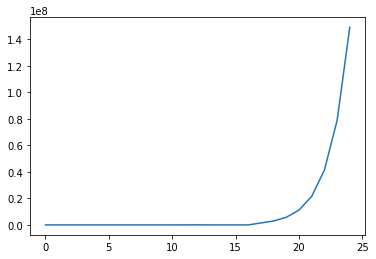

In [136]:
plt.plot(list(map(lambda x: x[-1], errors_3[:25])))

In [ ]:
np.dot(np.dot(np.ones(size).T, B), np.ones(size)) 

In [ ]:
number_of_people = df.groupby('area_j')['live_i_work_j'].sum().sum()
d_restored = d * number_of_people

np.sum((d_restored - corresponance_matrix) ** 2) / size ** 2

In [ ]:
number_of_people = df.groupby('area_j')['live_i_work_j'].sum().sum()
d_restored = B * number_of_people

In [ ]:
np.sum((d_restored - corresponance_matrix) ** 2) / size ** 2

In [ ]:
d_restored

In [ ]:
corresponance_matrix

In [ ]:
L = 1
L_new = None
a = 0
# size = 10
beta = 1

# T = np.matrix([np.random.uniform(size=size) for _ in range(size)])
# T /= T.sum(axis=1)

T = 2 * np.matrix(times_matrix ** 4)
T /= T.sum(axis=1)

# l, w = np.random.uniform(0, 1, size), np.random.uniform(0, 1, size)  
l, w = df.groupby('area_i')['live_i_work_j'].sum(), df.groupby('area_j')['live_i_work_j'].sum()
l /= l.sum()
w /= w.sum()

# lambdas_l, lambdas_w = np.zeros(size), np.zeros(size)
# x_new = np.random.uniform(size=2 * size)#np.concatenate((np.zeros(size), np.ones(size))) 
# y = np.random.uniform(size=2 * size)#np.concatenate((np.zeros(size), np.ones(size))) 
# v_new = np.random.uniform(size=2 * size)#np.concatenate((np.zeros(size), np.ones(size)))
# x_new = np.ones(2 * size) / 2 / size#np.concatenate((np.zeros(size), np.ones(size))) 
# y = np.ones(2 * size)/ 2 / size#np.concatenate((np.zeros(size), np.ones(size))) 
# v_new = np.ones(2 * size) / 2 / size#np.concatenate((np.zeros(size), np.ones(size)))
# x, y, v = 15* np.ones(2 * size), np.ones(2 * size), 15 *np.ones(2 * size)


x_new = lambdas.copy()
y = np.ones(2 * size)
v_new = np.ones(2 * size)


d_hat = 1

In [ ]:
while True:
    if L_new is not None:
        L = L_new
        
    L_new = L / 2
    
    x = x_new.copy()
    v = v_new.copy()
    while True:
    
        a_new = 1 / (2 * L_new) + np.sqrt(1 / (4 * L_new ** 2) + a ** 2 * L / L_new)
        tau = 1 / (a_new * L_new)
        
        y = tau * v + (1 - tau) * x
#         print(y)
        lambdas_l, lambdas_w = y[:size].copy(), y[size:].copy()

        B = np.exp(-beta * T + lambdas_l + lambdas_w)
#         print(B)
        grad_phi_1, grad_phi_2, grad_phi_value = grad_phi(y[:size], y[size:], B)
        
        if np.linalg.norm(grad_phi_1) >= np.linalg.norm(grad_phi_2):
            lambdas_l_new = (lambdas_l + np.log(l) - np.log(np.dot(B, np.ones(size))).A1).values
            lambdas_w_new = lambdas_w.copy() 
            print(1)
        else:
            lambdas_l_new = lambdas_l.copy()
            lambdas_w_new = (lambdas_w + np.log(w) - np.log(np.dot(B.T, np.ones(size))).A1).values
            print(2)
        x_new = np.concatenate((lambdas_l_new, lambdas_w_new))
   
        v_new = v - a_new * grad_phi_value
        
        B_x_new = np.exp(-beta * T + x_new[:size] + x_new[size:])
        B_x = np.exp(-beta * T + x[:size] + x[size:])
        
#         print(phi(x_new, l, w, B_x_new), phi(x, l, w, B_x), phi(y, l, w, B))
#         print(phi(x_new, l, w, B_x_new) - phi(y, l, w, B) - np.linalg.norm(grad_phi_value) ** 2 / (2 * L_new))

        if phi(x_new, l, w, B_x_new) <= phi(y, l, w, B) - np.linalg.norm(grad_phi_value) ** 2 / (2 * L_new):
            d = B / np.dot(np.dot(np.ones(size).T, B), np.ones(size))
#             print(np.dot(np.dot(np.ones(size).T, B), np.ones(size)))
            d_hat_new = (a_new * d + L * a ** 2 * d_hat) / (L_new * a_new ** 2)
            break
        
        L_new *= 2
        print('L_new', L_new)
        
        
    print(abs(f(d_hat_new, T, beta) + phi(x_new, l, w, B_x_new)))
    print(np.linalg.norm(np.dot(d_hat_new.T, np.ones(size).T).A1 - l), np.linalg.norm(np.dot(d_hat_new, np.ones(size).T).A1 - w))
    
    if abs(f(d_hat_new, T, beta) + phi(x_new, l, w, B)) < eps_f:
        break
    
    d_hat = d_hat_new.copy()


In [ ]:
np.dot(d_hat_new.T, np.ones(size)).A1 - l

In [ ]:
number_of_people = df.groupby('area_j')['live_i_work_j'].sum().sum()

In [ ]:
number_of_people = df.groupby('area_j')['live_i_work_j'].sum().sum()
d_restored = d_hat_new * number_of_people

In [ ]:
np.sum((d_restored - corresponance_matrix) ** 2) / size ** 2

In [ ]:
np.sum((d_restored - corresponance_matrix) ** 2) / size ** 2